In [1]:
#!/usr/bin/env python3
from argparse import ArgumentParser
import numpy as np
import torch
from data import get_dataset, DATASET_CONFIGS
from train import train
from model import MLP
import utils



import matplotlib.pyplot as plt





In [2]:
task_number = 5
hidden_size=512
hidden_layer_num=2
hidden_dropout_prob=0.5
input_dropout_prob=0.2
lamda=400

epochs_per_task = 30
batch_size = 128
test_size= 8192
fisher_estimation_sample_size = 2048
lr=1.e-3
weight_decay = 0
eval_log_interval = 250
loss_log_interval= 250
cuda=False

# decide whether to use cuda or not.
cuda = torch.cuda.is_available()

# generate permutations for the tasks.
np.random.seed(0)
permutations = [
    np.random.permutation(DATASET_CONFIGS['mnist']['size']**2) for
    _ in range(task_number)
]

# prepare mnist datasets.
train_datasets = [
    get_dataset('mnist', permutation=p) for p in permutations
]
test_datasets = [
    get_dataset('mnist', train=False, permutation=p) for p in permutations
]

    

In [3]:
def loss_plot(x):
    for t, v in x.items():
        plt.plot(list(range((t-1) * epochs_per_task, t * epochs_per_task)), v)

def accuracy_plot(x):
    for t, v in x.items():
        plt.plot(list(range((t-1) * epochs_per_task, task_number * epochs_per_task)), v)
    plt.ylim(0.8, 1)

In [4]:
def avg_precision_plot(precisions, labels = []): #precisions needs to be in the form of the return value of train
    for num, precision in enumerate(precisions):    
        avg_precisions = []
        total_epochs = task_number*epochs_per_task
        for epoch in range (total_epochs):
            avg_precision = 0
            tasks_considered = epoch // epochs_per_task +1 #gives 1 for first task, 2 for second,...
            for i in range(1,tasks_considered+1): #
                avg_precision += precision[i][epoch - (i-1)*epochs_per_task]
            avg_precision/=tasks_considered
            avg_precisions.append(avg_precision)
        plt.ylim(0.88, 0.94)
        if (len(labels) == len(precisions)):
            plt.plot(range(total_epochs), avg_precisions, label = labels[num])
        else:
            plt.plot(range(total_epochs), avg_precisions)
    plt.legend()
    

In [5]:
# prepare the model.
mlp_no_dropout = MLP(
    DATASET_CONFIGS['mnist']['size']**2,
    DATASET_CONFIGS['mnist']['classes'],
    hidden_size,
    hidden_layer_num,
    0,
    0,
    lamda,
)

# initialize the parameters.
utils.gaussian_initialize(mlp_no_dropout)

# prepare the cuda if needed.
if cuda:
    mlp_no_dropout.cuda()




In [6]:
# run the standard experiment.
consolidate = False
standard_prec_no_dropout, standard_total_loss_no_dropout, standard_ce_loss_no_dropout, standard_ewc_loss_no_dropout = train(
    mlp_no_dropout, train_datasets, test_datasets,
    epochs_per_task,
    batch_size,
    test_size,
    consolidate,
    fisher_estimation_sample_size,
    lr,
    weight_decay,
    eval_log_interval,
    loss_log_interval,
    cuda
)

=> task: 1/5 | epoch: 1/30 | progress: [60032/60000] (100%) | prec: 0.4062 | loss => ce: 2.265 / ewc: 0.0 / total: 2.265: : 469it [00:27, 17.08it/s]
=> task: 1/5 | epoch: 2/30 | progress: [256/60000] (0%) | prec: 0.3125 | loss => ce: 2.272 / ewc: 0.0 / total: 2.272: : 2it [00:00, 14.17it/s]

Test Accuracy {1: [0.3209228515625]}
total loss {1: [2.264648675918579]} cross entropy {1: [2.264648675918579]} ewc {1: [0.0]}


=> task: 1/5 | epoch: 2/30 | progress: [60032/60000] (100%) | prec: 0.4062 | loss => ce: 2.238 / ewc: 0.0 / total: 2.238: : 469it [00:27, 16.88it/s]
=> task: 1/5 | epoch: 3/30 | progress: [256/60000] (0%) | prec: 0.4609 | loss => ce: 2.232 / ewc: 0.0 / total: 2.232: : 2it [00:00, 13.68it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375]}
total loss {1: [2.264648675918579, 2.2384328842163086]} cross entropy {1: [2.264648675918579, 2.2384328842163086]} ewc {1: [0.0, 0.0]}


=> task: 1/5 | epoch: 3/30 | progress: [60032/60000] (100%) | prec: 0.5312 | loss => ce: 2.171 / ewc: 0.0 / total: 2.171: : 469it [00:26, 17.57it/s]
=> task: 1/5 | epoch: 4/30 | progress: [256/60000] (0%) | prec: 0.5156 | loss => ce: 2.158 / ewc: 0.0 / total: 2.158: : 2it [00:00, 12.54it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875]}
total loss {1: [2.264648675918579, 2.2384328842163086, 2.1706278324127197]} cross entropy {1: [2.264648675918579, 2.2384328842163086, 2.1706278324127197]} ewc {1: [0.0, 0.0, 0.0]}


=> task: 1/5 | epoch: 4/30 | progress: [60032/60000] (100%) | prec: 0.6354 | loss => ce: 2.009 / ewc: 0.0 / total: 2.009: : 469it [00:26, 17.55it/s]
=> task: 1/5 | epoch: 5/30 | progress: [256/60000] (0%) | prec: 0.6016 | loss => ce: 2.017 / ewc: 0.0 / total: 2.017: : 2it [00:00, 13.74it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625]}
total loss {1: [2.264648675918579, 2.2384328842163086, 2.1706278324127197, 2.009193181991577]} cross entropy {1: [2.264648675918579, 2.2384328842163086, 2.1706278324127197, 2.009193181991577]} ewc {1: [0.0, 0.0, 0.0, 0.0]}


=> task: 1/5 | epoch: 5/30 | progress: [60032/60000] (100%) | prec: 0.6146 | loss => ce: 1.814 / ewc: 0.0 / total: 1.814: : 469it [00:27, 17.32it/s]
=> task: 1/5 | epoch: 6/30 | progress: [384/60000] (1%) | prec: 0.5938 | loss => ce: 1.777 / ewc: 0.0 / total: 1.777: : 2it [00:00, 15.66it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375]}
total loss {1: [2.264648675918579, 2.2384328842163086, 2.1706278324127197, 2.009193181991577, 1.8140567541122437]} cross entropy {1: [2.264648675918579, 2.2384328842163086, 2.1706278324127197, 2.009193181991577, 1.8140567541122437]} ewc {1: [0.0, 0.0, 0.0, 0.0, 0.0]}


=> task: 1/5 | epoch: 6/30 | progress: [60032/60000] (100%) | prec: 0.7708 | loss => ce: 1.43 / ewc: 0.0 / total: 1.43: : 469it [00:26, 17.52it/s]  
=> task: 1/5 | epoch: 7/30 | progress: [384/60000] (1%) | prec: 0.7031 | loss => ce: 1.36 / ewc: 0.0 / total: 1.36: : 2it [00:00, 15.27it/s]  

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875]}
total loss {1: [2.264648675918579, 2.2384328842163086, 2.1706278324127197, 2.009193181991577, 1.8140567541122437, 1.430046558380127]} cross entropy {1: [2.264648675918579, 2.2384328842163086, 2.1706278324127197, 2.009193181991577, 1.8140567541122437, 1.430046558380127]} ewc {1: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}


=> task: 1/5 | epoch: 7/30 | progress: [60032/60000] (100%) | prec: 0.7917 | loss => ce: 1.081 / ewc: 0.0 / total: 1.081: : 469it [00:26, 17.43it/s] 
=> task: 1/5 | epoch: 8/30 | progress: [384/60000] (1%) | prec: 0.7969 | loss => ce: 1.018 / ewc: 0.0 / total: 1.018: : 2it [00:00, 14.46it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375]}
total loss {1: [2.264648675918579, 2.2384328842163086, 2.1706278324127197, 2.009193181991577, 1.8140567541122437, 1.430046558380127, 1.0812205076217651]} cross entropy {1: [2.264648675918579, 2.2384328842163086, 2.1706278324127197, 2.009193181991577, 1.8140567541122437, 1.430046558380127, 1.0812205076217651]} ewc {1: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}


=> task: 1/5 | epoch: 8/30 | progress: [60032/60000] (100%) | prec: 0.8542 | loss => ce: 0.8153 / ewc: 0.0 / total: 0.8153: : 469it [00:26, 17.49it/s]
=> task: 1/5 | epoch: 9/30 | progress: [384/60000] (1%) | prec: 0.8906 | loss => ce: 0.7266 / ewc: 0.0 / total: 0.7266: : 2it [00:00, 15.65it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875]}
total loss {1: [2.264648675918579, 2.2384328842163086, 2.1706278324127197, 2.009193181991577, 1.8140567541122437, 1.430046558380127, 1.0812205076217651, 0.8152999877929688]} cross entropy {1: [2.264648675918579, 2.2384328842163086, 2.1706278324127197, 2.009193181991577, 1.8140567541122437, 1.430046558380127, 1.0812205076217651, 0.8152999877929688]} ewc {1: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}


=> task: 1/5 | epoch: 9/30 | progress: [60032/60000] (100%) | prec: 0.7292 | loss => ce: 0.8976 / ewc: 0.0 / total: 0.8976: : 469it [00:26, 17.64it/s]
=> task: 1/5 | epoch: 10/30 | progress: [384/60000] (1%) | prec: 0.8828 | loss => ce: 0.5796 / ewc: 0.0 / total: 0.5796: : 2it [00:00, 15.31it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625]}
total loss {1: [2.264648675918579, 2.2384328842163086, 2.1706278324127197, 2.009193181991577, 1.8140567541122437, 1.430046558380127, 1.0812205076217651, 0.8152999877929688, 0.8976394534111023]} cross entropy {1: [2.264648675918579, 2.2384328842163086, 2.1706278324127197, 2.009193181991577, 1.8140567541122437, 1.430046558380127, 1.0812205076217651, 0.8152999877929688, 0.8976394534111023]} ewc {1: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}


=> task: 1/5 | epoch: 10/30 | progress: [60032/60000] (100%) | prec: 0.875 | loss => ce: 0.5344 / ewc: 0.0 / total: 0.5344: : 469it [00:26, 17.55it/s] 
=> task: 1/5 | epoch: 11/30 | progress: [384/60000] (1%) | prec: 0.8359 | loss => ce: 0.6284 / ewc: 0.0 / total: 0.6284: : 2it [00:00, 15.46it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125]}
total loss {1: [2.264648675918579, 2.2384328842163086, 2.1706278324127197, 2.009193181991577, 1.8140567541122437, 1.430046558380127, 1.0812205076217651, 0.8152999877929688, 0.8976394534111023, 0.5343901515007019]} cross entropy {1: [2.264648675918579, 2.2384328842163086, 2.1706278324127197, 2.009193181991577, 1.8140567541122437, 1.430046558380127, 1.0812205076217651, 0.8152999877929688, 0.8976394534111023, 0.5343901515007019]} ewc {1: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}


=> task: 1/5 | epoch: 11/30 | progress: [60032/60000] (100%) | prec: 0.8854 | loss => ce: 0.4624 / ewc: 0.0 / total: 0.4624: : 469it [00:27, 17.32it/s]
=> task: 1/5 | epoch: 12/30 | progress: [384/60000] (1%) | prec: 0.8047 | loss => ce: 0.6648 / ewc: 0.0 / total: 0.6648: : 2it [00:00, 15.88it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875]}
total loss {1: [2.264648675918579, 2.2384328842163086, 2.1706278324127197, 2.009193181991577, 1.8140567541122437, 1.430046558380127, 1.0812205076217651, 0.8152999877929688, 0.8976394534111023, 0.5343901515007019, 0.46235227584838867]} cross entropy {1: [2.264648675918579, 2.2384328842163086, 2.1706278324127197, 2.009193181991577, 1.8140567541122437, 1.430046558380127, 1.0812205076217651, 0.8152999877929688, 0.8976394534111023, 0.5343901515007019, 0.46235227584838867]} ewc {1: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}


=> task: 1/5 | epoch: 12/30 | progress: [60032/60000] (100%) | prec: 0.8854 | loss => ce: 0.4722 / ewc: 0.0 / total: 0.4722: : 469it [00:27, 17.11it/s]
=> task: 1/5 | epoch: 13/30 | progress: [384/60000] (1%) | prec: 0.8672 | loss => ce: 0.4427 / ewc: 0.0 / total: 0.4427: : 2it [00:00, 15.55it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875]}
total loss {1: [2.264648675918579, 2.2384328842163086, 2.1706278324127197, 2.009193181991577, 1.8140567541122437, 1.430046558380127, 1.0812205076217651, 0.8152999877929688, 0.8976394534111023, 0.5343901515007019, 0.46235227584838867, 0.4721512496471405]} cross entropy {1: [2.264648675918579, 2.2384328842163086, 2.1706278324127197, 2.009193181991577, 1.8140567541122437, 1.430046558380127, 1.0812205076217651, 0.8152999877929688, 0.8976394534111023, 0.5343901515007019, 0.46235227584838867, 0.4721512496471405]} ewc {1: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}


=> task: 1/5 | epoch: 13/30 | progress: [60032/60000] (100%) | prec: 0.8333 | loss => ce: 0.4782 / ewc: 0.0 / total: 0.4782: : 469it [00:28, 16.36it/s]
=> task: 1/5 | epoch: 14/30 | progress: [256/60000] (0%) | prec: 0.8906 | loss => ce: 0.4439 / ewc: 0.0 / total: 0.4439: : 2it [00:00, 13.45it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625]}
total loss {1: [2.264648675918579, 2.2384328842163086, 2.1706278324127197, 2.009193181991577, 1.8140567541122437, 1.430046558380127, 1.0812205076217651, 0.8152999877929688, 0.8976394534111023, 0.5343901515007019, 0.46235227584838867, 0.4721512496471405, 0.47818848490715027]} cross entropy {1: [2.264648675918579, 2.2384328842163086, 2.1706278324127197, 2.009193181991577, 1.8140567541122437, 1.430046558380127, 1.0812205076217651, 0.8152999877929688, 0.8976394534111023, 0.5343901515007019, 0.46235227584838867, 0.4721512496471405, 0.47818848490715027]} ewc {1: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}


=> task: 1/5 | epoch: 14/30 | progress: [60032/60000] (100%) | prec: 0.9062 | loss => ce: 0.3104 / ewc: 0.0 / total: 0.3104: : 469it [00:29, 15.70it/s]
=> task: 1/5 | epoch: 15/30 | progress: [384/60000] (1%) | prec: 0.8594 | loss => ce: 0.5699 / ewc: 0.0 / total: 0.5699: : 2it [00:00, 15.73it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125]}
total loss {1: [2.264648675918579, 2.2384328842163086, 2.1706278324127197, 2.009193181991577, 1.8140567541122437, 1.430046558380127, 1.0812205076217651, 0.8152999877929688, 0.8976394534111023, 0.5343901515007019, 0.46235227584838867, 0.4721512496471405, 0.47818848490715027, 0.310405433177948]} cross entropy {1: [2.264648675918579, 2.2384328842163086, 2.1706278324127197, 2.009193181991577, 1.8140567541122437, 1.430046558380127, 1.0812205076217651, 0.8152999877929688, 0.8976394534111023, 0.5343901515007019, 0.46235227584838867, 0.4721512496471405, 0.47818848490715027, 0.310405433177948]} ewc {1: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}


=> task: 1/5 | epoch: 15/30 | progress: [60032/60000] (100%) | prec: 0.8021 | loss => ce: 0.6095 / ewc: 0.0 / total: 0.6095: : 469it [00:28, 16.56it/s]
=> task: 1/5 | epoch: 16/30 | progress: [384/60000] (1%) | prec: 0.8047 | loss => ce: 0.4702 / ewc: 0.0 / total: 0.4702: : 2it [00:00, 15.62it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625]}
total loss {1: [2.264648675918579, 2.2384328842163086, 2.1706278324127197, 2.009193181991577, 1.8140567541122437, 1.430046558380127, 1.0812205076217651, 0.8152999877929688, 0.8976394534111023, 0.5343901515007019, 0.46235227584838867, 0.4721512496471405, 0.47818848490715027, 0.310405433177948, 0.6095264554023743]} cross entropy {1: [2.264648675918579, 2.2384328842163086, 2.1706278324127197, 2.009193181991577, 1.8140567541122437, 1.430046558380127, 1.0812205076217651, 0.8152999877929688, 0.8976394534111023, 0.5343901515007019, 0.46235227584838867, 0.4721512496471405, 0.47818848490715027, 0.310405433177948, 0.6095264554023743]} ewc {1: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}


=> task: 1/5 | epoch: 16/30 | progress: [60032/60000] (100%) | prec: 0.8854 | loss => ce: 0.4144 / ewc: 0.0 / total: 0.4144: : 469it [00:27, 17.13it/s]
=> task: 1/5 | epoch: 17/30 | progress: [384/60000] (1%) | prec: 0.9062 | loss => ce: 0.4186 / ewc: 0.0 / total: 0.4186: : 2it [00:00, 16.00it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875]}
total loss {1: [2.264648675918579, 2.2384328842163086, 2.1706278324127197, 2.009193181991577, 1.8140567541122437, 1.430046558380127, 1.0812205076217651, 0.8152999877929688, 0.8976394534111023, 0.5343901515007019, 0.46235227584838867, 0.4721512496471405, 0.47818848490715027, 0.310405433177948, 0.6095264554023743, 0.4144458770751953]} cross entropy {1: [2.264648675918579, 2.2384328842163086, 2.1706278324127197, 2.009193181991577, 1.8140567541122437, 1.430046558380127, 1.0812205076217651, 0.8152999877929688, 0.8976394534111023, 0.5343901515007019, 0.46235227584838867, 0.4721512496471405, 0.47818848490715027, 0.310405433177948, 0.6095264554023743, 0.4144458770751953]} ewc {1: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

=> task: 1/5 | epoch: 17/30 | progress: [60032/60000] (100%) | prec: 0.9167 | loss => ce: 0.3779 / ewc: 0.0 / total: 0.3779: : 469it [00:26, 17.51it/s]
=> task: 1/5 | epoch: 18/30 | progress: [384/60000] (1%) | prec: 0.8984 | loss => ce: 0.4119 / ewc: 0.0 / total: 0.4119: : 2it [00:00, 16.27it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625]}
total loss {1: [2.264648675918579, 2.2384328842163086, 2.1706278324127197, 2.009193181991577, 1.8140567541122437, 1.430046558380127, 1.0812205076217651, 0.8152999877929688, 0.8976394534111023, 0.5343901515007019, 0.46235227584838867, 0.4721512496471405, 0.47818848490715027, 0.310405433177948, 0.6095264554023743, 0.4144458770751953, 0.3779160678386688]} cross entropy {1: [2.264648675918579, 2.2384328842163086, 2.1706278324127197, 2.009193181991577, 1.8140567541122437, 1.430046558380127, 1.0812205076217651, 0.8152999877929688, 0.8976394534111023, 0.5343901515007019, 0.46235227584838867, 0.4721512496471405, 0.47818848490715027, 0.310405433177948, 0.6095264554023743, 0.4144458770751953, 0.3779160678386688]

=> task: 1/5 | epoch: 18/30 | progress: [60032/60000] (100%) | prec: 0.8854 | loss => ce: 0.4527 / ewc: 0.0 / total: 0.4527: : 469it [00:26, 17.70it/s]
=> task: 1/5 | epoch: 19/30 | progress: [384/60000] (1%) | prec: 0.8906 | loss => ce: 0.4548 / ewc: 0.0 / total: 0.4548: : 2it [00:00, 15.99it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375]}
total loss {1: [2.264648675918579, 2.2384328842163086, 2.1706278324127197, 2.009193181991577, 1.8140567541122437, 1.430046558380127, 1.0812205076217651, 0.8152999877929688, 0.8976394534111023, 0.5343901515007019, 0.46235227584838867, 0.4721512496471405, 0.47818848490715027, 0.310405433177948, 0.6095264554023743, 0.4144458770751953, 0.3779160678386688, 0.45267513394355774]} cross entropy {1: [2.264648675918579, 2.2384328842163086, 2.1706278324127197, 2.009193181991577, 1.8140567541122437, 1.430046558380127, 1.0812205076217651, 0.8152999877929688, 0.8976394534111023, 0.5343901515007019, 0.46235227584838867, 0.4721512496471405, 0.47818848490715027, 0.310405433177948, 0.6095264554023743, 0

=> task: 1/5 | epoch: 19/30 | progress: [60032/60000] (100%) | prec: 0.9375 | loss => ce: 0.239 / ewc: 0.0 / total: 0.239: : 469it [00:26, 17.71it/s]  
=> task: 1/5 | epoch: 20/30 | progress: [384/60000] (1%) | prec: 0.8672 | loss => ce: 0.3067 / ewc: 0.0 / total: 0.3067: : 2it [00:00, 15.99it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375]}
total loss {1: [2.264648675918579, 2.2384328842163086, 2.1706278324127197, 2.009193181991577, 1.8140567541122437, 1.430046558380127, 1.0812205076217651, 0.8152999877929688, 0.8976394534111023, 0.5343901515007019, 0.46235227584838867, 0.4721512496471405, 0.47818848490715027, 0.310405433177948, 0.6095264554023743, 0.4144458770751953, 0.3779160678386688, 0.45267513394355774, 0.2389736771583557]} cross entropy {1: [2.264648675918579, 2.2384328842163086, 2.1706278324127197, 2.009193181991577, 1.8140567541122437, 1.430046558380127, 1.0812205076217651, 0.8152999877929688, 0.8976394534111023, 0.5343901515007019, 0.46235227584838867, 0.4721512496471405, 0.47818848490715027, 0.3104

=> task: 1/5 | epoch: 20/30 | progress: [60032/60000] (100%) | prec: 0.8958 | loss => ce: 0.3219 / ewc: 0.0 / total: 0.3219: : 469it [00:26, 17.74it/s]
=> task: 1/5 | epoch: 21/30 | progress: [384/60000] (1%) | prec: 0.8984 | loss => ce: 0.3041 / ewc: 0.0 / total: 0.3041: : 2it [00:00, 16.27it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625]}
total loss {1: [2.264648675918579, 2.2384328842163086, 2.1706278324127197, 2.009193181991577, 1.8140567541122437, 1.430046558380127, 1.0812205076217651, 0.8152999877929688, 0.8976394534111023, 0.5343901515007019, 0.46235227584838867, 0.4721512496471405, 0.47818848490715027, 0.310405433177948, 0.6095264554023743, 0.4144458770751953, 0.3779160678386688, 0.45267513394355774, 0.2389736771583557, 0.321857213973999]} cross entropy {1: [2.264648675918579, 2.2384328842163086, 2.1706278324127197, 2.009193181991577, 1.8140567541122437, 1.430046558380127, 1.0812205076217651, 0.8152999877929688, 0.8976394534111023, 0.5343901515007019, 0.46235227584838867, 0.472151249

=> task: 1/5 | epoch: 21/30 | progress: [60032/60000] (100%) | prec: 0.9167 | loss => ce: 0.3247 / ewc: 0.0 / total: 0.3247: : 469it [00:26, 17.74it/s]
=> task: 1/5 | epoch: 22/30 | progress: [384/60000] (1%) | prec: 0.9297 | loss => ce: 0.2602 / ewc: 0.0 / total: 0.2602: : 2it [00:00, 16.28it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625]}
total loss {1: [2.264648675918579, 2.2384328842163086, 2.1706278324127197, 2.009193181991577, 1.8140567541122437, 1.430046558380127, 1.0812205076217651, 0.8152999877929688, 0.8976394534111023, 0.5343901515007019, 0.46235227584838867, 0.4721512496471405, 0.47818848490715027, 0.310405433177948, 0.6095264554023743, 0.4144458770751953, 0.3779160678386688, 0.45267513394355774, 0.2389736771583557, 0.321857213973999, 0.324659138917923]} cross entropy {1: [2.264648675918579, 2.2384328842163086, 2.1706278324127197, 2.009193181991577, 1.8140567541122437, 1.430046558380127, 1.0812205076217651, 0.8152999877929688, 0.8976394534111023, 0.534390151500701

=> task: 1/5 | epoch: 22/30 | progress: [60032/60000] (100%) | prec: 0.9062 | loss => ce: 0.3513 / ewc: 0.0 / total: 0.3513: : 469it [00:27, 17.22it/s]
=> task: 1/5 | epoch: 23/30 | progress: [384/60000] (1%) | prec: 0.8672 | loss => ce: 0.4678 / ewc: 0.0 / total: 0.4678: : 2it [00:00, 15.40it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875]}
total loss {1: [2.264648675918579, 2.2384328842163086, 2.1706278324127197, 2.009193181991577, 1.8140567541122437, 1.430046558380127, 1.0812205076217651, 0.8152999877929688, 0.8976394534111023, 0.5343901515007019, 0.46235227584838867, 0.4721512496471405, 0.47818848490715027, 0.310405433177948, 0.6095264554023743, 0.4144458770751953, 0.3779160678386688, 0.45267513394355774, 0.2389736771583557, 0.321857213973999, 0.324659138917923, 0.3512977659702301]} cross entropy {1: [2.264648675918579, 2.2384328842163086, 2.1706278324127197, 2.009193181991577, 1.8140567541122437, 1.430046558380127, 1.0812205076217651, 0.8152999877929688, 

=> task: 1/5 | epoch: 23/30 | progress: [60032/60000] (100%) | prec: 0.8958 | loss => ce: 0.2678 / ewc: 0.0 / total: 0.2678: : 469it [00:27, 17.05it/s]
=> task: 1/5 | epoch: 24/30 | progress: [384/60000] (1%) | prec: 0.8984 | loss => ce: 0.3705 / ewc: 0.0 / total: 0.3705: : 2it [00:00, 15.24it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375]}
total loss {1: [2.264648675918579, 2.2384328842163086, 2.1706278324127197, 2.009193181991577, 1.8140567541122437, 1.430046558380127, 1.0812205076217651, 0.8152999877929688, 0.8976394534111023, 0.5343901515007019, 0.46235227584838867, 0.4721512496471405, 0.47818848490715027, 0.310405433177948, 0.6095264554023743, 0.4144458770751953, 0.3779160678386688, 0.45267513394355774, 0.2389736771583557, 0.321857213973999, 0.324659138917923, 0.3512977659702301, 0.2677544951438904]} cross entropy {1: [2.264648675918579, 2.2384328842163086, 2.1706278324127197, 2.009193181991577, 1.8140567541122437, 1.430046558380127, 1.0812

=> task: 1/5 | epoch: 24/30 | progress: [60032/60000] (100%) | prec: 0.9479 | loss => ce: 0.2124 / ewc: 0.0 / total: 0.2124: : 469it [00:27, 17.31it/s]
=> task: 1/5 | epoch: 25/30 | progress: [384/60000] (1%) | prec: 0.8828 | loss => ce: 0.3279 / ewc: 0.0 / total: 0.3279: : 2it [00:00, 16.29it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125]}
total loss {1: [2.264648675918579, 2.2384328842163086, 2.1706278324127197, 2.009193181991577, 1.8140567541122437, 1.430046558380127, 1.0812205076217651, 0.8152999877929688, 0.8976394534111023, 0.5343901515007019, 0.46235227584838867, 0.4721512496471405, 0.47818848490715027, 0.310405433177948, 0.6095264554023743, 0.4144458770751953, 0.3779160678386688, 0.45267513394355774, 0.2389736771583557, 0.321857213973999, 0.324659138917923, 0.3512977659702301, 0.2677544951438904, 0.21240229904651642]} cross entropy {1: [2.264648675918579, 2.2384328842163086, 2.1706278324127197, 2.009193181991577, 1.814056

=> task: 1/5 | epoch: 25/30 | progress: [60032/60000] (100%) | prec: 0.9375 | loss => ce: 0.192 / ewc: 0.0 / total: 0.192: : 469it [00:26, 17.76it/s]  
=> task: 1/5 | epoch: 26/30 | progress: [384/60000] (1%) | prec: 0.9062 | loss => ce: 0.4203 / ewc: 0.0 / total: 0.4203: : 2it [00:00, 16.00it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875]}
total loss {1: [2.264648675918579, 2.2384328842163086, 2.1706278324127197, 2.009193181991577, 1.8140567541122437, 1.430046558380127, 1.0812205076217651, 0.8152999877929688, 0.8976394534111023, 0.5343901515007019, 0.46235227584838867, 0.4721512496471405, 0.47818848490715027, 0.310405433177948, 0.6095264554023743, 0.4144458770751953, 0.3779160678386688, 0.45267513394355774, 0.2389736771583557, 0.321857213973999, 0.324659138917923, 0.3512977659702301, 0.2677544951438904, 0.21240229904651642, 0.19195210933685303]} cross entropy {1: [2.264648675918579, 2.2384328842163086, 2.17062783

=> task: 1/5 | epoch: 26/30 | progress: [60032/60000] (100%) | prec: 0.9062 | loss => ce: 0.2717 / ewc: 0.0 / total: 0.2717: : 469it [00:26, 17.65it/s]
=> task: 1/5 | epoch: 27/30 | progress: [384/60000] (1%) | prec: 0.8984 | loss => ce: 0.3581 / ewc: 0.0 / total: 0.3581: : 2it [00:00, 16.04it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875]}
total loss {1: [2.264648675918579, 2.2384328842163086, 2.1706278324127197, 2.009193181991577, 1.8140567541122437, 1.430046558380127, 1.0812205076217651, 0.8152999877929688, 0.8976394534111023, 0.5343901515007019, 0.46235227584838867, 0.4721512496471405, 0.47818848490715027, 0.310405433177948, 0.6095264554023743, 0.4144458770751953, 0.3779160678386688, 0.45267513394355774, 0.2389736771583557, 0.321857213973999, 0.324659138917923, 0.3512977659702301, 0.2677544951438904, 0.21240229904651642, 0.19195210933685303, 0.2716991901397705]} cross entropy {1: [2.2646486759

=> task: 1/5 | epoch: 27/30 | progress: [60032/60000] (100%) | prec: 0.9271 | loss => ce: 0.2979 / ewc: 0.0 / total: 0.2979: : 469it [00:26, 17.72it/s]
=> task: 1/5 | epoch: 28/30 | progress: [384/60000] (1%) | prec: 0.8828 | loss => ce: 0.401 / ewc: 0.0 / total: 0.401: : 2it [00:00, 16.52it/s]  

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625]}
total loss {1: [2.264648675918579, 2.2384328842163086, 2.1706278324127197, 2.009193181991577, 1.8140567541122437, 1.430046558380127, 1.0812205076217651, 0.8152999877929688, 0.8976394534111023, 0.5343901515007019, 0.46235227584838867, 0.4721512496471405, 0.47818848490715027, 0.310405433177948, 0.6095264554023743, 0.4144458770751953, 0.3779160678386688, 0.45267513394355774, 0.2389736771583557, 0.321857213973999, 0.324659138917923, 0.3512977659702301, 0.2677544951438904, 0.21240229904651642, 0.19195210933685303, 0.2716991901397705, 0.29788604378700

=> task: 1/5 | epoch: 28/30 | progress: [60032/60000] (100%) | prec: 0.8854 | loss => ce: 0.3554 / ewc: 0.0 / total: 0.3554: : 469it [00:26, 17.75it/s]
=> task: 1/5 | epoch: 29/30 | progress: [384/60000] (1%) | prec: 0.8672 | loss => ce: 0.4342 / ewc: 0.0 / total: 0.4342: : 2it [00:00, 15.77it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125]}
total loss {1: [2.264648675918579, 2.2384328842163086, 2.1706278324127197, 2.009193181991577, 1.8140567541122437, 1.430046558380127, 1.0812205076217651, 0.8152999877929688, 0.8976394534111023, 0.5343901515007019, 0.46235227584838867, 0.4721512496471405, 0.47818848490715027, 0.310405433177948, 0.6095264554023743, 0.4144458770751953, 0.3779160678386688, 0.45267513394355774, 0.2389736771583557, 0.321857213973999, 0.324659138917923, 0.3512977659702301, 0.2677544951438904, 0.21240229904651642, 0.19195210933685303, 0.2716991901397705, 

=> task: 1/5 | epoch: 29/30 | progress: [60032/60000] (100%) | prec: 0.8958 | loss => ce: 0.2931 / ewc: 0.0 / total: 0.2931: : 469it [00:26, 17.74it/s]
=> task: 1/5 | epoch: 30/30 | progress: [384/60000] (1%) | prec: 0.9297 | loss => ce: 0.303 / ewc: 0.0 / total: 0.303: : 2it [00:00, 15.69it/s]  

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875]}
total loss {1: [2.264648675918579, 2.2384328842163086, 2.1706278324127197, 2.009193181991577, 1.8140567541122437, 1.430046558380127, 1.0812205076217651, 0.8152999877929688, 0.8976394534111023, 0.5343901515007019, 0.46235227584838867, 0.4721512496471405, 0.47818848490715027, 0.310405433177948, 0.6095264554023743, 0.4144458770751953, 0.3779160678386688, 0.45267513394355774, 0.2389736771583557, 0.321857213973999, 0.324659138917923, 0.3512977659702301, 0.2677544951438904, 0.21240229904651642, 0.19195210933685303, 0.2

=> task: 1/5 | epoch: 30/30 | progress: [60032/60000] (100%) | prec: 0.9479 | loss => ce: 0.2235 / ewc: 0.0 / total: 0.2235: : 469it [00:26, 17.72it/s]
=> task: 2/5 | epoch: 1/30 | progress: [384/60000] (1%) | prec: 0.1328 | loss => ce: 2.339 / ewc: 0.0 / total: 2.339: : 2it [00:00, 16.31it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125]}
total loss {1: [2.264648675918579, 2.2384328842163086, 2.1706278324127197, 2.009193181991577, 1.8140567541122437, 1.430046558380127, 1.0812205076217651, 0.8152999877929688, 0.8976394534111023, 0.5343901515007019, 0.46235227584838867, 0.4721512496471405, 0.47818848490715027, 0.310405433177948, 0.6095264554023743, 0.4144458770751953, 0.3779160678386688, 0.45267513394355774, 0.2389736771583557, 0.321857213973999, 0.324659138917923, 0.3512977659702301, 0.2677544951438904, 0.21240229904651642, 0.19195

=> task: 2/5 | epoch: 1/30 | progress: [60032/60000] (100%) | prec: 0.8125 | loss => ce: 0.8087 / ewc: 0.0 / total: 0.8087: : 469it [00:26, 17.55it/s]
=> task: 2/5 | epoch: 2/30 | progress: [384/60000] (1%) | prec: 0.7734 | loss => ce: 0.8411 / ewc: 0.0 / total: 0.8411: : 2it [00:00, 15.04it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375], 2: [0.8028564453125]}
total loss {1: [2.264648675918579, 2.2384328842163086, 2.1706278324127197, 2.009193181991577, 1.8140567541122437, 1.430046558380127, 1.0812205076217651, 0.8152999877929688, 0.8976394534111023, 0.5343901515007019, 0.46235227584838867, 0.4721512496471405, 0.47818848490715027, 0.310405433177948, 0.6095264554023743, 0.4144458770751953, 0.3779160678386688, 0.45267513394355774, 0.2389736771583557, 0.321857213973999, 0.324659138917923, 0.3512977659702301, 0.267754495

=> task: 2/5 | epoch: 2/30 | progress: [60032/60000] (100%) | prec: 0.8542 | loss => ce: 0.5041 / ewc: 0.0 / total: 0.5041: : 469it [00:26, 17.68it/s]
=> task: 2/5 | epoch: 3/30 | progress: [384/60000] (1%) | prec: 0.8438 | loss => ce: 0.5859 / ewc: 0.0 / total: 0.5859: : 2it [00:00, 16.19it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625], 2: [0.8028564453125, 0.853271484375]}
total loss {1: [2.264648675918579, 2.2384328842163086, 2.1706278324127197, 2.009193181991577, 1.8140567541122437, 1.430046558380127, 1.0812205076217651, 0.8152999877929688, 0.8976394534111023, 0.5343901515007019, 0.46235227584838867, 0.4721512496471405, 0.47818848490715027, 0.310405433177948, 0.6095264554023743, 0.4144458770751953, 0.3779160678386688, 0.45267513394355774, 0.2389736771583557, 0.321857213973999, 0.324659138917923

=> task: 2/5 | epoch: 3/30 | progress: [60032/60000] (100%) | prec: 0.8125 | loss => ce: 0.5639 / ewc: 0.0 / total: 0.5639: : 469it [00:26, 17.71it/s]
=> task: 2/5 | epoch: 4/30 | progress: [384/60000] (1%) | prec: 0.8516 | loss => ce: 0.5271 / ewc: 0.0 / total: 0.5271: : 2it [00:00, 16.29it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375], 2: [0.8028564453125, 0.853271484375, 0.8785400390625]}
total loss {1: [2.264648675918579, 2.2384328842163086, 2.1706278324127197, 2.009193181991577, 1.8140567541122437, 1.430046558380127, 1.0812205076217651, 0.8152999877929688, 0.8976394534111023, 0.5343901515007019, 0.46235227584838867, 0.4721512496471405, 0.47818848490715027, 0.310405433177948, 0.6095264554023743, 0.4144458770751953, 0.3779160678386688, 0.45267513394355774, 0.2389736771583557, 0.32

=> task: 2/5 | epoch: 4/30 | progress: [60032/60000] (100%) | prec: 0.9271 | loss => ce: 0.3222 / ewc: 0.0 / total: 0.3222: : 469it [00:26, 17.50it/s]
=> task: 2/5 | epoch: 5/30 | progress: [384/60000] (1%) | prec: 0.8906 | loss => ce: 0.4872 / ewc: 0.0 / total: 0.4872: : 2it [00:00, 15.66it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375], 2: [0.8028564453125, 0.853271484375, 0.8785400390625, 0.886962890625]}
total loss {1: [2.264648675918579, 2.2384328842163086, 2.1706278324127197, 2.009193181991577, 1.8140567541122437, 1.430046558380127, 1.0812205076217651, 0.8152999877929688, 0.8976394534111023, 0.5343901515007019, 0.46235227584838867, 0.4721512496471405, 0.47818848490715027, 0.310405433177948, 0.6095264554023743, 0.4144458770751953, 0.3779160678386688, 0.45267513394

=> task: 2/5 | epoch: 5/30 | progress: [60032/60000] (100%) | prec: 0.8125 | loss => ce: 0.6008 / ewc: 0.0 / total: 0.6008: : 469it [00:27, 17.33it/s]
=> task: 2/5 | epoch: 6/30 | progress: [384/60000] (1%) | prec: 0.8672 | loss => ce: 0.4422 / ewc: 0.0 / total: 0.4422: : 2it [00:00, 14.38it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875], 2: [0.8028564453125, 0.853271484375, 0.8785400390625, 0.886962890625, 0.8912353515625]}
total loss {1: [2.264648675918579, 2.2384328842163086, 2.1706278324127197, 2.009193181991577, 1.8140567541122437, 1.430046558380127, 1.0812205076217651, 0.8152999877929688, 0.8976394534111023, 0.5343901515007019, 0.46235227584838867, 0.4721512496471405, 0.47818848490715027, 0.310405433177948, 0.6095264554023743, 0.4144458770751953, 0.3

=> task: 2/5 | epoch: 6/30 | progress: [60032/60000] (100%) | prec: 0.9167 | loss => ce: 0.3742 / ewc: 0.0 / total: 0.3742: : 469it [00:28, 16.65it/s]
=> task: 2/5 | epoch: 7/30 | progress: [384/60000] (1%) | prec: 0.8906 | loss => ce: 0.345 / ewc: 0.0 / total: 0.345: : 2it [00:00, 15.89it/s]  

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375], 2: [0.8028564453125, 0.853271484375, 0.8785400390625, 0.886962890625, 0.8912353515625, 0.8992919921875]}
total loss {1: [2.264648675918579, 2.2384328842163086, 2.1706278324127197, 2.009193181991577, 1.8140567541122437, 1.430046558380127, 1.0812205076217651, 0.8152999877929688, 0.8976394534111023, 0.5343901515007019, 0.46235227584838867, 0.4721512496471405, 0.47818848490715027, 0.310405433177948, 0.6095264

=> task: 2/5 | epoch: 7/30 | progress: [60032/60000] (100%) | prec: 0.875 | loss => ce: 0.3623 / ewc: 0.0 / total: 0.3623: : 469it [00:27, 16.94it/s] 
=> task: 2/5 | epoch: 8/30 | progress: [384/60000] (1%) | prec: 0.8672 | loss => ce: 0.3747 / ewc: 0.0 / total: 0.3747: : 2it [00:00, 16.21it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125], 2: [0.8028564453125, 0.853271484375, 0.8785400390625, 0.886962890625, 0.8912353515625, 0.8992919921875, 0.90576171875]}
total loss {1: [2.264648675918579, 2.2384328842163086, 2.1706278324127197, 2.009193181991577, 1.8140567541122437, 1.430046558380127, 1.0812205076217651, 0.8152999877929688, 0.8976394534111023, 0.5343901515007019, 0.46235227584838867, 0.4721512496471405, 0.478188484907150

=> task: 2/5 | epoch: 8/30 | progress: [60032/60000] (100%) | prec: 0.9375 | loss => ce: 0.2538 / ewc: 0.0 / total: 0.2538: : 469it [00:26, 17.63it/s]
=> task: 2/5 | epoch: 9/30 | progress: [384/60000] (1%) | prec: 0.8828 | loss => ce: 0.3374 / ewc: 0.0 / total: 0.3374: : 2it [00:00, 16.23it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875], 2: [0.8028564453125, 0.853271484375, 0.8785400390625, 0.886962890625, 0.8912353515625, 0.8992919921875, 0.90576171875, 0.90869140625]}
total loss {1: [2.264648675918579, 2.2384328842163086, 2.1706278324127197, 2.009193181991577, 1.8140567541122437, 1.430046558380127, 1.0812205076217651, 0.8152999877929688, 0.8976394534111023, 0.5343901515007019, 0.46235227584838867, 0.472

=> task: 2/5 | epoch: 9/30 | progress: [60032/60000] (100%) | prec: 0.9375 | loss => ce: 0.2409 / ewc: 0.0 / total: 0.2409: : 469it [00:26, 17.72it/s]
=> task: 2/5 | epoch: 10/30 | progress: [384/60000] (1%) | prec: 0.9219 | loss => ce: 0.275 / ewc: 0.0 / total: 0.275: : 2it [00:00, 16.31it/s]  

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625], 2: [0.8028564453125, 0.853271484375, 0.8785400390625, 0.886962890625, 0.8912353515625, 0.8992919921875, 0.90576171875, 0.90869140625, 0.9127197265625]}
total loss {1: [2.264648675918579, 2.2384328842163086, 2.1706278324127197, 2.009193181991577, 1.8140567541122437, 1.430046558380127, 1.0812205076217651, 0.8152999877929688, 0.8976394534111023, 0.5343901515

=> task: 2/5 | epoch: 10/30 | progress: [60032/60000] (100%) | prec: 0.8854 | loss => ce: 0.3425 / ewc: 0.0 / total: 0.3425: : 469it [00:26, 17.47it/s]
=> task: 2/5 | epoch: 11/30 | progress: [384/60000] (1%) | prec: 0.8828 | loss => ce: 0.3874 / ewc: 0.0 / total: 0.3874: : 2it [00:00, 15.09it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375], 2: [0.8028564453125, 0.853271484375, 0.8785400390625, 0.886962890625, 0.8912353515625, 0.8992919921875, 0.90576171875, 0.90869140625, 0.9127197265625, 0.912353515625]}
total loss {1: [2.264648675918579, 2.2384328842163086, 2.1706278324127197, 2.009193181991577, 1.8140567541122437, 1.430046558380127, 1.0812205076217651, 0.8152999877929688, 

=> task: 2/5 | epoch: 11/30 | progress: [60032/60000] (100%) | prec: 0.875 | loss => ce: 0.4189 / ewc: 0.0 / total: 0.4189: : 469it [00:27, 16.85it/s] 
=> task: 2/5 | epoch: 12/30 | progress: [384/60000] (1%) | prec: 0.9297 | loss => ce: 0.2695 / ewc: 0.0 / total: 0.2695: : 2it [00:00, 15.66it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875], 2: [0.8028564453125, 0.853271484375, 0.8785400390625, 0.886962890625, 0.8912353515625, 0.8992919921875, 0.90576171875, 0.90869140625, 0.9127197265625, 0.912353515625, 0.91650390625]}
total loss {1: [2.264648675918579, 2.2384328842163086, 2.1706278324127197, 2.009193181991577, 1.8140567541122437, 1.430046558380127, 1.081220

=> task: 2/5 | epoch: 12/30 | progress: [60032/60000] (100%) | prec: 0.9271 | loss => ce: 0.2581 / ewc: 0.0 / total: 0.2581: : 469it [00:26, 17.71it/s]
=> task: 2/5 | epoch: 13/30 | progress: [384/60000] (1%) | prec: 0.9297 | loss => ce: 0.3046 / ewc: 0.0 / total: 0.3046: : 2it [00:00, 16.11it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875], 2: [0.8028564453125, 0.853271484375, 0.8785400390625, 0.886962890625, 0.8912353515625, 0.8992919921875, 0.90576171875, 0.90869140625, 0.9127197265625, 0.912353515625, 0.91650390625, 0.91796875]}
total loss {1: [2.264648675918579, 2.2384328842163086, 2.1706278324127197, 2.009193181991577, 1.8140567541122437,

=> task: 2/5 | epoch: 13/30 | progress: [60032/60000] (100%) | prec: 0.9375 | loss => ce: 0.2427 / ewc: 0.0 / total: 0.2427: : 469it [00:26, 17.71it/s]
=> task: 2/5 | epoch: 14/30 | progress: [384/60000] (1%) | prec: 0.875 | loss => ce: 0.4533 / ewc: 0.0 / total: 0.4533: : 2it [00:00, 16.24it/s] 

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875], 2: [0.8028564453125, 0.853271484375, 0.8785400390625, 0.886962890625, 0.8912353515625, 0.8992919921875, 0.90576171875, 0.90869140625, 0.9127197265625, 0.912353515625, 0.91650390625, 0.91796875, 0.91943359375]}
total loss {1: [2.264648675918579, 2.2384328842163086, 2.1706278324127197, 2.00919318

=> task: 2/5 | epoch: 14/30 | progress: [60032/60000] (100%) | prec: 0.9688 | loss => ce: 0.1537 / ewc: 0.0 / total: 0.1537: : 469it [00:26, 17.59it/s]
=> task: 2/5 | epoch: 15/30 | progress: [384/60000] (1%) | prec: 0.9219 | loss => ce: 0.2997 / ewc: 0.0 / total: 0.2997: : 2it [00:00, 15.54it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625], 2: [0.8028564453125, 0.853271484375, 0.8785400390625, 0.886962890625, 0.8912353515625, 0.8992919921875, 0.90576171875, 0.90869140625, 0.9127197265625, 0.912353515625, 0.91650390625, 0.91796875, 0.91943359375, 0.9217529296875]}
total loss {1: [2.264648675918579, 2.2384328842163086

=> task: 2/5 | epoch: 15/30 | progress: [60032/60000] (100%) | prec: 0.9062 | loss => ce: 0.3436 / ewc: 0.0 / total: 0.3436: : 469it [00:26, 17.56it/s]
=> task: 2/5 | epoch: 16/30 | progress: [384/60000] (1%) | prec: 0.8984 | loss => ce: 0.3008 / ewc: 0.0 / total: 0.3008: : 2it [00:00, 15.76it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875], 2: [0.8028564453125, 0.853271484375, 0.8785400390625, 0.886962890625, 0.8912353515625, 0.8992919921875, 0.90576171875, 0.90869140625, 0.9127197265625, 0.912353515625, 0.91650390625, 0.91796875, 0.91943359375, 0.9217529296875, 0.9281005859375]}
total loss {1: [2.2

=> task: 2/5 | epoch: 16/30 | progress: [60032/60000] (100%) | prec: 0.8646 | loss => ce: 0.5023 / ewc: 0.0 / total: 0.5023: : 469it [00:26, 17.62it/s]
=> task: 2/5 | epoch: 17/30 | progress: [384/60000] (1%) | prec: 0.9219 | loss => ce: 0.2124 / ewc: 0.0 / total: 0.2124: : 2it [00:00, 16.14it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625], 2: [0.8028564453125, 0.853271484375, 0.8785400390625, 0.886962890625, 0.8912353515625, 0.8992919921875, 0.90576171875, 0.90869140625, 0.9127197265625, 0.912353515625, 0.91650390625, 0.91796875, 0.91943359375, 0.9217529296875, 0.9281005859375, 0.9

=> task: 2/5 | epoch: 17/30 | progress: [60032/60000] (100%) | prec: 0.9062 | loss => ce: 0.2961 / ewc: 0.0 / total: 0.2961: : 469it [00:26, 17.71it/s]
=> task: 2/5 | epoch: 18/30 | progress: [384/60000] (1%) | prec: 0.8594 | loss => ce: 0.3461 / ewc: 0.0 / total: 0.3461: : 2it [00:00, 16.42it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875], 2: [0.8028564453125, 0.853271484375, 0.8785400390625, 0.886962890625, 0.8912353515625, 0.8992919921875, 0.90576171875, 0.90869140625, 0.9127197265625, 0.912353515625, 0.91650390625, 0.91796875, 0.91943359375, 0.9217529296875, 0.9

=> task: 2/5 | epoch: 18/30 | progress: [60032/60000] (100%) | prec: 0.9167 | loss => ce: 0.2526 / ewc: 0.0 / total: 0.2526: : 469it [00:26, 17.63it/s] 
=> task: 2/5 | epoch: 19/30 | progress: [384/60000] (1%) | prec: 0.9062 | loss => ce: 0.3312 / ewc: 0.0 / total: 0.3312: : 2it [00:00, 16.24it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625], 2: [0.8028564453125, 0.853271484375, 0.8785400390625, 0.886962890625, 0.8912353515625, 0.8992919921875, 0.90576171875, 0.90869140625, 0.9127197265625, 0.912353515625, 0.91650390625, 0.91796875, 0.91943359375, 0.92

=> task: 2/5 | epoch: 19/30 | progress: [60032/60000] (100%) | prec: 0.9688 | loss => ce: 0.1613 / ewc: 0.0 / total: 0.1613: : 469it [00:26, 17.58it/s]
=> task: 2/5 | epoch: 20/30 | progress: [384/60000] (1%) | prec: 0.9375 | loss => ce: 0.1962 / ewc: 0.0 / total: 0.1962: : 2it [00:00, 16.11it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625, 0.8917236328125], 2: [0.8028564453125, 0.853271484375, 0.8785400390625, 0.886962890625, 0.8912353515625, 0.8992919921875, 0.90576171875, 0.90869140625, 0.9127197265625, 0.912353515625, 0.91650390625, 0.91796875, 0.

=> task: 2/5 | epoch: 20/30 | progress: [60032/60000] (100%) | prec: 0.8958 | loss => ce: 0.2707 / ewc: 0.0 / total: 0.2707: : 469it [00:26, 17.66it/s] 
=> task: 2/5 | epoch: 21/30 | progress: [384/60000] (1%) | prec: 0.8984 | loss => ce: 0.3461 / ewc: 0.0 / total: 0.3461: : 2it [00:00, 16.13it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625, 0.8917236328125, 0.8931884765625], 2: [0.8028564453125, 0.853271484375, 0.8785400390625, 0.886962890625, 0.8912353515625, 0.8992919921875, 0.90576171875, 0.90869140625, 0.9127197265625, 0.912353515625, 0.9165039062

=> task: 2/5 | epoch: 21/30 | progress: [60032/60000] (100%) | prec: 0.9583 | loss => ce: 0.1759 / ewc: 0.0 / total: 0.1759: : 469it [00:26, 17.69it/s]
=> task: 2/5 | epoch: 22/30 | progress: [384/60000] (1%) | prec: 0.9297 | loss => ce: 0.2663 / ewc: 0.0 / total: 0.2663: : 2it [00:00, 16.33it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625, 0.8917236328125, 0.8931884765625, 0.890380859375], 2: [0.8028564453125, 0.853271484375, 0.8785400390625, 0.886962890625, 0.8912353515625, 0.8992919921875, 0.90576171875, 0.90869140625, 0.9127197265625, 0.9123535156

=> task: 2/5 | epoch: 22/30 | progress: [60032/60000] (100%) | prec: 0.9583 | loss => ce: 0.2735 / ewc: 0.0 / total: 0.2735: : 469it [00:26, 17.46it/s]
=> task: 2/5 | epoch: 23/30 | progress: [384/60000] (1%) | prec: 0.9219 | loss => ce: 0.2598 / ewc: 0.0 / total: 0.2598: : 2it [00:00, 15.45it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625, 0.8917236328125, 0.8931884765625, 0.890380859375, 0.8895263671875], 2: [0.8028564453125, 0.853271484375, 0.8785400390625, 0.886962890625, 0.8912353515625, 0.8992919921875, 0.90576171875, 0.90869140625, 0.9127197265

=> task: 2/5 | epoch: 23/30 | progress: [60032/60000] (100%) | prec: 0.9792 | loss => ce: 0.1231 / ewc: 0.0 / total: 0.1231: : 469it [00:26, 17.59it/s] 
=> task: 2/5 | epoch: 24/30 | progress: [256/60000] (0%) | prec: 0.9375 | loss => ce: 0.2507 / ewc: 0.0 / total: 0.2507: : 2it [00:00, 14.65it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625, 0.8917236328125, 0.8931884765625, 0.890380859375, 0.8895263671875, 0.889404296875], 2: [0.8028564453125, 0.853271484375, 0.8785400390625, 0.886962890625, 0.8912353515625, 0.8992919921875, 0.90576171875, 0.908691406

=> task: 2/5 | epoch: 24/30 | progress: [60032/60000] (100%) | prec: 0.9167 | loss => ce: 0.3001 / ewc: 0.0 / total: 0.3001: : 469it [00:27, 17.28it/s]
=> task: 2/5 | epoch: 25/30 | progress: [384/60000] (1%) | prec: 0.9219 | loss => ce: 0.2186 / ewc: 0.0 / total: 0.2186: : 2it [00:00, 16.13it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625, 0.8917236328125, 0.8931884765625, 0.890380859375, 0.8895263671875, 0.889404296875, 0.890625], 2: [0.8028564453125, 0.853271484375, 0.8785400390625, 0.886962890625, 0.8912353515625, 0.8992919921875, 0.90576171875, 0

=> task: 2/5 | epoch: 25/30 | progress: [60032/60000] (100%) | prec: 0.9271 | loss => ce: 0.2112 / ewc: 0.0 / total: 0.2112: : 469it [00:26, 17.62it/s] 
=> task: 2/5 | epoch: 26/30 | progress: [384/60000] (1%) | prec: 0.9766 | loss => ce: 0.1242 / ewc: 0.0 / total: 0.1242: : 2it [00:00, 16.20it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625, 0.8917236328125, 0.8931884765625, 0.890380859375, 0.8895263671875, 0.889404296875, 0.890625, 0.889404296875], 2: [0.8028564453125, 0.853271484375, 0.8785400390625, 0.886962890625, 0.8912353515625, 0.8992919921875, 

=> task: 2/5 | epoch: 26/30 | progress: [60032/60000] (100%) | prec: 0.9271 | loss => ce: 0.2239 / ewc: 0.0 / total: 0.2239: : 469it [00:26, 17.67it/s]
=> task: 2/5 | epoch: 27/30 | progress: [384/60000] (1%) | prec: 0.9688 | loss => ce: 0.1683 / ewc: 0.0 / total: 0.1683: : 2it [00:00, 16.62it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625, 0.8917236328125, 0.8931884765625, 0.890380859375, 0.8895263671875, 0.889404296875, 0.890625, 0.889404296875, 0.889404296875], 2: [0.8028564453125, 0.853271484375, 0.8785400390625, 0.886962890625, 0.8912353515625, 0

=> task: 2/5 | epoch: 27/30 | progress: [60032/60000] (100%) | prec: 0.9479 | loss => ce: 0.2085 / ewc: 0.0 / total: 0.2085: : 469it [00:26, 17.56it/s] 
=> task: 2/5 | epoch: 28/30 | progress: [384/60000] (1%) | prec: 0.9531 | loss => ce: 0.1951 / ewc: 0.0 / total: 0.1951: : 2it [00:00, 15.44it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625, 0.8917236328125, 0.8931884765625, 0.890380859375, 0.8895263671875, 0.889404296875, 0.890625, 0.889404296875, 0.889404296875, 0.8895263671875], 2: [0.8028564453125, 0.853271484375, 0.8785400390625, 0.886962890625, 0

=> task: 2/5 | epoch: 28/30 | progress: [60032/60000] (100%) | prec: 0.9375 | loss => ce: 0.2858 / ewc: 0.0 / total: 0.2858: : 469it [00:26, 17.46it/s] 
=> task: 2/5 | epoch: 29/30 | progress: [384/60000] (1%) | prec: 0.9141 | loss => ce: 0.3141 / ewc: 0.0 / total: 0.3141: : 2it [00:00, 15.18it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625, 0.8917236328125, 0.8931884765625, 0.890380859375, 0.8895263671875, 0.889404296875, 0.890625, 0.889404296875, 0.889404296875, 0.8895263671875, 0.889892578125], 2: [0.8028564453125, 0.853271484375, 0.8785400390625, 0

=> task: 2/5 | epoch: 29/30 | progress: [60032/60000] (100%) | prec: 0.9583 | loss => ce: 0.1388 / ewc: 0.0 / total: 0.1388: : 469it [00:26, 17.55it/s]
=> task: 2/5 | epoch: 30/30 | progress: [384/60000] (1%) | prec: 0.9531 | loss => ce: 0.1961 / ewc: 0.0 / total: 0.1961: : 2it [00:00, 16.18it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625, 0.8917236328125, 0.8931884765625, 0.890380859375, 0.8895263671875, 0.889404296875, 0.890625, 0.889404296875, 0.889404296875, 0.8895263671875, 0.889892578125, 0.888916015625], 2: [0.8028564453125, 0.853271484375, 0.

=> task: 2/5 | epoch: 30/30 | progress: [60032/60000] (100%) | prec: 0.9688 | loss => ce: 0.1291 / ewc: 0.0 / total: 0.1291: : 469it [00:26, 17.61it/s] 
=> task: 3/5 | epoch: 1/30 | progress: [384/60000] (1%) | prec: 0.1328 | loss => ce: 2.804 / ewc: 0.0 / total: 2.804: : 2it [00:00, 16.15it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625, 0.8917236328125, 0.8931884765625, 0.890380859375, 0.8895263671875, 0.889404296875, 0.890625, 0.889404296875, 0.889404296875, 0.8895263671875, 0.889892578125, 0.888916015625, 0.8900146484375], 2: [0.8028564453125, 0

=> task: 3/5 | epoch: 1/30 | progress: [60032/60000] (100%) | prec: 0.8125 | loss => ce: 0.6372 / ewc: 0.0 / total: 0.6372: : 469it [00:26, 17.57it/s]
=> task: 3/5 | epoch: 2/30 | progress: [384/60000] (1%) | prec: 0.875 | loss => ce: 0.5442 / ewc: 0.0 / total: 0.5442: : 2it [00:00, 15.98it/s] 

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625, 0.8917236328125, 0.8931884765625, 0.890380859375, 0.8895263671875, 0.889404296875, 0.890625, 0.889404296875, 0.889404296875, 0.8895263671875, 0.889892578125, 0.888916015625, 0.8900146484375, 0.875732421875], 2: [0.

=> task: 3/5 | epoch: 2/30 | progress: [60032/60000] (100%) | prec: 0.875 | loss => ce: 0.4916 / ewc: 0.0 / total: 0.4916: : 469it [00:26, 17.69it/s] 
=> task: 3/5 | epoch: 3/30 | progress: [384/60000] (1%) | prec: 0.8672 | loss => ce: 0.5391 / ewc: 0.0 / total: 0.5391: : 2it [00:00, 16.00it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625, 0.8917236328125, 0.8931884765625, 0.890380859375, 0.8895263671875, 0.889404296875, 0.890625, 0.889404296875, 0.889404296875, 0.8895263671875, 0.889892578125, 0.888916015625, 0.8900146484375, 0.875732421875, 0.87548

=> task: 3/5 | epoch: 3/30 | progress: [60032/60000] (100%) | prec: 0.9375 | loss => ce: 0.2996 / ewc: 0.0 / total: 0.2996: : 469it [00:26, 17.56it/s]
=> task: 3/5 | epoch: 4/30 | progress: [384/60000] (1%) | prec: 0.8672 | loss => ce: 0.3759 / ewc: 0.0 / total: 0.3759: : 2it [00:00, 16.24it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625, 0.8917236328125, 0.8931884765625, 0.890380859375, 0.8895263671875, 0.889404296875, 0.890625, 0.889404296875, 0.889404296875, 0.8895263671875, 0.889892578125, 0.888916015625, 0.8900146484375, 0.875732421875, 0.87548

=> task: 3/5 | epoch: 4/30 | progress: [60032/60000] (100%) | prec: 0.8854 | loss => ce: 0.3764 / ewc: 0.0 / total: 0.3764: : 469it [00:26, 17.71it/s]
=> task: 3/5 | epoch: 5/30 | progress: [384/60000] (1%) | prec: 0.9297 | loss => ce: 0.4097 / ewc: 0.0 / total: 0.4097: : 2it [00:00, 15.87it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625, 0.8917236328125, 0.8931884765625, 0.890380859375, 0.8895263671875, 0.889404296875, 0.890625, 0.889404296875, 0.889404296875, 0.8895263671875, 0.889892578125, 0.888916015625, 0.8900146484375, 0.875732421875, 0.87548

=> task: 3/5 | epoch: 5/30 | progress: [60032/60000] (100%) | prec: 0.8229 | loss => ce: 0.473 / ewc: 0.0 / total: 0.473: : 469it [00:27, 17.22it/s]  
=> task: 3/5 | epoch: 6/30 | progress: [384/60000] (1%) | prec: 0.9609 | loss => ce: 0.245 / ewc: 0.0 / total: 0.245: : 2it [00:00, 15.97it/s]  

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625, 0.8917236328125, 0.8931884765625, 0.890380859375, 0.8895263671875, 0.889404296875, 0.890625, 0.889404296875, 0.889404296875, 0.8895263671875, 0.889892578125, 0.888916015625, 0.8900146484375, 0.875732421875, 0.87548

=> task: 3/5 | epoch: 6/30 | progress: [60032/60000] (100%) | prec: 0.9062 | loss => ce: 0.3521 / ewc: 0.0 / total: 0.3521: : 469it [00:26, 17.65it/s]
=> task: 3/5 | epoch: 7/30 | progress: [384/60000] (1%) | prec: 0.9141 | loss => ce: 0.3348 / ewc: 0.0 / total: 0.3348: : 2it [00:00, 15.23it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625, 0.8917236328125, 0.8931884765625, 0.890380859375, 0.8895263671875, 0.889404296875, 0.890625, 0.889404296875, 0.889404296875, 0.8895263671875, 0.889892578125, 0.888916015625, 0.8900146484375, 0.875732421875, 0.87548

=> task: 3/5 | epoch: 7/30 | progress: [60032/60000] (100%) | prec: 0.8438 | loss => ce: 0.4689 / ewc: 0.0 / total: 0.4689: : 469it [00:27, 17.21it/s]
=> task: 3/5 | epoch: 8/30 | progress: [384/60000] (1%) | prec: 0.8984 | loss => ce: 0.385 / ewc: 0.0 / total: 0.385: : 2it [00:00, 16.28it/s]  

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625, 0.8917236328125, 0.8931884765625, 0.890380859375, 0.8895263671875, 0.889404296875, 0.890625, 0.889404296875, 0.889404296875, 0.8895263671875, 0.889892578125, 0.888916015625, 0.8900146484375, 0.875732421875, 0.87548

=> task: 3/5 | epoch: 8/30 | progress: [60032/60000] (100%) | prec: 0.9167 | loss => ce: 0.2463 / ewc: 0.0 / total: 0.2463: : 469it [00:26, 17.49it/s]
=> task: 3/5 | epoch: 9/30 | progress: [384/60000] (1%) | prec: 0.8984 | loss => ce: 0.3348 / ewc: 0.0 / total: 0.3348: : 2it [00:00, 16.26it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625, 0.8917236328125, 0.8931884765625, 0.890380859375, 0.8895263671875, 0.889404296875, 0.890625, 0.889404296875, 0.889404296875, 0.8895263671875, 0.889892578125, 0.888916015625, 0.8900146484375, 0.875732421875, 0.87548

=> task: 3/5 | epoch: 9/30 | progress: [60032/60000] (100%) | prec: 0.8542 | loss => ce: 0.389 / ewc: 0.0 / total: 0.389: : 469it [00:27, 17.07it/s]  
=> task: 3/5 | epoch: 10/30 | progress: [384/60000] (1%) | prec: 0.9062 | loss => ce: 0.3633 / ewc: 0.0 / total: 0.3633: : 2it [00:00, 16.16it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625, 0.8917236328125, 0.8931884765625, 0.890380859375, 0.8895263671875, 0.889404296875, 0.890625, 0.889404296875, 0.889404296875, 0.8895263671875, 0.889892578125, 0.888916015625, 0.8900146484375, 0.875732421875, 0.87548

=> task: 3/5 | epoch: 10/30 | progress: [60032/60000] (100%) | prec: 0.8958 | loss => ce: 0.2528 / ewc: 0.0 / total: 0.2528: : 469it [00:26, 17.68it/s]
=> task: 3/5 | epoch: 11/30 | progress: [384/60000] (1%) | prec: 0.9062 | loss => ce: 0.3515 / ewc: 0.0 / total: 0.3515: : 2it [00:00, 16.45it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625, 0.8917236328125, 0.8931884765625, 0.890380859375, 0.8895263671875, 0.889404296875, 0.890625, 0.889404296875, 0.889404296875, 0.8895263671875, 0.889892578125, 0.888916015625, 0.8900146484375, 0.875732421875, 0.87548

=> task: 3/5 | epoch: 11/30 | progress: [60032/60000] (100%) | prec: 0.9375 | loss => ce: 0.2414 / ewc: 0.0 / total: 0.2414: : 469it [00:26, 17.69it/s]
=> task: 3/5 | epoch: 12/30 | progress: [384/60000] (1%) | prec: 0.9219 | loss => ce: 0.2515 / ewc: 0.0 / total: 0.2515: : 2it [00:00, 15.80it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625, 0.8917236328125, 0.8931884765625, 0.890380859375, 0.8895263671875, 0.889404296875, 0.890625, 0.889404296875, 0.889404296875, 0.8895263671875, 0.889892578125, 0.888916015625, 0.8900146484375, 0.875732421875, 0.87548

=> task: 3/5 | epoch: 12/30 | progress: [60032/60000] (100%) | prec: 0.9375 | loss => ce: 0.2424 / ewc: 0.0 / total: 0.2424: : 469it [00:26, 17.54it/s]
=> task: 3/5 | epoch: 13/30 | progress: [384/60000] (1%) | prec: 0.9375 | loss => ce: 0.217 / ewc: 0.0 / total: 0.217: : 2it [00:00, 15.88it/s]  

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625, 0.8917236328125, 0.8931884765625, 0.890380859375, 0.8895263671875, 0.889404296875, 0.890625, 0.889404296875, 0.889404296875, 0.8895263671875, 0.889892578125, 0.888916015625, 0.8900146484375, 0.875732421875, 0.87548

=> task: 3/5 | epoch: 13/30 | progress: [60032/60000] (100%) | prec: 0.9375 | loss => ce: 0.3369 / ewc: 0.0 / total: 0.3369: : 469it [00:26, 17.60it/s] 
=> task: 3/5 | epoch: 14/30 | progress: [384/60000] (1%) | prec: 0.9062 | loss => ce: 0.3241 / ewc: 0.0 / total: 0.3241: : 2it [00:00, 15.97it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625, 0.8917236328125, 0.8931884765625, 0.890380859375, 0.8895263671875, 0.889404296875, 0.890625, 0.889404296875, 0.889404296875, 0.8895263671875, 0.889892578125, 0.888916015625, 0.8900146484375, 0.875732421875, 0.87548

=> task: 3/5 | epoch: 14/30 | progress: [60032/60000] (100%) | prec: 0.9271 | loss => ce: 0.2725 / ewc: 0.0 / total: 0.2725: : 469it [00:26, 17.54it/s]
=> task: 3/5 | epoch: 15/30 | progress: [384/60000] (1%) | prec: 0.9219 | loss => ce: 0.225 / ewc: 0.0 / total: 0.225: : 2it [00:00, 14.83it/s]  

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625, 0.8917236328125, 0.8931884765625, 0.890380859375, 0.8895263671875, 0.889404296875, 0.890625, 0.889404296875, 0.889404296875, 0.8895263671875, 0.889892578125, 0.888916015625, 0.8900146484375, 0.875732421875, 0.87548

=> task: 3/5 | epoch: 15/30 | progress: [60032/60000] (100%) | prec: 0.9271 | loss => ce: 0.2149 / ewc: 0.0 / total: 0.2149: : 469it [00:26, 17.69it/s]
=> task: 3/5 | epoch: 16/30 | progress: [384/60000] (1%) | prec: 0.9453 | loss => ce: 0.2147 / ewc: 0.0 / total: 0.2147: : 2it [00:00, 15.65it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625, 0.8917236328125, 0.8931884765625, 0.890380859375, 0.8895263671875, 0.889404296875, 0.890625, 0.889404296875, 0.889404296875, 0.8895263671875, 0.889892578125, 0.888916015625, 0.8900146484375, 0.875732421875, 0.87548

=> task: 3/5 | epoch: 16/30 | progress: [60032/60000] (100%) | prec: 0.9271 | loss => ce: 0.1845 / ewc: 0.0 / total: 0.1845: : 469it [00:26, 17.63it/s] 
=> task: 3/5 | epoch: 17/30 | progress: [384/60000] (1%) | prec: 0.9531 | loss => ce: 0.1934 / ewc: 0.0 / total: 0.1934: : 2it [00:00, 16.06it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625, 0.8917236328125, 0.8931884765625, 0.890380859375, 0.8895263671875, 0.889404296875, 0.890625, 0.889404296875, 0.889404296875, 0.8895263671875, 0.889892578125, 0.888916015625, 0.8900146484375, 0.875732421875, 0.87548

=> task: 3/5 | epoch: 17/30 | progress: [60032/60000] (100%) | prec: 0.9271 | loss => ce: 0.2993 / ewc: 0.0 / total: 0.2993: : 469it [00:26, 17.64it/s] 
=> task: 3/5 | epoch: 18/30 | progress: [384/60000] (1%) | prec: 0.8984 | loss => ce: 0.2347 / ewc: 0.0 / total: 0.2347: : 2it [00:00, 16.05it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625, 0.8917236328125, 0.8931884765625, 0.890380859375, 0.8895263671875, 0.889404296875, 0.890625, 0.889404296875, 0.889404296875, 0.8895263671875, 0.889892578125, 0.888916015625, 0.8900146484375, 0.875732421875, 0.87548

=> task: 3/5 | epoch: 18/30 | progress: [60032/60000] (100%) | prec: 0.9688 | loss => ce: 0.127 / ewc: 0.0 / total: 0.127: : 469it [00:27, 17.20it/s]   
=> task: 3/5 | epoch: 19/30 | progress: [384/60000] (1%) | prec: 0.9453 | loss => ce: 0.2264 / ewc: 0.0 / total: 0.2264: : 2it [00:00, 16.20it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625, 0.8917236328125, 0.8931884765625, 0.890380859375, 0.8895263671875, 0.889404296875, 0.890625, 0.889404296875, 0.889404296875, 0.8895263671875, 0.889892578125, 0.888916015625, 0.8900146484375, 0.875732421875, 0.87548

=> task: 3/5 | epoch: 19/30 | progress: [60032/60000] (100%) | prec: 0.9583 | loss => ce: 0.1388 / ewc: 0.0 / total: 0.1388: : 469it [00:26, 17.56it/s] 
=> task: 3/5 | epoch: 20/30 | progress: [384/60000] (1%) | prec: 0.9375 | loss => ce: 0.2095 / ewc: 0.0 / total: 0.2095: : 2it [00:00, 15.76it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625, 0.8917236328125, 0.8931884765625, 0.890380859375, 0.8895263671875, 0.889404296875, 0.890625, 0.889404296875, 0.889404296875, 0.8895263671875, 0.889892578125, 0.888916015625, 0.8900146484375, 0.875732421875, 0.87548

=> task: 3/5 | epoch: 20/30 | progress: [60032/60000] (100%) | prec: 0.9688 | loss => ce: 0.123 / ewc: 0.0 / total: 0.123: : 469it [00:26, 17.67it/s]   
=> task: 3/5 | epoch: 21/30 | progress: [384/60000] (1%) | prec: 0.9453 | loss => ce: 0.2483 / ewc: 0.0 / total: 0.2483: : 2it [00:00, 15.87it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625, 0.8917236328125, 0.8931884765625, 0.890380859375, 0.8895263671875, 0.889404296875, 0.890625, 0.889404296875, 0.889404296875, 0.8895263671875, 0.889892578125, 0.888916015625, 0.8900146484375, 0.875732421875, 0.87548

=> task: 3/5 | epoch: 21/30 | progress: [60032/60000] (100%) | prec: 0.9271 | loss => ce: 0.2039 / ewc: 0.0 / total: 0.2039: : 469it [00:26, 17.46it/s] 
=> task: 3/5 | epoch: 22/30 | progress: [384/60000] (1%) | prec: 0.9609 | loss => ce: 0.161 / ewc: 0.0 / total: 0.161: : 2it [00:00, 16.22it/s]  

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625, 0.8917236328125, 0.8931884765625, 0.890380859375, 0.8895263671875, 0.889404296875, 0.890625, 0.889404296875, 0.889404296875, 0.8895263671875, 0.889892578125, 0.888916015625, 0.8900146484375, 0.875732421875, 0.87548

=> task: 3/5 | epoch: 22/30 | progress: [60032/60000] (100%) | prec: 0.9271 | loss => ce: 0.271 / ewc: 0.0 / total: 0.271: : 469it [00:26, 17.65it/s]   
=> task: 3/5 | epoch: 23/30 | progress: [384/60000] (1%) | prec: 0.9141 | loss => ce: 0.2429 / ewc: 0.0 / total: 0.2429: : 2it [00:00, 16.53it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625, 0.8917236328125, 0.8931884765625, 0.890380859375, 0.8895263671875, 0.889404296875, 0.890625, 0.889404296875, 0.889404296875, 0.8895263671875, 0.889892578125, 0.888916015625, 0.8900146484375, 0.875732421875, 0.87548

=> task: 3/5 | epoch: 23/30 | progress: [60032/60000] (100%) | prec: 0.9583 | loss => ce: 0.1553 / ewc: 0.0 / total: 0.1553: : 469it [00:26, 17.67it/s] 
=> task: 3/5 | epoch: 24/30 | progress: [384/60000] (1%) | prec: 0.9766 | loss => ce: 0.1147 / ewc: 0.0 / total: 0.1147: : 2it [00:00, 16.25it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625, 0.8917236328125, 0.8931884765625, 0.890380859375, 0.8895263671875, 0.889404296875, 0.890625, 0.889404296875, 0.889404296875, 0.8895263671875, 0.889892578125, 0.888916015625, 0.8900146484375, 0.875732421875, 0.87548

=> task: 3/5 | epoch: 24/30 | progress: [60032/60000] (100%) | prec: 0.9688 | loss => ce: 0.1126 / ewc: 0.0 / total: 0.1126: : 469it [00:27, 17.17it/s] 
=> task: 3/5 | epoch: 25/30 | progress: [384/60000] (1%) | prec: 0.9375 | loss => ce: 0.2329 / ewc: 0.0 / total: 0.2329: : 2it [00:00, 15.59it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625, 0.8917236328125, 0.8931884765625, 0.890380859375, 0.8895263671875, 0.889404296875, 0.890625, 0.889404296875, 0.889404296875, 0.8895263671875, 0.889892578125, 0.888916015625, 0.8900146484375, 0.875732421875, 0.87548

=> task: 3/5 | epoch: 25/30 | progress: [60032/60000] (100%) | prec: 0.9792 | loss => ce: 0.1673 / ewc: 0.0 / total: 0.1673: : 469it [00:26, 17.62it/s] 
=> task: 3/5 | epoch: 26/30 | progress: [384/60000] (1%) | prec: 0.9766 | loss => ce: 0.1307 / ewc: 0.0 / total: 0.1307: : 2it [00:00, 16.11it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625, 0.8917236328125, 0.8931884765625, 0.890380859375, 0.8895263671875, 0.889404296875, 0.890625, 0.889404296875, 0.889404296875, 0.8895263671875, 0.889892578125, 0.888916015625, 0.8900146484375, 0.875732421875, 0.87548

=> task: 3/5 | epoch: 26/30 | progress: [60032/60000] (100%) | prec: 0.9375 | loss => ce: 0.1757 / ewc: 0.0 / total: 0.1757: : 469it [00:26, 17.70it/s] 
=> task: 3/5 | epoch: 27/30 | progress: [384/60000] (1%) | prec: 0.9062 | loss => ce: 0.336 / ewc: 0.0 / total: 0.336: : 2it [00:00, 16.43it/s]  

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625, 0.8917236328125, 0.8931884765625, 0.890380859375, 0.8895263671875, 0.889404296875, 0.890625, 0.889404296875, 0.889404296875, 0.8895263671875, 0.889892578125, 0.888916015625, 0.8900146484375, 0.875732421875, 0.87548

=> task: 3/5 | epoch: 27/30 | progress: [60032/60000] (100%) | prec: 0.9896 | loss => ce: 0.07285 / ewc: 0.0 / total: 0.07285: : 469it [00:26, 17.66it/s]
=> task: 3/5 | epoch: 28/30 | progress: [384/60000] (1%) | prec: 0.9297 | loss => ce: 0.1747 / ewc: 0.0 / total: 0.1747: : 2it [00:00, 16.20it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625, 0.8917236328125, 0.8931884765625, 0.890380859375, 0.8895263671875, 0.889404296875, 0.890625, 0.889404296875, 0.889404296875, 0.8895263671875, 0.889892578125, 0.888916015625, 0.8900146484375, 0.875732421875, 0.87548

=> task: 3/5 | epoch: 28/30 | progress: [60032/60000] (100%) | prec: 0.9688 | loss => ce: 0.1208 / ewc: 0.0 / total: 0.1208: : 469it [00:26, 17.71it/s] 
=> task: 3/5 | epoch: 29/30 | progress: [384/60000] (1%) | prec: 0.9609 | loss => ce: 0.182 / ewc: 0.0 / total: 0.182: : 2it [00:00, 15.25it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625, 0.8917236328125, 0.8931884765625, 0.890380859375, 0.8895263671875, 0.889404296875, 0.890625, 0.889404296875, 0.889404296875, 0.8895263671875, 0.889892578125, 0.888916015625, 0.8900146484375, 0.875732421875, 0.87548

=> task: 3/5 | epoch: 29/30 | progress: [60032/60000] (100%) | prec: 0.9479 | loss => ce: 0.2129 / ewc: 0.0 / total: 0.2129: : 469it [00:26, 17.60it/s] 
=> task: 3/5 | epoch: 30/30 | progress: [384/60000] (1%) | prec: 0.9844 | loss => ce: 0.0778 / ewc: 0.0 / total: 0.0778: : 2it [00:00, 16.40it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625, 0.8917236328125, 0.8931884765625, 0.890380859375, 0.8895263671875, 0.889404296875, 0.890625, 0.889404296875, 0.889404296875, 0.8895263671875, 0.889892578125, 0.888916015625, 0.8900146484375, 0.875732421875, 0.87548

=> task: 3/5 | epoch: 30/30 | progress: [60032/60000] (100%) | prec: 0.9375 | loss => ce: 0.2237 / ewc: 0.0 / total: 0.2237: : 469it [00:26, 17.58it/s] 
=> task: 4/5 | epoch: 1/30 | progress: [384/60000] (1%) | prec: 0.125 | loss => ce: 2.94 / ewc: 0.0 / total: 2.94: : 2it [00:00, 16.00it/s]    

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625, 0.8917236328125, 0.8931884765625, 0.890380859375, 0.8895263671875, 0.889404296875, 0.890625, 0.889404296875, 0.889404296875, 0.8895263671875, 0.889892578125, 0.888916015625, 0.8900146484375, 0.875732421875, 0.87548

=> task: 4/5 | epoch: 1/30 | progress: [60032/60000] (100%) | prec: 0.8854 | loss => ce: 0.3842 / ewc: 0.0 / total: 0.3842: : 469it [00:26, 17.46it/s]
=> task: 4/5 | epoch: 2/30 | progress: [384/60000] (1%) | prec: 0.875 | loss => ce: 0.5147 / ewc: 0.0 / total: 0.5147: : 2it [00:00, 16.03it/s] 

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625, 0.8917236328125, 0.8931884765625, 0.890380859375, 0.8895263671875, 0.889404296875, 0.890625, 0.889404296875, 0.889404296875, 0.8895263671875, 0.889892578125, 0.888916015625, 0.8900146484375, 0.875732421875, 0.87548

=> task: 4/5 | epoch: 2/30 | progress: [60032/60000] (100%) | prec: 0.8854 | loss => ce: 0.4318 / ewc: 0.0 / total: 0.4318: : 469it [00:26, 17.74it/s]
=> task: 4/5 | epoch: 3/30 | progress: [384/60000] (1%) | prec: 0.8828 | loss => ce: 0.3567 / ewc: 0.0 / total: 0.3567: : 2it [00:00, 15.83it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625, 0.8917236328125, 0.8931884765625, 0.890380859375, 0.8895263671875, 0.889404296875, 0.890625, 0.889404296875, 0.889404296875, 0.8895263671875, 0.889892578125, 0.888916015625, 0.8900146484375, 0.875732421875, 0.87548

=> task: 4/5 | epoch: 3/30 | progress: [60032/60000] (100%) | prec: 0.9271 | loss => ce: 0.2493 / ewc: 0.0 / total: 0.2493: : 469it [00:26, 17.43it/s]
=> task: 4/5 | epoch: 4/30 | progress: [256/60000] (0%) | prec: 0.8984 | loss => ce: 0.3543 / ewc: 0.0 / total: 0.3543: : 2it [00:00, 13.46it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625, 0.8917236328125, 0.8931884765625, 0.890380859375, 0.8895263671875, 0.889404296875, 0.890625, 0.889404296875, 0.889404296875, 0.8895263671875, 0.889892578125, 0.888916015625, 0.8900146484375, 0.875732421875, 0.87548

=> task: 4/5 | epoch: 4/30 | progress: [60032/60000] (100%) | prec: 0.9375 | loss => ce: 0.2173 / ewc: 0.0 / total: 0.2173: : 469it [00:27, 17.16it/s]
=> task: 4/5 | epoch: 5/30 | progress: [384/60000] (1%) | prec: 0.9453 | loss => ce: 0.2303 / ewc: 0.0 / total: 0.2303: : 2it [00:00, 15.65it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625, 0.8917236328125, 0.8931884765625, 0.890380859375, 0.8895263671875, 0.889404296875, 0.890625, 0.889404296875, 0.889404296875, 0.8895263671875, 0.889892578125, 0.888916015625, 0.8900146484375, 0.875732421875, 0.87548

=> task: 4/5 | epoch: 5/30 | progress: [60032/60000] (100%) | prec: 0.8854 | loss => ce: 0.3161 / ewc: 0.0 / total: 0.3161: : 469it [00:26, 17.65it/s]
=> task: 4/5 | epoch: 6/30 | progress: [384/60000] (1%) | prec: 0.8984 | loss => ce: 0.3857 / ewc: 0.0 / total: 0.3857: : 2it [00:00, 16.23it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625, 0.8917236328125, 0.8931884765625, 0.890380859375, 0.8895263671875, 0.889404296875, 0.890625, 0.889404296875, 0.889404296875, 0.8895263671875, 0.889892578125, 0.888916015625, 0.8900146484375, 0.875732421875, 0.87548

=> task: 4/5 | epoch: 6/30 | progress: [60032/60000] (100%) | prec: 0.8958 | loss => ce: 0.3178 / ewc: 0.0 / total: 0.3178: : 469it [00:28, 16.61it/s]
=> task: 4/5 | epoch: 7/30 | progress: [256/60000] (0%) | prec: 0.9375 | loss => ce: 0.2864 / ewc: 0.0 / total: 0.2864: : 2it [00:00, 13.87it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625, 0.8917236328125, 0.8931884765625, 0.890380859375, 0.8895263671875, 0.889404296875, 0.890625, 0.889404296875, 0.889404296875, 0.8895263671875, 0.889892578125, 0.888916015625, 0.8900146484375, 0.875732421875, 0.87548

=> task: 4/5 | epoch: 7/30 | progress: [60032/60000] (100%) | prec: 0.9583 | loss => ce: 0.2411 / ewc: 0.0 / total: 0.2411: : 469it [00:28, 16.74it/s]
=> task: 4/5 | epoch: 8/30 | progress: [384/60000] (1%) | prec: 0.9141 | loss => ce: 0.2627 / ewc: 0.0 / total: 0.2627: : 2it [00:00, 15.36it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625, 0.8917236328125, 0.8931884765625, 0.890380859375, 0.8895263671875, 0.889404296875, 0.890625, 0.889404296875, 0.889404296875, 0.8895263671875, 0.889892578125, 0.888916015625, 0.8900146484375, 0.875732421875, 0.87548

=> task: 4/5 | epoch: 8/30 | progress: [60032/60000] (100%) | prec: 0.9479 | loss => ce: 0.2128 / ewc: 0.0 / total: 0.2128: : 469it [00:29, 16.08it/s]
=> task: 4/5 | epoch: 9/30 | progress: [256/60000] (0%) | prec: 0.9375 | loss => ce: 0.201 / ewc: 0.0 / total: 0.201: : 2it [00:00, 11.71it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625, 0.8917236328125, 0.8931884765625, 0.890380859375, 0.8895263671875, 0.889404296875, 0.890625, 0.889404296875, 0.889404296875, 0.8895263671875, 0.889892578125, 0.888916015625, 0.8900146484375, 0.875732421875, 0.87548

=> task: 4/5 | epoch: 9/30 | progress: [60032/60000] (100%) | prec: 0.9271 | loss => ce: 0.2061 / ewc: 0.0 / total: 0.2061: : 469it [00:28, 16.26it/s]
=> task: 4/5 | epoch: 10/30 | progress: [384/60000] (1%) | prec: 0.9609 | loss => ce: 0.1808 / ewc: 0.0 / total: 0.1808: : 2it [00:00, 16.73it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625, 0.8917236328125, 0.8931884765625, 0.890380859375, 0.8895263671875, 0.889404296875, 0.890625, 0.889404296875, 0.889404296875, 0.8895263671875, 0.889892578125, 0.888916015625, 0.8900146484375, 0.875732421875, 0.87548

=> task: 4/5 | epoch: 10/30 | progress: [60032/60000] (100%) | prec: 0.9896 | loss => ce: 0.1335 / ewc: 0.0 / total: 0.1335: : 469it [00:26, 17.74it/s]
=> task: 4/5 | epoch: 11/30 | progress: [384/60000] (1%) | prec: 0.9531 | loss => ce: 0.1982 / ewc: 0.0 / total: 0.1982: : 2it [00:00, 15.63it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625, 0.8917236328125, 0.8931884765625, 0.890380859375, 0.8895263671875, 0.889404296875, 0.890625, 0.889404296875, 0.889404296875, 0.8895263671875, 0.889892578125, 0.888916015625, 0.8900146484375, 0.875732421875, 0.87548

=> task: 4/5 | epoch: 11/30 | progress: [60032/60000] (100%) | prec: 0.9688 | loss => ce: 0.1353 / ewc: 0.0 / total: 0.1353: : 469it [00:26, 17.54it/s]
=> task: 4/5 | epoch: 12/30 | progress: [384/60000] (1%) | prec: 0.9766 | loss => ce: 0.153 / ewc: 0.0 / total: 0.153: : 2it [00:00, 16.48it/s]  

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625, 0.8917236328125, 0.8931884765625, 0.890380859375, 0.8895263671875, 0.889404296875, 0.890625, 0.889404296875, 0.889404296875, 0.8895263671875, 0.889892578125, 0.888916015625, 0.8900146484375, 0.875732421875, 0.87548

=> task: 4/5 | epoch: 12/30 | progress: [60032/60000] (100%) | prec: 0.9792 | loss => ce: 0.106 / ewc: 0.0 / total: 0.106: : 469it [00:26, 17.54it/s]   
=> task: 4/5 | epoch: 13/30 | progress: [384/60000] (1%) | prec: 0.9609 | loss => ce: 0.1336 / ewc: 0.0 / total: 0.1336: : 2it [00:00, 16.32it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625, 0.8917236328125, 0.8931884765625, 0.890380859375, 0.8895263671875, 0.889404296875, 0.890625, 0.889404296875, 0.889404296875, 0.8895263671875, 0.889892578125, 0.888916015625, 0.8900146484375, 0.875732421875, 0.87548

=> task: 4/5 | epoch: 13/30 | progress: [60032/60000] (100%) | prec: 0.9167 | loss => ce: 0.2948 / ewc: 0.0 / total: 0.2948: : 469it [00:26, 17.51it/s] 
=> task: 4/5 | epoch: 14/30 | progress: [384/60000] (1%) | prec: 0.9141 | loss => ce: 0.2959 / ewc: 0.0 / total: 0.2959: : 2it [00:00, 16.67it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625, 0.8917236328125, 0.8931884765625, 0.890380859375, 0.8895263671875, 0.889404296875, 0.890625, 0.889404296875, 0.889404296875, 0.8895263671875, 0.889892578125, 0.888916015625, 0.8900146484375, 0.875732421875, 0.87548

=> task: 4/5 | epoch: 14/30 | progress: [60032/60000] (100%) | prec: 0.9479 | loss => ce: 0.1762 / ewc: 0.0 / total: 0.1762: : 469it [00:26, 17.55it/s] 
=> task: 4/5 | epoch: 15/30 | progress: [384/60000] (1%) | prec: 0.9609 | loss => ce: 0.1405 / ewc: 0.0 / total: 0.1405: : 2it [00:00, 16.64it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625, 0.8917236328125, 0.8931884765625, 0.890380859375, 0.8895263671875, 0.889404296875, 0.890625, 0.889404296875, 0.889404296875, 0.8895263671875, 0.889892578125, 0.888916015625, 0.8900146484375, 0.875732421875, 0.87548

=> task: 4/5 | epoch: 15/30 | progress: [60032/60000] (100%) | prec: 0.9583 | loss => ce: 0.1827 / ewc: 0.0 / total: 0.1827: : 469it [00:27, 17.33it/s] 
=> task: 4/5 | epoch: 16/30 | progress: [384/60000] (1%) | prec: 0.9531 | loss => ce: 0.1314 / ewc: 0.0 / total: 0.1314: : 2it [00:00, 16.53it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625, 0.8917236328125, 0.8931884765625, 0.890380859375, 0.8895263671875, 0.889404296875, 0.890625, 0.889404296875, 0.889404296875, 0.8895263671875, 0.889892578125, 0.888916015625, 0.8900146484375, 0.875732421875, 0.87548

=> task: 4/5 | epoch: 16/30 | progress: [60032/60000] (100%) | prec: 0.9167 | loss => ce: 0.2278 / ewc: 0.0 / total: 0.2278: : 469it [00:26, 17.57it/s] 
=> task: 4/5 | epoch: 17/30 | progress: [384/60000] (1%) | prec: 0.9297 | loss => ce: 0.2084 / ewc: 0.0 / total: 0.2084: : 2it [00:00, 16.21it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625, 0.8917236328125, 0.8931884765625, 0.890380859375, 0.8895263671875, 0.889404296875, 0.890625, 0.889404296875, 0.889404296875, 0.8895263671875, 0.889892578125, 0.888916015625, 0.8900146484375, 0.875732421875, 0.87548

=> task: 4/5 | epoch: 17/30 | progress: [60032/60000] (100%) | prec: 0.9375 | loss => ce: 0.2125 / ewc: 0.0 / total: 0.2125: : 469it [00:26, 17.57it/s] 
=> task: 4/5 | epoch: 18/30 | progress: [384/60000] (1%) | prec: 0.9531 | loss => ce: 0.1721 / ewc: 0.0 / total: 0.1721: : 2it [00:00, 16.49it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625, 0.8917236328125, 0.8931884765625, 0.890380859375, 0.8895263671875, 0.889404296875, 0.890625, 0.889404296875, 0.889404296875, 0.8895263671875, 0.889892578125, 0.888916015625, 0.8900146484375, 0.875732421875, 0.87548

=> task: 4/5 | epoch: 18/30 | progress: [60032/60000] (100%) | prec: 0.9271 | loss => ce: 0.1558 / ewc: 0.0 / total: 0.1558: : 469it [00:26, 17.68it/s] 
=> task: 4/5 | epoch: 19/30 | progress: [384/60000] (1%) | prec: 0.9375 | loss => ce: 0.2314 / ewc: 0.0 / total: 0.2314: : 2it [00:00, 16.39it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625, 0.8917236328125, 0.8931884765625, 0.890380859375, 0.8895263671875, 0.889404296875, 0.890625, 0.889404296875, 0.889404296875, 0.8895263671875, 0.889892578125, 0.888916015625, 0.8900146484375, 0.875732421875, 0.87548

=> task: 4/5 | epoch: 19/30 | progress: [60032/60000] (100%) | prec: 0.9688 | loss => ce: 0.1391 / ewc: 0.0 / total: 0.1391: : 469it [00:26, 17.63it/s] 
=> task: 4/5 | epoch: 20/30 | progress: [384/60000] (1%) | prec: 0.9844 | loss => ce: 0.08845 / ewc: 0.0 / total: 0.08845: : 2it [00:00, 16.52it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625, 0.8917236328125, 0.8931884765625, 0.890380859375, 0.8895263671875, 0.889404296875, 0.890625, 0.889404296875, 0.889404296875, 0.8895263671875, 0.889892578125, 0.888916015625, 0.8900146484375, 0.875732421875, 0.87548

=> task: 4/5 | epoch: 20/30 | progress: [60032/60000] (100%) | prec: 0.9896 | loss => ce: 0.1633 / ewc: 0.0 / total: 0.1633: : 469it [00:26, 17.74it/s] 
=> task: 4/5 | epoch: 21/30 | progress: [384/60000] (1%) | prec: 0.9453 | loss => ce: 0.1679 / ewc: 0.0 / total: 0.1679: : 2it [00:00, 15.98it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625, 0.8917236328125, 0.8931884765625, 0.890380859375, 0.8895263671875, 0.889404296875, 0.890625, 0.889404296875, 0.889404296875, 0.8895263671875, 0.889892578125, 0.888916015625, 0.8900146484375, 0.875732421875, 0.87548

=> task: 4/5 | epoch: 21/30 | progress: [60032/60000] (100%) | prec: 0.9479 | loss => ce: 0.171 / ewc: 0.0 / total: 0.171: : 469it [00:26, 17.72it/s]   
=> task: 4/5 | epoch: 22/30 | progress: [384/60000] (1%) | prec: 0.9688 | loss => ce: 0.09657 / ewc: 0.0 / total: 0.09657: : 2it [00:00, 16.60it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625, 0.8917236328125, 0.8931884765625, 0.890380859375, 0.8895263671875, 0.889404296875, 0.890625, 0.889404296875, 0.889404296875, 0.8895263671875, 0.889892578125, 0.888916015625, 0.8900146484375, 0.875732421875, 0.87548

=> task: 4/5 | epoch: 22/30 | progress: [60032/60000] (100%) | prec: 0.9479 | loss => ce: 0.1534 / ewc: 0.0 / total: 0.1534: : 469it [00:26, 17.67it/s] 
=> task: 4/5 | epoch: 23/30 | progress: [384/60000] (1%) | prec: 0.9375 | loss => ce: 0.2004 / ewc: 0.0 / total: 0.2004: : 2it [00:00, 16.74it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625, 0.8917236328125, 0.8931884765625, 0.890380859375, 0.8895263671875, 0.889404296875, 0.890625, 0.889404296875, 0.889404296875, 0.8895263671875, 0.889892578125, 0.888916015625, 0.8900146484375, 0.875732421875, 0.87548

=> task: 4/5 | epoch: 23/30 | progress: [60032/60000] (100%) | prec: 0.9583 | loss => ce: 0.1392 / ewc: 0.0 / total: 0.1392: : 469it [00:26, 17.70it/s] 
=> task: 4/5 | epoch: 24/30 | progress: [384/60000] (1%) | prec: 0.9609 | loss => ce: 0.1936 / ewc: 0.0 / total: 0.1936: : 2it [00:00, 16.00it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625, 0.8917236328125, 0.8931884765625, 0.890380859375, 0.8895263671875, 0.889404296875, 0.890625, 0.889404296875, 0.889404296875, 0.8895263671875, 0.889892578125, 0.888916015625, 0.8900146484375, 0.875732421875, 0.87548

=> task: 4/5 | epoch: 24/30 | progress: [60032/60000] (100%) | prec: 0.9375 | loss => ce: 0.1893 / ewc: 0.0 / total: 0.1893: : 469it [00:26, 17.64it/s] 
=> task: 4/5 | epoch: 25/30 | progress: [384/60000] (1%) | prec: 0.9219 | loss => ce: 0.2259 / ewc: 0.0 / total: 0.2259: : 2it [00:00, 16.51it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625, 0.8917236328125, 0.8931884765625, 0.890380859375, 0.8895263671875, 0.889404296875, 0.890625, 0.889404296875, 0.889404296875, 0.8895263671875, 0.889892578125, 0.888916015625, 0.8900146484375, 0.875732421875, 0.87548

=> task: 4/5 | epoch: 25/30 | progress: [60032/60000] (100%) | prec: 0.9479 | loss => ce: 0.1652 / ewc: 0.0 / total: 0.1652: : 469it [00:26, 17.58it/s] 
=> task: 4/5 | epoch: 26/30 | progress: [384/60000] (1%) | prec: 0.9531 | loss => ce: 0.1247 / ewc: 0.0 / total: 0.1247: : 2it [00:00, 15.58it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625, 0.8917236328125, 0.8931884765625, 0.890380859375, 0.8895263671875, 0.889404296875, 0.890625, 0.889404296875, 0.889404296875, 0.8895263671875, 0.889892578125, 0.888916015625, 0.8900146484375, 0.875732421875, 0.87548

=> task: 4/5 | epoch: 26/30 | progress: [60032/60000] (100%) | prec: 0.9688 | loss => ce: 0.1003 / ewc: 0.0 / total: 0.1003: : 469it [00:26, 17.67it/s] 
=> task: 4/5 | epoch: 27/30 | progress: [384/60000] (1%) | prec: 0.9766 | loss => ce: 0.08741 / ewc: 0.0 / total: 0.08741: : 2it [00:00, 16.40it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625, 0.8917236328125, 0.8931884765625, 0.890380859375, 0.8895263671875, 0.889404296875, 0.890625, 0.889404296875, 0.889404296875, 0.8895263671875, 0.889892578125, 0.888916015625, 0.8900146484375, 0.875732421875, 0.87548

=> task: 4/5 | epoch: 27/30 | progress: [60032/60000] (100%) | prec: 0.9583 | loss => ce: 0.1061 / ewc: 0.0 / total: 0.1061: : 469it [00:26, 17.71it/s] 
=> task: 4/5 | epoch: 28/30 | progress: [384/60000] (1%) | prec: 0.9688 | loss => ce: 0.09835 / ewc: 0.0 / total: 0.09835: : 2it [00:00, 15.98it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625, 0.8917236328125, 0.8931884765625, 0.890380859375, 0.8895263671875, 0.889404296875, 0.890625, 0.889404296875, 0.889404296875, 0.8895263671875, 0.889892578125, 0.888916015625, 0.8900146484375, 0.875732421875, 0.87548

=> task: 4/5 | epoch: 28/30 | progress: [60032/60000] (100%) | prec: 0.9688 | loss => ce: 0.1086 / ewc: 0.0 / total: 0.1086: : 469it [00:26, 17.68it/s] 
=> task: 4/5 | epoch: 29/30 | progress: [384/60000] (1%) | prec: 0.9609 | loss => ce: 0.09886 / ewc: 0.0 / total: 0.09886: : 2it [00:00, 16.65it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625, 0.8917236328125, 0.8931884765625, 0.890380859375, 0.8895263671875, 0.889404296875, 0.890625, 0.889404296875, 0.889404296875, 0.8895263671875, 0.889892578125, 0.888916015625, 0.8900146484375, 0.875732421875, 0.87548

=> task: 4/5 | epoch: 29/30 | progress: [60032/60000] (100%) | prec: 0.9375 | loss => ce: 0.1732 / ewc: 0.0 / total: 0.1732: : 469it [00:26, 17.65it/s] 
=> task: 4/5 | epoch: 30/30 | progress: [384/60000] (1%) | prec: 0.9688 | loss => ce: 0.112 / ewc: 0.0 / total: 0.112: : 2it [00:00, 15.64it/s]  

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625, 0.8917236328125, 0.8931884765625, 0.890380859375, 0.8895263671875, 0.889404296875, 0.890625, 0.889404296875, 0.889404296875, 0.8895263671875, 0.889892578125, 0.888916015625, 0.8900146484375, 0.875732421875, 0.87548

=> task: 4/5 | epoch: 30/30 | progress: [60032/60000] (100%) | prec: 0.9375 | loss => ce: 0.1637 / ewc: 0.0 / total: 0.1637: : 469it [00:26, 17.66it/s] 
=> task: 5/5 | epoch: 1/30 | progress: [384/60000] (1%) | prec: 0.1094 | loss => ce: 3.632 / ewc: 0.0 / total: 3.632: : 2it [00:00, 16.44it/s] 

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625, 0.8917236328125, 0.8931884765625, 0.890380859375, 0.8895263671875, 0.889404296875, 0.890625, 0.889404296875, 0.889404296875, 0.8895263671875, 0.889892578125, 0.888916015625, 0.8900146484375, 0.875732421875, 0.87548

=> task: 5/5 | epoch: 1/30 | progress: [60032/60000] (100%) | prec: 0.8958 | loss => ce: 0.2932 / ewc: 0.0 / total: 0.2932: : 469it [00:26, 17.68it/s]
=> task: 5/5 | epoch: 2/30 | progress: [384/60000] (1%) | prec: 0.8359 | loss => ce: 0.4791 / ewc: 0.0 / total: 0.4791: : 2it [00:00, 16.80it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625, 0.8917236328125, 0.8931884765625, 0.890380859375, 0.8895263671875, 0.889404296875, 0.890625, 0.889404296875, 0.889404296875, 0.8895263671875, 0.889892578125, 0.888916015625, 0.8900146484375, 0.875732421875, 0.87548

=> task: 5/5 | epoch: 2/30 | progress: [60032/60000] (100%) | prec: 0.9479 | loss => ce: 0.2703 / ewc: 0.0 / total: 0.2703: : 469it [00:26, 17.73it/s]
=> task: 5/5 | epoch: 3/30 | progress: [384/60000] (1%) | prec: 0.875 | loss => ce: 0.4392 / ewc: 0.0 / total: 0.4392: : 2it [00:00, 15.49it/s] 

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625, 0.8917236328125, 0.8931884765625, 0.890380859375, 0.8895263671875, 0.889404296875, 0.890625, 0.889404296875, 0.889404296875, 0.8895263671875, 0.889892578125, 0.888916015625, 0.8900146484375, 0.875732421875, 0.87548

=> task: 5/5 | epoch: 3/30 | progress: [60032/60000] (100%) | prec: 0.9271 | loss => ce: 0.2321 / ewc: 0.0 / total: 0.2321: : 469it [00:26, 17.62it/s]
=> task: 5/5 | epoch: 4/30 | progress: [384/60000] (1%) | prec: 0.9297 | loss => ce: 0.2661 / ewc: 0.0 / total: 0.2661: : 2it [00:00, 16.48it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625, 0.8917236328125, 0.8931884765625, 0.890380859375, 0.8895263671875, 0.889404296875, 0.890625, 0.889404296875, 0.889404296875, 0.8895263671875, 0.889892578125, 0.888916015625, 0.8900146484375, 0.875732421875, 0.87548

=> task: 5/5 | epoch: 4/30 | progress: [60032/60000] (100%) | prec: 0.9271 | loss => ce: 0.2753 / ewc: 0.0 / total: 0.2753: : 469it [00:26, 17.60it/s]
=> task: 5/5 | epoch: 5/30 | progress: [384/60000] (1%) | prec: 0.8984 | loss => ce: 0.2485 / ewc: 0.0 / total: 0.2485: : 2it [00:00, 16.43it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625, 0.8917236328125, 0.8931884765625, 0.890380859375, 0.8895263671875, 0.889404296875, 0.890625, 0.889404296875, 0.889404296875, 0.8895263671875, 0.889892578125, 0.888916015625, 0.8900146484375, 0.875732421875, 0.87548

=> task: 5/5 | epoch: 5/30 | progress: [60032/60000] (100%) | prec: 0.8958 | loss => ce: 0.2671 / ewc: 0.0 / total: 0.2671: : 469it [00:26, 17.64it/s]
=> task: 5/5 | epoch: 6/30 | progress: [384/60000] (1%) | prec: 0.875 | loss => ce: 0.4408 / ewc: 0.0 / total: 0.4408: : 2it [00:00, 16.62it/s] 

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625, 0.8917236328125, 0.8931884765625, 0.890380859375, 0.8895263671875, 0.889404296875, 0.890625, 0.889404296875, 0.889404296875, 0.8895263671875, 0.889892578125, 0.888916015625, 0.8900146484375, 0.875732421875, 0.87548

=> task: 5/5 | epoch: 6/30 | progress: [60032/60000] (100%) | prec: 0.9167 | loss => ce: 0.2903 / ewc: 0.0 / total: 0.2903: : 469it [00:26, 17.70it/s]
=> task: 5/5 | epoch: 7/30 | progress: [384/60000] (1%) | prec: 0.9219 | loss => ce: 0.282 / ewc: 0.0 / total: 0.282: : 2it [00:00, 16.20it/s]  

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625, 0.8917236328125, 0.8931884765625, 0.890380859375, 0.8895263671875, 0.889404296875, 0.890625, 0.889404296875, 0.889404296875, 0.8895263671875, 0.889892578125, 0.888916015625, 0.8900146484375, 0.875732421875, 0.87548

=> task: 5/5 | epoch: 7/30 | progress: [60032/60000] (100%) | prec: 0.9688 | loss => ce: 0.135 / ewc: 0.0 / total: 0.135: : 469it [00:26, 17.63it/s]  
=> task: 5/5 | epoch: 8/30 | progress: [384/60000] (1%) | prec: 0.9062 | loss => ce: 0.3066 / ewc: 0.0 / total: 0.3066: : 2it [00:00, 16.00it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625, 0.8917236328125, 0.8931884765625, 0.890380859375, 0.8895263671875, 0.889404296875, 0.890625, 0.889404296875, 0.889404296875, 0.8895263671875, 0.889892578125, 0.888916015625, 0.8900146484375, 0.875732421875, 0.87548

=> task: 5/5 | epoch: 8/30 | progress: [60032/60000] (100%) | prec: 0.9479 | loss => ce: 0.1614 / ewc: 0.0 / total: 0.1614: : 469it [00:26, 17.58it/s] 
=> task: 5/5 | epoch: 9/30 | progress: [384/60000] (1%) | prec: 0.9609 | loss => ce: 0.123 / ewc: 0.0 / total: 0.123: : 2it [00:00, 16.37it/s]  

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625, 0.8917236328125, 0.8931884765625, 0.890380859375, 0.8895263671875, 0.889404296875, 0.890625, 0.889404296875, 0.889404296875, 0.8895263671875, 0.889892578125, 0.888916015625, 0.8900146484375, 0.875732421875, 0.87548

=> task: 5/5 | epoch: 9/30 | progress: [60032/60000] (100%) | prec: 0.8542 | loss => ce: 0.5268 / ewc: 0.0 / total: 0.5268: : 469it [00:26, 17.67it/s] 
=> task: 5/5 | epoch: 10/30 | progress: [384/60000] (1%) | prec: 0.9219 | loss => ce: 0.2356 / ewc: 0.0 / total: 0.2356: : 2it [00:00, 16.51it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625, 0.8917236328125, 0.8931884765625, 0.890380859375, 0.8895263671875, 0.889404296875, 0.890625, 0.889404296875, 0.889404296875, 0.8895263671875, 0.889892578125, 0.888916015625, 0.8900146484375, 0.875732421875, 0.87548

=> task: 5/5 | epoch: 10/30 | progress: [60032/60000] (100%) | prec: 0.9375 | loss => ce: 0.135 / ewc: 0.0 / total: 0.135: : 469it [00:26, 17.64it/s]   
=> task: 5/5 | epoch: 11/30 | progress: [384/60000] (1%) | prec: 0.9062 | loss => ce: 0.3049 / ewc: 0.0 / total: 0.3049: : 2it [00:00, 16.74it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625, 0.8917236328125, 0.8931884765625, 0.890380859375, 0.8895263671875, 0.889404296875, 0.890625, 0.889404296875, 0.889404296875, 0.8895263671875, 0.889892578125, 0.888916015625, 0.8900146484375, 0.875732421875, 0.87548

=> task: 5/5 | epoch: 11/30 | progress: [60032/60000] (100%) | prec: 0.8854 | loss => ce: 0.2519 / ewc: 0.0 / total: 0.2519: : 469it [00:26, 17.69it/s] 
=> task: 5/5 | epoch: 12/30 | progress: [384/60000] (1%) | prec: 0.9688 | loss => ce: 0.1605 / ewc: 0.0 / total: 0.1605: : 2it [00:00, 16.68it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625, 0.8917236328125, 0.8931884765625, 0.890380859375, 0.8895263671875, 0.889404296875, 0.890625, 0.889404296875, 0.889404296875, 0.8895263671875, 0.889892578125, 0.888916015625, 0.8900146484375, 0.875732421875, 0.87548

=> task: 5/5 | epoch: 12/30 | progress: [60032/60000] (100%) | prec: 0.9792 | loss => ce: 0.1722 / ewc: 0.0 / total: 0.1722: : 469it [00:26, 17.72it/s] 
=> task: 5/5 | epoch: 13/30 | progress: [384/60000] (1%) | prec: 0.9453 | loss => ce: 0.1595 / ewc: 0.0 / total: 0.1595: : 2it [00:00, 16.83it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625, 0.8917236328125, 0.8931884765625, 0.890380859375, 0.8895263671875, 0.889404296875, 0.890625, 0.889404296875, 0.889404296875, 0.8895263671875, 0.889892578125, 0.888916015625, 0.8900146484375, 0.875732421875, 0.87548

=> task: 5/5 | epoch: 13/30 | progress: [60032/60000] (100%) | prec: 0.9167 | loss => ce: 0.1983 / ewc: 0.0 / total: 0.1983: : 469it [00:26, 17.65it/s] 
=> task: 5/5 | epoch: 14/30 | progress: [384/60000] (1%) | prec: 0.9375 | loss => ce: 0.2367 / ewc: 0.0 / total: 0.2367: : 2it [00:00, 16.33it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625, 0.8917236328125, 0.8931884765625, 0.890380859375, 0.8895263671875, 0.889404296875, 0.890625, 0.889404296875, 0.889404296875, 0.8895263671875, 0.889892578125, 0.888916015625, 0.8900146484375, 0.875732421875, 0.87548

=> task: 5/5 | epoch: 14/30 | progress: [60032/60000] (100%) | prec: 0.9479 | loss => ce: 0.1939 / ewc: 0.0 / total: 0.1939: : 469it [00:26, 17.65it/s]  
=> task: 5/5 | epoch: 15/30 | progress: [384/60000] (1%) | prec: 0.8984 | loss => ce: 0.2962 / ewc: 0.0 / total: 0.2962: : 2it [00:00, 15.84it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625, 0.8917236328125, 0.8931884765625, 0.890380859375, 0.8895263671875, 0.889404296875, 0.890625, 0.889404296875, 0.889404296875, 0.8895263671875, 0.889892578125, 0.888916015625, 0.8900146484375, 0.875732421875, 0.87548

=> task: 5/5 | epoch: 15/30 | progress: [60032/60000] (100%) | prec: 0.9167 | loss => ce: 0.2053 / ewc: 0.0 / total: 0.2053: : 469it [00:26, 17.60it/s] 
=> task: 5/5 | epoch: 16/30 | progress: [384/60000] (1%) | prec: 0.9375 | loss => ce: 0.1522 / ewc: 0.0 / total: 0.1522: : 2it [00:00, 16.36it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625, 0.8917236328125, 0.8931884765625, 0.890380859375, 0.8895263671875, 0.889404296875, 0.890625, 0.889404296875, 0.889404296875, 0.8895263671875, 0.889892578125, 0.888916015625, 0.8900146484375, 0.875732421875, 0.87548

=> task: 5/5 | epoch: 16/30 | progress: [60032/60000] (100%) | prec: 0.9375 | loss => ce: 0.1708 / ewc: 0.0 / total: 0.1708: : 469it [00:26, 17.64it/s] 
=> task: 5/5 | epoch: 17/30 | progress: [384/60000] (1%) | prec: 0.9609 | loss => ce: 0.1906 / ewc: 0.0 / total: 0.1906: : 2it [00:00, 16.57it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625, 0.8917236328125, 0.8931884765625, 0.890380859375, 0.8895263671875, 0.889404296875, 0.890625, 0.889404296875, 0.889404296875, 0.8895263671875, 0.889892578125, 0.888916015625, 0.8900146484375, 0.875732421875, 0.87548

=> task: 5/5 | epoch: 17/30 | progress: [60032/60000] (100%) | prec: 0.9271 | loss => ce: 0.2056 / ewc: 0.0 / total: 0.2056: : 469it [00:26, 17.67it/s]  
=> task: 5/5 | epoch: 18/30 | progress: [384/60000] (1%) | prec: 0.9453 | loss => ce: 0.1772 / ewc: 0.0 / total: 0.1772: : 2it [00:00, 16.39it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625, 0.8917236328125, 0.8931884765625, 0.890380859375, 0.8895263671875, 0.889404296875, 0.890625, 0.889404296875, 0.889404296875, 0.8895263671875, 0.889892578125, 0.888916015625, 0.8900146484375, 0.875732421875, 0.87548

=> task: 5/5 | epoch: 18/30 | progress: [60032/60000] (100%) | prec: 0.9479 | loss => ce: 0.1508 / ewc: 0.0 / total: 0.1508: : 469it [00:26, 17.70it/s] 
=> task: 5/5 | epoch: 19/30 | progress: [384/60000] (1%) | prec: 0.9531 | loss => ce: 0.1589 / ewc: 0.0 / total: 0.1589: : 2it [00:00, 15.74it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625, 0.8917236328125, 0.8931884765625, 0.890380859375, 0.8895263671875, 0.889404296875, 0.890625, 0.889404296875, 0.889404296875, 0.8895263671875, 0.889892578125, 0.888916015625, 0.8900146484375, 0.875732421875, 0.87548

=> task: 5/5 | epoch: 19/30 | progress: [60032/60000] (100%) | prec: 0.9479 | loss => ce: 0.2187 / ewc: 0.0 / total: 0.2187: : 469it [00:26, 17.54it/s] 
=> task: 5/5 | epoch: 20/30 | progress: [384/60000] (1%) | prec: 0.9844 | loss => ce: 0.07374 / ewc: 0.0 / total: 0.07374: : 2it [00:00, 16.50it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625, 0.8917236328125, 0.8931884765625, 0.890380859375, 0.8895263671875, 0.889404296875, 0.890625, 0.889404296875, 0.889404296875, 0.8895263671875, 0.889892578125, 0.888916015625, 0.8900146484375, 0.875732421875, 0.87548

=> task: 5/5 | epoch: 20/30 | progress: [60032/60000] (100%) | prec: 0.9583 | loss => ce: 0.217 / ewc: 0.0 / total: 0.217: : 469it [00:26, 17.71it/s]    
=> task: 5/5 | epoch: 21/30 | progress: [384/60000] (1%) | prec: 0.9688 | loss => ce: 0.09416 / ewc: 0.0 / total: 0.09416: : 2it [00:00, 16.18it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625, 0.8917236328125, 0.8931884765625, 0.890380859375, 0.8895263671875, 0.889404296875, 0.890625, 0.889404296875, 0.889404296875, 0.8895263671875, 0.889892578125, 0.888916015625, 0.8900146484375, 0.875732421875, 0.87548

=> task: 5/5 | epoch: 21/30 | progress: [60032/60000] (100%) | prec: 0.9271 | loss => ce: 0.2386 / ewc: 0.0 / total: 0.2386: : 469it [00:26, 17.65it/s]  
=> task: 5/5 | epoch: 22/30 | progress: [384/60000] (1%) | prec: 0.9688 | loss => ce: 0.142 / ewc: 0.0 / total: 0.142: : 2it [00:00, 16.60it/s]  

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625, 0.8917236328125, 0.8931884765625, 0.890380859375, 0.8895263671875, 0.889404296875, 0.890625, 0.889404296875, 0.889404296875, 0.8895263671875, 0.889892578125, 0.888916015625, 0.8900146484375, 0.875732421875, 0.87548

=> task: 5/5 | epoch: 22/30 | progress: [60032/60000] (100%) | prec: 0.9792 | loss => ce: 0.1029 / ewc: 0.0 / total: 0.1029: : 469it [00:26, 17.69it/s] 
=> task: 5/5 | epoch: 23/30 | progress: [384/60000] (1%) | prec: 0.9531 | loss => ce: 0.1626 / ewc: 0.0 / total: 0.1626: : 2it [00:00, 16.52it/s]  

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625, 0.8917236328125, 0.8931884765625, 0.890380859375, 0.8895263671875, 0.889404296875, 0.890625, 0.889404296875, 0.889404296875, 0.8895263671875, 0.889892578125, 0.888916015625, 0.8900146484375, 0.875732421875, 0.87548

=> task: 5/5 | epoch: 23/30 | progress: [60032/60000] (100%) | prec: 0.9896 | loss => ce: 0.05989 / ewc: 0.0 / total: 0.05989: : 469it [00:26, 17.76it/s]
=> task: 5/5 | epoch: 24/30 | progress: [384/60000] (1%) | prec: 0.9922 | loss => ce: 0.05608 / ewc: 0.0 / total: 0.05608: : 2it [00:00, 16.82it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625, 0.8917236328125, 0.8931884765625, 0.890380859375, 0.8895263671875, 0.889404296875, 0.890625, 0.889404296875, 0.889404296875, 0.8895263671875, 0.889892578125, 0.888916015625, 0.8900146484375, 0.875732421875, 0.87548

=> task: 5/5 | epoch: 24/30 | progress: [60032/60000] (100%) | prec: 0.8854 | loss => ce: 0.3787 / ewc: 0.0 / total: 0.3787: : 469it [00:26, 17.75it/s] 
=> task: 5/5 | epoch: 25/30 | progress: [384/60000] (1%) | prec: 0.9688 | loss => ce: 0.1229 / ewc: 0.0 / total: 0.1229: : 2it [00:00, 15.95it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625, 0.8917236328125, 0.8931884765625, 0.890380859375, 0.8895263671875, 0.889404296875, 0.890625, 0.889404296875, 0.889404296875, 0.8895263671875, 0.889892578125, 0.888916015625, 0.8900146484375, 0.875732421875, 0.87548

=> task: 5/5 | epoch: 25/30 | progress: [60032/60000] (100%) | prec: 0.9479 | loss => ce: 0.2073 / ewc: 0.0 / total: 0.2073: : 469it [00:26, 17.60it/s] 
=> task: 5/5 | epoch: 26/30 | progress: [384/60000] (1%) | prec: 0.9766 | loss => ce: 0.1018 / ewc: 0.0 / total: 0.1018: : 2it [00:00, 16.55it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625, 0.8917236328125, 0.8931884765625, 0.890380859375, 0.8895263671875, 0.889404296875, 0.890625, 0.889404296875, 0.889404296875, 0.8895263671875, 0.889892578125, 0.888916015625, 0.8900146484375, 0.875732421875, 0.87548

=> task: 5/5 | epoch: 26/30 | progress: [60032/60000] (100%) | prec: 0.9375 | loss => ce: 0.1872 / ewc: 0.0 / total: 0.1872: : 469it [00:26, 17.69it/s] 
=> task: 5/5 | epoch: 27/30 | progress: [384/60000] (1%) | prec: 0.9766 | loss => ce: 0.1062 / ewc: 0.0 / total: 0.1062: : 2it [00:00, 16.12it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625, 0.8917236328125, 0.8931884765625, 0.890380859375, 0.8895263671875, 0.889404296875, 0.890625, 0.889404296875, 0.889404296875, 0.8895263671875, 0.889892578125, 0.888916015625, 0.8900146484375, 0.875732421875, 0.87548

=> task: 5/5 | epoch: 27/30 | progress: [60032/60000] (100%) | prec: 0.9583 | loss => ce: 0.1766 / ewc: 0.0 / total: 0.1766: : 469it [00:26, 17.71it/s] 
=> task: 5/5 | epoch: 28/30 | progress: [384/60000] (1%) | prec: 0.9844 | loss => ce: 0.1332 / ewc: 0.0 / total: 0.1332: : 2it [00:00, 16.01it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625, 0.8917236328125, 0.8931884765625, 0.890380859375, 0.8895263671875, 0.889404296875, 0.890625, 0.889404296875, 0.889404296875, 0.8895263671875, 0.889892578125, 0.888916015625, 0.8900146484375, 0.875732421875, 0.87548

=> task: 5/5 | epoch: 28/30 | progress: [60032/60000] (100%) | prec: 0.9583 | loss => ce: 0.1033 / ewc: 0.0 / total: 0.1033: : 469it [00:26, 17.57it/s]  
=> task: 5/5 | epoch: 29/30 | progress: [384/60000] (1%) | prec: 0.9688 | loss => ce: 0.1726 / ewc: 0.0 / total: 0.1726: : 2it [00:00, 16.62it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625, 0.8917236328125, 0.8931884765625, 0.890380859375, 0.8895263671875, 0.889404296875, 0.890625, 0.889404296875, 0.889404296875, 0.8895263671875, 0.889892578125, 0.888916015625, 0.8900146484375, 0.875732421875, 0.87548

=> task: 5/5 | epoch: 29/30 | progress: [60032/60000] (100%) | prec: 0.9479 | loss => ce: 0.1512 / ewc: 0.0 / total: 0.1512: : 469it [00:26, 17.66it/s] 
=> task: 5/5 | epoch: 30/30 | progress: [384/60000] (1%) | prec: 0.9844 | loss => ce: 0.1408 / ewc: 0.0 / total: 0.1408: : 2it [00:00, 15.58it/s]

Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625, 0.8917236328125, 0.8931884765625, 0.890380859375, 0.8895263671875, 0.889404296875, 0.890625, 0.889404296875, 0.889404296875, 0.8895263671875, 0.889892578125, 0.888916015625, 0.8900146484375, 0.875732421875, 0.87548

=> task: 5/5 | epoch: 30/30 | progress: [60032/60000] (100%) | prec: 0.9792 | loss => ce: 0.05419 / ewc: 0.0 / total: 0.05419: : 469it [00:26, 17.59it/s]


Test Accuracy {1: [0.3209228515625, 0.49365234375, 0.580810546875, 0.615478515625, 0.665771484375, 0.746826171875, 0.8021240234375, 0.822998046875, 0.8453369140625, 0.8555908203125, 0.865966796875, 0.8779296875, 0.8814697265625, 0.88720703125, 0.890625, 0.8934326171875, 0.8961181640625, 0.8939208984375, 0.8974609375, 0.8990478515625, 0.902587890625, 0.9061279296875, 0.9052734375, 0.907470703125, 0.910888671875, 0.9139404296875, 0.912353515625, 0.913330078125, 0.9149169921875, 0.9190673828125, 0.89599609375, 0.8970947265625, 0.89208984375, 0.892333984375, 0.888671875, 0.8929443359375, 0.8927001953125, 0.8895263671875, 0.8912353515625, 0.890380859375, 0.8905029296875, 0.891357421875, 0.888671875, 0.88916015625, 0.8934326171875, 0.8902587890625, 0.8895263671875, 0.892822265625, 0.8917236328125, 0.8931884765625, 0.890380859375, 0.8895263671875, 0.889404296875, 0.890625, 0.889404296875, 0.889404296875, 0.8895263671875, 0.889892578125, 0.888916015625, 0.8900146484375, 0.875732421875, 0.87548

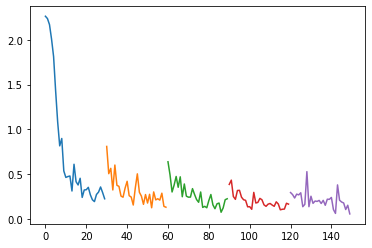

In [7]:
loss_plot(standard_total_loss_no_dropout)

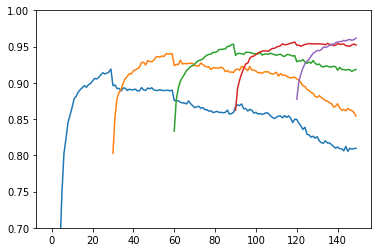

In [8]:
accuracy_plot(standard_prec_no_dropout)

No handles with labels found to put in legend.


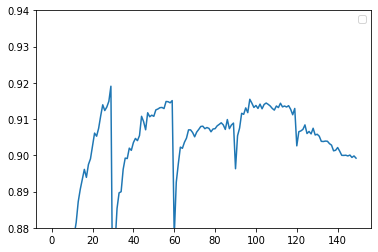

In [9]:
avg_precision_plot([standard_prec_no_dropout])

In [10]:
lamda = 400
mlp_consolidation_no_dropout = MLP(
    DATASET_CONFIGS['mnist']['size']**2,
    DATASET_CONFIGS['mnist']['classes'],
    hidden_size,
    hidden_layer_num,
    0,
    0,
    lamda,
)
torch.autograd.set_detect_anomaly(True)

utils.gaussian_initialize(mlp_consolidation_no_dropout)

# run the standard experiment.
consolidate = True
ewc_prec_no_dropout, ewc_total_loss_no_dropout, ewc_ce_loss_no_dropout, ewc_ewc_loss_no_dropout =train(
    mlp_consolidation_no_dropout, train_datasets, test_datasets,
    epochs_per_task,
    batch_size,
    test_size,
    consolidate,
    fisher_estimation_sample_size,
    lr,
    weight_decay,
    eval_log_interval,
    loss_log_interval,
    cuda
)

=> task: 1/5 | epoch: 1/30 | progress: [60032/60000] (100%) | prec: 0.3333 | loss => ce: 2.264 / ewc: 0.0 / total: 2.264: : 469it [00:30, 15.13it/s]
=> task: 1/5 | epoch: 2/30 | progress: [256/60000] (0%) | prec: 0.4141 | loss => ce: 2.262 / ewc: 0.0 / total: 2.262: : 2it [00:00, 12.99it/s]

Test Accuracy {1: [0.3848876953125]}
total loss {1: [2.264204740524292]} cross entropy {1: [2.264204740524292]} ewc {1: [0.0]}


=> task: 1/5 | epoch: 2/30 | progress: [60032/60000] (100%) | prec: 0.5938 | loss => ce: 2.197 / ewc: 0.0 / total: 2.197: : 469it [00:31, 15.02it/s]
=> task: 1/5 | epoch: 3/30 | progress: [256/60000] (0%) | prec: 0.5938 | loss => ce: 2.202 / ewc: 0.0 / total: 2.202: : 2it [00:00, 13.18it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875]}
total loss {1: [2.264204740524292, 2.1971731185913086]} cross entropy {1: [2.264204740524292, 2.1971731185913086]} ewc {1: [0.0, 0.0]}


=> task: 1/5 | epoch: 3/30 | progress: [60032/60000] (100%) | prec: 0.6667 | loss => ce: 2.095 / ewc: 0.0 / total: 2.095: : 469it [00:30, 15.15it/s]
=> task: 1/5 | epoch: 4/30 | progress: [256/60000] (0%) | prec: 0.6094 | loss => ce: 2.123 / ewc: 0.0 / total: 2.123: : 2it [00:00, 13.76it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375]}
total loss {1: [2.264204740524292, 2.1971731185913086, 2.0950424671173096]} cross entropy {1: [2.264204740524292, 2.1971731185913086, 2.0950424671173096]} ewc {1: [0.0, 0.0, 0.0]}


=> task: 1/5 | epoch: 4/30 | progress: [60032/60000] (100%) | prec: 0.6458 | loss => ce: 1.911 / ewc: 0.0 / total: 1.911: : 469it [00:31, 15.04it/s]
=> task: 1/5 | epoch: 5/30 | progress: [256/60000] (0%) | prec: 0.6484 | loss => ce: 1.931 / ewc: 0.0 / total: 1.931: : 2it [00:00, 13.34it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375]}
total loss {1: [2.264204740524292, 2.1971731185913086, 2.0950424671173096, 1.9106310606002808]} cross entropy {1: [2.264204740524292, 2.1971731185913086, 2.0950424671173096, 1.9106310606002808]} ewc {1: [0.0, 0.0, 0.0, 0.0]}


=> task: 1/5 | epoch: 5/30 | progress: [60032/60000] (100%) | prec: 0.6562 | loss => ce: 1.593 / ewc: 0.0 / total: 1.593: : 469it [00:30, 15.18it/s]
=> task: 1/5 | epoch: 6/30 | progress: [256/60000] (0%) | prec: 0.7656 | loss => ce: 1.577 / ewc: 0.0 / total: 1.577: : 2it [00:00, 13.32it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875]}
total loss {1: [2.264204740524292, 2.1971731185913086, 2.0950424671173096, 1.9106310606002808, 1.5929194688796997]} cross entropy {1: [2.264204740524292, 2.1971731185913086, 2.0950424671173096, 1.9106310606002808, 1.5929194688796997]} ewc {1: [0.0, 0.0, 0.0, 0.0, 0.0]}


=> task: 1/5 | epoch: 6/30 | progress: [60032/60000] (100%) | prec: 0.7812 | loss => ce: 1.176 / ewc: 0.0 / total: 1.176: : 469it [00:30, 15.17it/s]
=> task: 1/5 | epoch: 7/30 | progress: [256/60000] (0%) | prec: 0.7812 | loss => ce: 1.192 / ewc: 0.0 / total: 1.192: : 2it [00:00, 13.28it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875]}
total loss {1: [2.264204740524292, 2.1971731185913086, 2.0950424671173096, 1.9106310606002808, 1.5929194688796997, 1.1755331754684448]} cross entropy {1: [2.264204740524292, 2.1971731185913086, 2.0950424671173096, 1.9106310606002808, 1.5929194688796997, 1.1755331754684448]} ewc {1: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}


=> task: 1/5 | epoch: 7/30 | progress: [60032/60000] (100%) | prec: 0.75 | loss => ce: 1.024 / ewc: 0.0 / total: 1.024: : 469it [00:30, 15.16it/s]    
=> task: 1/5 | epoch: 8/30 | progress: [256/60000] (0%) | prec: 0.7344 | loss => ce: 0.968 / ewc: 0.0 / total: 0.968: : 2it [00:00, 13.47it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875]}
total loss {1: [2.264204740524292, 2.1971731185913086, 2.0950424671173096, 1.9106310606002808, 1.5929194688796997, 1.1755331754684448, 1.0241435766220093]} cross entropy {1: [2.264204740524292, 2.1971731185913086, 2.0950424671173096, 1.9106310606002808, 1.5929194688796997, 1.1755331754684448, 1.0241435766220093]} ewc {1: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}


=> task: 1/5 | epoch: 8/30 | progress: [60032/60000] (100%) | prec: 0.7708 | loss => ce: 0.8691 / ewc: 0.0 / total: 0.8691: : 469it [00:31, 15.05it/s]
=> task: 1/5 | epoch: 9/30 | progress: [256/60000] (0%) | prec: 0.8203 | loss => ce: 0.833 / ewc: 0.0 / total: 0.833: : 2it [00:00, 13.19it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375]}
total loss {1: [2.264204740524292, 2.1971731185913086, 2.0950424671173096, 1.9106310606002808, 1.5929194688796997, 1.1755331754684448, 1.0241435766220093, 0.8691036105155945]} cross entropy {1: [2.264204740524292, 2.1971731185913086, 2.0950424671173096, 1.9106310606002808, 1.5929194688796997, 1.1755331754684448, 1.0241435766220093, 0.8691036105155945]} ewc {1: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}


=> task: 1/5 | epoch: 9/30 | progress: [60032/60000] (100%) | prec: 0.875 | loss => ce: 0.5787 / ewc: 0.0 / total: 0.5787: : 469it [00:30, 15.19it/s] 
=> task: 1/5 | epoch: 10/30 | progress: [256/60000] (0%) | prec: 0.8047 | loss => ce: 0.6161 / ewc: 0.0 / total: 0.6161: : 2it [00:00, 13.37it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625]}
total loss {1: [2.264204740524292, 2.1971731185913086, 2.0950424671173096, 1.9106310606002808, 1.5929194688796997, 1.1755331754684448, 1.0241435766220093, 0.8691036105155945, 0.5787120461463928]} cross entropy {1: [2.264204740524292, 2.1971731185913086, 2.0950424671173096, 1.9106310606002808, 1.5929194688796997, 1.1755331754684448, 1.0241435766220093, 0.8691036105155945, 0.5787120461463928]} ewc {1: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}


=> task: 1/5 | epoch: 10/30 | progress: [60032/60000] (100%) | prec: 0.8229 | loss => ce: 0.7373 / ewc: 0.0 / total: 0.7373: : 469it [00:30, 15.20it/s]
=> task: 1/5 | epoch: 11/30 | progress: [384/60000] (1%) | prec: 0.8359 | loss => ce: 0.6066 / ewc: 0.0 / total: 0.6066: : 2it [00:00, 14.59it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875]}
total loss {1: [2.264204740524292, 2.1971731185913086, 2.0950424671173096, 1.9106310606002808, 1.5929194688796997, 1.1755331754684448, 1.0241435766220093, 0.8691036105155945, 0.5787120461463928, 0.737260639667511]} cross entropy {1: [2.264204740524292, 2.1971731185913086, 2.0950424671173096, 1.9106310606002808, 1.5929194688796997, 1.1755331754684448, 1.0241435766220093, 0.8691036105155945, 0.5787120461463928, 0.737260639667511]} ewc {1: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}


=> task: 1/5 | epoch: 11/30 | progress: [60032/60000] (100%) | prec: 0.8333 | loss => ce: 0.622 / ewc: 0.0 / total: 0.622: : 469it [00:30, 15.16it/s]  
=> task: 1/5 | epoch: 12/30 | progress: [256/60000] (0%) | prec: 0.8516 | loss => ce: 0.5047 / ewc: 0.0 / total: 0.5047: : 2it [00:00, 14.58it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625]}
total loss {1: [2.264204740524292, 2.1971731185913086, 2.0950424671173096, 1.9106310606002808, 1.5929194688796997, 1.1755331754684448, 1.0241435766220093, 0.8691036105155945, 0.5787120461463928, 0.737260639667511, 0.6219980120658875]} cross entropy {1: [2.264204740524292, 2.1971731185913086, 2.0950424671173096, 1.9106310606002808, 1.5929194688796997, 1.1755331754684448, 1.0241435766220093, 0.8691036105155945, 0.5787120461463928, 0.737260639667511, 0.6219980120658875]} ewc {1: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}


=> task: 1/5 | epoch: 12/30 | progress: [60032/60000] (100%) | prec: 0.8958 | loss => ce: 0.4742 / ewc: 0.0 / total: 0.4742: : 469it [00:30, 15.26it/s]
=> task: 1/5 | epoch: 13/30 | progress: [256/60000] (0%) | prec: 0.8516 | loss => ce: 0.4456 / ewc: 0.0 / total: 0.4456: : 2it [00:00, 14.56it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625]}
total loss {1: [2.264204740524292, 2.1971731185913086, 2.0950424671173096, 1.9106310606002808, 1.5929194688796997, 1.1755331754684448, 1.0241435766220093, 0.8691036105155945, 0.5787120461463928, 0.737260639667511, 0.6219980120658875, 0.4741738736629486]} cross entropy {1: [2.264204740524292, 2.1971731185913086, 2.0950424671173096, 1.9106310606002808, 1.5929194688796997, 1.1755331754684448, 1.0241435766220093, 0.8691036105155945, 0.5787120461463928, 0.737260639667511, 0.6219980120658875, 0.4741738736629486]} ewc {1: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}


=> task: 1/5 | epoch: 13/30 | progress: [60032/60000] (100%) | prec: 0.8854 | loss => ce: 0.3637 / ewc: 0.0 / total: 0.3637: : 469it [00:30, 15.22it/s]
=> task: 1/5 | epoch: 14/30 | progress: [256/60000] (0%) | prec: 0.8828 | loss => ce: 0.4271 / ewc: 0.0 / total: 0.4271: : 2it [00:00, 14.09it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125]}
total loss {1: [2.264204740524292, 2.1971731185913086, 2.0950424671173096, 1.9106310606002808, 1.5929194688796997, 1.1755331754684448, 1.0241435766220093, 0.8691036105155945, 0.5787120461463928, 0.737260639667511, 0.6219980120658875, 0.4741738736629486, 0.36369168758392334]} cross entropy {1: [2.264204740524292, 2.1971731185913086, 2.0950424671173096, 1.9106310606002808, 1.5929194688796997, 1.1755331754684448, 1.0241435766220093, 0.8691036105155945, 0.5787120461463928, 0.737260639667511, 0.6219980120658875, 0.4741738736629486, 0.36369168758392334]} ewc {1: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}


=> task: 1/5 | epoch: 14/30 | progress: [60032/60000] (100%) | prec: 0.8646 | loss => ce: 0.4028 / ewc: 0.0 / total: 0.4028: : 469it [00:30, 15.21it/s]
=> task: 1/5 | epoch: 15/30 | progress: [384/60000] (1%) | prec: 0.8828 | loss => ce: 0.3919 / ewc: 0.0 / total: 0.3919: : 2it [00:00, 14.54it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375]}
total loss {1: [2.264204740524292, 2.1971731185913086, 2.0950424671173096, 1.9106310606002808, 1.5929194688796997, 1.1755331754684448, 1.0241435766220093, 0.8691036105155945, 0.5787120461463928, 0.737260639667511, 0.6219980120658875, 0.4741738736629486, 0.36369168758392334, 0.4028358459472656]} cross entropy {1: [2.264204740524292, 2.1971731185913086, 2.0950424671173096, 1.9106310606002808, 1.5929194688796997, 1.1755331754684448, 1.0241435766220093, 0.8691036105155945, 0.5787120461463928, 0.737260639667511, 0.6219980120658875, 0.4741738736629486, 0.36369168758392334, 0.4028358459472656]} ewc {1: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}


=> task: 1/5 | epoch: 15/30 | progress: [60032/60000] (100%) | prec: 0.9062 | loss => ce: 0.3901 / ewc: 0.0 / total: 0.3901: : 469it [00:30, 15.22it/s]
=> task: 1/5 | epoch: 16/30 | progress: [256/60000] (0%) | prec: 0.8828 | loss => ce: 0.3526 / ewc: 0.0 / total: 0.3526: : 2it [00:00, 14.10it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125]}
total loss {1: [2.264204740524292, 2.1971731185913086, 2.0950424671173096, 1.9106310606002808, 1.5929194688796997, 1.1755331754684448, 1.0241435766220093, 0.8691036105155945, 0.5787120461463928, 0.737260639667511, 0.6219980120658875, 0.4741738736629486, 0.36369168758392334, 0.4028358459472656, 0.39006730914115906]} cross entropy {1: [2.264204740524292, 2.1971731185913086, 2.0950424671173096, 1.9106310606002808, 1.5929194688796997, 1.1755331754684448, 1.0241435766220093, 0.8691036105155945, 0.5787120461463928, 0.737260639667511, 0.6219980120658875, 0.4741738736629486, 0.36369168758392334, 0.4028358459472656, 0.39006730914115906]} ewc {1: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}


=> task: 1/5 | epoch: 16/30 | progress: [60032/60000] (100%) | prec: 0.8438 | loss => ce: 0.4446 / ewc: 0.0 / total: 0.4446: : 469it [00:30, 15.23it/s]
=> task: 1/5 | epoch: 17/30 | progress: [256/60000] (0%) | prec: 0.7734 | loss => ce: 0.5746 / ewc: 0.0 / total: 0.5746: : 2it [00:00, 13.52it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375]}
total loss {1: [2.264204740524292, 2.1971731185913086, 2.0950424671173096, 1.9106310606002808, 1.5929194688796997, 1.1755331754684448, 1.0241435766220093, 0.8691036105155945, 0.5787120461463928, 0.737260639667511, 0.6219980120658875, 0.4741738736629486, 0.36369168758392334, 0.4028358459472656, 0.39006730914115906, 0.4445866644382477]} cross entropy {1: [2.264204740524292, 2.1971731185913086, 2.0950424671173096, 1.9106310606002808, 1.5929194688796997, 1.1755331754684448, 1.0241435766220093, 0.8691036105155945, 0.5787120461463928, 0.737260639667511, 0.6219980120658875, 0.4741738736629486, 0.36369168758392334, 0.4028358459472656, 0.39006730914115906, 0.4445866644382477]} ewc {1: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

=> task: 1/5 | epoch: 17/30 | progress: [60032/60000] (100%) | prec: 0.9479 | loss => ce: 0.275 / ewc: 0.0 / total: 0.275: : 469it [00:30, 15.21it/s]  
=> task: 1/5 | epoch: 18/30 | progress: [256/60000] (0%) | prec: 0.875 | loss => ce: 0.418 / ewc: 0.0 / total: 0.418: : 2it [00:00, 14.52it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875]}
total loss {1: [2.264204740524292, 2.1971731185913086, 2.0950424671173096, 1.9106310606002808, 1.5929194688796997, 1.1755331754684448, 1.0241435766220093, 0.8691036105155945, 0.5787120461463928, 0.737260639667511, 0.6219980120658875, 0.4741738736629486, 0.36369168758392334, 0.4028358459472656, 0.39006730914115906, 0.4445866644382477, 0.2749745547771454]} cross entropy {1: [2.264204740524292, 2.1971731185913086, 2.0950424671173096, 1.9106310606002808, 1.5929194688796997, 1.1755331754684448, 1.0241435766220093, 0.8691036105155945, 0.5787120461463928, 0.737260639667511, 0.6219980120658875, 0.4741738736629486, 0.36369168758392334, 0.4028358459472656, 0.39006730914115906, 0.4445866644382477, 0.2

=> task: 1/5 | epoch: 18/30 | progress: [60032/60000] (100%) | prec: 0.9271 | loss => ce: 0.3476 / ewc: 0.0 / total: 0.3476: : 469it [00:30, 15.21it/s]
=> task: 1/5 | epoch: 19/30 | progress: [256/60000] (0%) | prec: 0.8438 | loss => ce: 0.4402 / ewc: 0.0 / total: 0.4402: : 2it [00:00, 13.90it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625]}
total loss {1: [2.264204740524292, 2.1971731185913086, 2.0950424671173096, 1.9106310606002808, 1.5929194688796997, 1.1755331754684448, 1.0241435766220093, 0.8691036105155945, 0.5787120461463928, 0.737260639667511, 0.6219980120658875, 0.4741738736629486, 0.36369168758392334, 0.4028358459472656, 0.39006730914115906, 0.4445866644382477, 0.2749745547771454, 0.34762024879455566]} cross entropy {1: [2.264204740524292, 2.1971731185913086, 2.0950424671173096, 1.9106310606002808, 1.5929194688796997, 1.1755331754684448, 1.0241435766220093, 0.8691036105155945, 0.5787120461463928, 0.737260639667511, 0.6219980120658875, 0.4741738736629486, 0.36369168758392334, 0.4028358459472656, 0.39006730

=> task: 1/5 | epoch: 19/30 | progress: [60032/60000] (100%) | prec: 0.875 | loss => ce: 0.2958 / ewc: 0.0 / total: 0.2958: : 469it [00:30, 15.18it/s] 
=> task: 1/5 | epoch: 20/30 | progress: [256/60000] (0%) | prec: 0.8828 | loss => ce: 0.4342 / ewc: 0.0 / total: 0.4342: : 2it [00:00, 14.29it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875]}
total loss {1: [2.264204740524292, 2.1971731185913086, 2.0950424671173096, 1.9106310606002808, 1.5929194688796997, 1.1755331754684448, 1.0241435766220093, 0.8691036105155945, 0.5787120461463928, 0.737260639667511, 0.6219980120658875, 0.4741738736629486, 0.36369168758392334, 0.4028358459472656, 0.39006730914115906, 0.4445866644382477, 0.2749745547771454, 0.34762024879455566, 0.2958211302757263]} cross entropy {1: [2.264204740524292, 2.1971731185913086, 2.0950424671173096, 1.9106310606002808, 1.5929194688796997, 1.1755331754684448, 1.0241435766220093, 0.8691036105155945, 0.5787120461463928, 0.737260639667511, 0.6219980120658875, 0.4741738736629486, 0.363691687583923

=> task: 1/5 | epoch: 20/30 | progress: [60032/60000] (100%) | prec: 0.8854 | loss => ce: 0.3606 / ewc: 0.0 / total: 0.3606: : 469it [00:30, 15.21it/s]
=> task: 1/5 | epoch: 21/30 | progress: [384/60000] (1%) | prec: 0.9297 | loss => ce: 0.2541 / ewc: 0.0 / total: 0.2541: : 2it [00:00, 14.38it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875]}
total loss {1: [2.264204740524292, 2.1971731185913086, 2.0950424671173096, 1.9106310606002808, 1.5929194688796997, 1.1755331754684448, 1.0241435766220093, 0.8691036105155945, 0.5787120461463928, 0.737260639667511, 0.6219980120658875, 0.4741738736629486, 0.36369168758392334, 0.4028358459472656, 0.39006730914115906, 0.4445866644382477, 0.2749745547771454, 0.34762024879455566, 0.2958211302757263, 0.36059442162513733]} cross entropy {1: [2.264204740524292, 2.1971731185913086, 2.0950424671173096, 1.9106310606002808, 1.5929194688796997, 1.1755331754684448, 1.0241435766220093, 0.8691036105155945, 0.5787120461463928, 0.737260639667511, 0.6219980120658875, 0.

=> task: 1/5 | epoch: 21/30 | progress: [60032/60000] (100%) | prec: 0.8854 | loss => ce: 0.3312 / ewc: 0.0 / total: 0.3312: : 469it [00:30, 15.18it/s]
=> task: 1/5 | epoch: 22/30 | progress: [256/60000] (0%) | prec: 0.9531 | loss => ce: 0.2235 / ewc: 0.0 / total: 0.2235: : 2it [00:00, 14.41it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375]}
total loss {1: [2.264204740524292, 2.1971731185913086, 2.0950424671173096, 1.9106310606002808, 1.5929194688796997, 1.1755331754684448, 1.0241435766220093, 0.8691036105155945, 0.5787120461463928, 0.737260639667511, 0.6219980120658875, 0.4741738736629486, 0.36369168758392334, 0.4028358459472656, 0.39006730914115906, 0.4445866644382477, 0.2749745547771454, 0.34762024879455566, 0.2958211302757263, 0.36059442162513733, 0.33123284578323364]} cross entropy {1: [2.264204740524292, 2.1971731185913086, 2.0950424671173096, 1.9106310606002808, 1.5929194688796997, 1.1755331754684448, 1.0241435766220093, 0.8691036105155945, 0.5787120461463928, 0.737

=> task: 1/5 | epoch: 22/30 | progress: [60032/60000] (100%) | prec: 0.875 | loss => ce: 0.3583 / ewc: 0.0 / total: 0.3583: : 469it [00:30, 15.21it/s] 
=> task: 1/5 | epoch: 23/30 | progress: [256/60000] (0%) | prec: 0.9219 | loss => ce: 0.2814 / ewc: 0.0 / total: 0.2814: : 2it [00:00, 13.84it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875]}
total loss {1: [2.264204740524292, 2.1971731185913086, 2.0950424671173096, 1.9106310606002808, 1.5929194688796997, 1.1755331754684448, 1.0241435766220093, 0.8691036105155945, 0.5787120461463928, 0.737260639667511, 0.6219980120658875, 0.4741738736629486, 0.36369168758392334, 0.4028358459472656, 0.39006730914115906, 0.4445866644382477, 0.2749745547771454, 0.34762024879455566, 0.2958211302757263, 0.36059442162513733, 0.33123284578323364, 0.3583435118198395]} cross entropy {1: [2.264204740524292, 2.1971731185913086, 2.0950424671173096, 1.9106310606002808, 1.5929194688796997, 1.1755331754684448, 1.0241435766220093, 0.869103

=> task: 1/5 | epoch: 23/30 | progress: [60032/60000] (100%) | prec: 0.9167 | loss => ce: 0.3029 / ewc: 0.0 / total: 0.3029: : 469it [00:30, 15.25it/s]
=> task: 1/5 | epoch: 24/30 | progress: [256/60000] (0%) | prec: 0.8828 | loss => ce: 0.399 / ewc: 0.0 / total: 0.399: : 2it [00:00, 13.99it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625]}
total loss {1: [2.264204740524292, 2.1971731185913086, 2.0950424671173096, 1.9106310606002808, 1.5929194688796997, 1.1755331754684448, 1.0241435766220093, 0.8691036105155945, 0.5787120461463928, 0.737260639667511, 0.6219980120658875, 0.4741738736629486, 0.36369168758392334, 0.4028358459472656, 0.39006730914115906, 0.4445866644382477, 0.2749745547771454, 0.34762024879455566, 0.2958211302757263, 0.36059442162513733, 0.33123284578323364, 0.3583435118198395, 0.302905410528183]} cross entropy {1: [2.264204740524292, 2.1971731185913086, 2.0950424671173096, 1.9106310606002808, 1.5929194688796997, 1.1755331754684448, 

=> task: 1/5 | epoch: 24/30 | progress: [60032/60000] (100%) | prec: 0.9167 | loss => ce: 0.284 / ewc: 0.0 / total: 0.284: : 469it [00:30, 15.20it/s]  
=> task: 1/5 | epoch: 25/30 | progress: [256/60000] (0%) | prec: 0.8984 | loss => ce: 0.356 / ewc: 0.0 / total: 0.356: : 2it [00:00, 14.50it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125]}
total loss {1: [2.264204740524292, 2.1971731185913086, 2.0950424671173096, 1.9106310606002808, 1.5929194688796997, 1.1755331754684448, 1.0241435766220093, 0.8691036105155945, 0.5787120461463928, 0.737260639667511, 0.6219980120658875, 0.4741738736629486, 0.36369168758392334, 0.4028358459472656, 0.39006730914115906, 0.4445866644382477, 0.2749745547771454, 0.34762024879455566, 0.2958211302757263, 0.36059442162513733, 0.33123284578323364, 0.3583435118198395, 0.302905410528183, 0.28401973843574524]} cross entropy {1: [2.264204740524292, 2.1971731185913086, 2.0950424671173096, 1.9106310606002808, 1.59

=> task: 1/5 | epoch: 25/30 | progress: [60032/60000] (100%) | prec: 0.8646 | loss => ce: 0.4077 / ewc: 0.0 / total: 0.4077: : 469it [00:30, 15.20it/s]
=> task: 1/5 | epoch: 26/30 | progress: [256/60000] (0%) | prec: 0.9062 | loss => ce: 0.336 / ewc: 0.0 / total: 0.336: : 2it [00:00, 13.93it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625]}
total loss {1: [2.264204740524292, 2.1971731185913086, 2.0950424671173096, 1.9106310606002808, 1.5929194688796997, 1.1755331754684448, 1.0241435766220093, 0.8691036105155945, 0.5787120461463928, 0.737260639667511, 0.6219980120658875, 0.4741738736629486, 0.36369168758392334, 0.4028358459472656, 0.39006730914115906, 0.4445866644382477, 0.2749745547771454, 0.34762024879455566, 0.2958211302757263, 0.36059442162513733, 0.33123284578323364, 0.3583435118198395, 0.302905410528183, 0.28401973843574524, 0.4076852798461914]} cross entropy {1: [2.264204740524292, 2.1971731185913086, 2.095042

=> task: 1/5 | epoch: 26/30 | progress: [60032/60000] (100%) | prec: 0.8854 | loss => ce: 0.3373 / ewc: 0.0 / total: 0.3373: : 469it [00:30, 15.23it/s]
=> task: 1/5 | epoch: 27/30 | progress: [256/60000] (0%) | prec: 0.8984 | loss => ce: 0.3533 / ewc: 0.0 / total: 0.3533: : 2it [00:00, 14.11it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875]}
total loss {1: [2.264204740524292, 2.1971731185913086, 2.0950424671173096, 1.9106310606002808, 1.5929194688796997, 1.1755331754684448, 1.0241435766220093, 0.8691036105155945, 0.5787120461463928, 0.737260639667511, 0.6219980120658875, 0.4741738736629486, 0.36369168758392334, 0.4028358459472656, 0.39006730914115906, 0.4445866644382477, 0.2749745547771454, 0.34762024879455566, 0.2958211302757263, 0.36059442162513733, 0.33123284578323364, 0.3583435118198395, 0.302905410528183, 0.28401973843574524, 0.4076852798461914, 0.33730950951576233]} cross entropy {1: [2.2642047

=> task: 1/5 | epoch: 27/30 | progress: [60032/60000] (100%) | prec: 0.9062 | loss => ce: 0.3839 / ewc: 0.0 / total: 0.3839: : 469it [00:30, 15.20it/s]
=> task: 1/5 | epoch: 28/30 | progress: [384/60000] (1%) | prec: 0.9375 | loss => ce: 0.2241 / ewc: 0.0 / total: 0.2241: : 2it [00:00, 14.28it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125]}
total loss {1: [2.264204740524292, 2.1971731185913086, 2.0950424671173096, 1.9106310606002808, 1.5929194688796997, 1.1755331754684448, 1.0241435766220093, 0.8691036105155945, 0.5787120461463928, 0.737260639667511, 0.6219980120658875, 0.4741738736629486, 0.36369168758392334, 0.4028358459472656, 0.39006730914115906, 0.4445866644382477, 0.2749745547771454, 0.34762024879455566, 0.2958211302757263, 0.36059442162513733, 0.33123284578323364, 0.3583435118198395, 0.302905410528183, 0.28401973843574524, 0.4076852798461914, 0.33730950951576233, 0.3838790953

=> task: 1/5 | epoch: 28/30 | progress: [60032/60000] (100%) | prec: 0.875 | loss => ce: 0.4032 / ewc: 0.0 / total: 0.4032: : 469it [00:30, 15.15it/s] 
=> task: 1/5 | epoch: 29/30 | progress: [256/60000] (0%) | prec: 0.8672 | loss => ce: 0.3719 / ewc: 0.0 / total: 0.3719: : 2it [00:00, 14.16it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375]}
total loss {1: [2.264204740524292, 2.1971731185913086, 2.0950424671173096, 1.9106310606002808, 1.5929194688796997, 1.1755331754684448, 1.0241435766220093, 0.8691036105155945, 0.5787120461463928, 0.737260639667511, 0.6219980120658875, 0.4741738736629486, 0.36369168758392334, 0.4028358459472656, 0.39006730914115906, 0.4445866644382477, 0.2749745547771454, 0.34762024879455566, 0.2958211302757263, 0.36059442162513733, 0.33123284578323364, 0.3583435118198395, 0.302905410528183, 0.28401973843574524, 0.4076852798461914, 0.33730950951576

=> task: 1/5 | epoch: 29/30 | progress: [60032/60000] (100%) | prec: 0.9167 | loss => ce: 0.2862 / ewc: 0.0 / total: 0.2862: : 469it [00:30, 15.24it/s]
=> task: 1/5 | epoch: 30/30 | progress: [256/60000] (0%) | prec: 0.9219 | loss => ce: 0.3269 / ewc: 0.0 / total: 0.3269: : 2it [00:00, 14.10it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875]}
total loss {1: [2.264204740524292, 2.1971731185913086, 2.0950424671173096, 1.9106310606002808, 1.5929194688796997, 1.1755331754684448, 1.0241435766220093, 0.8691036105155945, 0.5787120461463928, 0.737260639667511, 0.6219980120658875, 0.4741738736629486, 0.36369168758392334, 0.4028358459472656, 0.39006730914115906, 0.4445866644382477, 0.2749745547771454, 0.34762024879455566, 0.2958211302757263, 0.36059442162513733, 0.33123284578323364, 0.3583435118198395, 0.302905410528183, 0.28401973843574524, 0.4076852798461914,

=> task: 1/5 | epoch: 30/30 | progress: [60032/60000] (100%) | prec: 0.8854 | loss => ce: 0.3638 / ewc: 0.0 / total: 0.3638: : 469it [00:30, 15.21it/s]


Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625]}
total loss {1: [2.264204740524292, 2.1971731185913086, 2.0950424671173096, 1.9106310606002808, 1.5929194688796997, 1.1755331754684448, 1.0241435766220093, 0.8691036105155945, 0.5787120461463928, 0.737260639667511, 0.6219980120658875, 0.4741738736629486, 0.36369168758392334, 0.4028358459472656, 0.39006730914115906, 0.4445866644382477, 0.2749745547771454, 0.34762024879455566, 0.2958211302757263, 0.36059442162513733, 0.33123284578323364, 0.3583435118198395, 0.302905410528183, 0.28401973843574524, 0.

0it [00:00, ?it/s]

 Done!


=> task: 2/5 | epoch: 1/30 | progress: [60032/60000] (100%) | prec: 0.8021 | loss => ce: 0.8816 / ewc: 0.0435 / total: 0.9251: : 469it [01:27,  5.35it/s] 
=> task: 2/5 | epoch: 2/30 | progress: [128/60000] (0%) | prec: 0.7656 | loss => ce: 0.874 / ewc: 0.04358 / total: 0.9176: : 1it [00:00,  5.56it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375], 2: [0.8013916015625]}
total loss {1: [2.264204740524292, 2.1971731185913086, 2.0950424671173096, 1.9106310606002808, 1.5929194688796997, 1.1755331754684448, 1.0241435766220093, 0.8691036105155945, 0.5787120461463928, 0.737260639667511, 0.6219980120658875, 0.4741738736629486, 0.36369168758392334, 0.4028358459472656, 0.39006730914115906, 0.4445866644382477, 0.2749745547771454, 0.34762024879455566, 0.2958211302757263, 0.36059442162513733, 0.33123284578323364, 0.3583435118198395, 0.302905

=> task: 2/5 | epoch: 2/30 | progress: [60032/60000] (100%) | prec: 0.8854 | loss => ce: 0.4516 / ewc: 0.0678 / total: 0.5194: : 469it [01:26,  5.42it/s] 
=> task: 2/5 | epoch: 3/30 | progress: [256/60000] (0%) | prec: 0.8594 | loss => ce: 0.5831 / ewc: 0.06786 / total: 0.6509: : 2it [00:00, 11.01it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125], 2: [0.8013916015625, 0.851806640625]}
total loss {1: [2.264204740524292, 2.1971731185913086, 2.0950424671173096, 1.9106310606002808, 1.5929194688796997, 1.1755331754684448, 1.0241435766220093, 0.8691036105155945, 0.5787120461463928, 0.737260639667511, 0.6219980120658875, 0.4741738736629486, 0.36369168758392334, 0.4028358459472656, 0.39006730914115906, 0.4445866644382477, 0.2749745547771454, 0.34762024879455566, 0.2958211302757263, 0.36059442162513733, 0.33123284578323

=> task: 2/5 | epoch: 3/30 | progress: [60032/60000] (100%) | prec: 0.8646 | loss => ce: 0.5423 / ewc: 0.07793 / total: 0.6203: : 469it [01:28,  5.29it/s]
0it [00:00, ?it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625], 2: [0.8013916015625, 0.851806640625, 0.87060546875]}
total loss {1: [2.264204740524292, 2.1971731185913086, 2.0950424671173096, 1.9106310606002808, 1.5929194688796997, 1.1755331754684448, 1.0241435766220093, 0.8691036105155945, 0.5787120461463928, 0.737260639667511, 0.6219980120658875, 0.4741738736629486, 0.36369168758392334, 0.4028358459472656, 0.39006730914115906, 0.4445866644382477, 0.2749745547771454, 0.34762024879455566, 0.2958211302757263, 0.360

=> task: 2/5 | epoch: 4/30 | progress: [60032/60000] (100%) | prec: 0.8854 | loss => ce: 0.4145 / ewc: 0.08256 / total: 0.4971: : 469it [01:26,  5.44it/s]
=> task: 2/5 | epoch: 5/30 | progress: [128/60000] (0%) | prec: 0.8828 | loss => ce: 0.4007 / ewc: 0.08257 / total: 0.4833: : 1it [00:00,  8.08it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125], 2: [0.8013916015625, 0.851806640625, 0.87060546875, 0.8812255859375]}
total loss {1: [2.264204740524292, 2.1971731185913086, 2.0950424671173096, 1.9106310606002808, 1.5929194688796997, 1.1755331754684448, 1.0241435766220093, 0.8691036105155945, 0.5787120461463928, 0.737260639667511, 0.6219980120658875, 0.4741738736629486, 0.36369168758392334, 0.4028358459472656, 0.39006730914115906, 0.4445866644382477, 0.2749745547771454, 0.34762024879

=> task: 2/5 | epoch: 5/30 | progress: [60032/60000] (100%) | prec: 0.9167 | loss => ce: 0.3565 / ewc: 0.08499 / total: 0.4415: : 469it [01:25,  5.51it/s]
0it [00:00, ?it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375], 2: [0.8013916015625, 0.851806640625, 0.87060546875, 0.8812255859375, 0.8851318359375]}
total loss {1: [2.264204740524292, 2.1971731185913086, 2.0950424671173096, 1.9106310606002808, 1.5929194688796997, 1.1755331754684448, 1.0241435766220093, 0.8691036105155945, 0.5787120461463928, 0.737260639667511, 0.6219980120658875, 0.4741738736629486, 0.36369168758392334, 0.4028358459472656, 0.39006730914115906, 0.4445866644382477,

=> task: 2/5 | epoch: 6/30 | progress: [60032/60000] (100%) | prec: 0.8958 | loss => ce: 0.3676 / ewc: 0.08626 / total: 0.4538: : 469it [01:21,  5.73it/s]
=> task: 2/5 | epoch: 7/30 | progress: [128/60000] (0%) | prec: 0.8594 | loss => ce: 0.4989 / ewc: 0.08624 / total: 0.5852: : 1it [00:00,  7.34it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125], 2: [0.8013916015625, 0.851806640625, 0.87060546875, 0.8812255859375, 0.8851318359375, 0.8916015625]}
total loss {1: [2.264204740524292, 2.1971731185913086, 2.0950424671173096, 1.9106310606002808, 1.5929194688796997, 1.1755331754684448, 1.0241435766220093, 0.8691036105155945, 0.5787120461463928, 0.737260639667511, 0.6219980120658875, 0.4741738736629486, 0.36369168758392334, 0.4028358459472656, 0.390067309

=> task: 2/5 | epoch: 7/30 | progress: [60032/60000] (100%) | prec: 0.8542 | loss => ce: 0.4852 / ewc: 0.08676 / total: 0.572: : 469it [01:26,  5.40it/s] 
=> task: 2/5 | epoch: 8/30 | progress: [128/60000] (0%) | prec: 0.9219 | loss => ce: 0.3925 / ewc: 0.08674 / total: 0.4793: : 1it [00:00,  7.76it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375], 2: [0.8013916015625, 0.851806640625, 0.87060546875, 0.8812255859375, 0.8851318359375, 0.8916015625, 0.892822265625]}
total loss {1: [2.264204740524292, 2.1971731185913086, 2.0950424671173096, 1.9106310606002808, 1.5929194688796997, 1.1755331754684448, 1.0241435766220093, 0.8691036105155945, 0.5787120461463928, 0.737260639667511, 0.6219980120658875, 0.4741738736629486, 0.36369168758392334

=> task: 2/5 | epoch: 8/30 | progress: [60032/60000] (100%) | prec: 0.8958 | loss => ce: 0.38 / ewc: 0.0871 / total: 0.4671: : 469it [01:26,  5.43it/s]   
0it [00:00, ?it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125], 2: [0.8013916015625, 0.851806640625, 0.87060546875, 0.8812255859375, 0.8851318359375, 0.8916015625, 0.892822265625, 0.8936767578125]}
total loss {1: [2.264204740524292, 2.1971731185913086, 2.0950424671173096, 1.9106310606002808, 1.5929194688796997, 1.1755331754684448, 1.0241435766220093, 0.8691036105155945, 0.5787120461463928, 0.737260639667511, 0.6219980120658875, 0.4741

=> task: 2/5 | epoch: 9/30 | progress: [60032/60000] (100%) | prec: 0.8646 | loss => ce: 0.3618 / ewc: 0.08726 / total: 0.449: : 469it [01:24,  5.54it/s] 
0it [00:00, ?it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125], 2: [0.8013916015625, 0.851806640625, 0.87060546875, 0.8812255859375, 0.8851318359375, 0.8916015625, 0.892822265625, 0.8936767578125, 0.8978271484375]}
total loss {1: [2.264204740524292, 2.1971731185913086, 2.0950424671173096, 1.9106310606002808, 1.5929194688796997, 1.1755331754684448, 1.0241435766220093, 0.8691036105155945, 0.5787120461463928, 0.737260639

=> task: 2/5 | epoch: 10/30 | progress: [60032/60000] (100%) | prec: 0.9062 | loss => ce: 0.3346 / ewc: 0.0873 / total: 0.4219: : 469it [01:23,  5.61it/s] 
=> task: 2/5 | epoch: 11/30 | progress: [128/60000] (0%) | prec: 0.875 | loss => ce: 0.4309 / ewc: 0.08731 / total: 0.5182: : 1it [00:00,  9.68it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625], 2: [0.8013916015625, 0.851806640625, 0.87060546875, 0.8812255859375, 0.8851318359375, 0.8916015625, 0.892822265625, 0.8936767578125, 0.8978271484375, 0.90185546875]}
total loss {1: [2.264204740524292, 2.1971731185913086, 2.0950424671173096, 1.9106310606002808, 1.5929194688796997, 1.1755331754684448, 1.0241435766220093, 0.8691036105155945,

=> task: 2/5 | epoch: 11/30 | progress: [60032/60000] (100%) | prec: 0.9271 | loss => ce: 0.3789 / ewc: 0.08735 / total: 0.4662: : 469it [01:26,  5.45it/s]
0it [00:00, ?it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375], 2: [0.8013916015625, 0.851806640625, 0.87060546875, 0.8812255859375, 0.8851318359375, 0.8916015625, 0.892822265625, 0.8936767578125, 0.8978271484375, 0.90185546875, 0.9012451171875]}
total loss {1: [2.264204740524292, 2.1971731185913086, 2.0950424671173096, 1.9106310606002808, 1.5929194688796997, 1.1755331754684448, 1.02414

=> task: 2/5 | epoch: 12/30 | progress: [60032/60000] (100%) | prec: 0.8333 | loss => ce: 0.4254 / ewc: 0.08738 / total: 0.5128: : 469it [01:22,  5.72it/s]
0it [00:00, ?it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625], 2: [0.8013916015625, 0.851806640625, 0.87060546875, 0.8812255859375, 0.8851318359375, 0.8916015625, 0.892822265625, 0.8936767578125, 0.8978271484375, 0.90185546875, 0.9012451171875, 0.9046630859375]}
total loss {1: [2.264204740524292, 2.1971731185913086, 2.0950424671173096, 1.9106310606002808, 1.592919468879

=> task: 2/5 | epoch: 13/30 | progress: [60032/60000] (100%) | prec: 0.9271 | loss => ce: 0.3237 / ewc: 0.0874 / total: 0.4111: : 469it [01:22,  5.67it/s] 
0it [00:00, ?it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375], 2: [0.8013916015625, 0.851806640625, 0.87060546875, 0.8812255859375, 0.8851318359375, 0.8916015625, 0.892822265625, 0.8936767578125, 0.8978271484375, 0.90185546875, 0.9012451171875, 0.9046630859375, 0.9041748046875]}
total loss {1: [2.264204740524292, 2.1971731185913086, 2.0950424671173096, 1.9

=> task: 2/5 | epoch: 14/30 | progress: [60032/60000] (100%) | prec: 0.9167 | loss => ce: 0.3171 / ewc: 0.08742 / total: 0.4045: : 469it [01:24,  5.56it/s]
=> task: 2/5 | epoch: 15/30 | progress: [128/60000] (0%) | prec: 0.8438 | loss => ce: 0.4246 / ewc: 0.08741 / total: 0.512: : 1it [00:00,  6.28it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125], 2: [0.8013916015625, 0.851806640625, 0.87060546875, 0.8812255859375, 0.8851318359375, 0.8916015625, 0.892822265625, 0.8936767578125, 0.8978271484375, 0.90185546875, 0.9012451171875, 0.9046630859375, 0.9041748046875, 0.9066162109375]}
total loss {1: [2.264204740524292, 2.19717311

=> task: 2/5 | epoch: 15/30 | progress: [60032/60000] (100%) | prec: 0.8958 | loss => ce: 0.3965 / ewc: 0.08741 / total: 0.4839: : 469it [01:27,  5.37it/s]
=> task: 2/5 | epoch: 16/30 | progress: [128/60000] (0%) | prec: 0.9531 | loss => ce: 0.2564 / ewc: 0.08742 / total: 0.3438: : 1it [00:00,  8.30it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375], 2: [0.8013916015625, 0.851806640625, 0.87060546875, 0.8812255859375, 0.8851318359375, 0.8916015625, 0.892822265625, 0.8936767578125, 0.8978271484375, 0.90185546875, 0.9012451171875, 0.9046630859375, 0.9041748046875, 0.9066162109375, 0.908935546875]}
total loss {1

=> task: 2/5 | epoch: 16/30 | progress: [60032/60000] (100%) | prec: 0.9167 | loss => ce: 0.3261 / ewc: 0.08754 / total: 0.4137: : 469it [01:22,  5.66it/s]
=> task: 2/5 | epoch: 17/30 | progress: [128/60000] (0%) | prec: 0.8594 | loss => ce: 0.4553 / ewc: 0.08755 / total: 0.5428: : 0it [00:00, ?it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125], 2: [0.8013916015625, 0.851806640625, 0.87060546875, 0.8812255859375, 0.8851318359375, 0.8916015625, 0.892822265625, 0.8936767578125, 0.8978271484375, 0.90185546875, 0.9012451171875, 0.9046630859375, 0.9041748046875, 0.9066162109375, 0.90893554687

=> task: 2/5 | epoch: 17/30 | progress: [60032/60000] (100%) | prec: 0.9375 | loss => ce: 0.225 / ewc: 0.0876 / total: 0.3126: : 469it [01:21,  5.74it/s] 
0it [00:00, ?it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125], 2: [0.8013916015625, 0.851806640625, 0.87060546875, 0.8812255859375, 0.8851318359375, 0.8916015625, 0.892822265625, 0.8936767578125, 0.8978271484375, 0.90185546875, 0.9012451171875, 0.9046630859375, 0.9041748046875, 0.90661621093

=> task: 2/5 | epoch: 18/30 | progress: [60032/60000] (100%) | prec: 0.875 | loss => ce: 0.4505 / ewc: 0.08762 / total: 0.5382: : 469it [01:22,  5.69it/s] 
0it [00:00, ?it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875], 2: [0.8013916015625, 0.851806640625, 0.87060546875, 0.8812255859375, 0.8851318359375, 0.8916015625, 0.892822265625, 0.8936767578125, 0.8978271484375, 0.90185546875, 0.9012451171875, 0.9046630859375, 0.9041748046875,

=> task: 2/5 | epoch: 19/30 | progress: [60032/60000] (100%) | prec: 0.8958 | loss => ce: 0.3701 / ewc: 0.08769 / total: 0.4578: : 469it [01:22,  5.69it/s]
0it [00:00, ?it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875, 0.9072265625], 2: [0.8013916015625, 0.851806640625, 0.87060546875, 0.8812255859375, 0.8851318359375, 0.8916015625, 0.892822265625, 0.8936767578125, 0.8978271484375, 0.90185546875, 0.9012451171875, 0.9046630859375, 0.

=> task: 2/5 | epoch: 20/30 | progress: [60032/60000] (100%) | prec: 0.875 | loss => ce: 0.4497 / ewc: 0.08777 / total: 0.5374: : 469it [01:24,  5.53it/s] 
=> task: 2/5 | epoch: 21/30 | progress: [128/60000] (0%) | prec: 0.9375 | loss => ce: 0.2543 / ewc: 0.08778 / total: 0.3421: : 0it [00:00, ?it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875, 0.9072265625, 0.9088134765625], 2: [0.8013916015625, 0.851806640625, 0.87060546875, 0.8812255859375, 0.8851318359375, 0.8916015625, 0.892822265625, 0.8936767578125, 0.8978271484375, 0.90185546875, 0.9012451171875, 0.

=> task: 2/5 | epoch: 21/30 | progress: [60032/60000] (100%) | prec: 0.8438 | loss => ce: 0.4815 / ewc: 0.08783 / total: 0.5694: : 469it [01:23,  5.59it/s]
=> task: 2/5 | epoch: 22/30 | progress: [128/60000] (0%) | prec: 0.9219 | loss => ce: 0.3535 / ewc: 0.08781 / total: 0.4413: : 1it [00:00,  6.14it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875, 0.9072265625, 0.9088134765625, 0.909912109375], 2: [0.8013916015625, 0.851806640625, 0.87060546875, 0.8812255859375, 0.8851318359375, 0.8916015625, 0.892822265625, 0.8936767578125, 0.8978271484375, 0.90185546875, 0.9

=> task: 2/5 | epoch: 22/30 | progress: [60032/60000] (100%) | prec: 0.9479 | loss => ce: 0.2421 / ewc: 0.08797 / total: 0.3301: : 469it [01:23,  5.63it/s]
0it [00:00, ?it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875, 0.9072265625, 0.9088134765625, 0.909912109375, 0.908935546875], 2: [0.8013916015625, 0.851806640625, 0.87060546875, 0.8812255859375, 0.8851318359375, 0.8916015625, 0.892822265625, 0.8936767578125, 0.8978271484375, 0.

=> task: 2/5 | epoch: 23/30 | progress: [60032/60000] (100%) | prec: 0.9167 | loss => ce: 0.2975 / ewc: 0.088 / total: 0.3855: : 469it [01:24,  5.53it/s]  
0it [00:00, ?it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875, 0.9072265625, 0.9088134765625, 0.909912109375, 0.908935546875, 0.9083251953125], 2: [0.8013916015625, 0.851806640625, 0.87060546875, 0.8812255859375, 0.8851318359375, 0.8916015625, 0.892822265625, 0.8936767578125, 0.

=> task: 2/5 | epoch: 24/30 | progress: [60032/60000] (100%) | prec: 0.9271 | loss => ce: 0.315 / ewc: 0.08815 / total: 0.4032: : 469it [01:24,  5.55it/s] 
=> task: 2/5 | epoch: 25/30 | progress: [128/60000] (0%) | prec: 0.9219 | loss => ce: 0.2579 / ewc: 0.08817 / total: 0.346: : 1it [00:00,  9.19it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875, 0.9072265625, 0.9088134765625, 0.909912109375, 0.908935546875, 0.9083251953125, 0.90869140625], 2: [0.8013916015625, 0.851806640625, 0.87060546875, 0.8812255859375, 0.8851318359375, 0.8916015625, 0.892822265625, 0.89

=> task: 2/5 | epoch: 25/30 | progress: [60032/60000] (100%) | prec: 0.9375 | loss => ce: 0.2695 / ewc: 0.08823 / total: 0.3577: : 469it [01:26,  5.42it/s]
=> task: 2/5 | epoch: 26/30 | progress: [128/60000] (0%) | prec: 0.9375 | loss => ce: 0.3197 / ewc: 0.08821 / total: 0.4079: : 1it [00:00,  9.21it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875, 0.9072265625, 0.9088134765625, 0.909912109375, 0.908935546875, 0.9083251953125, 0.90869140625, 0.909912109375], 2: [0.8013916015625, 0.851806640625, 0.87060546875, 0.8812255859375, 0.8851318359375, 0.8916015625, 0.89

=> task: 2/5 | epoch: 26/30 | progress: [60032/60000] (100%) | prec: 0.9167 | loss => ce: 0.2763 / ewc: 0.08836 / total: 0.3646: : 469it [01:22,  5.70it/s]
0it [00:00, ?it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875, 0.9072265625, 0.9088134765625, 0.909912109375, 0.908935546875, 0.9083251953125, 0.90869140625, 0.909912109375, 0.91162109375], 2: [0.8013916015625, 0.851806640625, 0.87060546875, 0.8812255859375, 0.8851318359375, 0.8

=> task: 2/5 | epoch: 27/30 | progress: [60032/60000] (100%) | prec: 0.9062 | loss => ce: 0.3612 / ewc: 0.08847 / total: 0.4497: : 469it [01:27,  5.39it/s]
=> task: 2/5 | epoch: 28/30 | progress: [128/60000] (0%) | prec: 0.875 | loss => ce: 0.3847 / ewc: 0.08845 / total: 0.4732: : 1it [00:00,  9.21it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875, 0.9072265625, 0.9088134765625, 0.909912109375, 0.908935546875, 0.9083251953125, 0.90869140625, 0.909912109375, 0.91162109375, 0.9107666015625], 2: [0.8013916015625, 0.851806640625, 0.87060546875, 0.8812255859375, 0.8

=> task: 2/5 | epoch: 28/30 | progress: [60032/60000] (100%) | prec: 0.9062 | loss => ce: 0.3541 / ewc: 0.08853 / total: 0.4426: : 469it [01:24,  5.56it/s]
0it [00:00, ?it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875, 0.9072265625, 0.9088134765625, 0.909912109375, 0.908935546875, 0.9083251953125, 0.90869140625, 0.909912109375, 0.91162109375, 0.9107666015625, 0.9111328125], 2: [0.8013916015625, 0.851806640625, 0.87060546875, 0.8812

=> task: 2/5 | epoch: 29/30 | progress: [60032/60000] (100%) | prec: 0.9479 | loss => ce: 0.2235 / ewc: 0.08858 / total: 0.3121: : 469it [01:27,  5.38it/s]
=> task: 2/5 | epoch: 30/30 | progress: [128/60000] (0%) | prec: 0.9297 | loss => ce: 0.2615 / ewc: 0.08859 / total: 0.3501: : 1it [00:00,  9.87it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875, 0.9072265625, 0.9088134765625, 0.909912109375, 0.908935546875, 0.9083251953125, 0.90869140625, 0.909912109375, 0.91162109375, 0.9107666015625, 0.9111328125, 0.9107666015625], 2: [0.8013916015625, 0.851806640625, 0.87

=> task: 2/5 | epoch: 30/30 | progress: [60032/60000] (100%) | prec: 0.9062 | loss => ce: 0.3167 / ewc: 0.08868 / total: 0.4054: : 469it [01:27,  5.35it/s]


Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875, 0.9072265625, 0.9088134765625, 0.909912109375, 0.908935546875, 0.9083251953125, 0.90869140625, 0.909912109375, 0.91162109375, 0.9107666015625, 0.9111328125, 0.9107666015625, 0.9127197265625], 2: [0.8013916015625, 0.8

0it [00:00, ?it/s]

 Done!


=> task: 3/5 | epoch: 1/30 | progress: [60032/60000] (100%) | prec: 0.8333 | loss => ce: 0.7243 / ewc: 0.03903 / total: 0.7633: : 469it [01:23,  5.59it/s]
=> task: 3/5 | epoch: 2/30 | progress: [128/60000] (0%) | prec: 0.8438 | loss => ce: 0.7045 / ewc: 0.03908 / total: 0.7435: : 1it [00:00,  9.75it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875, 0.9072265625, 0.9088134765625, 0.909912109375, 0.908935546875, 0.9083251953125, 0.90869140625, 0.909912109375, 0.91162109375, 0.9107666015625, 0.9111328125, 0.9107666015625, 0.9127197265625, 0.897216796875], 2: [0.80

=> task: 3/5 | epoch: 2/30 | progress: [60032/60000] (100%) | prec: 0.875 | loss => ce: 0.5327 / ewc: 0.05683 / total: 0.5895: : 469it [01:29,  5.25it/s] 
0it [00:00, ?it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875, 0.9072265625, 0.9088134765625, 0.909912109375, 0.908935546875, 0.9083251953125, 0.90869140625, 0.909912109375, 0.91162109375, 0.9107666015625, 0.9111328125, 0.9107666015625, 0.9127197265625, 0.897216796875, 0.8961181

=> task: 3/5 | epoch: 3/30 | progress: [60032/60000] (100%) | prec: 0.8646 | loss => ce: 0.4352 / ewc: 0.06457 / total: 0.4998: : 469it [01:28,  5.28it/s]
=> task: 3/5 | epoch: 4/30 | progress: [128/60000] (0%) | prec: 0.8672 | loss => ce: 0.4531 / ewc: 0.06459 / total: 0.5177: : 1it [00:00,  5.49it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875, 0.9072265625, 0.9088134765625, 0.909912109375, 0.908935546875, 0.9083251953125, 0.90869140625, 0.909912109375, 0.91162109375, 0.9107666015625, 0.9111328125, 0.9107666015625, 0.9127197265625, 0.897216796875, 0.8961181

=> task: 3/5 | epoch: 4/30 | progress: [60032/60000] (100%) | prec: 0.8854 | loss => ce: 0.4068 / ewc: 0.06847 / total: 0.4753: : 469it [01:30,  5.16it/s]
=> task: 3/5 | epoch: 5/30 | progress: [256/60000] (0%) | prec: 0.875 | loss => ce: 0.4248 / ewc: 0.0685 / total: 0.4933: : 2it [00:00, 10.58it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875, 0.9072265625, 0.9088134765625, 0.909912109375, 0.908935546875, 0.9083251953125, 0.90869140625, 0.909912109375, 0.91162109375, 0.9107666015625, 0.9111328125, 0.9107666015625, 0.9127197265625, 0.897216796875, 0.8961181

=> task: 3/5 | epoch: 5/30 | progress: [60032/60000] (100%) | prec: 0.8854 | loss => ce: 0.4203 / ewc: 0.0707 / total: 0.491: : 469it [01:27,  5.38it/s]  
=> task: 3/5 | epoch: 6/30 | progress: [128/60000] (0%) | prec: 0.8359 | loss => ce: 0.5231 / ewc: 0.07069 / total: 0.5937: : 1it [00:00,  7.65it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875, 0.9072265625, 0.9088134765625, 0.909912109375, 0.908935546875, 0.9083251953125, 0.90869140625, 0.909912109375, 0.91162109375, 0.9107666015625, 0.9111328125, 0.9107666015625, 0.9127197265625, 0.897216796875, 0.8961181

=> task: 3/5 | epoch: 6/30 | progress: [60032/60000] (100%) | prec: 0.8646 | loss => ce: 0.4847 / ewc: 0.07218 / total: 0.5569: : 469it [01:29,  5.25it/s]
=> task: 3/5 | epoch: 7/30 | progress: [128/60000] (0%) | prec: 0.9219 | loss => ce: 0.3385 / ewc: 0.07217 / total: 0.4107: : 1it [00:00,  8.93it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875, 0.9072265625, 0.9088134765625, 0.909912109375, 0.908935546875, 0.9083251953125, 0.90869140625, 0.909912109375, 0.91162109375, 0.9107666015625, 0.9111328125, 0.9107666015625, 0.9127197265625, 0.897216796875, 0.8961181

=> task: 3/5 | epoch: 7/30 | progress: [60032/60000] (100%) | prec: 0.8542 | loss => ce: 0.4746 / ewc: 0.07319 / total: 0.5478: : 469it [01:26,  5.44it/s]
=> task: 3/5 | epoch: 8/30 | progress: [128/60000] (0%) | prec: 0.8906 | loss => ce: 0.4106 / ewc: 0.07318 / total: 0.4838: : 1it [00:00,  9.46it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875, 0.9072265625, 0.9088134765625, 0.909912109375, 0.908935546875, 0.9083251953125, 0.90869140625, 0.909912109375, 0.91162109375, 0.9107666015625, 0.9111328125, 0.9107666015625, 0.9127197265625, 0.897216796875, 0.8961181

=> task: 3/5 | epoch: 8/30 | progress: [60032/60000] (100%) | prec: 0.8646 | loss => ce: 0.4207 / ewc: 0.0739 / total: 0.4946: : 469it [01:27,  5.38it/s]
0it [00:00, ?it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875, 0.9072265625, 0.9088134765625, 0.909912109375, 0.908935546875, 0.9083251953125, 0.90869140625, 0.909912109375, 0.91162109375, 0.9107666015625, 0.9111328125, 0.9107666015625, 0.9127197265625, 0.897216796875, 0.8961181

=> task: 3/5 | epoch: 9/30 | progress: [60032/60000] (100%) | prec: 0.8646 | loss => ce: 0.4964 / ewc: 0.07449 / total: 0.5709: : 469it [01:23,  5.60it/s]
0it [00:00, ?it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875, 0.9072265625, 0.9088134765625, 0.909912109375, 0.908935546875, 0.9083251953125, 0.90869140625, 0.909912109375, 0.91162109375, 0.9107666015625, 0.9111328125, 0.9107666015625, 0.9127197265625, 0.897216796875, 0.8961181

=> task: 3/5 | epoch: 10/30 | progress: [60032/60000] (100%) | prec: 0.9062 | loss => ce: 0.3955 / ewc: 0.07501 / total: 0.4705: : 469it [01:30,  5.20it/s]
0it [00:00, ?it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875, 0.9072265625, 0.9088134765625, 0.909912109375, 0.908935546875, 0.9083251953125, 0.90869140625, 0.909912109375, 0.91162109375, 0.9107666015625, 0.9111328125, 0.9107666015625, 0.9127197265625, 0.897216796875, 0.8961181

=> task: 3/5 | epoch: 11/30 | progress: [60032/60000] (100%) | prec: 0.8438 | loss => ce: 0.4394 / ewc: 0.0754 / total: 0.5148: : 469it [01:28,  5.33it/s]
=> task: 3/5 | epoch: 12/30 | progress: [128/60000] (0%) | prec: 0.8906 | loss => ce: 0.381 / ewc: 0.0754 / total: 0.4564: : 1it [00:00,  8.99it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875, 0.9072265625, 0.9088134765625, 0.909912109375, 0.908935546875, 0.9083251953125, 0.90869140625, 0.909912109375, 0.91162109375, 0.9107666015625, 0.9111328125, 0.9107666015625, 0.9127197265625, 0.897216796875, 0.8961181

=> task: 3/5 | epoch: 12/30 | progress: [60032/60000] (100%) | prec: 0.875 | loss => ce: 0.4333 / ewc: 0.07585 / total: 0.5091: : 469it [01:26,  5.40it/s] 
=> task: 3/5 | epoch: 13/30 | progress: [128/60000] (0%) | prec: 0.8828 | loss => ce: 0.4154 / ewc: 0.07583 / total: 0.4912: : 1it [00:00,  5.16it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875, 0.9072265625, 0.9088134765625, 0.909912109375, 0.908935546875, 0.9083251953125, 0.90869140625, 0.909912109375, 0.91162109375, 0.9107666015625, 0.9111328125, 0.9107666015625, 0.9127197265625, 0.897216796875, 0.8961181

=> task: 3/5 | epoch: 13/30 | progress: [60032/60000] (100%) | prec: 0.875 | loss => ce: 0.4223 / ewc: 0.07623 / total: 0.4986: : 469it [01:25,  5.47it/s] 
0it [00:00, ?it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875, 0.9072265625, 0.9088134765625, 0.909912109375, 0.908935546875, 0.9083251953125, 0.90869140625, 0.909912109375, 0.91162109375, 0.9107666015625, 0.9111328125, 0.9107666015625, 0.9127197265625, 0.897216796875, 0.8961181

=> task: 3/5 | epoch: 14/30 | progress: [60032/60000] (100%) | prec: 0.9167 | loss => ce: 0.2944 / ewc: 0.07661 / total: 0.371: : 469it [01:27,  5.37it/s] 
=> task: 3/5 | epoch: 15/30 | progress: [128/60000] (0%) | prec: 0.8906 | loss => ce: 0.3513 / ewc: 0.07663 / total: 0.428: : 1it [00:00,  5.67it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875, 0.9072265625, 0.9088134765625, 0.909912109375, 0.908935546875, 0.9083251953125, 0.90869140625, 0.909912109375, 0.91162109375, 0.9107666015625, 0.9111328125, 0.9107666015625, 0.9127197265625, 0.897216796875, 0.8961181

=> task: 3/5 | epoch: 15/30 | progress: [60032/60000] (100%) | prec: 0.9375 | loss => ce: 0.2399 / ewc: 0.07695 / total: 0.3168: : 469it [01:25,  5.47it/s]
=> task: 3/5 | epoch: 16/30 | progress: [128/60000] (0%) | prec: 0.9062 | loss => ce: 0.3747 / ewc: 0.07694 / total: 0.4517: : 1it [00:00,  9.38it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875, 0.9072265625, 0.9088134765625, 0.909912109375, 0.908935546875, 0.9083251953125, 0.90869140625, 0.909912109375, 0.91162109375, 0.9107666015625, 0.9111328125, 0.9107666015625, 0.9127197265625, 0.897216796875, 0.8961181

=> task: 3/5 | epoch: 16/30 | progress: [60032/60000] (100%) | prec: 0.9167 | loss => ce: 0.2741 / ewc: 0.07732 / total: 0.3514: : 469it [01:28,  5.31it/s]
0it [00:00, ?it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875, 0.9072265625, 0.9088134765625, 0.909912109375, 0.908935546875, 0.9083251953125, 0.90869140625, 0.909912109375, 0.91162109375, 0.9107666015625, 0.9111328125, 0.9107666015625, 0.9127197265625, 0.897216796875, 0.8961181

=> task: 3/5 | epoch: 17/30 | progress: [60032/60000] (100%) | prec: 0.9271 | loss => ce: 0.2651 / ewc: 0.07762 / total: 0.3427: : 469it [01:27,  5.35it/s]
=> task: 3/5 | epoch: 18/30 | progress: [256/60000] (0%) | prec: 0.9062 | loss => ce: 0.3578 / ewc: 0.07763 / total: 0.4355: : 1it [00:00,  9.40it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875, 0.9072265625, 0.9088134765625, 0.909912109375, 0.908935546875, 0.9083251953125, 0.90869140625, 0.909912109375, 0.91162109375, 0.9107666015625, 0.9111328125, 0.9107666015625, 0.9127197265625, 0.897216796875, 0.8961181

=> task: 3/5 | epoch: 18/30 | progress: [60032/60000] (100%) | prec: 0.9271 | loss => ce: 0.3791 / ewc: 0.07793 / total: 0.457: : 469it [01:25,  5.49it/s] 
=> task: 3/5 | epoch: 19/30 | progress: [128/60000] (0%) | prec: 0.9219 | loss => ce: 0.3482 / ewc: 0.07793 / total: 0.4261: : 1it [00:00,  9.62it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875, 0.9072265625, 0.9088134765625, 0.909912109375, 0.908935546875, 0.9083251953125, 0.90869140625, 0.909912109375, 0.91162109375, 0.9107666015625, 0.9111328125, 0.9107666015625, 0.9127197265625, 0.897216796875, 0.8961181

=> task: 3/5 | epoch: 19/30 | progress: [60032/60000] (100%) | prec: 0.9271 | loss => ce: 0.2592 / ewc: 0.07826 / total: 0.3375: : 469it [01:22,  5.66it/s]
=> task: 3/5 | epoch: 20/30 | progress: [128/60000] (0%) | prec: 0.9375 | loss => ce: 0.2897 / ewc: 0.07826 / total: 0.368: : 1it [00:00,  9.44it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875, 0.9072265625, 0.9088134765625, 0.909912109375, 0.908935546875, 0.9083251953125, 0.90869140625, 0.909912109375, 0.91162109375, 0.9107666015625, 0.9111328125, 0.9107666015625, 0.9127197265625, 0.897216796875, 0.8961181

=> task: 3/5 | epoch: 20/30 | progress: [60032/60000] (100%) | prec: 0.8958 | loss => ce: 0.3254 / ewc: 0.07863 / total: 0.404: : 469it [01:27,  5.37it/s] 
0it [00:00, ?it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875, 0.9072265625, 0.9088134765625, 0.909912109375, 0.908935546875, 0.9083251953125, 0.90869140625, 0.909912109375, 0.91162109375, 0.9107666015625, 0.9111328125, 0.9107666015625, 0.9127197265625, 0.897216796875, 0.8961181

=> task: 3/5 | epoch: 21/30 | progress: [60032/60000] (100%) | prec: 0.9271 | loss => ce: 0.2543 / ewc: 0.07897 / total: 0.3333: : 469it [01:25,  5.47it/s]
=> task: 3/5 | epoch: 22/30 | progress: [128/60000] (0%) | prec: 0.9062 | loss => ce: 0.2503 / ewc: 0.07895 / total: 0.3292: : 1it [00:00,  6.21it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875, 0.9072265625, 0.9088134765625, 0.909912109375, 0.908935546875, 0.9083251953125, 0.90869140625, 0.909912109375, 0.91162109375, 0.9107666015625, 0.9111328125, 0.9107666015625, 0.9127197265625, 0.897216796875, 0.8961181

=> task: 3/5 | epoch: 22/30 | progress: [60032/60000] (100%) | prec: 0.9792 | loss => ce: 0.1927 / ewc: 0.07924 / total: 0.272: : 469it [01:22,  5.66it/s] 
0it [00:00, ?it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875, 0.9072265625, 0.9088134765625, 0.909912109375, 0.908935546875, 0.9083251953125, 0.90869140625, 0.909912109375, 0.91162109375, 0.9107666015625, 0.9111328125, 0.9107666015625, 0.9127197265625, 0.897216796875, 0.8961181

=> task: 3/5 | epoch: 23/30 | progress: [60032/60000] (100%) | prec: 0.9167 | loss => ce: 0.2645 / ewc: 0.07957 / total: 0.3441: : 469it [01:24,  5.53it/s]
0it [00:00, ?it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875, 0.9072265625, 0.9088134765625, 0.909912109375, 0.908935546875, 0.9083251953125, 0.90869140625, 0.909912109375, 0.91162109375, 0.9107666015625, 0.9111328125, 0.9107666015625, 0.9127197265625, 0.897216796875, 0.8961181

=> task: 3/5 | epoch: 24/30 | progress: [60032/60000] (100%) | prec: 0.9479 | loss => ce: 0.2884 / ewc: 0.07982 / total: 0.3682: : 469it [01:25,  5.50it/s]
0it [00:00, ?it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875, 0.9072265625, 0.9088134765625, 0.909912109375, 0.908935546875, 0.9083251953125, 0.90869140625, 0.909912109375, 0.91162109375, 0.9107666015625, 0.9111328125, 0.9107666015625, 0.9127197265625, 0.897216796875, 0.8961181

=> task: 3/5 | epoch: 25/30 | progress: [60032/60000] (100%) | prec: 0.9375 | loss => ce: 0.2856 / ewc: 0.0801 / total: 0.3657: : 469it [01:24,  5.56it/s]
=> task: 3/5 | epoch: 26/30 | progress: [128/60000] (0%) | prec: 0.9297 | loss => ce: 0.2759 / ewc: 0.0801 / total: 0.356: : 1it [00:00,  9.61it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875, 0.9072265625, 0.9088134765625, 0.909912109375, 0.908935546875, 0.9083251953125, 0.90869140625, 0.909912109375, 0.91162109375, 0.9107666015625, 0.9111328125, 0.9107666015625, 0.9127197265625, 0.897216796875, 0.8961181

=> task: 3/5 | epoch: 26/30 | progress: [60032/60000] (100%) | prec: 0.9479 | loss => ce: 0.2179 / ewc: 0.08044 / total: 0.2984: : 469it [01:26,  5.43it/s]
=> task: 3/5 | epoch: 27/30 | progress: [256/60000] (0%) | prec: 0.9062 | loss => ce: 0.3193 / ewc: 0.08045 / total: 0.3998: : 2it [00:00, 10.62it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875, 0.9072265625, 0.9088134765625, 0.909912109375, 0.908935546875, 0.9083251953125, 0.90869140625, 0.909912109375, 0.91162109375, 0.9107666015625, 0.9111328125, 0.9107666015625, 0.9127197265625, 0.897216796875, 0.8961181

=> task: 3/5 | epoch: 27/30 | progress: [60032/60000] (100%) | prec: 0.8958 | loss => ce: 0.3059 / ewc: 0.08067 / total: 0.3865: : 469it [01:22,  5.69it/s]
=> task: 3/5 | epoch: 28/30 | progress: [128/60000] (0%) | prec: 0.8828 | loss => ce: 0.3179 / ewc: 0.08068 / total: 0.3986: : 1it [00:00,  9.05it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875, 0.9072265625, 0.9088134765625, 0.909912109375, 0.908935546875, 0.9083251953125, 0.90869140625, 0.909912109375, 0.91162109375, 0.9107666015625, 0.9111328125, 0.9107666015625, 0.9127197265625, 0.897216796875, 0.8961181

=> task: 3/5 | epoch: 28/30 | progress: [60032/60000] (100%) | prec: 0.9062 | loss => ce: 0.2897 / ewc: 0.0809 / total: 0.3706: : 469it [01:24,  5.58it/s] 
0it [00:00, ?it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875, 0.9072265625, 0.9088134765625, 0.909912109375, 0.908935546875, 0.9083251953125, 0.90869140625, 0.909912109375, 0.91162109375, 0.9107666015625, 0.9111328125, 0.9107666015625, 0.9127197265625, 0.897216796875, 0.8961181

=> task: 3/5 | epoch: 29/30 | progress: [60032/60000] (100%) | prec: 0.8958 | loss => ce: 0.3917 / ewc: 0.08118 / total: 0.4729: : 469it [01:17,  6.02it/s]
=> task: 3/5 | epoch: 30/30 | progress: [256/60000] (0%) | prec: 0.9531 | loss => ce: 0.2287 / ewc: 0.08116 / total: 0.3098: : 2it [00:00, 11.42it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875, 0.9072265625, 0.9088134765625, 0.909912109375, 0.908935546875, 0.9083251953125, 0.90869140625, 0.909912109375, 0.91162109375, 0.9107666015625, 0.9111328125, 0.9107666015625, 0.9127197265625, 0.897216796875, 0.8961181

=> task: 3/5 | epoch: 30/30 | progress: [60032/60000] (100%) | prec: 0.9167 | loss => ce: 0.2326 / ewc: 0.08147 / total: 0.3141: : 469it [00:50,  9.23it/s]


Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875, 0.9072265625, 0.9088134765625, 0.909912109375, 0.908935546875, 0.9083251953125, 0.90869140625, 0.909912109375, 0.91162109375, 0.9107666015625, 0.9111328125, 0.9107666015625, 0.9127197265625, 0.897216796875, 0.8961181

0it [00:00, ?it/s]

 Done!


=> task: 4/5 | epoch: 1/30 | progress: [60032/60000] (100%) | prec: 0.8125 | loss => ce: 0.6676 / ewc: 0.04458 / total: 0.7122: : 469it [02:45,  2.83it/s]
0it [00:00, ?it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875, 0.9072265625, 0.9088134765625, 0.909912109375, 0.908935546875, 0.9083251953125, 0.90869140625, 0.909912109375, 0.91162109375, 0.9107666015625, 0.9111328125, 0.9107666015625, 0.9127197265625, 0.897216796875, 0.8961181

=> task: 4/5 | epoch: 2/30 | progress: [60032/60000] (100%) | prec: 0.8229 | loss => ce: 0.6431 / ewc: 0.05885 / total: 0.7019: : 469it [02:24,  3.25it/s]
=> task: 4/5 | epoch: 3/30 | progress: [128/60000] (0%) | prec: 0.8828 | loss => ce: 0.4374 / ewc: 0.05887 / total: 0.4963: : 1it [00:00,  7.15it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875, 0.9072265625, 0.9088134765625, 0.909912109375, 0.908935546875, 0.9083251953125, 0.90869140625, 0.909912109375, 0.91162109375, 0.9107666015625, 0.9111328125, 0.9107666015625, 0.9127197265625, 0.897216796875, 0.8961181

=> task: 4/5 | epoch: 3/30 | progress: [60032/60000] (100%) | prec: 0.8646 | loss => ce: 0.4574 / ewc: 0.06448 / total: 0.5218: : 469it [01:32,  5.05it/s]
=> task: 4/5 | epoch: 4/30 | progress: [128/60000] (0%) | prec: 0.8672 | loss => ce: 0.3826 / ewc: 0.06448 / total: 0.4471: : 1it [00:00,  6.12it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875, 0.9072265625, 0.9088134765625, 0.909912109375, 0.908935546875, 0.9083251953125, 0.90869140625, 0.909912109375, 0.91162109375, 0.9107666015625, 0.9111328125, 0.9107666015625, 0.9127197265625, 0.897216796875, 0.8961181

=> task: 4/5 | epoch: 4/30 | progress: [60032/60000] (100%) | prec: 0.8333 | loss => ce: 0.5185 / ewc: 0.06726 / total: 0.5858: : 469it [01:34,  4.99it/s]
=> task: 4/5 | epoch: 5/30 | progress: [128/60000] (0%) | prec: 0.875 | loss => ce: 0.3789 / ewc: 0.06725 / total: 0.4461: : 1it [00:00,  6.17it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875, 0.9072265625, 0.9088134765625, 0.909912109375, 0.908935546875, 0.9083251953125, 0.90869140625, 0.909912109375, 0.91162109375, 0.9107666015625, 0.9111328125, 0.9107666015625, 0.9127197265625, 0.897216796875, 0.8961181

=> task: 4/5 | epoch: 5/30 | progress: [60032/60000] (100%) | prec: 0.875 | loss => ce: 0.4656 / ewc: 0.06885 / total: 0.5345: : 469it [01:34,  4.96it/s] 
0it [00:00, ?it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875, 0.9072265625, 0.9088134765625, 0.909912109375, 0.908935546875, 0.9083251953125, 0.90869140625, 0.909912109375, 0.91162109375, 0.9107666015625, 0.9111328125, 0.9107666015625, 0.9127197265625, 0.897216796875, 0.8961181

=> task: 4/5 | epoch: 6/30 | progress: [60032/60000] (100%) | prec: 0.9062 | loss => ce: 0.3492 / ewc: 0.07003 / total: 0.4192: : 469it [02:39,  2.95it/s]
0it [00:00, ?it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875, 0.9072265625, 0.9088134765625, 0.909912109375, 0.908935546875, 0.9083251953125, 0.90869140625, 0.909912109375, 0.91162109375, 0.9107666015625, 0.9111328125, 0.9107666015625, 0.9127197265625, 0.897216796875, 0.8961181

=> task: 4/5 | epoch: 7/30 | progress: [60032/60000] (100%) | prec: 0.875 | loss => ce: 0.3963 / ewc: 0.07096 / total: 0.4673: : 469it [02:43,  2.88it/s] 
0it [00:00, ?it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875, 0.9072265625, 0.9088134765625, 0.909912109375, 0.908935546875, 0.9083251953125, 0.90869140625, 0.909912109375, 0.91162109375, 0.9107666015625, 0.9111328125, 0.9107666015625, 0.9127197265625, 0.897216796875, 0.8961181

=> task: 4/5 | epoch: 8/30 | progress: [60032/60000] (100%) | prec: 0.9167 | loss => ce: 0.3385 / ewc: 0.07173 / total: 0.4102: : 469it [02:44,  2.85it/s]
0it [00:00, ?it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875, 0.9072265625, 0.9088134765625, 0.909912109375, 0.908935546875, 0.9083251953125, 0.90869140625, 0.909912109375, 0.91162109375, 0.9107666015625, 0.9111328125, 0.9107666015625, 0.9127197265625, 0.897216796875, 0.8961181

=> task: 4/5 | epoch: 9/30 | progress: [60032/60000] (100%) | prec: 0.8958 | loss => ce: 0.3748 / ewc: 0.07247 / total: 0.4472: : 469it [02:46,  2.82it/s]
0it [00:00, ?it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875, 0.9072265625, 0.9088134765625, 0.909912109375, 0.908935546875, 0.9083251953125, 0.90869140625, 0.909912109375, 0.91162109375, 0.9107666015625, 0.9111328125, 0.9107666015625, 0.9127197265625, 0.897216796875, 0.8961181

=> task: 4/5 | epoch: 10/30 | progress: [60032/60000] (100%) | prec: 0.9062 | loss => ce: 0.354 / ewc: 0.0731 / total: 0.4271: : 469it [02:41,  2.91it/s]  
0it [00:00, ?it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875, 0.9072265625, 0.9088134765625, 0.909912109375, 0.908935546875, 0.9083251953125, 0.90869140625, 0.909912109375, 0.91162109375, 0.9107666015625, 0.9111328125, 0.9107666015625, 0.9127197265625, 0.897216796875, 0.8961181

=> task: 4/5 | epoch: 11/30 | progress: [60032/60000] (100%) | prec: 0.9167 | loss => ce: 0.3066 / ewc: 0.07365 / total: 0.3803: : 469it [02:40,  2.93it/s]
0it [00:00, ?it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875, 0.9072265625, 0.9088134765625, 0.909912109375, 0.908935546875, 0.9083251953125, 0.90869140625, 0.909912109375, 0.91162109375, 0.9107666015625, 0.9111328125, 0.9107666015625, 0.9127197265625, 0.897216796875, 0.8961181

=> task: 4/5 | epoch: 12/30 | progress: [60032/60000] (100%) | prec: 0.9271 | loss => ce: 0.26 / ewc: 0.07425 / total: 0.3342: : 469it [09:45,  1.25s/it]  
=> task: 4/5 | epoch: 13/30 | progress: [128/60000] (0%) | prec: 0.9453 | loss => ce: 0.2183 / ewc: 0.07425 / total: 0.2925: : 1it [00:00,  8.64it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875, 0.9072265625, 0.9088134765625, 0.909912109375, 0.908935546875, 0.9083251953125, 0.90869140625, 0.909912109375, 0.91162109375, 0.9107666015625, 0.9111328125, 0.9107666015625, 0.9127197265625, 0.897216796875, 0.8961181

=> task: 4/5 | epoch: 13/30 | progress: [60032/60000] (100%) | prec: 0.9167 | loss => ce: 0.3335 / ewc: 0.07477 / total: 0.4082: : 469it [14:22,  1.84s/it]
=> task: 4/5 | epoch: 14/30 | progress: [256/60000] (0%) | prec: 0.9062 | loss => ce: 0.2921 / ewc: 0.07478 / total: 0.3669: : 2it [00:00, 10.67it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875, 0.9072265625, 0.9088134765625, 0.909912109375, 0.908935546875, 0.9083251953125, 0.90869140625, 0.909912109375, 0.91162109375, 0.9107666015625, 0.9111328125, 0.9107666015625, 0.9127197265625, 0.897216796875, 0.8961181

=> task: 4/5 | epoch: 14/30 | progress: [60032/60000] (100%) | prec: 0.9375 | loss => ce: 0.3111 / ewc: 0.0753 / total: 0.3864: : 469it [01:27,  5.35it/s] 
=> task: 4/5 | epoch: 15/30 | progress: [128/60000] (0%) | prec: 0.9453 | loss => ce: 0.2735 / ewc: 0.0753 / total: 0.3488: : 1it [00:00,  5.69it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875, 0.9072265625, 0.9088134765625, 0.909912109375, 0.908935546875, 0.9083251953125, 0.90869140625, 0.909912109375, 0.91162109375, 0.9107666015625, 0.9111328125, 0.9107666015625, 0.9127197265625, 0.897216796875, 0.8961181

=> task: 4/5 | epoch: 15/30 | progress: [60032/60000] (100%) | prec: 0.9479 | loss => ce: 0.3008 / ewc: 0.07581 / total: 0.3766: : 469it [01:40,  4.67it/s]
0it [00:00, ?it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875, 0.9072265625, 0.9088134765625, 0.909912109375, 0.908935546875, 0.9083251953125, 0.90869140625, 0.909912109375, 0.91162109375, 0.9107666015625, 0.9111328125, 0.9107666015625, 0.9127197265625, 0.897216796875, 0.8961181

=> task: 4/5 | epoch: 16/30 | progress: [60032/60000] (100%) | prec: 0.9479 | loss => ce: 0.1941 / ewc: 0.07631 / total: 0.2704: : 469it [01:42,  4.56it/s]
=> task: 4/5 | epoch: 17/30 | progress: [128/60000] (0%) | prec: 0.9297 | loss => ce: 0.2041 / ewc: 0.07633 / total: 0.2804: : 1it [00:00,  6.29it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875, 0.9072265625, 0.9088134765625, 0.909912109375, 0.908935546875, 0.9083251953125, 0.90869140625, 0.909912109375, 0.91162109375, 0.9107666015625, 0.9111328125, 0.9107666015625, 0.9127197265625, 0.897216796875, 0.8961181

=> task: 4/5 | epoch: 17/30 | progress: [60032/60000] (100%) | prec: 0.9167 | loss => ce: 0.3695 / ewc: 0.07676 / total: 0.4463: : 469it [01:19,  5.90it/s]
=> task: 4/5 | epoch: 18/30 | progress: [128/60000] (0%) | prec: 0.9531 | loss => ce: 0.2546 / ewc: 0.07674 / total: 0.3313: : 1it [00:00,  8.16it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875, 0.9072265625, 0.9088134765625, 0.909912109375, 0.908935546875, 0.9083251953125, 0.90869140625, 0.909912109375, 0.91162109375, 0.9107666015625, 0.9111328125, 0.9107666015625, 0.9127197265625, 0.897216796875, 0.8961181

=> task: 4/5 | epoch: 18/30 | progress: [60032/60000] (100%) | prec: 0.9375 | loss => ce: 0.23 / ewc: 0.07722 / total: 0.3072: : 469it [01:18,  6.00it/s]  
=> task: 4/5 | epoch: 19/30 | progress: [128/60000] (0%) | prec: 0.9531 | loss => ce: 0.192 / ewc: 0.07723 / total: 0.2692: : 1it [00:00,  7.21it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875, 0.9072265625, 0.9088134765625, 0.909912109375, 0.908935546875, 0.9083251953125, 0.90869140625, 0.909912109375, 0.91162109375, 0.9107666015625, 0.9111328125, 0.9107666015625, 0.9127197265625, 0.897216796875, 0.8961181

=> task: 4/5 | epoch: 19/30 | progress: [60032/60000] (100%) | prec: 0.9167 | loss => ce: 0.3752 / ewc: 0.07769 / total: 0.4529: : 469it [01:19,  5.87it/s]
=> task: 4/5 | epoch: 20/30 | progress: [128/60000] (0%) | prec: 0.9766 | loss => ce: 0.2015 / ewc: 0.07768 / total: 0.2791: : 1it [00:00,  6.88it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875, 0.9072265625, 0.9088134765625, 0.909912109375, 0.908935546875, 0.9083251953125, 0.90869140625, 0.909912109375, 0.91162109375, 0.9107666015625, 0.9111328125, 0.9107666015625, 0.9127197265625, 0.897216796875, 0.8961181

=> task: 4/5 | epoch: 20/30 | progress: [60032/60000] (100%) | prec: 0.9167 | loss => ce: 0.3314 / ewc: 0.07808 / total: 0.4095: : 469it [01:18,  5.99it/s]
=> task: 4/5 | epoch: 21/30 | progress: [128/60000] (0%) | prec: 0.9219 | loss => ce: 0.3125 / ewc: 0.07808 / total: 0.3906: : 1it [00:00,  8.10it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875, 0.9072265625, 0.9088134765625, 0.909912109375, 0.908935546875, 0.9083251953125, 0.90869140625, 0.909912109375, 0.91162109375, 0.9107666015625, 0.9111328125, 0.9107666015625, 0.9127197265625, 0.897216796875, 0.8961181

=> task: 4/5 | epoch: 21/30 | progress: [60032/60000] (100%) | prec: 0.9167 | loss => ce: 0.2427 / ewc: 0.07849 / total: 0.3212: : 469it [01:10,  6.69it/s]
=> task: 4/5 | epoch: 22/30 | progress: [128/60000] (0%) | prec: 0.9375 | loss => ce: 0.2312 / ewc: 0.07849 / total: 0.3097: : 1it [00:00,  6.93it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875, 0.9072265625, 0.9088134765625, 0.909912109375, 0.908935546875, 0.9083251953125, 0.90869140625, 0.909912109375, 0.91162109375, 0.9107666015625, 0.9111328125, 0.9107666015625, 0.9127197265625, 0.897216796875, 0.8961181

=> task: 4/5 | epoch: 22/30 | progress: [60032/60000] (100%) | prec: 0.9167 | loss => ce: 0.2555 / ewc: 0.07892 / total: 0.3344: : 469it [01:09,  6.75it/s]
=> task: 4/5 | epoch: 23/30 | progress: [128/60000] (0%) | prec: 0.8594 | loss => ce: 0.3814 / ewc: 0.07893 / total: 0.4603: : 1it [00:00,  6.42it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875, 0.9072265625, 0.9088134765625, 0.909912109375, 0.908935546875, 0.9083251953125, 0.90869140625, 0.909912109375, 0.91162109375, 0.9107666015625, 0.9111328125, 0.9107666015625, 0.9127197265625, 0.897216796875, 0.8961181

=> task: 4/5 | epoch: 23/30 | progress: [60032/60000] (100%) | prec: 0.8958 | loss => ce: 0.4027 / ewc: 0.0793 / total: 0.482: : 469it [01:20,  5.79it/s] 
=> task: 4/5 | epoch: 24/30 | progress: [128/60000] (0%) | prec: 0.9297 | loss => ce: 0.211 / ewc: 0.0793 / total: 0.2903: : 1it [00:00,  7.31it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875, 0.9072265625, 0.9088134765625, 0.909912109375, 0.908935546875, 0.9083251953125, 0.90869140625, 0.909912109375, 0.91162109375, 0.9107666015625, 0.9111328125, 0.9107666015625, 0.9127197265625, 0.897216796875, 0.8961181

=> task: 4/5 | epoch: 24/30 | progress: [60032/60000] (100%) | prec: 0.9375 | loss => ce: 0.252 / ewc: 0.07972 / total: 0.3317: : 469it [01:53,  4.14it/s] 
0it [00:00, ?it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875, 0.9072265625, 0.9088134765625, 0.909912109375, 0.908935546875, 0.9083251953125, 0.90869140625, 0.909912109375, 0.91162109375, 0.9107666015625, 0.9111328125, 0.9107666015625, 0.9127197265625, 0.897216796875, 0.8961181

=> task: 4/5 | epoch: 25/30 | progress: [60032/60000] (100%) | prec: 0.9375 | loss => ce: 0.2248 / ewc: 0.08001 / total: 0.3048: : 469it [02:42,  2.89it/s]
0it [00:00, ?it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875, 0.9072265625, 0.9088134765625, 0.909912109375, 0.908935546875, 0.9083251953125, 0.90869140625, 0.909912109375, 0.91162109375, 0.9107666015625, 0.9111328125, 0.9107666015625, 0.9127197265625, 0.897216796875, 0.8961181

=> task: 4/5 | epoch: 26/30 | progress: [60032/60000] (100%) | prec: 0.9062 | loss => ce: 0.267 / ewc: 0.08041 / total: 0.3474: : 469it [02:41,  2.90it/s] 
0it [00:00, ?it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875, 0.9072265625, 0.9088134765625, 0.909912109375, 0.908935546875, 0.9083251953125, 0.90869140625, 0.909912109375, 0.91162109375, 0.9107666015625, 0.9111328125, 0.9107666015625, 0.9127197265625, 0.897216796875, 0.8961181

=> task: 4/5 | epoch: 27/30 | progress: [60032/60000] (100%) | prec: 0.9375 | loss => ce: 0.1995 / ewc: 0.08077 / total: 0.2803: : 469it [02:40,  2.91it/s]
0it [00:00, ?it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875, 0.9072265625, 0.9088134765625, 0.909912109375, 0.908935546875, 0.9083251953125, 0.90869140625, 0.909912109375, 0.91162109375, 0.9107666015625, 0.9111328125, 0.9107666015625, 0.9127197265625, 0.897216796875, 0.8961181

=> task: 4/5 | epoch: 28/30 | progress: [60032/60000] (100%) | prec: 0.9375 | loss => ce: 0.2087 / ewc: 0.08114 / total: 0.2898: : 469it [02:40,  2.92it/s]
0it [00:00, ?it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875, 0.9072265625, 0.9088134765625, 0.909912109375, 0.908935546875, 0.9083251953125, 0.90869140625, 0.909912109375, 0.91162109375, 0.9107666015625, 0.9111328125, 0.9107666015625, 0.9127197265625, 0.897216796875, 0.8961181

=> task: 4/5 | epoch: 29/30 | progress: [60032/60000] (100%) | prec: 0.9271 | loss => ce: 0.2765 / ewc: 0.08146 / total: 0.358: : 469it [02:42,  2.89it/s] 
0it [00:00, ?it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875, 0.9072265625, 0.9088134765625, 0.909912109375, 0.908935546875, 0.9083251953125, 0.90869140625, 0.909912109375, 0.91162109375, 0.9107666015625, 0.9111328125, 0.9107666015625, 0.9127197265625, 0.897216796875, 0.8961181

=> task: 4/5 | epoch: 30/30 | progress: [60032/60000] (100%) | prec: 0.9167 | loss => ce: 0.2306 / ewc: 0.0818 / total: 0.3124: : 469it [02:40,  2.93it/s] 


Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875, 0.9072265625, 0.9088134765625, 0.909912109375, 0.908935546875, 0.9083251953125, 0.90869140625, 0.909912109375, 0.91162109375, 0.9107666015625, 0.9111328125, 0.9107666015625, 0.9127197265625, 0.897216796875, 0.8961181

0it [00:00, ?it/s]

 Done!


=> task: 5/5 | epoch: 1/30 | progress: [60032/60000] (100%) | prec: 0.8333 | loss => ce: 0.5401 / ewc: 0.04692 / total: 0.587: : 469it [01:03,  7.44it/s] 
=> task: 5/5 | epoch: 2/30 | progress: [128/60000] (0%) | prec: 0.7812 | loss => ce: 0.6474 / ewc: 0.04695 / total: 0.6943: : 1it [00:00,  6.78it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875, 0.9072265625, 0.9088134765625, 0.909912109375, 0.908935546875, 0.9083251953125, 0.90869140625, 0.909912109375, 0.91162109375, 0.9107666015625, 0.9111328125, 0.9107666015625, 0.9127197265625, 0.897216796875, 0.8961181

=> task: 5/5 | epoch: 2/30 | progress: [60032/60000] (100%) | prec: 0.875 | loss => ce: 0.4638 / ewc: 0.05769 / total: 0.5215: : 469it [01:17,  6.09it/s] 
=> task: 5/5 | epoch: 3/30 | progress: [128/60000] (0%) | prec: 0.8984 | loss => ce: 0.4175 / ewc: 0.05769 / total: 0.4752: : 1it [00:00,  6.57it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875, 0.9072265625, 0.9088134765625, 0.909912109375, 0.908935546875, 0.9083251953125, 0.90869140625, 0.909912109375, 0.91162109375, 0.9107666015625, 0.9111328125, 0.9107666015625, 0.9127197265625, 0.897216796875, 0.8961181

=> task: 5/5 | epoch: 3/30 | progress: [60032/60000] (100%) | prec: 0.875 | loss => ce: 0.4 / ewc: 0.06101 / total: 0.461: : 469it [01:18,  6.00it/s]     
=> task: 5/5 | epoch: 4/30 | progress: [128/60000] (0%) | prec: 0.9141 | loss => ce: 0.3342 / ewc: 0.06102 / total: 0.3952: : 1it [00:00,  6.77it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875, 0.9072265625, 0.9088134765625, 0.909912109375, 0.908935546875, 0.9083251953125, 0.90869140625, 0.909912109375, 0.91162109375, 0.9107666015625, 0.9111328125, 0.9107666015625, 0.9127197265625, 0.897216796875, 0.8961181

=> task: 5/5 | epoch: 4/30 | progress: [60032/60000] (100%) | prec: 0.8646 | loss => ce: 0.4248 / ewc: 0.06281 / total: 0.4876: : 469it [01:23,  5.61it/s]
0it [00:00, ?it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875, 0.9072265625, 0.9088134765625, 0.909912109375, 0.908935546875, 0.9083251953125, 0.90869140625, 0.909912109375, 0.91162109375, 0.9107666015625, 0.9111328125, 0.9107666015625, 0.9127197265625, 0.897216796875, 0.8961181

=> task: 5/5 | epoch: 5/30 | progress: [60032/60000] (100%) | prec: 0.8958 | loss => ce: 0.3582 / ewc: 0.06391 / total: 0.4221: : 469it [02:38,  2.96it/s]
0it [00:00, ?it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875, 0.9072265625, 0.9088134765625, 0.909912109375, 0.908935546875, 0.9083251953125, 0.90869140625, 0.909912109375, 0.91162109375, 0.9107666015625, 0.9111328125, 0.9107666015625, 0.9127197265625, 0.897216796875, 0.8961181

=> task: 5/5 | epoch: 6/30 | progress: [60032/60000] (100%) | prec: 0.8854 | loss => ce: 0.2835 / ewc: 0.06502 / total: 0.3485: : 469it [02:40,  2.92it/s]
0it [00:00, ?it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875, 0.9072265625, 0.9088134765625, 0.909912109375, 0.908935546875, 0.9083251953125, 0.90869140625, 0.909912109375, 0.91162109375, 0.9107666015625, 0.9111328125, 0.9107666015625, 0.9127197265625, 0.897216796875, 0.8961181

=> task: 5/5 | epoch: 7/30 | progress: [60032/60000] (100%) | prec: 0.9271 | loss => ce: 0.2573 / ewc: 0.06595 / total: 0.3233: : 469it [02:41,  2.91it/s]
0it [00:00, ?it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875, 0.9072265625, 0.9088134765625, 0.909912109375, 0.908935546875, 0.9083251953125, 0.90869140625, 0.909912109375, 0.91162109375, 0.9107666015625, 0.9111328125, 0.9107666015625, 0.9127197265625, 0.897216796875, 0.8961181

=> task: 5/5 | epoch: 8/30 | progress: [60032/60000] (100%) | prec: 0.9271 | loss => ce: 0.3353 / ewc: 0.06684 / total: 0.4021: : 469it [02:41,  2.90it/s]
0it [00:00, ?it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875, 0.9072265625, 0.9088134765625, 0.909912109375, 0.908935546875, 0.9083251953125, 0.90869140625, 0.909912109375, 0.91162109375, 0.9107666015625, 0.9111328125, 0.9107666015625, 0.9127197265625, 0.897216796875, 0.8961181

=> task: 5/5 | epoch: 9/30 | progress: [60032/60000] (100%) | prec: 0.9271 | loss => ce: 0.2725 / ewc: 0.06769 / total: 0.3402: : 469it [02:40,  2.93it/s]
0it [00:00, ?it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875, 0.9072265625, 0.9088134765625, 0.909912109375, 0.908935546875, 0.9083251953125, 0.90869140625, 0.909912109375, 0.91162109375, 0.9107666015625, 0.9111328125, 0.9107666015625, 0.9127197265625, 0.897216796875, 0.8961181

=> task: 5/5 | epoch: 10/30 | progress: [60032/60000] (100%) | prec: 0.9375 | loss => ce: 0.3727 / ewc: 0.06848 / total: 0.4411: : 469it [02:40,  2.93it/s]
0it [00:00, ?it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875, 0.9072265625, 0.9088134765625, 0.909912109375, 0.908935546875, 0.9083251953125, 0.90869140625, 0.909912109375, 0.91162109375, 0.9107666015625, 0.9111328125, 0.9107666015625, 0.9127197265625, 0.897216796875, 0.8961181

=> task: 5/5 | epoch: 11/30 | progress: [60032/60000] (100%) | prec: 0.9479 | loss => ce: 0.2504 / ewc: 0.06929 / total: 0.3197: : 469it [02:44,  2.86it/s]
0it [00:00, ?it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875, 0.9072265625, 0.9088134765625, 0.909912109375, 0.908935546875, 0.9083251953125, 0.90869140625, 0.909912109375, 0.91162109375, 0.9107666015625, 0.9111328125, 0.9107666015625, 0.9127197265625, 0.897216796875, 0.8961181

=> task: 5/5 | epoch: 12/30 | progress: [60032/60000] (100%) | prec: 0.9479 | loss => ce: 0.2242 / ewc: 0.06995 / total: 0.2942: : 469it [01:41,  4.63it/s]
=> task: 5/5 | epoch: 13/30 | progress: [256/60000] (0%) | prec: 0.8828 | loss => ce: 0.3204 / ewc: 0.06996 / total: 0.3904: : 1it [00:00,  9.79it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875, 0.9072265625, 0.9088134765625, 0.909912109375, 0.908935546875, 0.9083251953125, 0.90869140625, 0.909912109375, 0.91162109375, 0.9107666015625, 0.9111328125, 0.9107666015625, 0.9127197265625, 0.897216796875, 0.8961181

=> task: 5/5 | epoch: 13/30 | progress: [60032/60000] (100%) | prec: 0.8854 | loss => ce: 0.368 / ewc: 0.07071 / total: 0.4387: : 469it [00:41, 11.37it/s]
=> task: 5/5 | epoch: 14/30 | progress: [256/60000] (0%) | prec: 0.9062 | loss => ce: 0.3402 / ewc: 0.07069 / total: 0.4109: : 1it [00:00,  9.86it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875, 0.9072265625, 0.9088134765625, 0.909912109375, 0.908935546875, 0.9083251953125, 0.90869140625, 0.909912109375, 0.91162109375, 0.9107666015625, 0.9111328125, 0.9107666015625, 0.9127197265625, 0.897216796875, 0.8961181

=> task: 5/5 | epoch: 14/30 | progress: [60032/60000] (100%) | prec: 0.9479 | loss => ce: 0.2571 / ewc: 0.07138 / total: 0.3285: : 469it [00:41, 11.19it/s]
=> task: 5/5 | epoch: 15/30 | progress: [256/60000] (0%) | prec: 0.9297 | loss => ce: 0.3303 / ewc: 0.07137 / total: 0.4017: : 2it [00:00, 10.61it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875, 0.9072265625, 0.9088134765625, 0.909912109375, 0.908935546875, 0.9083251953125, 0.90869140625, 0.909912109375, 0.91162109375, 0.9107666015625, 0.9111328125, 0.9107666015625, 0.9127197265625, 0.897216796875, 0.8961181

=> task: 5/5 | epoch: 15/30 | progress: [60032/60000] (100%) | prec: 0.9375 | loss => ce: 0.2868 / ewc: 0.0721 / total: 0.3589: : 469it [00:40, 11.69it/s]
=> task: 5/5 | epoch: 16/30 | progress: [256/60000] (0%) | prec: 0.9609 | loss => ce: 0.1618 / ewc: 0.07209 / total: 0.2339: : 2it [00:00, 10.53it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875, 0.9072265625, 0.9088134765625, 0.909912109375, 0.908935546875, 0.9083251953125, 0.90869140625, 0.909912109375, 0.91162109375, 0.9107666015625, 0.9111328125, 0.9107666015625, 0.9127197265625, 0.897216796875, 0.8961181

=> task: 5/5 | epoch: 16/30 | progress: [60032/60000] (100%) | prec: 0.875 | loss => ce: 0.3667 / ewc: 0.07273 / total: 0.4394: : 469it [00:41, 11.20it/s] 
=> task: 5/5 | epoch: 17/30 | progress: [256/60000] (0%) | prec: 0.9219 | loss => ce: 0.2923 / ewc: 0.07272 / total: 0.365: : 2it [00:00, 10.54it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875, 0.9072265625, 0.9088134765625, 0.909912109375, 0.908935546875, 0.9083251953125, 0.90869140625, 0.909912109375, 0.91162109375, 0.9107666015625, 0.9111328125, 0.9107666015625, 0.9127197265625, 0.897216796875, 0.8961181

=> task: 5/5 | epoch: 17/30 | progress: [60032/60000] (100%) | prec: 0.9479 | loss => ce: 0.2824 / ewc: 0.07331 / total: 0.3557: : 469it [00:40, 11.48it/s]
=> task: 5/5 | epoch: 18/30 | progress: [256/60000] (0%) | prec: 0.9688 | loss => ce: 0.1446 / ewc: 0.0733 / total: 0.2179: : 2it [00:00, 10.59it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875, 0.9072265625, 0.9088134765625, 0.909912109375, 0.908935546875, 0.9083251953125, 0.90869140625, 0.909912109375, 0.91162109375, 0.9107666015625, 0.9111328125, 0.9107666015625, 0.9127197265625, 0.897216796875, 0.8961181

=> task: 5/5 | epoch: 18/30 | progress: [60032/60000] (100%) | prec: 0.9792 | loss => ce: 0.1565 / ewc: 0.07388 / total: 0.2303: : 469it [00:40, 11.67it/s]
=> task: 5/5 | epoch: 19/30 | progress: [256/60000] (0%) | prec: 0.9297 | loss => ce: 0.2387 / ewc: 0.07391 / total: 0.3126: : 1it [00:00,  9.80it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875, 0.9072265625, 0.9088134765625, 0.909912109375, 0.908935546875, 0.9083251953125, 0.90869140625, 0.909912109375, 0.91162109375, 0.9107666015625, 0.9111328125, 0.9107666015625, 0.9127197265625, 0.897216796875, 0.8961181

=> task: 5/5 | epoch: 19/30 | progress: [60032/60000] (100%) | prec: 0.9167 | loss => ce: 0.2465 / ewc: 0.07443 / total: 0.3209: : 469it [00:41, 11.41it/s]
=> task: 5/5 | epoch: 20/30 | progress: [256/60000] (0%) | prec: 0.9141 | loss => ce: 0.2715 / ewc: 0.07443 / total: 0.3459: : 1it [00:00,  9.98it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875, 0.9072265625, 0.9088134765625, 0.909912109375, 0.908935546875, 0.9083251953125, 0.90869140625, 0.909912109375, 0.91162109375, 0.9107666015625, 0.9111328125, 0.9107666015625, 0.9127197265625, 0.897216796875, 0.8961181

=> task: 5/5 | epoch: 20/30 | progress: [60032/60000] (100%) | prec: 0.9167 | loss => ce: 0.2362 / ewc: 0.07508 / total: 0.3113: : 469it [00:40, 11.62it/s]
=> task: 5/5 | epoch: 21/30 | progress: [256/60000] (0%) | prec: 0.9141 | loss => ce: 0.3035 / ewc: 0.07506 / total: 0.3785: : 1it [00:00,  9.77it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875, 0.9072265625, 0.9088134765625, 0.909912109375, 0.908935546875, 0.9083251953125, 0.90869140625, 0.909912109375, 0.91162109375, 0.9107666015625, 0.9111328125, 0.9107666015625, 0.9127197265625, 0.897216796875, 0.8961181

=> task: 5/5 | epoch: 21/30 | progress: [60032/60000] (100%) | prec: 0.9479 | loss => ce: 0.1914 / ewc: 0.07558 / total: 0.267: : 469it [00:40, 11.52it/s] 
=> task: 5/5 | epoch: 22/30 | progress: [256/60000] (0%) | prec: 0.9375 | loss => ce: 0.2622 / ewc: 0.07559 / total: 0.3378: : 2it [00:00, 10.64it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875, 0.9072265625, 0.9088134765625, 0.909912109375, 0.908935546875, 0.9083251953125, 0.90869140625, 0.909912109375, 0.91162109375, 0.9107666015625, 0.9111328125, 0.9107666015625, 0.9127197265625, 0.897216796875, 0.8961181

=> task: 5/5 | epoch: 22/30 | progress: [60032/60000] (100%) | prec: 0.9271 | loss => ce: 0.2249 / ewc: 0.07609 / total: 0.301: : 469it [00:40, 11.45it/s] 
=> task: 5/5 | epoch: 23/30 | progress: [256/60000] (0%) | prec: 0.9375 | loss => ce: 0.2539 / ewc: 0.07609 / total: 0.33: : 1it [00:00,  9.94it/s]  

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875, 0.9072265625, 0.9088134765625, 0.909912109375, 0.908935546875, 0.9083251953125, 0.90869140625, 0.909912109375, 0.91162109375, 0.9107666015625, 0.9111328125, 0.9107666015625, 0.9127197265625, 0.897216796875, 0.8961181

=> task: 5/5 | epoch: 23/30 | progress: [60032/60000] (100%) | prec: 0.9375 | loss => ce: 0.2943 / ewc: 0.07652 / total: 0.3708: : 469it [00:41, 11.42it/s]
=> task: 5/5 | epoch: 24/30 | progress: [256/60000] (0%) | prec: 0.9609 | loss => ce: 0.2258 / ewc: 0.07655 / total: 0.3024: : 2it [00:00, 10.77it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875, 0.9072265625, 0.9088134765625, 0.909912109375, 0.908935546875, 0.9083251953125, 0.90869140625, 0.909912109375, 0.91162109375, 0.9107666015625, 0.9111328125, 0.9107666015625, 0.9127197265625, 0.897216796875, 0.8961181

=> task: 5/5 | epoch: 24/30 | progress: [60032/60000] (100%) | prec: 0.9375 | loss => ce: 0.2073 / ewc: 0.07701 / total: 0.2843: : 469it [00:40, 11.52it/s]
=> task: 5/5 | epoch: 25/30 | progress: [256/60000] (0%) | prec: 0.9375 | loss => ce: 0.2085 / ewc: 0.07701 / total: 0.2855: : 1it [00:00,  9.96it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875, 0.9072265625, 0.9088134765625, 0.909912109375, 0.908935546875, 0.9083251953125, 0.90869140625, 0.909912109375, 0.91162109375, 0.9107666015625, 0.9111328125, 0.9107666015625, 0.9127197265625, 0.897216796875, 0.8961181

=> task: 5/5 | epoch: 25/30 | progress: [60032/60000] (100%) | prec: 0.9062 | loss => ce: 0.2991 / ewc: 0.07746 / total: 0.3766: : 469it [00:40, 11.48it/s]
=> task: 5/5 | epoch: 26/30 | progress: [256/60000] (0%) | prec: 0.9375 | loss => ce: 0.2487 / ewc: 0.07747 / total: 0.3261: : 2it [00:00, 10.38it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875, 0.9072265625, 0.9088134765625, 0.909912109375, 0.908935546875, 0.9083251953125, 0.90869140625, 0.909912109375, 0.91162109375, 0.9107666015625, 0.9111328125, 0.9107666015625, 0.9127197265625, 0.897216796875, 0.8961181

=> task: 5/5 | epoch: 26/30 | progress: [60032/60000] (100%) | prec: 0.9167 | loss => ce: 0.1908 / ewc: 0.07794 / total: 0.2688: : 469it [00:40, 11.54it/s]
=> task: 5/5 | epoch: 27/30 | progress: [128/60000] (0%) | prec: 0.9609 | loss => ce: 0.1761 / ewc: 0.07795 / total: 0.254: : 1it [00:00,  9.47it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875, 0.9072265625, 0.9088134765625, 0.909912109375, 0.908935546875, 0.9083251953125, 0.90869140625, 0.909912109375, 0.91162109375, 0.9107666015625, 0.9111328125, 0.9107666015625, 0.9127197265625, 0.897216796875, 0.8961181

=> task: 5/5 | epoch: 27/30 | progress: [60032/60000] (100%) | prec: 0.9479 | loss => ce: 0.2164 / ewc: 0.07838 / total: 0.2948: : 469it [00:41, 11.35it/s]
=> task: 5/5 | epoch: 28/30 | progress: [256/60000] (0%) | prec: 0.9609 | loss => ce: 0.1819 / ewc: 0.07836 / total: 0.2602: : 1it [00:00,  9.95it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875, 0.9072265625, 0.9088134765625, 0.909912109375, 0.908935546875, 0.9083251953125, 0.90869140625, 0.909912109375, 0.91162109375, 0.9107666015625, 0.9111328125, 0.9107666015625, 0.9127197265625, 0.897216796875, 0.8961181

=> task: 5/5 | epoch: 28/30 | progress: [60032/60000] (100%) | prec: 0.9271 | loss => ce: 0.272 / ewc: 0.07875 / total: 0.3508: : 469it [00:40, 11.53it/s] 
=> task: 5/5 | epoch: 29/30 | progress: [256/60000] (0%) | prec: 0.9297 | loss => ce: 0.2292 / ewc: 0.07877 / total: 0.3079: : 1it [00:00,  9.98it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875, 0.9072265625, 0.9088134765625, 0.909912109375, 0.908935546875, 0.9083251953125, 0.90869140625, 0.909912109375, 0.91162109375, 0.9107666015625, 0.9111328125, 0.9107666015625, 0.9127197265625, 0.897216796875, 0.8961181

=> task: 5/5 | epoch: 29/30 | progress: [60032/60000] (100%) | prec: 0.9479 | loss => ce: 0.2255 / ewc: 0.07911 / total: 0.3046: : 469it [00:41, 11.38it/s]
=> task: 5/5 | epoch: 30/30 | progress: [256/60000] (0%) | prec: 0.9062 | loss => ce: 0.2621 / ewc: 0.07912 / total: 0.3413: : 1it [00:00,  9.80it/s]

Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875, 0.9072265625, 0.9088134765625, 0.909912109375, 0.908935546875, 0.9083251953125, 0.90869140625, 0.909912109375, 0.91162109375, 0.9107666015625, 0.9111328125, 0.9107666015625, 0.9127197265625, 0.897216796875, 0.8961181

=> task: 5/5 | epoch: 30/30 | progress: [60032/60000] (100%) | prec: 0.9792 | loss => ce: 0.1715 / ewc: 0.07949 / total: 0.251: : 469it [00:40, 11.69it/s] 


Test Accuracy {1: [0.3848876953125, 0.569091796875, 0.66943359375, 0.6927490234375, 0.7069091796875, 0.760498046875, 0.801513671875, 0.8245849609375, 0.840087890625, 0.8543701171875, 0.867431640625, 0.871337890625, 0.8790283203125, 0.8831787109375, 0.8907470703125, 0.8909912109375, 0.8973388671875, 0.900390625, 0.9013671875, 0.9013671875, 0.90380859375, 0.9080810546875, 0.90625, 0.91064453125, 0.910400390625, 0.9090576171875, 0.9132080078125, 0.9154052734375, 0.9178466796875, 0.9185791015625, 0.90234375, 0.9024658203125, 0.8980712890625, 0.899658203125, 0.8997802734375, 0.90283203125, 0.9036865234375, 0.903564453125, 0.9024658203125, 0.9029541015625, 0.90380859375, 0.904541015625, 0.9052734375, 0.907470703125, 0.906005859375, 0.9093017578125, 0.9053955078125, 0.9091796875, 0.9072265625, 0.9088134765625, 0.909912109375, 0.908935546875, 0.9083251953125, 0.90869140625, 0.909912109375, 0.91162109375, 0.9107666015625, 0.9111328125, 0.9107666015625, 0.9127197265625, 0.897216796875, 0.8961181

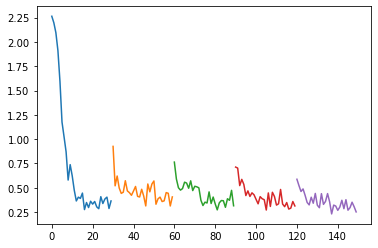

In [11]:
loss_plot(ewc_total_loss_no_dropout)

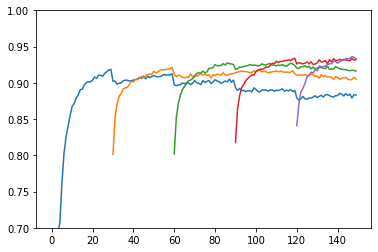

In [12]:
accuracy_plot(ewc_prec_no_dropout)

No handles with labels found to put in legend.


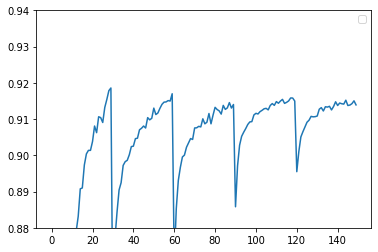

In [13]:
avg_precision_plot([ewc_prec_no_dropout])

In [14]:
# prepare the model.
mlp_dropout = MLP(
    DATASET_CONFIGS['mnist']['size']**2,
    DATASET_CONFIGS['mnist']['classes'],
    hidden_size,
    hidden_layer_num,
    hidden_dropout_prob,
    input_dropout_prob,
    lamda,
)
#different to xavier intialisation ??? test
# initialize the parameters.
utils.gaussian_initialize(mlp_dropout)

# prepare the cuda if needed.
if cuda:
    mlp.cuda()

In [15]:
# run the standard experiment.
consolidate = False
standard_prec_dropout, standard_total_loss_dropout, standard_ce_loss_dropout, standard_ewc_loss_dropout = train(
    mlp_dropout, train_datasets, test_datasets,
    epochs_per_task,
    batch_size,
    test_size,
    consolidate,
    fisher_estimation_sample_size,
    lr,
    weight_decay,
    eval_log_interval,
    loss_log_interval,
    cuda
)

=> task: 1/5 | epoch: 1/30 | progress: [60032/60000] (100%) | prec: 0.1458 | loss => ce: 2.283 / ewc: 0.0 / total: 2.283: : 469it [00:32, 14.34it/s]
=> task: 1/5 | epoch: 2/30 | progress: [256/60000] (0%) | prec: 0.1797 | loss => ce: 2.28 / ewc: 0.0 / total: 2.28: : 2it [00:00, 12.75it/s]

Test Accuracy {1: [0.2808837890625]}
total loss {1: [2.283334732055664]} cross entropy {1: [2.283334732055664]} ewc {1: [0.0]}


=> task: 1/5 | epoch: 2/30 | progress: [60032/60000] (100%) | prec: 0.3021 | loss => ce: 2.258 / ewc: 0.0 / total: 2.258: : 469it [00:32, 14.22it/s]
=> task: 1/5 | epoch: 3/30 | progress: [256/60000] (0%) | prec: 0.2812 | loss => ce: 2.243 / ewc: 0.0 / total: 2.243: : 2it [00:00, 12.52it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125]}
total loss {1: [2.283334732055664, 2.2581918239593506]} cross entropy {1: [2.283334732055664, 2.2581918239593506]} ewc {1: [0.0, 0.0]}


=> task: 1/5 | epoch: 3/30 | progress: [60032/60000] (100%) | prec: 0.4167 | loss => ce: 2.199 / ewc: 0.0 / total: 2.199: : 469it [00:32, 14.23it/s]
=> task: 1/5 | epoch: 4/30 | progress: [256/60000] (0%) | prec: 0.3359 | loss => ce: 2.207 / ewc: 0.0 / total: 2.207: : 2it [00:00, 12.42it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125]}
total loss {1: [2.283334732055664, 2.2581918239593506, 2.1985065937042236]} cross entropy {1: [2.283334732055664, 2.2581918239593506, 2.1985065937042236]} ewc {1: [0.0, 0.0, 0.0]}


=> task: 1/5 | epoch: 4/30 | progress: [60032/60000] (100%) | prec: 0.4062 | loss => ce: 2.155 / ewc: 0.0 / total: 2.155: : 469it [00:32, 14.32it/s]
=> task: 1/5 | epoch: 5/30 | progress: [256/60000] (0%) | prec: 0.4766 | loss => ce: 2.162 / ewc: 0.0 / total: 2.162: : 2it [00:00, 12.44it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625]}
total loss {1: [2.283334732055664, 2.2581918239593506, 2.1985065937042236, 2.155017137527466]} cross entropy {1: [2.283334732055664, 2.2581918239593506, 2.1985065937042236, 2.155017137527466]} ewc {1: [0.0, 0.0, 0.0, 0.0]}


=> task: 1/5 | epoch: 5/30 | progress: [60032/60000] (100%) | prec: 0.4167 | loss => ce: 2.089 / ewc: 0.0 / total: 2.089: : 469it [00:33, 14.13it/s]
=> task: 1/5 | epoch: 6/30 | progress: [256/60000] (0%) | prec: 0.375 | loss => ce: 2.059 / ewc: 0.0 / total: 2.059: : 2it [00:00, 12.07it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375]}
total loss {1: [2.283334732055664, 2.2581918239593506, 2.1985065937042236, 2.155017137527466, 2.0889532566070557]} cross entropy {1: [2.283334732055664, 2.2581918239593506, 2.1985065937042236, 2.155017137527466, 2.0889532566070557]} ewc {1: [0.0, 0.0, 0.0, 0.0, 0.0]}


=> task: 1/5 | epoch: 6/30 | progress: [60032/60000] (100%) | prec: 0.4375 | loss => ce: 1.831 / ewc: 0.0 / total: 1.831: : 469it [00:32, 14.42it/s]
=> task: 1/5 | epoch: 7/30 | progress: [256/60000] (0%) | prec: 0.5547 | loss => ce: 1.86 / ewc: 0.0 / total: 1.86: : 2it [00:00, 12.89it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875]}
total loss {1: [2.283334732055664, 2.2581918239593506, 2.1985065937042236, 2.155017137527466, 2.0889532566070557, 1.8307299613952637]} cross entropy {1: [2.283334732055664, 2.2581918239593506, 2.1985065937042236, 2.155017137527466, 2.0889532566070557, 1.8307299613952637]} ewc {1: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}


=> task: 1/5 | epoch: 7/30 | progress: [60032/60000] (100%) | prec: 0.5208 | loss => ce: 1.689 / ewc: 0.0 / total: 1.689: : 469it [00:33, 13.93it/s]
=> task: 1/5 | epoch: 8/30 | progress: [256/60000] (0%) | prec: 0.5859 | loss => ce: 1.555 / ewc: 0.0 / total: 1.555: : 2it [00:00, 12.38it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875]}
total loss {1: [2.283334732055664, 2.2581918239593506, 2.1985065937042236, 2.155017137527466, 2.0889532566070557, 1.8307299613952637, 1.6894512176513672]} cross entropy {1: [2.283334732055664, 2.2581918239593506, 2.1985065937042236, 2.155017137527466, 2.0889532566070557, 1.8307299613952637, 1.6894512176513672]} ewc {1: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}


=> task: 1/5 | epoch: 8/30 | progress: [60032/60000] (100%) | prec: 0.6667 | loss => ce: 1.273 / ewc: 0.0 / total: 1.273: : 469it [00:32, 14.33it/s]
=> task: 1/5 | epoch: 9/30 | progress: [256/60000] (0%) | prec: 0.6875 | loss => ce: 1.309 / ewc: 0.0 / total: 1.309: : 2it [00:00, 12.11it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375]}
total loss {1: [2.283334732055664, 2.2581918239593506, 2.1985065937042236, 2.155017137527466, 2.0889532566070557, 1.8307299613952637, 1.6894512176513672, 1.2727371454238892]} cross entropy {1: [2.283334732055664, 2.2581918239593506, 2.1985065937042236, 2.155017137527466, 2.0889532566070557, 1.8307299613952637, 1.6894512176513672, 1.2727371454238892]} ewc {1: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}


=> task: 1/5 | epoch: 9/30 | progress: [60032/60000] (100%) | prec: 0.6979 | loss => ce: 0.9414 / ewc: 0.0 / total: 0.9414: : 469it [00:32, 14.44it/s]
=> task: 1/5 | epoch: 10/30 | progress: [256/60000] (0%) | prec: 0.6562 | loss => ce: 1.117 / ewc: 0.0 / total: 1.117: : 2it [00:00, 12.72it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625]}
total loss {1: [2.283334732055664, 2.2581918239593506, 2.1985065937042236, 2.155017137527466, 2.0889532566070557, 1.8307299613952637, 1.6894512176513672, 1.2727371454238892, 0.9414343237876892]} cross entropy {1: [2.283334732055664, 2.2581918239593506, 2.1985065937042236, 2.155017137527466, 2.0889532566070557, 1.8307299613952637, 1.6894512176513672, 1.2727371454238892, 0.9414343237876892]} ewc {1: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}


=> task: 1/5 | epoch: 10/30 | progress: [60032/60000] (100%) | prec: 0.6042 | loss => ce: 1.087 / ewc: 0.0 / total: 1.087: : 469it [00:32, 14.36it/s]  
=> task: 1/5 | epoch: 11/30 | progress: [256/60000] (0%) | prec: 0.625 | loss => ce: 1.08 / ewc: 0.0 / total: 1.08: : 2it [00:00, 13.32it/s] 

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125]}
total loss {1: [2.283334732055664, 2.2581918239593506, 2.1985065937042236, 2.155017137527466, 2.0889532566070557, 1.8307299613952637, 1.6894512176513672, 1.2727371454238892, 0.9414343237876892, 1.0871976613998413]} cross entropy {1: [2.283334732055664, 2.2581918239593506, 2.1985065937042236, 2.155017137527466, 2.0889532566070557, 1.8307299613952637, 1.6894512176513672, 1.2727371454238892, 0.9414343237876892, 1.0871976613998413]} ewc {1: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}


=> task: 1/5 | epoch: 11/30 | progress: [60032/60000] (100%) | prec: 0.7188 | loss => ce: 0.8571 / ewc: 0.0 / total: 0.8571: : 469it [00:32, 14.34it/s]
=> task: 1/5 | epoch: 12/30 | progress: [256/60000] (0%) | prec: 0.7031 | loss => ce: 0.9108 / ewc: 0.0 / total: 0.9108: : 2it [00:00, 12.95it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375]}
total loss {1: [2.283334732055664, 2.2581918239593506, 2.1985065937042236, 2.155017137527466, 2.0889532566070557, 1.8307299613952637, 1.6894512176513672, 1.2727371454238892, 0.9414343237876892, 1.0871976613998413, 0.8571112155914307]} cross entropy {1: [2.283334732055664, 2.2581918239593506, 2.1985065937042236, 2.155017137527466, 2.0889532566070557, 1.8307299613952637, 1.6894512176513672, 1.2727371454238892, 0.9414343237876892, 1.0871976613998413, 0.8571112155914307]} ewc {1: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}


=> task: 1/5 | epoch: 12/30 | progress: [60032/60000] (100%) | prec: 0.7396 | loss => ce: 0.84 / ewc: 0.0 / total: 0.84: : 469it [00:32, 14.46it/s]    
=> task: 1/5 | epoch: 13/30 | progress: [256/60000] (0%) | prec: 0.7344 | loss => ce: 0.8261 / ewc: 0.0 / total: 0.8261: : 2it [00:00, 13.41it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375]}
total loss {1: [2.283334732055664, 2.2581918239593506, 2.1985065937042236, 2.155017137527466, 2.0889532566070557, 1.8307299613952637, 1.6894512176513672, 1.2727371454238892, 0.9414343237876892, 1.0871976613998413, 0.8571112155914307, 0.8400034308433533]} cross entropy {1: [2.283334732055664, 2.2581918239593506, 2.1985065937042236, 2.155017137527466, 2.0889532566070557, 1.8307299613952637, 1.6894512176513672, 1.2727371454238892, 0.9414343237876892, 1.0871976613998413, 0.8571112155914307, 0.8400034308433533]} ewc {1: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}


=> task: 1/5 | epoch: 13/30 | progress: [60032/60000] (100%) | prec: 0.7604 | loss => ce: 0.734 / ewc: 0.0 / total: 0.734: : 469it [00:32, 14.49it/s]  
=> task: 1/5 | epoch: 14/30 | progress: [256/60000] (0%) | prec: 0.8047 | loss => ce: 0.6717 / ewc: 0.0 / total: 0.6717: : 2it [00:00, 13.56it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125]}
total loss {1: [2.283334732055664, 2.2581918239593506, 2.1985065937042236, 2.155017137527466, 2.0889532566070557, 1.8307299613952637, 1.6894512176513672, 1.2727371454238892, 0.9414343237876892, 1.0871976613998413, 0.8571112155914307, 0.8400034308433533, 0.7339975833892822]} cross entropy {1: [2.283334732055664, 2.2581918239593506, 2.1985065937042236, 2.155017137527466, 2.0889532566070557, 1.8307299613952637, 1.6894512176513672, 1.2727371454238892, 0.9414343237876892, 1.0871976613998413, 0.8571112155914307, 0.8400034308433533, 0.7339975833892822]} ewc {1: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}


=> task: 1/5 | epoch: 14/30 | progress: [60032/60000] (100%) | prec: 0.7604 | loss => ce: 0.7051 / ewc: 0.0 / total: 0.7051: : 469it [00:33, 14.09it/s]
=> task: 1/5 | epoch: 15/30 | progress: [256/60000] (0%) | prec: 0.7656 | loss => ce: 0.6258 / ewc: 0.0 / total: 0.6258: : 2it [00:00, 13.32it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375]}
total loss {1: [2.283334732055664, 2.2581918239593506, 2.1985065937042236, 2.155017137527466, 2.0889532566070557, 1.8307299613952637, 1.6894512176513672, 1.2727371454238892, 0.9414343237876892, 1.0871976613998413, 0.8571112155914307, 0.8400034308433533, 0.7339975833892822, 0.7050600647926331]} cross entropy {1: [2.283334732055664, 2.2581918239593506, 2.1985065937042236, 2.155017137527466, 2.0889532566070557, 1.8307299613952637, 1.6894512176513672, 1.2727371454238892, 0.9414343237876892, 1.0871976613998413, 0.8571112155914307, 0.8400034308433533, 0.7339975833892822, 0.7050600647926331]} ewc {1: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}


=> task: 1/5 | epoch: 15/30 | progress: [60032/60000] (100%) | prec: 0.7812 | loss => ce: 0.6572 / ewc: 0.0 / total: 0.6572: : 469it [00:32, 14.38it/s]
=> task: 1/5 | epoch: 16/30 | progress: [256/60000] (0%) | prec: 0.8516 | loss => ce: 0.5904 / ewc: 0.0 / total: 0.5904: : 2it [00:00, 12.99it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375]}
total loss {1: [2.283334732055664, 2.2581918239593506, 2.1985065937042236, 2.155017137527466, 2.0889532566070557, 1.8307299613952637, 1.6894512176513672, 1.2727371454238892, 0.9414343237876892, 1.0871976613998413, 0.8571112155914307, 0.8400034308433533, 0.7339975833892822, 0.7050600647926331, 0.657180666923523]} cross entropy {1: [2.283334732055664, 2.2581918239593506, 2.1985065937042236, 2.155017137527466, 2.0889532566070557, 1.8307299613952637, 1.6894512176513672, 1.2727371454238892, 0.9414343237876892, 1.0871976613998413, 0.8571112155914307, 0.8400034308433533, 0.7339975833892822, 0.7050600647926331, 0.657180666923523]} ewc {1: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}


=> task: 1/5 | epoch: 16/30 | progress: [60032/60000] (100%) | prec: 0.7396 | loss => ce: 0.6108 / ewc: 0.0 / total: 0.6108: : 469it [00:32, 14.48it/s]
=> task: 1/5 | epoch: 17/30 | progress: [256/60000] (0%) | prec: 0.7969 | loss => ce: 0.6585 / ewc: 0.0 / total: 0.6585: : 2it [00:00, 13.03it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375]}
total loss {1: [2.283334732055664, 2.2581918239593506, 2.1985065937042236, 2.155017137527466, 2.0889532566070557, 1.8307299613952637, 1.6894512176513672, 1.2727371454238892, 0.9414343237876892, 1.0871976613998413, 0.8571112155914307, 0.8400034308433533, 0.7339975833892822, 0.7050600647926331, 0.657180666923523, 0.6107576489448547]} cross entropy {1: [2.283334732055664, 2.2581918239593506, 2.1985065937042236, 2.155017137527466, 2.0889532566070557, 1.8307299613952637, 1.6894512176513672, 1.2727371454238892, 0.9414343237876892, 1.0871976613998413, 0.8571112155914307, 0.8400034308433533, 0.7339975833892822, 0.7050600647926331, 0.657180666923523, 0.6107576489448547]} ewc {1: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

=> task: 1/5 | epoch: 17/30 | progress: [60032/60000] (100%) | prec: 0.8542 | loss => ce: 0.8071 / ewc: 0.0 / total: 0.8071: : 469it [00:32, 14.34it/s]
=> task: 1/5 | epoch: 18/30 | progress: [256/60000] (0%) | prec: 0.8359 | loss => ce: 0.5559 / ewc: 0.0 / total: 0.5559: : 2it [00:00, 11.80it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375]}
total loss {1: [2.283334732055664, 2.2581918239593506, 2.1985065937042236, 2.155017137527466, 2.0889532566070557, 1.8307299613952637, 1.6894512176513672, 1.2727371454238892, 0.9414343237876892, 1.0871976613998413, 0.8571112155914307, 0.8400034308433533, 0.7339975833892822, 0.7050600647926331, 0.657180666923523, 0.6107576489448547, 0.8071050643920898]} cross entropy {1: [2.283334732055664, 2.2581918239593506, 2.1985065937042236, 2.155017137527466, 2.0889532566070557, 1.8307299613952637, 1.6894512176513672, 1.2727371454238892, 0.9414343237876892, 1.0871976613998413, 0.8571112155914307, 0.8400034308433533, 0.7339975833892822, 0.7050600647926331, 0.657180666923523, 0.6107576489448547, 0.807105064

=> task: 1/5 | epoch: 18/30 | progress: [60032/60000] (100%) | prec: 0.8229 | loss => ce: 0.5002 / ewc: 0.0 / total: 0.5002: : 469it [00:32, 14.32it/s]
=> task: 1/5 | epoch: 19/30 | progress: [256/60000] (0%) | prec: 0.8594 | loss => ce: 0.4837 / ewc: 0.0 / total: 0.4837: : 2it [00:00, 12.78it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625]}
total loss {1: [2.283334732055664, 2.2581918239593506, 2.1985065937042236, 2.155017137527466, 2.0889532566070557, 1.8307299613952637, 1.6894512176513672, 1.2727371454238892, 0.9414343237876892, 1.0871976613998413, 0.8571112155914307, 0.8400034308433533, 0.7339975833892822, 0.7050600647926331, 0.657180666923523, 0.6107576489448547, 0.8071050643920898, 0.5001888275146484]} cross entropy {1: [2.283334732055664, 2.2581918239593506, 2.1985065937042236, 2.155017137527466, 2.0889532566070557, 1.8307299613952637, 1.6894512176513672, 1.2727371454238892, 0.9414343237876892, 1.0871976613998413, 0.8571112155914307, 0.8400034308433533, 0.7339975833892822, 0.7050600647926331, 0.6571806669235

=> task: 1/5 | epoch: 19/30 | progress: [60032/60000] (100%) | prec: 0.8229 | loss => ce: 0.5039 / ewc: 0.0 / total: 0.5039: : 469it [00:33, 14.18it/s]
=> task: 1/5 | epoch: 20/30 | progress: [256/60000] (0%) | prec: 0.8594 | loss => ce: 0.5092 / ewc: 0.0 / total: 0.5092: : 2it [00:00, 13.14it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625]}
total loss {1: [2.283334732055664, 2.2581918239593506, 2.1985065937042236, 2.155017137527466, 2.0889532566070557, 1.8307299613952637, 1.6894512176513672, 1.2727371454238892, 0.9414343237876892, 1.0871976613998413, 0.8571112155914307, 0.8400034308433533, 0.7339975833892822, 0.7050600647926331, 0.657180666923523, 0.6107576489448547, 0.8071050643920898, 0.5001888275146484, 0.5038541555404663]} cross entropy {1: [2.283334732055664, 2.2581918239593506, 2.1985065937042236, 2.155017137527466, 2.0889532566070557, 1.8307299613952637, 1.6894512176513672, 1.2727371454238892, 0.9414343237876892, 1.0871976613998413, 0.8571112155914307, 0.8400034308433533, 0.7339975833892822,

=> task: 1/5 | epoch: 20/30 | progress: [60032/60000] (100%) | prec: 0.8958 | loss => ce: 0.4206 / ewc: 0.0 / total: 0.4206: : 469it [00:32, 14.21it/s]
=> task: 1/5 | epoch: 21/30 | progress: [256/60000] (0%) | prec: 0.8359 | loss => ce: 0.5901 / ewc: 0.0 / total: 0.5901: : 2it [00:00, 13.11it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875]}
total loss {1: [2.283334732055664, 2.2581918239593506, 2.1985065937042236, 2.155017137527466, 2.0889532566070557, 1.8307299613952637, 1.6894512176513672, 1.2727371454238892, 0.9414343237876892, 1.0871976613998413, 0.8571112155914307, 0.8400034308433533, 0.7339975833892822, 0.7050600647926331, 0.657180666923523, 0.6107576489448547, 0.8071050643920898, 0.5001888275146484, 0.5038541555404663, 0.4206419289112091]} cross entropy {1: [2.283334732055664, 2.2581918239593506, 2.1985065937042236, 2.155017137527466, 2.0889532566070557, 1.8307299613952637, 1.6894512176513672, 1.2727371454238892, 0.9414343237876892, 1.0871976613998413, 0.8571112155914307, 0.840

=> task: 1/5 | epoch: 21/30 | progress: [60032/60000] (100%) | prec: 0.8958 | loss => ce: 0.4717 / ewc: 0.0 / total: 0.4717: : 469it [00:32, 14.45it/s]
=> task: 1/5 | epoch: 22/30 | progress: [256/60000] (0%) | prec: 0.8516 | loss => ce: 0.4387 / ewc: 0.0 / total: 0.4387: : 2it [00:00, 13.22it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625]}
total loss {1: [2.283334732055664, 2.2581918239593506, 2.1985065937042236, 2.155017137527466, 2.0889532566070557, 1.8307299613952637, 1.6894512176513672, 1.2727371454238892, 0.9414343237876892, 1.0871976613998413, 0.8571112155914307, 0.8400034308433533, 0.7339975833892822, 0.7050600647926331, 0.657180666923523, 0.6107576489448547, 0.8071050643920898, 0.5001888275146484, 0.5038541555404663, 0.4206419289112091, 0.4717026948928833]} cross entropy {1: [2.283334732055664, 2.2581918239593506, 2.1985065937042236, 2.155017137527466, 2.0889532566070557, 1.8307299613952637, 1.6894512176513672, 1.2727371454238892, 0.9414343237876892, 1.0871976613998

=> task: 1/5 | epoch: 22/30 | progress: [60032/60000] (100%) | prec: 0.8542 | loss => ce: 0.4865 / ewc: 0.0 / total: 0.4865: : 469it [00:33, 14.17it/s]
=> task: 1/5 | epoch: 23/30 | progress: [256/60000] (0%) | prec: 0.8828 | loss => ce: 0.448 / ewc: 0.0 / total: 0.448: : 2it [00:00, 13.51it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125]}
total loss {1: [2.283334732055664, 2.2581918239593506, 2.1985065937042236, 2.155017137527466, 2.0889532566070557, 1.8307299613952637, 1.6894512176513672, 1.2727371454238892, 0.9414343237876892, 1.0871976613998413, 0.8571112155914307, 0.8400034308433533, 0.7339975833892822, 0.7050600647926331, 0.657180666923523, 0.6107576489448547, 0.8071050643920898, 0.5001888275146484, 0.5038541555404663, 0.4206419289112091, 0.4717026948928833, 0.4865150451660156]} cross entropy {1: [2.283334732055664, 2.2581918239593506, 2.1985065937042236, 2.155017137527466, 2.0889532566070557, 1.8307299613952637, 1.6894512176513672, 1.2727371454238892, 0.

=> task: 1/5 | epoch: 23/30 | progress: [60032/60000] (100%) | prec: 0.875 | loss => ce: 0.525 / ewc: 0.0 / total: 0.525: : 469it [00:32, 14.55it/s]   
=> task: 1/5 | epoch: 24/30 | progress: [256/60000] (0%) | prec: 0.875 | loss => ce: 0.4906 / ewc: 0.0 / total: 0.4906: : 2it [00:00, 13.18it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375]}
total loss {1: [2.283334732055664, 2.2581918239593506, 2.1985065937042236, 2.155017137527466, 2.0889532566070557, 1.8307299613952637, 1.6894512176513672, 1.2727371454238892, 0.9414343237876892, 1.0871976613998413, 0.8571112155914307, 0.8400034308433533, 0.7339975833892822, 0.7050600647926331, 0.657180666923523, 0.6107576489448547, 0.8071050643920898, 0.5001888275146484, 0.5038541555404663, 0.4206419289112091, 0.4717026948928833, 0.4865150451660156, 0.5250364542007446]} cross entropy {1: [2.283334732055664, 2.2581918239593506, 2.1985065937042236, 2.155017137527466, 2.0889532566070557, 1.8307299613952637, 1.6894

=> task: 1/5 | epoch: 24/30 | progress: [60032/60000] (100%) | prec: 0.8646 | loss => ce: 0.4272 / ewc: 0.0 / total: 0.4272: : 469it [00:32, 14.51it/s]
=> task: 1/5 | epoch: 25/30 | progress: [256/60000] (0%) | prec: 0.875 | loss => ce: 0.4133 / ewc: 0.0 / total: 0.4133: : 2it [00:00, 13.51it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125]}
total loss {1: [2.283334732055664, 2.2581918239593506, 2.1985065937042236, 2.155017137527466, 2.0889532566070557, 1.8307299613952637, 1.6894512176513672, 1.2727371454238892, 0.9414343237876892, 1.0871976613998413, 0.8571112155914307, 0.8400034308433533, 0.7339975833892822, 0.7050600647926331, 0.657180666923523, 0.6107576489448547, 0.8071050643920898, 0.5001888275146484, 0.5038541555404663, 0.4206419289112091, 0.4717026948928833, 0.4865150451660156, 0.5250364542007446, 0.4272153675556183]} cross entropy {1: [2.283334732055664, 2.2581918239593506, 2.1985065937042236, 2.155017137527466, 2.088953256

=> task: 1/5 | epoch: 25/30 | progress: [60032/60000] (100%) | prec: 0.8646 | loss => ce: 0.4493 / ewc: 0.0 / total: 0.4493: : 469it [00:32, 14.41it/s]
=> task: 1/5 | epoch: 26/30 | progress: [256/60000] (0%) | prec: 0.8594 | loss => ce: 0.4072 / ewc: 0.0 / total: 0.4072: : 2it [00:00, 13.50it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625]}
total loss {1: [2.283334732055664, 2.2581918239593506, 2.1985065937042236, 2.155017137527466, 2.0889532566070557, 1.8307299613952637, 1.6894512176513672, 1.2727371454238892, 0.9414343237876892, 1.0871976613998413, 0.8571112155914307, 0.8400034308433533, 0.7339975833892822, 0.7050600647926331, 0.657180666923523, 0.6107576489448547, 0.8071050643920898, 0.5001888275146484, 0.5038541555404663, 0.4206419289112091, 0.4717026948928833, 0.4865150451660156, 0.5250364542007446, 0.4272153675556183, 0.4493286907672882]} cross entropy {1: [2.283334732055664, 2.2581918239593506, 2.19850659370

=> task: 1/5 | epoch: 26/30 | progress: [60032/60000] (100%) | prec: 0.8229 | loss => ce: 0.4639 / ewc: 0.0 / total: 0.4639: : 469it [00:32, 14.53it/s]
=> task: 1/5 | epoch: 27/30 | progress: [256/60000] (0%) | prec: 0.8359 | loss => ce: 0.5251 / ewc: 0.0 / total: 0.5251: : 2it [00:00, 13.29it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375]}
total loss {1: [2.283334732055664, 2.2581918239593506, 2.1985065937042236, 2.155017137527466, 2.0889532566070557, 1.8307299613952637, 1.6894512176513672, 1.2727371454238892, 0.9414343237876892, 1.0871976613998413, 0.8571112155914307, 0.8400034308433533, 0.7339975833892822, 0.7050600647926331, 0.657180666923523, 0.6107576489448547, 0.8071050643920898, 0.5001888275146484, 0.5038541555404663, 0.4206419289112091, 0.4717026948928833, 0.4865150451660156, 0.5250364542007446, 0.4272153675556183, 0.4493286907672882, 0.4638589322566986]} cross entropy {1: [2.2833347320556

=> task: 1/5 | epoch: 27/30 | progress: [60032/60000] (100%) | prec: 0.875 | loss => ce: 0.4235 / ewc: 0.0 / total: 0.4235: : 469it [00:32, 14.57it/s] 
=> task: 1/5 | epoch: 28/30 | progress: [256/60000] (0%) | prec: 0.8828 | loss => ce: 0.5144 / ewc: 0.0 / total: 0.5144: : 2it [00:00, 13.33it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375]}
total loss {1: [2.283334732055664, 2.2581918239593506, 2.1985065937042236, 2.155017137527466, 2.0889532566070557, 1.8307299613952637, 1.6894512176513672, 1.2727371454238892, 0.9414343237876892, 1.0871976613998413, 0.8571112155914307, 0.8400034308433533, 0.7339975833892822, 0.7050600647926331, 0.657180666923523, 0.6107576489448547, 0.8071050643920898, 0.5001888275146484, 0.5038541555404663, 0.4206419289112091, 0.4717026948928833, 0.4865150451660156, 0.5250364542007446, 0.4272153675556183, 0.4493286907672882, 0.4638589322566986, 0.42349645495414734]

=> task: 1/5 | epoch: 28/30 | progress: [60032/60000] (100%) | prec: 0.8333 | loss => ce: 0.4861 / ewc: 0.0 / total: 0.4861: : 469it [00:32, 14.38it/s]
=> task: 1/5 | epoch: 29/30 | progress: [256/60000] (0%) | prec: 0.7891 | loss => ce: 0.6623 / ewc: 0.0 / total: 0.6623: : 2it [00:00, 13.39it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125]}
total loss {1: [2.283334732055664, 2.2581918239593506, 2.1985065937042236, 2.155017137527466, 2.0889532566070557, 1.8307299613952637, 1.6894512176513672, 1.2727371454238892, 0.9414343237876892, 1.0871976613998413, 0.8571112155914307, 0.8400034308433533, 0.7339975833892822, 0.7050600647926331, 0.657180666923523, 0.6107576489448547, 0.8071050643920898, 0.5001888275146484, 0.5038541555404663, 0.4206419289112091, 0.4717026948928833, 0.4865150451660156, 0.5250364542007446, 0.4272153675556183, 0.4493286907672882, 0.4638589322566986, 0.4

=> task: 1/5 | epoch: 29/30 | progress: [60032/60000] (100%) | prec: 0.9062 | loss => ce: 0.3631 / ewc: 0.0 / total: 0.3631: : 469it [00:32, 14.42it/s]
=> task: 1/5 | epoch: 30/30 | progress: [256/60000] (0%) | prec: 0.875 | loss => ce: 0.4615 / ewc: 0.0 / total: 0.4615: : 2it [00:00, 13.34it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625]}
total loss {1: [2.283334732055664, 2.2581918239593506, 2.1985065937042236, 2.155017137527466, 2.0889532566070557, 1.8307299613952637, 1.6894512176513672, 1.2727371454238892, 0.9414343237876892, 1.0871976613998413, 0.8571112155914307, 0.8400034308433533, 0.7339975833892822, 0.7050600647926331, 0.657180666923523, 0.6107576489448547, 0.8071050643920898, 0.5001888275146484, 0.5038541555404663, 0.4206419289112091, 0.4717026948928833, 0.4865150451660156, 0.5250364542007446, 0.4272153675556183, 0.4493286907672882, 0.46385

=> task: 1/5 | epoch: 30/30 | progress: [60032/60000] (100%) | prec: 0.9062 | loss => ce: 0.3472 / ewc: 0.0 / total: 0.3472: : 469it [00:32, 14.46it/s]
=> task: 2/5 | epoch: 1/30 | progress: [256/60000] (0%) | prec: 0.09375 | loss => ce: 2.546 / ewc: 0.0 / total: 2.546: : 2it [00:00, 11.38it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125]}
total loss {1: [2.283334732055664, 2.2581918239593506, 2.1985065937042236, 2.155017137527466, 2.0889532566070557, 1.8307299613952637, 1.6894512176513672, 1.2727371454238892, 0.9414343237876892, 1.0871976613998413, 0.8571112155914307, 0.8400034308433533, 0.7339975833892822, 0.7050600647926331, 0.657180666923523, 0.6107576489448547, 0.8071050643920898, 0.5001888275146484, 0.5038541555404663, 0.4206419289112091, 0.4717026948928833, 0.4865150451660156, 0.5250364542007446, 0.4272153675556183, 0.449328690767

=> task: 2/5 | epoch: 1/30 | progress: [60032/60000] (100%) | prec: 0.5729 | loss => ce: 1.12 / ewc: 0.0 / total: 1.12: : 469it [00:32, 14.25it/s]    
=> task: 2/5 | epoch: 2/30 | progress: [256/60000] (0%) | prec: 0.7266 | loss => ce: 1.082 / ewc: 0.0 / total: 1.082: : 2it [00:00, 11.48it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125], 2: [0.76708984375]}
total loss {1: [2.283334732055664, 2.2581918239593506, 2.1985065937042236, 2.155017137527466, 2.0889532566070557, 1.8307299613952637, 1.6894512176513672, 1.2727371454238892, 0.9414343237876892, 1.0871976613998413, 0.8571112155914307, 0.8400034308433533, 0.7339975833892822, 0.7050600647926331, 0.657180666923523, 0.6107576489448547, 0.8071050643920898, 0.5001888275146484, 0.5038541555404663, 0.4206419289112091, 0.4717026948928833, 0.4865150451660156, 0.525036454200744

=> task: 2/5 | epoch: 2/30 | progress: [60032/60000] (100%) | prec: 0.75 | loss => ce: 0.651 / ewc: 0.0 / total: 0.651: : 469it [00:32, 14.52it/s]    
=> task: 2/5 | epoch: 3/30 | progress: [256/60000] (0%) | prec: 0.7891 | loss => ce: 0.6899 / ewc: 0.0 / total: 0.6899: : 2it [00:00, 13.27it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375], 2: [0.76708984375, 0.8363037109375]}
total loss {1: [2.283334732055664, 2.2581918239593506, 2.1985065937042236, 2.155017137527466, 2.0889532566070557, 1.8307299613952637, 1.6894512176513672, 1.2727371454238892, 0.9414343237876892, 1.0871976613998413, 0.8571112155914307, 0.8400034308433533, 0.7339975833892822, 0.7050600647926331, 0.657180666923523, 0.6107576489448547, 0.8071050643920898, 0.5001888275146484, 0.5038541555404663, 0.4206419289112091, 0.4717026948928833, 0.48

=> task: 2/5 | epoch: 3/30 | progress: [60032/60000] (100%) | prec: 0.7917 | loss => ce: 0.6671 / ewc: 0.0 / total: 0.6671: : 469it [00:33, 13.88it/s]
=> task: 2/5 | epoch: 4/30 | progress: [256/60000] (0%) | prec: 0.6797 | loss => ce: 0.8707 / ewc: 0.0 / total: 0.8707: : 2it [00:00, 13.27it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625], 2: [0.76708984375, 0.8363037109375, 0.861083984375]}
total loss {1: [2.283334732055664, 2.2581918239593506, 2.1985065937042236, 2.155017137527466, 2.0889532566070557, 1.8307299613952637, 1.6894512176513672, 1.2727371454238892, 0.9414343237876892, 1.0871976613998413, 0.8571112155914307, 0.8400034308433533, 0.7339975833892822, 0.7050600647926331, 0.657180666923523, 0.6107576489448547, 0.8071050643920898, 0.5001888275146484, 0.5038541555404663, 0.420641928

=> task: 2/5 | epoch: 4/30 | progress: [60032/60000] (100%) | prec: 0.8125 | loss => ce: 0.6747 / ewc: 0.0 / total: 0.6747: : 469it [00:32, 14.49it/s]
=> task: 2/5 | epoch: 5/30 | progress: [256/60000] (0%) | prec: 0.7969 | loss => ce: 0.5553 / ewc: 0.0 / total: 0.5553: : 2it [00:00, 12.76it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875], 2: [0.76708984375, 0.8363037109375, 0.861083984375, 0.8763427734375]}
total loss {1: [2.283334732055664, 2.2581918239593506, 2.1985065937042236, 2.155017137527466, 2.0889532566070557, 1.8307299613952637, 1.6894512176513672, 1.2727371454238892, 0.9414343237876892, 1.0871976613998413, 0.8571112155914307, 0.8400034308433533, 0.7339975833892822, 0.7050600647926331, 0.657180666923523, 0.6107576489448547, 0.8071050643920898, 0.500188827514648

=> task: 2/5 | epoch: 5/30 | progress: [60032/60000] (100%) | prec: 0.8646 | loss => ce: 0.4649 / ewc: 0.0 / total: 0.4649: : 469it [00:32, 14.53it/s]
=> task: 2/5 | epoch: 6/30 | progress: [256/60000] (0%) | prec: 0.7969 | loss => ce: 0.7073 / ewc: 0.0 / total: 0.7073: : 2it [00:00, 13.08it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875], 2: [0.76708984375, 0.8363037109375, 0.861083984375, 0.8763427734375, 0.88232421875]}
total loss {1: [2.283334732055664, 2.2581918239593506, 2.1985065937042236, 2.155017137527466, 2.0889532566070557, 1.8307299613952637, 1.6894512176513672, 1.2727371454238892, 0.9414343237876892, 1.0871976613998413, 0.8571112155914307, 0.8400034308433533, 0.7339975833892822, 0.7050600647926331, 0.657180666923523, 0.6107576489448547, 0.80710506

=> task: 2/5 | epoch: 6/30 | progress: [60032/60000] (100%) | prec: 0.875 | loss => ce: 0.4403 / ewc: 0.0 / total: 0.4403: : 469it [00:32, 14.58it/s] 
=> task: 2/5 | epoch: 7/30 | progress: [256/60000] (0%) | prec: 0.8438 | loss => ce: 0.458 / ewc: 0.0 / total: 0.458: : 2it [00:00, 13.54it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875], 2: [0.76708984375, 0.8363037109375, 0.861083984375, 0.8763427734375, 0.88232421875, 0.88525390625]}
total loss {1: [2.283334732055664, 2.2581918239593506, 2.1985065937042236, 2.155017137527466, 2.0889532566070557, 1.8307299613952637, 1.6894512176513672, 1.2727371454238892, 0.9414343237876892, 1.0871976613998413, 0.8571112155914307, 0.8400034308433533, 0.7339975833892822, 0.7050600647926331, 0.657180666923523

=> task: 2/5 | epoch: 7/30 | progress: [60032/60000] (100%) | prec: 0.8438 | loss => ce: 0.5926 / ewc: 0.0 / total: 0.5926: : 469it [00:32, 14.41it/s]
=> task: 2/5 | epoch: 8/30 | progress: [256/60000] (0%) | prec: 0.8516 | loss => ce: 0.4421 / ewc: 0.0 / total: 0.4421: : 2it [00:00, 13.44it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375], 2: [0.76708984375, 0.8363037109375, 0.861083984375, 0.8763427734375, 0.88232421875, 0.88525390625, 0.894775390625]}
total loss {1: [2.283334732055664, 2.2581918239593506, 2.1985065937042236, 2.155017137527466, 2.0889532566070557, 1.8307299613952637, 1.6894512176513672, 1.2727371454238892, 0.9414343237876892, 1.0871976613998413, 0.8571112155914307, 0.8400034308433533, 0.7339975833892822, 0.70

=> task: 2/5 | epoch: 8/30 | progress: [60032/60000] (100%) | prec: 0.8958 | loss => ce: 0.3109 / ewc: 0.0 / total: 0.3109: : 469it [00:32, 14.39it/s]
=> task: 2/5 | epoch: 9/30 | progress: [256/60000] (0%) | prec: 0.8281 | loss => ce: 0.5072 / ewc: 0.0 / total: 0.5072: : 2it [00:00, 13.42it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125], 2: [0.76708984375, 0.8363037109375, 0.861083984375, 0.8763427734375, 0.88232421875, 0.88525390625, 0.894775390625, 0.9000244140625]}
total loss {1: [2.283334732055664, 2.2581918239593506, 2.1985065937042236, 2.155017137527466, 2.0889532566070557, 1.8307299613952637, 1.6894512176513672, 1.2727371454238892, 0.9414343237876892, 1.0871976613998413, 0.8571112155914307, 0.84000343

=> task: 2/5 | epoch: 9/30 | progress: [60032/60000] (100%) | prec: 0.9167 | loss => ce: 0.4027 / ewc: 0.0 / total: 0.4027: : 469it [00:32, 14.43it/s]
=> task: 2/5 | epoch: 10/30 | progress: [256/60000] (0%) | prec: 0.8203 | loss => ce: 0.6063 / ewc: 0.0 / total: 0.6063: : 2it [00:00, 13.29it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375], 2: [0.76708984375, 0.8363037109375, 0.861083984375, 0.8763427734375, 0.88232421875, 0.88525390625, 0.894775390625, 0.9000244140625, 0.9044189453125]}
total loss {1: [2.283334732055664, 2.2581918239593506, 2.1985065937042236, 2.155017137527466, 2.0889532566070557, 1.8307299613952637, 1.6894512176513672, 1.2727371454238892, 0.9414343237876892, 1.08719766139984

=> task: 2/5 | epoch: 10/30 | progress: [60032/60000] (100%) | prec: 0.8958 | loss => ce: 0.4118 / ewc: 0.0 / total: 0.4118: : 469it [00:32, 14.36it/s]
=> task: 2/5 | epoch: 11/30 | progress: [256/60000] (0%) | prec: 0.9062 | loss => ce: 0.3469 / ewc: 0.0 / total: 0.3469: : 2it [00:00, 13.06it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625], 2: [0.76708984375, 0.8363037109375, 0.861083984375, 0.8763427734375, 0.88232421875, 0.88525390625, 0.894775390625, 0.9000244140625, 0.9044189453125, 0.9036865234375]}
total loss {1: [2.283334732055664, 2.2581918239593506, 2.1985065937042236, 2.155017137527466, 2.0889532566070557, 1.8307299613952637, 1.6894512176513672, 1.2727371454238892, 0.

=> task: 2/5 | epoch: 11/30 | progress: [60032/60000] (100%) | prec: 0.8958 | loss => ce: 0.418 / ewc: 0.0 / total: 0.418: : 469it [00:32, 14.42it/s]  
=> task: 2/5 | epoch: 12/30 | progress: [256/60000] (0%) | prec: 0.8516 | loss => ce: 0.5213 / ewc: 0.0 / total: 0.5213: : 2it [00:00, 13.36it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125], 2: [0.76708984375, 0.8363037109375, 0.861083984375, 0.8763427734375, 0.88232421875, 0.88525390625, 0.894775390625, 0.9000244140625, 0.9044189453125, 0.9036865234375, 0.9052734375]}
total loss {1: [2.283334732055664, 2.2581918239593506, 2.1985065937042236, 2.155017137527466, 2.0889532566070557, 1.8307299613952637, 1.689451217

=> task: 2/5 | epoch: 12/30 | progress: [60032/60000] (100%) | prec: 0.875 | loss => ce: 0.3539 / ewc: 0.0 / total: 0.3539: : 469it [00:32, 14.46it/s] 
=> task: 2/5 | epoch: 13/30 | progress: [256/60000] (0%) | prec: 0.875 | loss => ce: 0.5578 / ewc: 0.0 / total: 0.5578: : 2it [00:00, 12.53it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875], 2: [0.76708984375, 0.8363037109375, 0.861083984375, 0.8763427734375, 0.88232421875, 0.88525390625, 0.894775390625, 0.9000244140625, 0.9044189453125, 0.9036865234375, 0.9052734375, 0.9088134765625]}
total loss {1: [2.283334732055664, 2.2581918239593506, 2.1985065937042236, 2.155017137527466, 2.0889532566070557, 

=> task: 2/5 | epoch: 13/30 | progress: [60032/60000] (100%) | prec: 0.8854 | loss => ce: 0.3791 / ewc: 0.0 / total: 0.3791: : 469it [00:32, 14.25it/s]
=> task: 2/5 | epoch: 14/30 | progress: [256/60000] (0%) | prec: 0.8594 | loss => ce: 0.4784 / ewc: 0.0 / total: 0.4784: : 2it [00:00, 13.42it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375], 2: [0.76708984375, 0.8363037109375, 0.861083984375, 0.8763427734375, 0.88232421875, 0.88525390625, 0.894775390625, 0.9000244140625, 0.9044189453125, 0.9036865234375, 0.9052734375, 0.9088134765625, 0.912109375]}
total loss {1: [2.283334732055664, 2.2581918239593506, 2.1985065937042236, 2.15501713

=> task: 2/5 | epoch: 14/30 | progress: [60032/60000] (100%) | prec: 0.8542 | loss => ce: 0.3864 / ewc: 0.0 / total: 0.3864: : 469it [00:32, 14.46it/s]
=> task: 2/5 | epoch: 15/30 | progress: [256/60000] (0%) | prec: 0.875 | loss => ce: 0.4097 / ewc: 0.0 / total: 0.4097: : 2it [00:00, 13.31it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125], 2: [0.76708984375, 0.8363037109375, 0.861083984375, 0.8763427734375, 0.88232421875, 0.88525390625, 0.894775390625, 0.9000244140625, 0.9044189453125, 0.9036865234375, 0.9052734375, 0.9088134765625, 0.912109375, 0.913818359375]}
total loss {1: [2.283334732055664, 2.258191823959350

=> task: 2/5 | epoch: 15/30 | progress: [60032/60000] (100%) | prec: 0.875 | loss => ce: 0.4383 / ewc: 0.0 / total: 0.4383: : 469it [00:32, 14.44it/s] 
=> task: 2/5 | epoch: 16/30 | progress: [256/60000] (0%) | prec: 0.875 | loss => ce: 0.3543 / ewc: 0.0 / total: 0.3543: : 2it [00:00, 13.58it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375], 2: [0.76708984375, 0.8363037109375, 0.861083984375, 0.8763427734375, 0.88232421875, 0.88525390625, 0.894775390625, 0.9000244140625, 0.9044189453125, 0.9036865234375, 0.9052734375, 0.9088134765625, 0.912109375, 0.913818359375, 0.9132080078125]}
total loss {1: [2.

=> task: 2/5 | epoch: 16/30 | progress: [60032/60000] (100%) | prec: 0.8854 | loss => ce: 0.4085 / ewc: 0.0 / total: 0.4085: : 469it [00:32, 14.44it/s]
=> task: 2/5 | epoch: 17/30 | progress: [256/60000] (0%) | prec: 0.8906 | loss => ce: 0.3396 / ewc: 0.0 / total: 0.3396: : 2it [00:00, 12.76it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375], 2: [0.76708984375, 0.8363037109375, 0.861083984375, 0.8763427734375, 0.88232421875, 0.88525390625, 0.894775390625, 0.9000244140625, 0.9044189453125, 0.9036865234375, 0.9052734375, 0.9088134765625, 0.912109375, 0.913818359375, 0.9132080078125, 0.9

=> task: 2/5 | epoch: 17/30 | progress: [60032/60000] (100%) | prec: 0.9167 | loss => ce: 0.2814 / ewc: 0.0 / total: 0.2814: : 469it [00:32, 14.62it/s]
=> task: 2/5 | epoch: 18/30 | progress: [256/60000] (0%) | prec: 0.8438 | loss => ce: 0.529 / ewc: 0.0 / total: 0.529: : 2it [00:00, 13.08it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375], 2: [0.76708984375, 0.8363037109375, 0.861083984375, 0.8763427734375, 0.88232421875, 0.88525390625, 0.894775390625, 0.9000244140625, 0.9044189453125, 0.9036865234375, 0.9052734375, 0.9088134765625, 0.912109375, 0.913818359375, 0.913

=> task: 2/5 | epoch: 18/30 | progress: [60032/60000] (100%) | prec: 0.8958 | loss => ce: 0.3644 / ewc: 0.0 / total: 0.3644: : 469it [00:32, 14.56it/s]
=> task: 2/5 | epoch: 19/30 | progress: [256/60000] (0%) | prec: 0.8984 | loss => ce: 0.3553 / ewc: 0.0 / total: 0.3553: : 2it [00:00, 13.36it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625], 2: [0.76708984375, 0.8363037109375, 0.861083984375, 0.8763427734375, 0.88232421875, 0.88525390625, 0.894775390625, 0.9000244140625, 0.9044189453125, 0.9036865234375, 0.9052734375, 0.9088134765625, 0.912109375, 0.91381

=> task: 2/5 | epoch: 19/30 | progress: [60032/60000] (100%) | prec: 0.8854 | loss => ce: 0.3566 / ewc: 0.0 / total: 0.3566: : 469it [00:32, 14.48it/s]
=> task: 2/5 | epoch: 20/30 | progress: [256/60000] (0%) | prec: 0.875 | loss => ce: 0.4341 / ewc: 0.0 / total: 0.4341: : 2it [00:00, 13.55it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625, 0.8748779296875], 2: [0.76708984375, 0.8363037109375, 0.861083984375, 0.8763427734375, 0.88232421875, 0.88525390625, 0.894775390625, 0.9000244140625, 0.9044189453125, 0.9036865234375, 0.9052734375, 0.9088134765625, 0.9

=> task: 2/5 | epoch: 20/30 | progress: [60032/60000] (100%) | prec: 0.9167 | loss => ce: 0.3508 / ewc: 0.0 / total: 0.3508: : 469it [00:33, 14.11it/s]
=> task: 2/5 | epoch: 21/30 | progress: [256/60000] (0%) | prec: 0.875 | loss => ce: 0.3603 / ewc: 0.0 / total: 0.3603: : 2it [00:00, 13.49it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625, 0.8748779296875, 0.8724365234375], 2: [0.76708984375, 0.8363037109375, 0.861083984375, 0.8763427734375, 0.88232421875, 0.88525390625, 0.894775390625, 0.9000244140625, 0.9044189453125, 0.9036865234375, 0.9052734375, 0.9

=> task: 2/5 | epoch: 21/30 | progress: [60032/60000] (100%) | prec: 0.8958 | loss => ce: 0.3174 / ewc: 0.0 / total: 0.3174: : 469it [00:32, 14.57it/s]
=> task: 2/5 | epoch: 22/30 | progress: [256/60000] (0%) | prec: 0.8906 | loss => ce: 0.3391 / ewc: 0.0 / total: 0.3391: : 2it [00:00, 13.40it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625, 0.8748779296875, 0.8724365234375, 0.873046875], 2: [0.76708984375, 0.8363037109375, 0.861083984375, 0.8763427734375, 0.88232421875, 0.88525390625, 0.894775390625, 0.9000244140625, 0.9044189453125, 0.9036865234375, 0.90

=> task: 2/5 | epoch: 22/30 | progress: [60032/60000] (100%) | prec: 0.875 | loss => ce: 0.3804 / ewc: 0.0 / total: 0.3804: : 469it [00:33, 14.12it/s] 
=> task: 2/5 | epoch: 23/30 | progress: [256/60000] (0%) | prec: 0.875 | loss => ce: 0.3727 / ewc: 0.0 / total: 0.3727: : 2it [00:00, 13.48it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625, 0.8748779296875, 0.8724365234375, 0.873046875, 0.8714599609375], 2: [0.76708984375, 0.8363037109375, 0.861083984375, 0.8763427734375, 0.88232421875, 0.88525390625, 0.894775390625, 0.9000244140625, 0.9044189453125, 0.90

=> task: 2/5 | epoch: 23/30 | progress: [60032/60000] (100%) | prec: 0.9583 | loss => ce: 0.1526 / ewc: 0.0 / total: 0.1526: : 469it [00:32, 14.48it/s]
=> task: 2/5 | epoch: 24/30 | progress: [256/60000] (0%) | prec: 0.8984 | loss => ce: 0.3602 / ewc: 0.0 / total: 0.3602: : 2it [00:00, 13.44it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625, 0.8748779296875, 0.8724365234375, 0.873046875, 0.8714599609375, 0.8719482421875], 2: [0.76708984375, 0.8363037109375, 0.861083984375, 0.8763427734375, 0.88232421875, 0.88525390625, 0.894775390625, 0.9000244140625, 0.90

=> task: 2/5 | epoch: 24/30 | progress: [60032/60000] (100%) | prec: 0.8958 | loss => ce: 0.3376 / ewc: 0.0 / total: 0.3376: : 469it [00:32, 14.46it/s]
=> task: 2/5 | epoch: 25/30 | progress: [256/60000] (0%) | prec: 0.8984 | loss => ce: 0.3446 / ewc: 0.0 / total: 0.3446: : 2it [00:00, 13.39it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625, 0.8748779296875, 0.8724365234375, 0.873046875, 0.8714599609375, 0.8719482421875, 0.87109375], 2: [0.76708984375, 0.8363037109375, 0.861083984375, 0.8763427734375, 0.88232421875, 0.88525390625, 0.894775390625, 0.9000244

=> task: 2/5 | epoch: 25/30 | progress: [60032/60000] (100%) | prec: 0.8958 | loss => ce: 0.3179 / ewc: 0.0 / total: 0.3179: : 469it [00:32, 14.40it/s]
=> task: 2/5 | epoch: 26/30 | progress: [256/60000] (0%) | prec: 0.9219 | loss => ce: 0.2748 / ewc: 0.0 / total: 0.2748: : 2it [00:00, 13.37it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625, 0.8748779296875, 0.8724365234375, 0.873046875, 0.8714599609375, 0.8719482421875, 0.87109375, 0.874267578125], 2: [0.76708984375, 0.8363037109375, 0.861083984375, 0.8763427734375, 0.88232421875, 0.88525390625, 0.8947753

=> task: 2/5 | epoch: 26/30 | progress: [60032/60000] (100%) | prec: 0.8958 | loss => ce: 0.3116 / ewc: 0.0 / total: 0.3116: : 469it [00:32, 14.47it/s]
=> task: 2/5 | epoch: 27/30 | progress: [256/60000] (0%) | prec: 0.9375 | loss => ce: 0.2528 / ewc: 0.0 / total: 0.2528: : 2it [00:00, 13.18it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625, 0.8748779296875, 0.8724365234375, 0.873046875, 0.8714599609375, 0.8719482421875, 0.87109375, 0.874267578125, 0.8714599609375], 2: [0.76708984375, 0.8363037109375, 0.861083984375, 0.8763427734375, 0.88232421875, 0.88525

=> task: 2/5 | epoch: 27/30 | progress: [60032/60000] (100%) | prec: 0.8958 | loss => ce: 0.2937 / ewc: 0.0 / total: 0.2937: : 469it [00:32, 14.45it/s]
=> task: 2/5 | epoch: 28/30 | progress: [256/60000] (0%) | prec: 0.8984 | loss => ce: 0.2483 / ewc: 0.0 / total: 0.2483: : 2it [00:00, 13.41it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625, 0.8748779296875, 0.8724365234375, 0.873046875, 0.8714599609375, 0.8719482421875, 0.87109375, 0.874267578125, 0.8714599609375, 0.8714599609375], 2: [0.76708984375, 0.8363037109375, 0.861083984375, 0.8763427734375, 0.882

=> task: 2/5 | epoch: 28/30 | progress: [60032/60000] (100%) | prec: 0.9583 | loss => ce: 0.1834 / ewc: 0.0 / total: 0.1834: : 469it [00:32, 14.47it/s]
=> task: 2/5 | epoch: 29/30 | progress: [256/60000] (0%) | prec: 0.9453 | loss => ce: 0.2582 / ewc: 0.0 / total: 0.2582: : 2it [00:00, 13.38it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625, 0.8748779296875, 0.8724365234375, 0.873046875, 0.8714599609375, 0.8719482421875, 0.87109375, 0.874267578125, 0.8714599609375, 0.8714599609375, 0.8702392578125], 2: [0.76708984375, 0.8363037109375, 0.861083984375, 0.876

=> task: 2/5 | epoch: 29/30 | progress: [60032/60000] (100%) | prec: 0.8958 | loss => ce: 0.2417 / ewc: 0.0 / total: 0.2417: : 469it [00:32, 14.48it/s]
=> task: 2/5 | epoch: 30/30 | progress: [256/60000] (0%) | prec: 0.9219 | loss => ce: 0.2528 / ewc: 0.0 / total: 0.2528: : 2it [00:00, 13.39it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625, 0.8748779296875, 0.8724365234375, 0.873046875, 0.8714599609375, 0.8719482421875, 0.87109375, 0.874267578125, 0.8714599609375, 0.8714599609375, 0.8702392578125, 0.8685302734375], 2: [0.76708984375, 0.8363037109375, 0.86

=> task: 2/5 | epoch: 30/30 | progress: [60032/60000] (100%) | prec: 0.9167 | loss => ce: 0.3011 / ewc: 0.0 / total: 0.3011: : 469it [00:32, 14.44it/s]
=> task: 3/5 | epoch: 1/30 | progress: [256/60000] (0%) | prec: 0.1484 | loss => ce: 2.863 / ewc: 0.0 / total: 2.863: : 2it [00:00, 12.02it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625, 0.8748779296875, 0.8724365234375, 0.873046875, 0.8714599609375, 0.8719482421875, 0.87109375, 0.874267578125, 0.8714599609375, 0.8714599609375, 0.8702392578125, 0.8685302734375, 0.8741455078125], 2: [0.76708984375, 0.83

=> task: 3/5 | epoch: 1/30 | progress: [60032/60000] (100%) | prec: 0.6875 | loss => ce: 0.8521 / ewc: 0.0 / total: 0.8521: : 469it [00:32, 14.28it/s]
=> task: 3/5 | epoch: 2/30 | progress: [256/60000] (0%) | prec: 0.7266 | loss => ce: 0.805 / ewc: 0.0 / total: 0.805: : 2it [00:00, 11.39it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625, 0.8748779296875, 0.8724365234375, 0.873046875, 0.8714599609375, 0.8719482421875, 0.87109375, 0.874267578125, 0.8714599609375, 0.8714599609375, 0.8702392578125, 0.8685302734375, 0.8741455078125, 0.86474609375], 2: [0.76

=> task: 3/5 | epoch: 2/30 | progress: [60032/60000] (100%) | prec: 0.7917 | loss => ce: 0.6938 / ewc: 0.0 / total: 0.6938: : 469it [00:32, 14.38it/s]
=> task: 3/5 | epoch: 3/30 | progress: [256/60000] (0%) | prec: 0.7891 | loss => ce: 0.6071 / ewc: 0.0 / total: 0.6071: : 2it [00:00, 13.32it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625, 0.8748779296875, 0.8724365234375, 0.873046875, 0.8714599609375, 0.8719482421875, 0.87109375, 0.874267578125, 0.8714599609375, 0.8714599609375, 0.8702392578125, 0.8685302734375, 0.8741455078125, 0.86474609375, 0.8670654

=> task: 3/5 | epoch: 3/30 | progress: [60032/60000] (100%) | prec: 0.8438 | loss => ce: 0.4515 / ewc: 0.0 / total: 0.4515: : 469it [00:33, 14.13it/s]
=> task: 3/5 | epoch: 4/30 | progress: [256/60000] (0%) | prec: 0.875 | loss => ce: 0.4087 / ewc: 0.0 / total: 0.4087: : 2it [00:00, 13.49it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625, 0.8748779296875, 0.8724365234375, 0.873046875, 0.8714599609375, 0.8719482421875, 0.87109375, 0.874267578125, 0.8714599609375, 0.8714599609375, 0.8702392578125, 0.8685302734375, 0.8741455078125, 0.86474609375, 0.8670654

=> task: 3/5 | epoch: 4/30 | progress: [60032/60000] (100%) | prec: 0.8333 | loss => ce: 0.5837 / ewc: 0.0 / total: 0.5837: : 469it [00:32, 14.24it/s]
=> task: 3/5 | epoch: 5/30 | progress: [256/60000] (0%) | prec: 0.875 | loss => ce: 0.4054 / ewc: 0.0 / total: 0.4054: : 2it [00:00, 12.67it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625, 0.8748779296875, 0.8724365234375, 0.873046875, 0.8714599609375, 0.8719482421875, 0.87109375, 0.874267578125, 0.8714599609375, 0.8714599609375, 0.8702392578125, 0.8685302734375, 0.8741455078125, 0.86474609375, 0.8670654

=> task: 3/5 | epoch: 5/30 | progress: [60032/60000] (100%) | prec: 0.875 | loss => ce: 0.4638 / ewc: 0.0 / total: 0.4638: : 469it [00:32, 14.54it/s] 
=> task: 3/5 | epoch: 6/30 | progress: [256/60000] (0%) | prec: 0.8906 | loss => ce: 0.2857 / ewc: 0.0 / total: 0.2857: : 2it [00:00, 13.37it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625, 0.8748779296875, 0.8724365234375, 0.873046875, 0.8714599609375, 0.8719482421875, 0.87109375, 0.874267578125, 0.8714599609375, 0.8714599609375, 0.8702392578125, 0.8685302734375, 0.8741455078125, 0.86474609375, 0.8670654

=> task: 3/5 | epoch: 6/30 | progress: [60032/60000] (100%) | prec: 0.8438 | loss => ce: 0.3963 / ewc: 0.0 / total: 0.3963: : 469it [00:33, 14.15it/s]
=> task: 3/5 | epoch: 7/30 | progress: [256/60000] (0%) | prec: 0.875 | loss => ce: 0.4413 / ewc: 0.0 / total: 0.4413: : 2it [00:00, 13.43it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625, 0.8748779296875, 0.8724365234375, 0.873046875, 0.8714599609375, 0.8719482421875, 0.87109375, 0.874267578125, 0.8714599609375, 0.8714599609375, 0.8702392578125, 0.8685302734375, 0.8741455078125, 0.86474609375, 0.8670654

=> task: 3/5 | epoch: 7/30 | progress: [60032/60000] (100%) | prec: 0.9062 | loss => ce: 0.3557 / ewc: 0.0 / total: 0.3557: : 469it [00:32, 14.52it/s]
=> task: 3/5 | epoch: 8/30 | progress: [256/60000] (0%) | prec: 0.8516 | loss => ce: 0.4962 / ewc: 0.0 / total: 0.4962: : 2it [00:00, 13.31it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625, 0.8748779296875, 0.8724365234375, 0.873046875, 0.8714599609375, 0.8719482421875, 0.87109375, 0.874267578125, 0.8714599609375, 0.8714599609375, 0.8702392578125, 0.8685302734375, 0.8741455078125, 0.86474609375, 0.8670654

=> task: 3/5 | epoch: 8/30 | progress: [60032/60000] (100%) | prec: 0.8854 | loss => ce: 0.386 / ewc: 0.0 / total: 0.386: : 469it [00:32, 14.50it/s]  
=> task: 3/5 | epoch: 9/30 | progress: [256/60000] (0%) | prec: 0.8828 | loss => ce: 0.3808 / ewc: 0.0 / total: 0.3808: : 2it [00:00, 13.92it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625, 0.8748779296875, 0.8724365234375, 0.873046875, 0.8714599609375, 0.8719482421875, 0.87109375, 0.874267578125, 0.8714599609375, 0.8714599609375, 0.8702392578125, 0.8685302734375, 0.8741455078125, 0.86474609375, 0.8670654

=> task: 3/5 | epoch: 9/30 | progress: [60032/60000] (100%) | prec: 0.8854 | loss => ce: 0.3661 / ewc: 0.0 / total: 0.3661: : 469it [00:32, 14.48it/s]
=> task: 3/5 | epoch: 10/30 | progress: [256/60000] (0%) | prec: 0.8516 | loss => ce: 0.4013 / ewc: 0.0 / total: 0.4013: : 2it [00:00, 13.32it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625, 0.8748779296875, 0.8724365234375, 0.873046875, 0.8714599609375, 0.8719482421875, 0.87109375, 0.874267578125, 0.8714599609375, 0.8714599609375, 0.8702392578125, 0.8685302734375, 0.8741455078125, 0.86474609375, 0.8670654

=> task: 3/5 | epoch: 10/30 | progress: [60032/60000] (100%) | prec: 0.875 | loss => ce: 0.3972 / ewc: 0.0 / total: 0.3972: : 469it [00:32, 14.52it/s] 
=> task: 3/5 | epoch: 11/30 | progress: [256/60000] (0%) | prec: 0.9062 | loss => ce: 0.3685 / ewc: 0.0 / total: 0.3685: : 2it [00:00, 12.60it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625, 0.8748779296875, 0.8724365234375, 0.873046875, 0.8714599609375, 0.8719482421875, 0.87109375, 0.874267578125, 0.8714599609375, 0.8714599609375, 0.8702392578125, 0.8685302734375, 0.8741455078125, 0.86474609375, 0.8670654

=> task: 3/5 | epoch: 11/30 | progress: [60032/60000] (100%) | prec: 0.8646 | loss => ce: 0.313 / ewc: 0.0 / total: 0.313: : 469it [00:32, 14.36it/s]  
=> task: 3/5 | epoch: 12/30 | progress: [256/60000] (0%) | prec: 0.9297 | loss => ce: 0.2603 / ewc: 0.0 / total: 0.2603: : 2it [00:00, 13.19it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625, 0.8748779296875, 0.8724365234375, 0.873046875, 0.8714599609375, 0.8719482421875, 0.87109375, 0.874267578125, 0.8714599609375, 0.8714599609375, 0.8702392578125, 0.8685302734375, 0.8741455078125, 0.86474609375, 0.8670654

=> task: 3/5 | epoch: 12/30 | progress: [60032/60000] (100%) | prec: 0.8958 | loss => ce: 0.3168 / ewc: 0.0 / total: 0.3168: : 469it [00:32, 14.53it/s]
=> task: 3/5 | epoch: 13/30 | progress: [256/60000] (0%) | prec: 0.9141 | loss => ce: 0.322 / ewc: 0.0 / total: 0.322: : 2it [00:00, 13.29it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625, 0.8748779296875, 0.8724365234375, 0.873046875, 0.8714599609375, 0.8719482421875, 0.87109375, 0.874267578125, 0.8714599609375, 0.8714599609375, 0.8702392578125, 0.8685302734375, 0.8741455078125, 0.86474609375, 0.8670654

=> task: 3/5 | epoch: 13/30 | progress: [60032/60000] (100%) | prec: 0.8958 | loss => ce: 0.3455 / ewc: 0.0 / total: 0.3455: : 469it [00:32, 14.37it/s]
=> task: 3/5 | epoch: 14/30 | progress: [256/60000] (0%) | prec: 0.9375 | loss => ce: 0.2226 / ewc: 0.0 / total: 0.2226: : 2it [00:00, 13.22it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625, 0.8748779296875, 0.8724365234375, 0.873046875, 0.8714599609375, 0.8719482421875, 0.87109375, 0.874267578125, 0.8714599609375, 0.8714599609375, 0.8702392578125, 0.8685302734375, 0.8741455078125, 0.86474609375, 0.8670654

=> task: 3/5 | epoch: 14/30 | progress: [60032/60000] (100%) | prec: 0.9271 | loss => ce: 0.2861 / ewc: 0.0 / total: 0.2861: : 469it [00:32, 14.44it/s]
=> task: 3/5 | epoch: 15/30 | progress: [256/60000] (0%) | prec: 0.9219 | loss => ce: 0.2814 / ewc: 0.0 / total: 0.2814: : 2it [00:00, 13.44it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625, 0.8748779296875, 0.8724365234375, 0.873046875, 0.8714599609375, 0.8719482421875, 0.87109375, 0.874267578125, 0.8714599609375, 0.8714599609375, 0.8702392578125, 0.8685302734375, 0.8741455078125, 0.86474609375, 0.8670654

=> task: 3/5 | epoch: 15/30 | progress: [60032/60000] (100%) | prec: 0.8333 | loss => ce: 0.4991 / ewc: 0.0 / total: 0.4991: : 469it [00:34, 13.64it/s]
=> task: 3/5 | epoch: 16/30 | progress: [128/60000] (0%) | prec: 0.9141 | loss => ce: 0.3195 / ewc: 0.0 / total: 0.3195: : 1it [00:00,  5.38it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625, 0.8748779296875, 0.8724365234375, 0.873046875, 0.8714599609375, 0.8719482421875, 0.87109375, 0.874267578125, 0.8714599609375, 0.8714599609375, 0.8702392578125, 0.8685302734375, 0.8741455078125, 0.86474609375, 0.8670654

=> task: 3/5 | epoch: 16/30 | progress: [60032/60000] (100%) | prec: 0.8958 | loss => ce: 0.3236 / ewc: 0.0 / total: 0.3236: : 469it [00:36, 12.71it/s]
=> task: 3/5 | epoch: 17/30 | progress: [256/60000] (0%) | prec: 0.9141 | loss => ce: 0.3381 / ewc: 0.0 / total: 0.3381: : 2it [00:00, 13.07it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625, 0.8748779296875, 0.8724365234375, 0.873046875, 0.8714599609375, 0.8719482421875, 0.87109375, 0.874267578125, 0.8714599609375, 0.8714599609375, 0.8702392578125, 0.8685302734375, 0.8741455078125, 0.86474609375, 0.8670654

=> task: 3/5 | epoch: 17/30 | progress: [60032/60000] (100%) | prec: 0.875 | loss => ce: 0.339 / ewc: 0.0 / total: 0.339: : 469it [00:35, 13.20it/s]   
=> task: 3/5 | epoch: 18/30 | progress: [256/60000] (0%) | prec: 0.9062 | loss => ce: 0.2643 / ewc: 0.0 / total: 0.2643: : 2it [00:00, 13.10it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625, 0.8748779296875, 0.8724365234375, 0.873046875, 0.8714599609375, 0.8719482421875, 0.87109375, 0.874267578125, 0.8714599609375, 0.8714599609375, 0.8702392578125, 0.8685302734375, 0.8741455078125, 0.86474609375, 0.8670654

=> task: 3/5 | epoch: 18/30 | progress: [60032/60000] (100%) | prec: 0.9062 | loss => ce: 0.3398 / ewc: 0.0 / total: 0.3398: : 469it [00:32, 14.60it/s]
=> task: 3/5 | epoch: 19/30 | progress: [256/60000] (0%) | prec: 0.9141 | loss => ce: 0.2566 / ewc: 0.0 / total: 0.2566: : 2it [00:00, 13.93it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625, 0.8748779296875, 0.8724365234375, 0.873046875, 0.8714599609375, 0.8719482421875, 0.87109375, 0.874267578125, 0.8714599609375, 0.8714599609375, 0.8702392578125, 0.8685302734375, 0.8741455078125, 0.86474609375, 0.8670654

=> task: 3/5 | epoch: 19/30 | progress: [60032/60000] (100%) | prec: 0.9062 | loss => ce: 0.3013 / ewc: 0.0 / total: 0.3013: : 469it [00:35, 13.22it/s]
=> task: 3/5 | epoch: 20/30 | progress: [256/60000] (0%) | prec: 0.9453 | loss => ce: 0.3029 / ewc: 0.0 / total: 0.3029: : 2it [00:00, 13.19it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625, 0.8748779296875, 0.8724365234375, 0.873046875, 0.8714599609375, 0.8719482421875, 0.87109375, 0.874267578125, 0.8714599609375, 0.8714599609375, 0.8702392578125, 0.8685302734375, 0.8741455078125, 0.86474609375, 0.8670654

=> task: 3/5 | epoch: 20/30 | progress: [60032/60000] (100%) | prec: 0.8958 | loss => ce: 0.2951 / ewc: 0.0 / total: 0.2951: : 469it [00:35, 13.26it/s]
=> task: 3/5 | epoch: 21/30 | progress: [256/60000] (0%) | prec: 0.9219 | loss => ce: 0.2521 / ewc: 0.0 / total: 0.2521: : 2it [00:00, 12.32it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625, 0.8748779296875, 0.8724365234375, 0.873046875, 0.8714599609375, 0.8719482421875, 0.87109375, 0.874267578125, 0.8714599609375, 0.8714599609375, 0.8702392578125, 0.8685302734375, 0.8741455078125, 0.86474609375, 0.8670654

=> task: 3/5 | epoch: 21/30 | progress: [60032/60000] (100%) | prec: 0.9479 | loss => ce: 0.1757 / ewc: 0.0 / total: 0.1757: : 469it [00:35, 13.03it/s]
=> task: 3/5 | epoch: 22/30 | progress: [256/60000] (0%) | prec: 0.9297 | loss => ce: 0.2129 / ewc: 0.0 / total: 0.2129: : 2it [00:00, 12.45it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625, 0.8748779296875, 0.8724365234375, 0.873046875, 0.8714599609375, 0.8719482421875, 0.87109375, 0.874267578125, 0.8714599609375, 0.8714599609375, 0.8702392578125, 0.8685302734375, 0.8741455078125, 0.86474609375, 0.8670654

=> task: 3/5 | epoch: 22/30 | progress: [60032/60000] (100%) | prec: 0.9271 | loss => ce: 0.2954 / ewc: 0.0 / total: 0.2954: : 469it [00:35, 13.24it/s]
=> task: 3/5 | epoch: 23/30 | progress: [256/60000] (0%) | prec: 0.9688 | loss => ce: 0.1922 / ewc: 0.0 / total: 0.1922: : 2it [00:00, 12.71it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625, 0.8748779296875, 0.8724365234375, 0.873046875, 0.8714599609375, 0.8719482421875, 0.87109375, 0.874267578125, 0.8714599609375, 0.8714599609375, 0.8702392578125, 0.8685302734375, 0.8741455078125, 0.86474609375, 0.8670654

=> task: 3/5 | epoch: 23/30 | progress: [60032/60000] (100%) | prec: 0.9167 | loss => ce: 0.3617 / ewc: 0.0 / total: 0.3617: : 469it [00:34, 13.54it/s]
=> task: 3/5 | epoch: 24/30 | progress: [256/60000] (0%) | prec: 0.9062 | loss => ce: 0.3483 / ewc: 0.0 / total: 0.3483: : 1it [00:00,  8.87it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625, 0.8748779296875, 0.8724365234375, 0.873046875, 0.8714599609375, 0.8719482421875, 0.87109375, 0.874267578125, 0.8714599609375, 0.8714599609375, 0.8702392578125, 0.8685302734375, 0.8741455078125, 0.86474609375, 0.8670654

=> task: 3/5 | epoch: 24/30 | progress: [60032/60000] (100%) | prec: 0.875 | loss => ce: 0.4283 / ewc: 0.0 / total: 0.4283: : 469it [00:34, 13.48it/s] 
=> task: 3/5 | epoch: 25/30 | progress: [256/60000] (0%) | prec: 0.9141 | loss => ce: 0.2333 / ewc: 0.0 / total: 0.2333: : 2it [00:00, 11.90it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625, 0.8748779296875, 0.8724365234375, 0.873046875, 0.8714599609375, 0.8719482421875, 0.87109375, 0.874267578125, 0.8714599609375, 0.8714599609375, 0.8702392578125, 0.8685302734375, 0.8741455078125, 0.86474609375, 0.8670654

=> task: 3/5 | epoch: 25/30 | progress: [60032/60000] (100%) | prec: 0.9271 | loss => ce: 0.2182 / ewc: 0.0 / total: 0.2182: : 469it [00:33, 14.11it/s]
=> task: 3/5 | epoch: 26/30 | progress: [256/60000] (0%) | prec: 0.9766 | loss => ce: 0.1125 / ewc: 0.0 / total: 0.1125: : 2it [00:00, 13.25it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625, 0.8748779296875, 0.8724365234375, 0.873046875, 0.8714599609375, 0.8719482421875, 0.87109375, 0.874267578125, 0.8714599609375, 0.8714599609375, 0.8702392578125, 0.8685302734375, 0.8741455078125, 0.86474609375, 0.8670654

=> task: 3/5 | epoch: 26/30 | progress: [60032/60000] (100%) | prec: 0.9271 | loss => ce: 0.2463 / ewc: 0.0 / total: 0.2463: : 469it [00:32, 14.57it/s]
=> task: 3/5 | epoch: 27/30 | progress: [256/60000] (0%) | prec: 0.9531 | loss => ce: 0.2109 / ewc: 0.0 / total: 0.2109: : 2it [00:00, 13.84it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625, 0.8748779296875, 0.8724365234375, 0.873046875, 0.8714599609375, 0.8719482421875, 0.87109375, 0.874267578125, 0.8714599609375, 0.8714599609375, 0.8702392578125, 0.8685302734375, 0.8741455078125, 0.86474609375, 0.8670654

=> task: 3/5 | epoch: 27/30 | progress: [60032/60000] (100%) | prec: 0.9688 | loss => ce: 0.1928 / ewc: 0.0 / total: 0.1928: : 469it [00:33, 13.93it/s]
=> task: 3/5 | epoch: 28/30 | progress: [256/60000] (0%) | prec: 0.9609 | loss => ce: 0.1391 / ewc: 0.0 / total: 0.1391: : 2it [00:00, 12.91it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625, 0.8748779296875, 0.8724365234375, 0.873046875, 0.8714599609375, 0.8719482421875, 0.87109375, 0.874267578125, 0.8714599609375, 0.8714599609375, 0.8702392578125, 0.8685302734375, 0.8741455078125, 0.86474609375, 0.8670654

=> task: 3/5 | epoch: 28/30 | progress: [60032/60000] (100%) | prec: 0.9583 | loss => ce: 0.1552 / ewc: 0.0 / total: 0.1552: : 469it [00:32, 14.39it/s]
=> task: 3/5 | epoch: 29/30 | progress: [256/60000] (0%) | prec: 0.9297 | loss => ce: 0.2572 / ewc: 0.0 / total: 0.2572: : 2it [00:00, 11.88it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625, 0.8748779296875, 0.8724365234375, 0.873046875, 0.8714599609375, 0.8719482421875, 0.87109375, 0.874267578125, 0.8714599609375, 0.8714599609375, 0.8702392578125, 0.8685302734375, 0.8741455078125, 0.86474609375, 0.8670654

=> task: 3/5 | epoch: 29/30 | progress: [60032/60000] (100%) | prec: 0.8542 | loss => ce: 0.3491 / ewc: 0.0 / total: 0.3491: : 469it [00:33, 13.92it/s]
=> task: 3/5 | epoch: 30/30 | progress: [256/60000] (0%) | prec: 0.9375 | loss => ce: 0.2491 / ewc: 0.0 / total: 0.2491: : 2it [00:00, 12.60it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625, 0.8748779296875, 0.8724365234375, 0.873046875, 0.8714599609375, 0.8719482421875, 0.87109375, 0.874267578125, 0.8714599609375, 0.8714599609375, 0.8702392578125, 0.8685302734375, 0.8741455078125, 0.86474609375, 0.8670654

=> task: 3/5 | epoch: 30/30 | progress: [60032/60000] (100%) | prec: 0.9375 | loss => ce: 0.2246 / ewc: 0.0 / total: 0.2246: : 469it [00:32, 14.53it/s] 
=> task: 4/5 | epoch: 1/30 | progress: [256/60000] (0%) | prec: 0.1094 | loss => ce: 3.371 / ewc: 0.0 / total: 3.371: : 2it [00:00, 12.61it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625, 0.8748779296875, 0.8724365234375, 0.873046875, 0.8714599609375, 0.8719482421875, 0.87109375, 0.874267578125, 0.8714599609375, 0.8714599609375, 0.8702392578125, 0.8685302734375, 0.8741455078125, 0.86474609375, 0.8670654

=> task: 4/5 | epoch: 1/30 | progress: [60032/60000] (100%) | prec: 0.7812 | loss => ce: 0.6796 / ewc: 0.0 / total: 0.6796: : 469it [00:32, 14.54it/s]
=> task: 4/5 | epoch: 2/30 | progress: [256/60000] (0%) | prec: 0.7812 | loss => ce: 0.7653 / ewc: 0.0 / total: 0.7653: : 2it [00:00, 12.49it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625, 0.8748779296875, 0.8724365234375, 0.873046875, 0.8714599609375, 0.8719482421875, 0.87109375, 0.874267578125, 0.8714599609375, 0.8714599609375, 0.8702392578125, 0.8685302734375, 0.8741455078125, 0.86474609375, 0.8670654

=> task: 4/5 | epoch: 2/30 | progress: [60032/60000] (100%) | prec: 0.7708 | loss => ce: 0.6677 / ewc: 0.0 / total: 0.6677: : 469it [00:32, 14.45it/s]
=> task: 4/5 | epoch: 3/30 | progress: [256/60000] (0%) | prec: 0.8828 | loss => ce: 0.4304 / ewc: 0.0 / total: 0.4304: : 2it [00:00, 12.85it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625, 0.8748779296875, 0.8724365234375, 0.873046875, 0.8714599609375, 0.8719482421875, 0.87109375, 0.874267578125, 0.8714599609375, 0.8714599609375, 0.8702392578125, 0.8685302734375, 0.8741455078125, 0.86474609375, 0.8670654

=> task: 4/5 | epoch: 3/30 | progress: [60032/60000] (100%) | prec: 0.8229 | loss => ce: 0.5926 / ewc: 0.0 / total: 0.5926: : 469it [00:32, 14.32it/s]
=> task: 4/5 | epoch: 4/30 | progress: [256/60000] (0%) | prec: 0.8516 | loss => ce: 0.4429 / ewc: 0.0 / total: 0.4429: : 2it [00:00, 12.62it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625, 0.8748779296875, 0.8724365234375, 0.873046875, 0.8714599609375, 0.8719482421875, 0.87109375, 0.874267578125, 0.8714599609375, 0.8714599609375, 0.8702392578125, 0.8685302734375, 0.8741455078125, 0.86474609375, 0.8670654

=> task: 4/5 | epoch: 4/30 | progress: [60032/60000] (100%) | prec: 0.8542 | loss => ce: 0.4751 / ewc: 0.0 / total: 0.4751: : 469it [00:32, 14.23it/s]
=> task: 4/5 | epoch: 5/30 | progress: [256/60000] (0%) | prec: 0.9219 | loss => ce: 0.3829 / ewc: 0.0 / total: 0.3829: : 2it [00:00, 12.99it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625, 0.8748779296875, 0.8724365234375, 0.873046875, 0.8714599609375, 0.8719482421875, 0.87109375, 0.874267578125, 0.8714599609375, 0.8714599609375, 0.8702392578125, 0.8685302734375, 0.8741455078125, 0.86474609375, 0.8670654

=> task: 4/5 | epoch: 5/30 | progress: [60032/60000] (100%) | prec: 0.8438 | loss => ce: 0.4974 / ewc: 0.0 / total: 0.4974: : 469it [00:32, 14.58it/s]
=> task: 4/5 | epoch: 6/30 | progress: [256/60000] (0%) | prec: 0.8516 | loss => ce: 0.3873 / ewc: 0.0 / total: 0.3873: : 2it [00:00, 12.82it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625, 0.8748779296875, 0.8724365234375, 0.873046875, 0.8714599609375, 0.8719482421875, 0.87109375, 0.874267578125, 0.8714599609375, 0.8714599609375, 0.8702392578125, 0.8685302734375, 0.8741455078125, 0.86474609375, 0.8670654

=> task: 4/5 | epoch: 6/30 | progress: [60032/60000] (100%) | prec: 0.9271 | loss => ce: 0.2851 / ewc: 0.0 / total: 0.2851: : 469it [00:32, 14.40it/s]
=> task: 4/5 | epoch: 7/30 | progress: [256/60000] (0%) | prec: 0.8672 | loss => ce: 0.3854 / ewc: 0.0 / total: 0.3854: : 2it [00:00, 12.89it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625, 0.8748779296875, 0.8724365234375, 0.873046875, 0.8714599609375, 0.8719482421875, 0.87109375, 0.874267578125, 0.8714599609375, 0.8714599609375, 0.8702392578125, 0.8685302734375, 0.8741455078125, 0.86474609375, 0.8670654

=> task: 4/5 | epoch: 7/30 | progress: [60032/60000] (100%) | prec: 0.9062 | loss => ce: 0.3682 / ewc: 0.0 / total: 0.3682: : 469it [00:32, 14.42it/s]
=> task: 4/5 | epoch: 8/30 | progress: [256/60000] (0%) | prec: 0.8828 | loss => ce: 0.3502 / ewc: 0.0 / total: 0.3502: : 2it [00:00, 12.37it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625, 0.8748779296875, 0.8724365234375, 0.873046875, 0.8714599609375, 0.8719482421875, 0.87109375, 0.874267578125, 0.8714599609375, 0.8714599609375, 0.8702392578125, 0.8685302734375, 0.8741455078125, 0.86474609375, 0.8670654

=> task: 4/5 | epoch: 8/30 | progress: [60032/60000] (100%) | prec: 0.8542 | loss => ce: 0.443 / ewc: 0.0 / total: 0.443: : 469it [00:32, 14.26it/s]  
=> task: 4/5 | epoch: 9/30 | progress: [256/60000] (0%) | prec: 0.9219 | loss => ce: 0.2595 / ewc: 0.0 / total: 0.2595: : 2it [00:00, 12.60it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625, 0.8748779296875, 0.8724365234375, 0.873046875, 0.8714599609375, 0.8719482421875, 0.87109375, 0.874267578125, 0.8714599609375, 0.8714599609375, 0.8702392578125, 0.8685302734375, 0.8741455078125, 0.86474609375, 0.8670654

=> task: 4/5 | epoch: 9/30 | progress: [60032/60000] (100%) | prec: 0.9375 | loss => ce: 0.2746 / ewc: 0.0 / total: 0.2746: : 469it [00:32, 14.40it/s]
=> task: 4/5 | epoch: 10/30 | progress: [256/60000] (0%) | prec: 0.9062 | loss => ce: 0.3601 / ewc: 0.0 / total: 0.3601: : 2it [00:00, 12.92it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625, 0.8748779296875, 0.8724365234375, 0.873046875, 0.8714599609375, 0.8719482421875, 0.87109375, 0.874267578125, 0.8714599609375, 0.8714599609375, 0.8702392578125, 0.8685302734375, 0.8741455078125, 0.86474609375, 0.8670654

=> task: 4/5 | epoch: 10/30 | progress: [60032/60000] (100%) | prec: 0.8958 | loss => ce: 0.3061 / ewc: 0.0 / total: 0.3061: : 469it [00:34, 13.77it/s]
=> task: 4/5 | epoch: 11/30 | progress: [256/60000] (0%) | prec: 0.8984 | loss => ce: 0.3315 / ewc: 0.0 / total: 0.3315: : 2it [00:00, 12.80it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625, 0.8748779296875, 0.8724365234375, 0.873046875, 0.8714599609375, 0.8719482421875, 0.87109375, 0.874267578125, 0.8714599609375, 0.8714599609375, 0.8702392578125, 0.8685302734375, 0.8741455078125, 0.86474609375, 0.8670654

=> task: 4/5 | epoch: 11/30 | progress: [60032/60000] (100%) | prec: 0.9167 | loss => ce: 0.277 / ewc: 0.0 / total: 0.277: : 469it [00:32, 14.47it/s]  
=> task: 4/5 | epoch: 12/30 | progress: [256/60000] (0%) | prec: 0.9453 | loss => ce: 0.2103 / ewc: 0.0 / total: 0.2103: : 2it [00:00, 11.77it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625, 0.8748779296875, 0.8724365234375, 0.873046875, 0.8714599609375, 0.8719482421875, 0.87109375, 0.874267578125, 0.8714599609375, 0.8714599609375, 0.8702392578125, 0.8685302734375, 0.8741455078125, 0.86474609375, 0.8670654

=> task: 4/5 | epoch: 12/30 | progress: [60032/60000] (100%) | prec: 0.9062 | loss => ce: 0.294 / ewc: 0.0 / total: 0.294: : 469it [00:33, 14.04it/s]  
=> task: 4/5 | epoch: 13/30 | progress: [256/60000] (0%) | prec: 0.9453 | loss => ce: 0.2195 / ewc: 0.0 / total: 0.2195: : 2it [00:00, 12.80it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625, 0.8748779296875, 0.8724365234375, 0.873046875, 0.8714599609375, 0.8719482421875, 0.87109375, 0.874267578125, 0.8714599609375, 0.8714599609375, 0.8702392578125, 0.8685302734375, 0.8741455078125, 0.86474609375, 0.8670654

=> task: 4/5 | epoch: 13/30 | progress: [60032/60000] (100%) | prec: 0.9167 | loss => ce: 0.3686 / ewc: 0.0 / total: 0.3686: : 469it [00:32, 14.48it/s]
=> task: 4/5 | epoch: 14/30 | progress: [256/60000] (0%) | prec: 0.9219 | loss => ce: 0.24 / ewc: 0.0 / total: 0.24: : 2it [00:00, 12.28it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625, 0.8748779296875, 0.8724365234375, 0.873046875, 0.8714599609375, 0.8719482421875, 0.87109375, 0.874267578125, 0.8714599609375, 0.8714599609375, 0.8702392578125, 0.8685302734375, 0.8741455078125, 0.86474609375, 0.8670654

=> task: 4/5 | epoch: 14/30 | progress: [60032/60000] (100%) | prec: 0.9271 | loss => ce: 0.271 / ewc: 0.0 / total: 0.271: : 469it [00:32, 14.42it/s]  
=> task: 4/5 | epoch: 15/30 | progress: [256/60000] (0%) | prec: 0.9531 | loss => ce: 0.2684 / ewc: 0.0 / total: 0.2684: : 2it [00:00, 12.89it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625, 0.8748779296875, 0.8724365234375, 0.873046875, 0.8714599609375, 0.8719482421875, 0.87109375, 0.874267578125, 0.8714599609375, 0.8714599609375, 0.8702392578125, 0.8685302734375, 0.8741455078125, 0.86474609375, 0.8670654

=> task: 4/5 | epoch: 15/30 | progress: [60032/60000] (100%) | prec: 0.9479 | loss => ce: 0.2393 / ewc: 0.0 / total: 0.2393: : 469it [00:32, 14.45it/s]
=> task: 4/5 | epoch: 16/30 | progress: [256/60000] (0%) | prec: 0.9219 | loss => ce: 0.2995 / ewc: 0.0 / total: 0.2995: : 2it [00:00, 12.64it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625, 0.8748779296875, 0.8724365234375, 0.873046875, 0.8714599609375, 0.8719482421875, 0.87109375, 0.874267578125, 0.8714599609375, 0.8714599609375, 0.8702392578125, 0.8685302734375, 0.8741455078125, 0.86474609375, 0.8670654

=> task: 4/5 | epoch: 16/30 | progress: [60032/60000] (100%) | prec: 0.9479 | loss => ce: 0.2058 / ewc: 0.0 / total: 0.2058: : 469it [00:32, 14.31it/s]
=> task: 4/5 | epoch: 17/30 | progress: [256/60000] (0%) | prec: 0.8984 | loss => ce: 0.3981 / ewc: 0.0 / total: 0.3981: : 2it [00:00, 12.73it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625, 0.8748779296875, 0.8724365234375, 0.873046875, 0.8714599609375, 0.8719482421875, 0.87109375, 0.874267578125, 0.8714599609375, 0.8714599609375, 0.8702392578125, 0.8685302734375, 0.8741455078125, 0.86474609375, 0.8670654

=> task: 4/5 | epoch: 17/30 | progress: [60032/60000] (100%) | prec: 0.9271 | loss => ce: 0.2052 / ewc: 0.0 / total: 0.2052: : 469it [00:32, 14.62it/s]
=> task: 4/5 | epoch: 18/30 | progress: [256/60000] (0%) | prec: 0.9453 | loss => ce: 0.2637 / ewc: 0.0 / total: 0.2637: : 2it [00:00, 12.63it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625, 0.8748779296875, 0.8724365234375, 0.873046875, 0.8714599609375, 0.8719482421875, 0.87109375, 0.874267578125, 0.8714599609375, 0.8714599609375, 0.8702392578125, 0.8685302734375, 0.8741455078125, 0.86474609375, 0.8670654

=> task: 4/5 | epoch: 18/30 | progress: [60032/60000] (100%) | prec: 0.9167 | loss => ce: 0.2115 / ewc: 0.0 / total: 0.2115: : 469it [00:32, 14.39it/s]
=> task: 4/5 | epoch: 19/30 | progress: [256/60000] (0%) | prec: 0.8828 | loss => ce: 0.3538 / ewc: 0.0 / total: 0.3538: : 2it [00:00, 12.82it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625, 0.8748779296875, 0.8724365234375, 0.873046875, 0.8714599609375, 0.8719482421875, 0.87109375, 0.874267578125, 0.8714599609375, 0.8714599609375, 0.8702392578125, 0.8685302734375, 0.8741455078125, 0.86474609375, 0.8670654

=> task: 4/5 | epoch: 19/30 | progress: [60032/60000] (100%) | prec: 0.9375 | loss => ce: 0.1955 / ewc: 0.0 / total: 0.1955: : 469it [00:32, 14.41it/s] 
=> task: 4/5 | epoch: 20/30 | progress: [256/60000] (0%) | prec: 0.9375 | loss => ce: 0.1956 / ewc: 0.0 / total: 0.1956: : 2it [00:00, 13.06it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625, 0.8748779296875, 0.8724365234375, 0.873046875, 0.8714599609375, 0.8719482421875, 0.87109375, 0.874267578125, 0.8714599609375, 0.8714599609375, 0.8702392578125, 0.8685302734375, 0.8741455078125, 0.86474609375, 0.8670654

=> task: 4/5 | epoch: 20/30 | progress: [60032/60000] (100%) | prec: 0.875 | loss => ce: 0.363 / ewc: 0.0 / total: 0.363: : 469it [00:32, 14.36it/s]   
=> task: 4/5 | epoch: 21/30 | progress: [256/60000] (0%) | prec: 0.9766 | loss => ce: 0.1518 / ewc: 0.0 / total: 0.1518: : 2it [00:00, 11.56it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625, 0.8748779296875, 0.8724365234375, 0.873046875, 0.8714599609375, 0.8719482421875, 0.87109375, 0.874267578125, 0.8714599609375, 0.8714599609375, 0.8702392578125, 0.8685302734375, 0.8741455078125, 0.86474609375, 0.8670654

=> task: 4/5 | epoch: 21/30 | progress: [60032/60000] (100%) | prec: 0.9271 | loss => ce: 0.2114 / ewc: 0.0 / total: 0.2114: : 469it [00:33, 14.03it/s]
=> task: 4/5 | epoch: 22/30 | progress: [256/60000] (0%) | prec: 0.9609 | loss => ce: 0.1683 / ewc: 0.0 / total: 0.1683: : 2it [00:00, 12.80it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625, 0.8748779296875, 0.8724365234375, 0.873046875, 0.8714599609375, 0.8719482421875, 0.87109375, 0.874267578125, 0.8714599609375, 0.8714599609375, 0.8702392578125, 0.8685302734375, 0.8741455078125, 0.86474609375, 0.8670654

=> task: 4/5 | epoch: 22/30 | progress: [60032/60000] (100%) | prec: 0.9375 | loss => ce: 0.1606 / ewc: 0.0 / total: 0.1606: : 469it [00:32, 14.31it/s]
=> task: 4/5 | epoch: 23/30 | progress: [256/60000] (0%) | prec: 0.9375 | loss => ce: 0.2173 / ewc: 0.0 / total: 0.2173: : 2it [00:00, 12.94it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625, 0.8748779296875, 0.8724365234375, 0.873046875, 0.8714599609375, 0.8719482421875, 0.87109375, 0.874267578125, 0.8714599609375, 0.8714599609375, 0.8702392578125, 0.8685302734375, 0.8741455078125, 0.86474609375, 0.8670654

=> task: 4/5 | epoch: 23/30 | progress: [60032/60000] (100%) | prec: 0.9062 | loss => ce: 0.2789 / ewc: 0.0 / total: 0.2789: : 469it [00:33, 14.09it/s]
=> task: 4/5 | epoch: 24/30 | progress: [256/60000] (0%) | prec: 0.9062 | loss => ce: 0.3585 / ewc: 0.0 / total: 0.3585: : 2it [00:00, 12.44it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625, 0.8748779296875, 0.8724365234375, 0.873046875, 0.8714599609375, 0.8719482421875, 0.87109375, 0.874267578125, 0.8714599609375, 0.8714599609375, 0.8702392578125, 0.8685302734375, 0.8741455078125, 0.86474609375, 0.8670654

=> task: 4/5 | epoch: 24/30 | progress: [60032/60000] (100%) | prec: 0.9375 | loss => ce: 0.1795 / ewc: 0.0 / total: 0.1795: : 469it [00:32, 14.47it/s] 
=> task: 4/5 | epoch: 25/30 | progress: [256/60000] (0%) | prec: 0.9141 | loss => ce: 0.2548 / ewc: 0.0 / total: 0.2548: : 2it [00:00, 12.91it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625, 0.8748779296875, 0.8724365234375, 0.873046875, 0.8714599609375, 0.8719482421875, 0.87109375, 0.874267578125, 0.8714599609375, 0.8714599609375, 0.8702392578125, 0.8685302734375, 0.8741455078125, 0.86474609375, 0.8670654

=> task: 4/5 | epoch: 25/30 | progress: [60032/60000] (100%) | prec: 0.9583 | loss => ce: 0.2132 / ewc: 0.0 / total: 0.2132: : 469it [00:32, 14.58it/s] 
=> task: 4/5 | epoch: 26/30 | progress: [256/60000] (0%) | prec: 0.9297 | loss => ce: 0.3152 / ewc: 0.0 / total: 0.3152: : 2it [00:00, 12.96it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625, 0.8748779296875, 0.8724365234375, 0.873046875, 0.8714599609375, 0.8719482421875, 0.87109375, 0.874267578125, 0.8714599609375, 0.8714599609375, 0.8702392578125, 0.8685302734375, 0.8741455078125, 0.86474609375, 0.8670654

=> task: 4/5 | epoch: 26/30 | progress: [60032/60000] (100%) | prec: 0.9167 | loss => ce: 0.3501 / ewc: 0.0 / total: 0.3501: : 469it [00:32, 14.42it/s] 
=> task: 4/5 | epoch: 27/30 | progress: [256/60000] (0%) | prec: 0.9453 | loss => ce: 0.229 / ewc: 0.0 / total: 0.229: : 2it [00:00, 12.48it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625, 0.8748779296875, 0.8724365234375, 0.873046875, 0.8714599609375, 0.8719482421875, 0.87109375, 0.874267578125, 0.8714599609375, 0.8714599609375, 0.8702392578125, 0.8685302734375, 0.8741455078125, 0.86474609375, 0.8670654

=> task: 4/5 | epoch: 27/30 | progress: [60032/60000] (100%) | prec: 0.9375 | loss => ce: 0.2749 / ewc: 0.0 / total: 0.2749: : 469it [00:32, 14.58it/s] 
=> task: 4/5 | epoch: 28/30 | progress: [256/60000] (0%) | prec: 0.8984 | loss => ce: 0.2864 / ewc: 0.0 / total: 0.2864: : 2it [00:00, 12.24it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625, 0.8748779296875, 0.8724365234375, 0.873046875, 0.8714599609375, 0.8719482421875, 0.87109375, 0.874267578125, 0.8714599609375, 0.8714599609375, 0.8702392578125, 0.8685302734375, 0.8741455078125, 0.86474609375, 0.8670654

=> task: 4/5 | epoch: 28/30 | progress: [60032/60000] (100%) | prec: 0.9167 | loss => ce: 0.2648 / ewc: 0.0 / total: 0.2648: : 469it [00:33, 13.87it/s] 
=> task: 4/5 | epoch: 29/30 | progress: [128/60000] (0%) | prec: 0.9375 | loss => ce: 0.2222 / ewc: 0.0 / total: 0.2222: : 1it [00:00,  9.78it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625, 0.8748779296875, 0.8724365234375, 0.873046875, 0.8714599609375, 0.8719482421875, 0.87109375, 0.874267578125, 0.8714599609375, 0.8714599609375, 0.8702392578125, 0.8685302734375, 0.8741455078125, 0.86474609375, 0.8670654

=> task: 4/5 | epoch: 29/30 | progress: [60032/60000] (100%) | prec: 0.8958 | loss => ce: 0.2943 / ewc: 0.0 / total: 0.2943: : 469it [00:33, 14.02it/s] 
=> task: 4/5 | epoch: 30/30 | progress: [256/60000] (0%) | prec: 0.9219 | loss => ce: 0.2947 / ewc: 0.0 / total: 0.2947: : 2it [00:00, 10.19it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625, 0.8748779296875, 0.8724365234375, 0.873046875, 0.8714599609375, 0.8719482421875, 0.87109375, 0.874267578125, 0.8714599609375, 0.8714599609375, 0.8702392578125, 0.8685302734375, 0.8741455078125, 0.86474609375, 0.8670654

=> task: 4/5 | epoch: 30/30 | progress: [60032/60000] (100%) | prec: 0.9375 | loss => ce: 0.138 / ewc: 0.0 / total: 0.138: : 469it [00:32, 14.23it/s]    
=> task: 5/5 | epoch: 1/30 | progress: [256/60000] (0%) | prec: 0.1016 | loss => ce: 4.594 / ewc: 0.0 / total: 4.594: : 2it [00:00, 12.69it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625, 0.8748779296875, 0.8724365234375, 0.873046875, 0.8714599609375, 0.8719482421875, 0.87109375, 0.874267578125, 0.8714599609375, 0.8714599609375, 0.8702392578125, 0.8685302734375, 0.8741455078125, 0.86474609375, 0.8670654

=> task: 5/5 | epoch: 1/30 | progress: [60032/60000] (100%) | prec: 0.7708 | loss => ce: 0.7257 / ewc: 0.0 / total: 0.7257: : 469it [00:32, 14.49it/s]
=> task: 5/5 | epoch: 2/30 | progress: [256/60000] (0%) | prec: 0.8438 | loss => ce: 0.5194 / ewc: 0.0 / total: 0.5194: : 2it [00:00, 12.90it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625, 0.8748779296875, 0.8724365234375, 0.873046875, 0.8714599609375, 0.8719482421875, 0.87109375, 0.874267578125, 0.8714599609375, 0.8714599609375, 0.8702392578125, 0.8685302734375, 0.8741455078125, 0.86474609375, 0.8670654

=> task: 5/5 | epoch: 2/30 | progress: [60032/60000] (100%) | prec: 0.8646 | loss => ce: 0.5147 / ewc: 0.0 / total: 0.5147: : 469it [00:32, 14.50it/s]
=> task: 5/5 | epoch: 3/30 | progress: [256/60000] (0%) | prec: 0.8828 | loss => ce: 0.4299 / ewc: 0.0 / total: 0.4299: : 2it [00:00, 12.88it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625, 0.8748779296875, 0.8724365234375, 0.873046875, 0.8714599609375, 0.8719482421875, 0.87109375, 0.874267578125, 0.8714599609375, 0.8714599609375, 0.8702392578125, 0.8685302734375, 0.8741455078125, 0.86474609375, 0.8670654

=> task: 5/5 | epoch: 3/30 | progress: [60032/60000] (100%) | prec: 0.9167 | loss => ce: 0.3689 / ewc: 0.0 / total: 0.3689: : 469it [00:32, 14.40it/s]
=> task: 5/5 | epoch: 4/30 | progress: [256/60000] (0%) | prec: 0.8516 | loss => ce: 0.4339 / ewc: 0.0 / total: 0.4339: : 2it [00:00, 12.96it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625, 0.8748779296875, 0.8724365234375, 0.873046875, 0.8714599609375, 0.8719482421875, 0.87109375, 0.874267578125, 0.8714599609375, 0.8714599609375, 0.8702392578125, 0.8685302734375, 0.8741455078125, 0.86474609375, 0.8670654

=> task: 5/5 | epoch: 4/30 | progress: [60032/60000] (100%) | prec: 0.8438 | loss => ce: 0.4206 / ewc: 0.0 / total: 0.4206: : 469it [00:32, 14.32it/s]
=> task: 5/5 | epoch: 5/30 | progress: [256/60000] (0%) | prec: 0.875 | loss => ce: 0.4024 / ewc: 0.0 / total: 0.4024: : 2it [00:00, 12.15it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625, 0.8748779296875, 0.8724365234375, 0.873046875, 0.8714599609375, 0.8719482421875, 0.87109375, 0.874267578125, 0.8714599609375, 0.8714599609375, 0.8702392578125, 0.8685302734375, 0.8741455078125, 0.86474609375, 0.8670654

=> task: 5/5 | epoch: 5/30 | progress: [60032/60000] (100%) | prec: 0.8958 | loss => ce: 0.2842 / ewc: 0.0 / total: 0.2842: : 469it [00:33, 14.10it/s]
=> task: 5/5 | epoch: 6/30 | progress: [256/60000] (0%) | prec: 0.875 | loss => ce: 0.3759 / ewc: 0.0 / total: 0.3759: : 2it [00:00, 12.84it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625, 0.8748779296875, 0.8724365234375, 0.873046875, 0.8714599609375, 0.8719482421875, 0.87109375, 0.874267578125, 0.8714599609375, 0.8714599609375, 0.8702392578125, 0.8685302734375, 0.8741455078125, 0.86474609375, 0.8670654

=> task: 5/5 | epoch: 6/30 | progress: [60032/60000] (100%) | prec: 0.8958 | loss => ce: 0.3832 / ewc: 0.0 / total: 0.3832: : 469it [00:32, 14.38it/s]
=> task: 5/5 | epoch: 7/30 | progress: [256/60000] (0%) | prec: 0.8516 | loss => ce: 0.4484 / ewc: 0.0 / total: 0.4484: : 2it [00:00, 12.42it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625, 0.8748779296875, 0.8724365234375, 0.873046875, 0.8714599609375, 0.8719482421875, 0.87109375, 0.874267578125, 0.8714599609375, 0.8714599609375, 0.8702392578125, 0.8685302734375, 0.8741455078125, 0.86474609375, 0.8670654

=> task: 5/5 | epoch: 7/30 | progress: [60032/60000] (100%) | prec: 0.9271 | loss => ce: 0.312 / ewc: 0.0 / total: 0.312: : 469it [00:34, 13.53it/s]  
=> task: 5/5 | epoch: 8/30 | progress: [256/60000] (0%) | prec: 0.875 | loss => ce: 0.3862 / ewc: 0.0 / total: 0.3862: : 2it [00:00, 12.92it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625, 0.8748779296875, 0.8724365234375, 0.873046875, 0.8714599609375, 0.8719482421875, 0.87109375, 0.874267578125, 0.8714599609375, 0.8714599609375, 0.8702392578125, 0.8685302734375, 0.8741455078125, 0.86474609375, 0.8670654

=> task: 5/5 | epoch: 8/30 | progress: [60032/60000] (100%) | prec: 0.9062 | loss => ce: 0.3596 / ewc: 0.0 / total: 0.3596: : 469it [00:32, 14.49it/s]
=> task: 5/5 | epoch: 9/30 | progress: [256/60000] (0%) | prec: 0.8984 | loss => ce: 0.3591 / ewc: 0.0 / total: 0.3591: : 2it [00:00, 13.01it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625, 0.8748779296875, 0.8724365234375, 0.873046875, 0.8714599609375, 0.8719482421875, 0.87109375, 0.874267578125, 0.8714599609375, 0.8714599609375, 0.8702392578125, 0.8685302734375, 0.8741455078125, 0.86474609375, 0.8670654

=> task: 5/5 | epoch: 9/30 | progress: [60032/60000] (100%) | prec: 0.9375 | loss => ce: 0.2755 / ewc: 0.0 / total: 0.2755: : 469it [00:32, 14.32it/s]
=> task: 5/5 | epoch: 10/30 | progress: [256/60000] (0%) | prec: 0.9062 | loss => ce: 0.3504 / ewc: 0.0 / total: 0.3504: : 2it [00:00, 13.46it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625, 0.8748779296875, 0.8724365234375, 0.873046875, 0.8714599609375, 0.8719482421875, 0.87109375, 0.874267578125, 0.8714599609375, 0.8714599609375, 0.8702392578125, 0.8685302734375, 0.8741455078125, 0.86474609375, 0.8670654

=> task: 5/5 | epoch: 10/30 | progress: [60032/60000] (100%) | prec: 0.875 | loss => ce: 0.2756 / ewc: 0.0 / total: 0.2756: : 469it [00:33, 13.94it/s] 
=> task: 5/5 | epoch: 11/30 | progress: [256/60000] (0%) | prec: 0.8984 | loss => ce: 0.354 / ewc: 0.0 / total: 0.354: : 2it [00:00, 12.48it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625, 0.8748779296875, 0.8724365234375, 0.873046875, 0.8714599609375, 0.8719482421875, 0.87109375, 0.874267578125, 0.8714599609375, 0.8714599609375, 0.8702392578125, 0.8685302734375, 0.8741455078125, 0.86474609375, 0.8670654

=> task: 5/5 | epoch: 11/30 | progress: [60032/60000] (100%) | prec: 0.9479 | loss => ce: 0.2527 / ewc: 0.0 / total: 0.2527: : 469it [00:32, 14.52it/s]
=> task: 5/5 | epoch: 12/30 | progress: [256/60000] (0%) | prec: 0.9609 | loss => ce: 0.2326 / ewc: 0.0 / total: 0.2326: : 2it [00:00, 12.88it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625, 0.8748779296875, 0.8724365234375, 0.873046875, 0.8714599609375, 0.8719482421875, 0.87109375, 0.874267578125, 0.8714599609375, 0.8714599609375, 0.8702392578125, 0.8685302734375, 0.8741455078125, 0.86474609375, 0.8670654

=> task: 5/5 | epoch: 12/30 | progress: [60032/60000] (100%) | prec: 0.9062 | loss => ce: 0.2765 / ewc: 0.0 / total: 0.2765: : 469it [00:32, 14.36it/s]
=> task: 5/5 | epoch: 13/30 | progress: [256/60000] (0%) | prec: 0.9375 | loss => ce: 0.2166 / ewc: 0.0 / total: 0.2166: : 2it [00:00, 13.14it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625, 0.8748779296875, 0.8724365234375, 0.873046875, 0.8714599609375, 0.8719482421875, 0.87109375, 0.874267578125, 0.8714599609375, 0.8714599609375, 0.8702392578125, 0.8685302734375, 0.8741455078125, 0.86474609375, 0.8670654

=> task: 5/5 | epoch: 13/30 | progress: [60032/60000] (100%) | prec: 0.9167 | loss => ce: 0.3032 / ewc: 0.0 / total: 0.3032: : 469it [00:32, 14.44it/s]
=> task: 5/5 | epoch: 14/30 | progress: [256/60000] (0%) | prec: 0.9453 | loss => ce: 0.2103 / ewc: 0.0 / total: 0.2103: : 2it [00:00, 12.96it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625, 0.8748779296875, 0.8724365234375, 0.873046875, 0.8714599609375, 0.8719482421875, 0.87109375, 0.874267578125, 0.8714599609375, 0.8714599609375, 0.8702392578125, 0.8685302734375, 0.8741455078125, 0.86474609375, 0.8670654

=> task: 5/5 | epoch: 14/30 | progress: [60032/60000] (100%) | prec: 0.9375 | loss => ce: 0.1758 / ewc: 0.0 / total: 0.1758: : 469it [00:33, 14.16it/s]
=> task: 5/5 | epoch: 15/30 | progress: [256/60000] (0%) | prec: 0.8906 | loss => ce: 0.304 / ewc: 0.0 / total: 0.304: : 2it [00:00, 12.38it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625, 0.8748779296875, 0.8724365234375, 0.873046875, 0.8714599609375, 0.8719482421875, 0.87109375, 0.874267578125, 0.8714599609375, 0.8714599609375, 0.8702392578125, 0.8685302734375, 0.8741455078125, 0.86474609375, 0.8670654

=> task: 5/5 | epoch: 15/30 | progress: [60032/60000] (100%) | prec: 0.9271 | loss => ce: 0.2866 / ewc: 0.0 / total: 0.2866: : 469it [00:33, 14.20it/s]
=> task: 5/5 | epoch: 16/30 | progress: [256/60000] (0%) | prec: 0.9688 | loss => ce: 0.2131 / ewc: 0.0 / total: 0.2131: : 2it [00:00, 12.25it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625, 0.8748779296875, 0.8724365234375, 0.873046875, 0.8714599609375, 0.8719482421875, 0.87109375, 0.874267578125, 0.8714599609375, 0.8714599609375, 0.8702392578125, 0.8685302734375, 0.8741455078125, 0.86474609375, 0.8670654

=> task: 5/5 | epoch: 16/30 | progress: [60032/60000] (100%) | prec: 0.9271 | loss => ce: 0.2912 / ewc: 0.0 / total: 0.2912: : 469it [00:33, 13.92it/s] 
=> task: 5/5 | epoch: 17/30 | progress: [256/60000] (0%) | prec: 0.9375 | loss => ce: 0.2046 / ewc: 0.0 / total: 0.2046: : 2it [00:00, 12.89it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625, 0.8748779296875, 0.8724365234375, 0.873046875, 0.8714599609375, 0.8719482421875, 0.87109375, 0.874267578125, 0.8714599609375, 0.8714599609375, 0.8702392578125, 0.8685302734375, 0.8741455078125, 0.86474609375, 0.8670654

=> task: 5/5 | epoch: 17/30 | progress: [60032/60000] (100%) | prec: 0.9271 | loss => ce: 0.2461 / ewc: 0.0 / total: 0.2461: : 469it [00:32, 14.44it/s]
=> task: 5/5 | epoch: 18/30 | progress: [256/60000] (0%) | prec: 0.9375 | loss => ce: 0.2385 / ewc: 0.0 / total: 0.2385: : 2it [00:00, 12.95it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625, 0.8748779296875, 0.8724365234375, 0.873046875, 0.8714599609375, 0.8719482421875, 0.87109375, 0.874267578125, 0.8714599609375, 0.8714599609375, 0.8702392578125, 0.8685302734375, 0.8741455078125, 0.86474609375, 0.8670654

=> task: 5/5 | epoch: 18/30 | progress: [60032/60000] (100%) | prec: 0.9479 | loss => ce: 0.2536 / ewc: 0.0 / total: 0.2536: : 469it [00:32, 14.56it/s] 
=> task: 5/5 | epoch: 19/30 | progress: [256/60000] (0%) | prec: 0.9531 | loss => ce: 0.1692 / ewc: 0.0 / total: 0.1692: : 2it [00:00, 13.10it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625, 0.8748779296875, 0.8724365234375, 0.873046875, 0.8714599609375, 0.8719482421875, 0.87109375, 0.874267578125, 0.8714599609375, 0.8714599609375, 0.8702392578125, 0.8685302734375, 0.8741455078125, 0.86474609375, 0.8670654

=> task: 5/5 | epoch: 19/30 | progress: [60032/60000] (100%) | prec: 0.9375 | loss => ce: 0.2092 / ewc: 0.0 / total: 0.2092: : 469it [00:32, 14.57it/s] 
=> task: 5/5 | epoch: 20/30 | progress: [256/60000] (0%) | prec: 0.9609 | loss => ce: 0.1898 / ewc: 0.0 / total: 0.1898: : 2it [00:00, 12.69it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625, 0.8748779296875, 0.8724365234375, 0.873046875, 0.8714599609375, 0.8719482421875, 0.87109375, 0.874267578125, 0.8714599609375, 0.8714599609375, 0.8702392578125, 0.8685302734375, 0.8741455078125, 0.86474609375, 0.8670654

=> task: 5/5 | epoch: 20/30 | progress: [60032/60000] (100%) | prec: 0.9271 | loss => ce: 0.2387 / ewc: 0.0 / total: 0.2387: : 469it [00:32, 14.50it/s]
=> task: 5/5 | epoch: 21/30 | progress: [256/60000] (0%) | prec: 0.9297 | loss => ce: 0.2945 / ewc: 0.0 / total: 0.2945: : 2it [00:00, 12.91it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625, 0.8748779296875, 0.8724365234375, 0.873046875, 0.8714599609375, 0.8719482421875, 0.87109375, 0.874267578125, 0.8714599609375, 0.8714599609375, 0.8702392578125, 0.8685302734375, 0.8741455078125, 0.86474609375, 0.8670654

=> task: 5/5 | epoch: 21/30 | progress: [60032/60000] (100%) | prec: 0.8542 | loss => ce: 0.3389 / ewc: 0.0 / total: 0.3389: : 469it [00:32, 14.54it/s]
=> task: 5/5 | epoch: 22/30 | progress: [256/60000] (0%) | prec: 0.9609 | loss => ce: 0.1829 / ewc: 0.0 / total: 0.1829: : 2it [00:00, 12.53it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625, 0.8748779296875, 0.8724365234375, 0.873046875, 0.8714599609375, 0.8719482421875, 0.87109375, 0.874267578125, 0.8714599609375, 0.8714599609375, 0.8702392578125, 0.8685302734375, 0.8741455078125, 0.86474609375, 0.8670654

=> task: 5/5 | epoch: 22/30 | progress: [60032/60000] (100%) | prec: 0.9271 | loss => ce: 0.2129 / ewc: 0.0 / total: 0.2129: : 469it [00:33, 14.11it/s] 
=> task: 5/5 | epoch: 23/30 | progress: [256/60000] (0%) | prec: 0.9453 | loss => ce: 0.185 / ewc: 0.0 / total: 0.185: : 2it [00:00, 12.68it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625, 0.8748779296875, 0.8724365234375, 0.873046875, 0.8714599609375, 0.8719482421875, 0.87109375, 0.874267578125, 0.8714599609375, 0.8714599609375, 0.8702392578125, 0.8685302734375, 0.8741455078125, 0.86474609375, 0.8670654

=> task: 5/5 | epoch: 23/30 | progress: [60032/60000] (100%) | prec: 0.9062 | loss => ce: 0.255 / ewc: 0.0 / total: 0.255: : 469it [00:32, 14.41it/s]   
=> task: 5/5 | epoch: 24/30 | progress: [256/60000] (0%) | prec: 0.9688 | loss => ce: 0.1957 / ewc: 0.0 / total: 0.1957: : 2it [00:00, 12.75it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625, 0.8748779296875, 0.8724365234375, 0.873046875, 0.8714599609375, 0.8719482421875, 0.87109375, 0.874267578125, 0.8714599609375, 0.8714599609375, 0.8702392578125, 0.8685302734375, 0.8741455078125, 0.86474609375, 0.8670654

=> task: 5/5 | epoch: 24/30 | progress: [60032/60000] (100%) | prec: 0.9167 | loss => ce: 0.2924 / ewc: 0.0 / total: 0.2924: : 469it [00:32, 14.44it/s] 
=> task: 5/5 | epoch: 25/30 | progress: [256/60000] (0%) | prec: 0.9609 | loss => ce: 0.1581 / ewc: 0.0 / total: 0.1581: : 2it [00:00, 12.85it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625, 0.8748779296875, 0.8724365234375, 0.873046875, 0.8714599609375, 0.8719482421875, 0.87109375, 0.874267578125, 0.8714599609375, 0.8714599609375, 0.8702392578125, 0.8685302734375, 0.8741455078125, 0.86474609375, 0.8670654

=> task: 5/5 | epoch: 25/30 | progress: [60032/60000] (100%) | prec: 0.9271 | loss => ce: 0.3059 / ewc: 0.0 / total: 0.3059: : 469it [00:32, 14.40it/s] 
=> task: 5/5 | epoch: 26/30 | progress: [256/60000] (0%) | prec: 0.9375 | loss => ce: 0.1862 / ewc: 0.0 / total: 0.1862: : 2it [00:00, 12.54it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625, 0.8748779296875, 0.8724365234375, 0.873046875, 0.8714599609375, 0.8719482421875, 0.87109375, 0.874267578125, 0.8714599609375, 0.8714599609375, 0.8702392578125, 0.8685302734375, 0.8741455078125, 0.86474609375, 0.8670654

=> task: 5/5 | epoch: 26/30 | progress: [60032/60000] (100%) | prec: 0.9062 | loss => ce: 0.3589 / ewc: 0.0 / total: 0.3589: : 469it [00:32, 14.52it/s] 
=> task: 5/5 | epoch: 27/30 | progress: [256/60000] (0%) | prec: 0.9219 | loss => ce: 0.2963 / ewc: 0.0 / total: 0.2963: : 2it [00:00, 13.01it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625, 0.8748779296875, 0.8724365234375, 0.873046875, 0.8714599609375, 0.8719482421875, 0.87109375, 0.874267578125, 0.8714599609375, 0.8714599609375, 0.8702392578125, 0.8685302734375, 0.8741455078125, 0.86474609375, 0.8670654

=> task: 5/5 | epoch: 27/30 | progress: [60032/60000] (100%) | prec: 0.9271 | loss => ce: 0.2041 / ewc: 0.0 / total: 0.2041: : 469it [00:32, 14.39it/s] 
=> task: 5/5 | epoch: 28/30 | progress: [256/60000] (0%) | prec: 0.9766 | loss => ce: 0.1054 / ewc: 0.0 / total: 0.1054: : 2it [00:00, 13.22it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625, 0.8748779296875, 0.8724365234375, 0.873046875, 0.8714599609375, 0.8719482421875, 0.87109375, 0.874267578125, 0.8714599609375, 0.8714599609375, 0.8702392578125, 0.8685302734375, 0.8741455078125, 0.86474609375, 0.8670654

=> task: 5/5 | epoch: 28/30 | progress: [60032/60000] (100%) | prec: 0.9688 | loss => ce: 0.1491 / ewc: 0.0 / total: 0.1491: : 469it [00:33, 14.06it/s] 
=> task: 5/5 | epoch: 29/30 | progress: [256/60000] (0%) | prec: 0.9062 | loss => ce: 0.2679 / ewc: 0.0 / total: 0.2679: : 2it [00:00, 12.76it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625, 0.8748779296875, 0.8724365234375, 0.873046875, 0.8714599609375, 0.8719482421875, 0.87109375, 0.874267578125, 0.8714599609375, 0.8714599609375, 0.8702392578125, 0.8685302734375, 0.8741455078125, 0.86474609375, 0.8670654

=> task: 5/5 | epoch: 29/30 | progress: [60032/60000] (100%) | prec: 0.9167 | loss => ce: 0.2039 / ewc: 0.0 / total: 0.2039: : 469it [00:32, 14.46it/s] 
=> task: 5/5 | epoch: 30/30 | progress: [256/60000] (0%) | prec: 0.9297 | loss => ce: 0.2302 / ewc: 0.0 / total: 0.2302: : 2it [00:00, 12.92it/s]

Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625, 0.8748779296875, 0.8724365234375, 0.873046875, 0.8714599609375, 0.8719482421875, 0.87109375, 0.874267578125, 0.8714599609375, 0.8714599609375, 0.8702392578125, 0.8685302734375, 0.8741455078125, 0.86474609375, 0.8670654

=> task: 5/5 | epoch: 30/30 | progress: [60032/60000] (100%) | prec: 0.9062 | loss => ce: 0.22 / ewc: 0.0 / total: 0.22: : 469it [00:32, 14.23it/s]     


Test Accuracy {1: [0.2808837890625, 0.481689453125, 0.5635986328125, 0.5963134765625, 0.6126708984375, 0.641357421875, 0.6942138671875, 0.7396240234375, 0.767822265625, 0.7950439453125, 0.808349609375, 0.8314208984375, 0.8409423828125, 0.8480224609375, 0.861083984375, 0.8695068359375, 0.87109375, 0.87744140625, 0.885009765625, 0.8857421875, 0.890625, 0.892578125, 0.894287109375, 0.89501953125, 0.9000244140625, 0.9017333984375, 0.89990234375, 0.9034423828125, 0.902587890625, 0.908203125, 0.8927001953125, 0.894287109375, 0.8931884765625, 0.8885498046875, 0.88671875, 0.8836669921875, 0.8851318359375, 0.8809814453125, 0.8743896484375, 0.8785400390625, 0.8770751953125, 0.8779296875, 0.874755859375, 0.8751220703125, 0.8714599609375, 0.874755859375, 0.87255859375, 0.8759765625, 0.8748779296875, 0.8724365234375, 0.873046875, 0.8714599609375, 0.8719482421875, 0.87109375, 0.874267578125, 0.8714599609375, 0.8714599609375, 0.8702392578125, 0.8685302734375, 0.8741455078125, 0.86474609375, 0.8670654

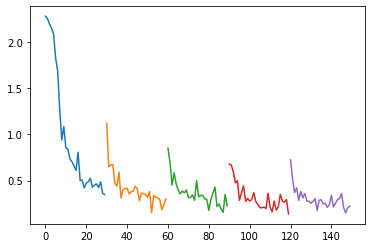

In [16]:
loss_plot(standard_total_loss_dropout)

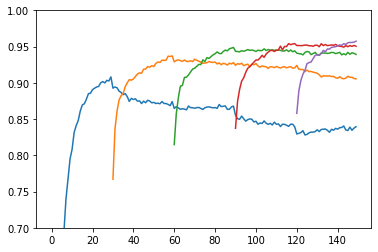

In [17]:
accuracy_plot(standard_prec_dropout)

No handles with labels found to put in legend.


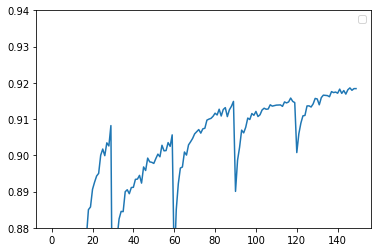

In [18]:
avg_precision_plot([standard_prec_dropout])

In [19]:
mlp_consolidation_dropout = MLP(
    DATASET_CONFIGS['mnist']['size']**2,
    DATASET_CONFIGS['mnist']['classes'],
    hidden_size,
    hidden_layer_num,
    hidden_dropout_prob,
    input_dropout_prob,
    lamda,
)

utils.gaussian_initialize(mlp_consolidation_dropout)

# run the standard experiment.
consolidate = True
ewc_prec_dropout, ewc_total_loss_dropout, ewc_ce_loss_dropout, ewc_ewc_loss_dropout =train(
    mlp_consolidation_dropout, train_datasets, test_datasets,
    epochs_per_task,
    batch_size,
    test_size,
    consolidate,
    fisher_estimation_sample_size,
    lr,
    weight_decay,
    eval_log_interval,
    loss_log_interval,
    cuda
)

=> task: 1/5 | epoch: 1/30 | progress: [60032/60000] (100%) | prec: 0.1771 | loss => ce: 2.265 / ewc: 0.0 / total: 2.265: : 469it [00:32, 14.59it/s]
=> task: 1/5 | epoch: 2/30 | progress: [256/60000] (0%) | prec: 0.1406 | loss => ce: 2.283 / ewc: 0.0 / total: 2.283: : 2it [00:00, 12.65it/s]

Test Accuracy {1: [0.3082275390625]}
total loss {1: [2.265169143676758]} cross entropy {1: [2.265169143676758]} ewc {1: [0.0]}


=> task: 1/5 | epoch: 2/30 | progress: [60032/60000] (100%) | prec: 0.2604 | loss => ce: 2.26 / ewc: 0.0 / total: 2.26: : 469it [00:33, 14.06it/s]  
=> task: 1/5 | epoch: 3/30 | progress: [256/60000] (0%) | prec: 0.2031 | loss => ce: 2.262 / ewc: 0.0 / total: 2.262: : 2it [00:00, 11.86it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625]}
total loss {1: [2.265169143676758, 2.2600526809692383]} cross entropy {1: [2.265169143676758, 2.2600526809692383]} ewc {1: [0.0, 0.0]}


=> task: 1/5 | epoch: 3/30 | progress: [60032/60000] (100%) | prec: 0.375 | loss => ce: 2.222 / ewc: 0.0 / total: 2.222: : 469it [00:33, 14.16it/s] 
=> task: 1/5 | epoch: 4/30 | progress: [256/60000] (0%) | prec: 0.3203 | loss => ce: 2.231 / ewc: 0.0 / total: 2.231: : 2it [00:00, 12.66it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375]}
total loss {1: [2.265169143676758, 2.2600526809692383, 2.2220630645751953]} cross entropy {1: [2.265169143676758, 2.2600526809692383, 2.2220630645751953]} ewc {1: [0.0, 0.0, 0.0]}


=> task: 1/5 | epoch: 4/30 | progress: [60032/60000] (100%) | prec: 0.3854 | loss => ce: 2.176 / ewc: 0.0 / total: 2.176: : 469it [00:32, 14.54it/s]
=> task: 1/5 | epoch: 5/30 | progress: [256/60000] (0%) | prec: 0.3906 | loss => ce: 2.165 / ewc: 0.0 / total: 2.165: : 2it [00:00, 12.79it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625]}
total loss {1: [2.265169143676758, 2.2600526809692383, 2.2220630645751953, 2.1758158206939697]} cross entropy {1: [2.265169143676758, 2.2600526809692383, 2.2220630645751953, 2.1758158206939697]} ewc {1: [0.0, 0.0, 0.0, 0.0]}


=> task: 1/5 | epoch: 5/30 | progress: [60032/60000] (100%) | prec: 0.4583 | loss => ce: 2.053 / ewc: 0.0 / total: 2.053: : 469it [00:32, 14.52it/s]
=> task: 1/5 | epoch: 6/30 | progress: [256/60000] (0%) | prec: 0.4219 | loss => ce: 2.073 / ewc: 0.0 / total: 2.073: : 2it [00:00, 12.44it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875]}
total loss {1: [2.265169143676758, 2.2600526809692383, 2.2220630645751953, 2.1758158206939697, 2.0529229640960693]} cross entropy {1: [2.265169143676758, 2.2600526809692383, 2.2220630645751953, 2.1758158206939697, 2.0529229640960693]} ewc {1: [0.0, 0.0, 0.0, 0.0, 0.0]}


=> task: 1/5 | epoch: 6/30 | progress: [60032/60000] (100%) | prec: 0.4479 | loss => ce: 1.893 / ewc: 0.0 / total: 1.893: : 469it [00:32, 14.37it/s]
=> task: 1/5 | epoch: 7/30 | progress: [256/60000] (0%) | prec: 0.5234 | loss => ce: 1.876 / ewc: 0.0 / total: 1.876: : 2it [00:00, 11.85it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375]}
total loss {1: [2.265169143676758, 2.2600526809692383, 2.2220630645751953, 2.1758158206939697, 2.0529229640960693, 1.8931565284729004]} cross entropy {1: [2.265169143676758, 2.2600526809692383, 2.2220630645751953, 2.1758158206939697, 2.0529229640960693, 1.8931565284729004]} ewc {1: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}


=> task: 1/5 | epoch: 7/30 | progress: [60032/60000] (100%) | prec: 0.5312 | loss => ce: 1.71 / ewc: 0.0 / total: 1.71: : 469it [00:32, 14.24it/s]  
=> task: 1/5 | epoch: 8/30 | progress: [256/60000] (0%) | prec: 0.5312 | loss => ce: 1.584 / ewc: 0.0 / total: 1.584: : 2it [00:00, 12.95it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375]}
total loss {1: [2.265169143676758, 2.2600526809692383, 2.2220630645751953, 2.1758158206939697, 2.0529229640960693, 1.8931565284729004, 1.7103843688964844]} cross entropy {1: [2.265169143676758, 2.2600526809692383, 2.2220630645751953, 2.1758158206939697, 2.0529229640960693, 1.8931565284729004, 1.7103843688964844]} ewc {1: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}


=> task: 1/5 | epoch: 8/30 | progress: [60032/60000] (100%) | prec: 0.5625 | loss => ce: 1.261 / ewc: 0.0 / total: 1.261: : 469it [00:32, 14.44it/s]
=> task: 1/5 | epoch: 9/30 | progress: [256/60000] (0%) | prec: 0.5625 | loss => ce: 1.354 / ewc: 0.0 / total: 1.354: : 2it [00:00, 12.68it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875]}
total loss {1: [2.265169143676758, 2.2600526809692383, 2.2220630645751953, 2.1758158206939697, 2.0529229640960693, 1.8931565284729004, 1.7103843688964844, 1.260525107383728]} cross entropy {1: [2.265169143676758, 2.2600526809692383, 2.2220630645751953, 2.1758158206939697, 2.0529229640960693, 1.8931565284729004, 1.7103843688964844, 1.260525107383728]} ewc {1: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}


=> task: 1/5 | epoch: 9/30 | progress: [60032/60000] (100%) | prec: 0.5729 | loss => ce: 1.228 / ewc: 0.0 / total: 1.228: : 469it [00:32, 14.36it/s] 
=> task: 1/5 | epoch: 10/30 | progress: [256/60000] (0%) | prec: 0.6953 | loss => ce: 1.121 / ewc: 0.0 / total: 1.121: : 2it [00:00, 12.50it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625]}
total loss {1: [2.265169143676758, 2.2600526809692383, 2.2220630645751953, 2.1758158206939697, 2.0529229640960693, 1.8931565284729004, 1.7103843688964844, 1.260525107383728, 1.228293538093567]} cross entropy {1: [2.265169143676758, 2.2600526809692383, 2.2220630645751953, 2.1758158206939697, 2.0529229640960693, 1.8931565284729004, 1.7103843688964844, 1.260525107383728, 1.228293538093567]} ewc {1: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}


=> task: 1/5 | epoch: 10/30 | progress: [60032/60000] (100%) | prec: 0.6562 | loss => ce: 0.9865 / ewc: 0.0 / total: 0.9865: : 469it [00:32, 14.32it/s]
=> task: 1/5 | epoch: 11/30 | progress: [256/60000] (0%) | prec: 0.6875 | loss => ce: 0.9641 / ewc: 0.0 / total: 0.9641: : 2it [00:00, 13.49it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625]}
total loss {1: [2.265169143676758, 2.2600526809692383, 2.2220630645751953, 2.1758158206939697, 2.0529229640960693, 1.8931565284729004, 1.7103843688964844, 1.260525107383728, 1.228293538093567, 0.9865317940711975]} cross entropy {1: [2.265169143676758, 2.2600526809692383, 2.2220630645751953, 2.1758158206939697, 2.0529229640960693, 1.8931565284729004, 1.7103843688964844, 1.260525107383728, 1.228293538093567, 0.9865317940711975]} ewc {1: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}


=> task: 1/5 | epoch: 11/30 | progress: [60032/60000] (100%) | prec: 0.6667 | loss => ce: 0.8492 / ewc: 0.0 / total: 0.8492: : 469it [00:32, 14.47it/s]
=> task: 1/5 | epoch: 12/30 | progress: [256/60000] (0%) | prec: 0.6719 | loss => ce: 0.9739 / ewc: 0.0 / total: 0.9739: : 2it [00:00, 13.00it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125]}
total loss {1: [2.265169143676758, 2.2600526809692383, 2.2220630645751953, 2.1758158206939697, 2.0529229640960693, 1.8931565284729004, 1.7103843688964844, 1.260525107383728, 1.228293538093567, 0.9865317940711975, 0.8492440581321716]} cross entropy {1: [2.265169143676758, 2.2600526809692383, 2.2220630645751953, 2.1758158206939697, 2.0529229640960693, 1.8931565284729004, 1.7103843688964844, 1.260525107383728, 1.228293538093567, 0.9865317940711975, 0.8492440581321716]} ewc {1: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}


=> task: 1/5 | epoch: 12/30 | progress: [60032/60000] (100%) | prec: 0.7917 | loss => ce: 0.6221 / ewc: 0.0 / total: 0.6221: : 469it [00:33, 14.19it/s]
=> task: 1/5 | epoch: 13/30 | progress: [256/60000] (0%) | prec: 0.6328 | loss => ce: 0.9573 / ewc: 0.0 / total: 0.9573: : 2it [00:00, 13.26it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125]}
total loss {1: [2.265169143676758, 2.2600526809692383, 2.2220630645751953, 2.1758158206939697, 2.0529229640960693, 1.8931565284729004, 1.7103843688964844, 1.260525107383728, 1.228293538093567, 0.9865317940711975, 0.8492440581321716, 0.6221376061439514]} cross entropy {1: [2.265169143676758, 2.2600526809692383, 2.2220630645751953, 2.1758158206939697, 2.0529229640960693, 1.8931565284729004, 1.7103843688964844, 1.260525107383728, 1.228293538093567, 0.9865317940711975, 0.8492440581321716, 0.6221376061439514]} ewc {1: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}


=> task: 1/5 | epoch: 13/30 | progress: [60032/60000] (100%) | prec: 0.7604 | loss => ce: 0.8464 / ewc: 0.0 / total: 0.8464: : 469it [00:32, 14.54it/s]
=> task: 1/5 | epoch: 14/30 | progress: [256/60000] (0%) | prec: 0.7188 | loss => ce: 0.8159 / ewc: 0.0 / total: 0.8159: : 2it [00:00, 13.20it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875]}
total loss {1: [2.265169143676758, 2.2600526809692383, 2.2220630645751953, 2.1758158206939697, 2.0529229640960693, 1.8931565284729004, 1.7103843688964844, 1.260525107383728, 1.228293538093567, 0.9865317940711975, 0.8492440581321716, 0.6221376061439514, 0.8463501334190369]} cross entropy {1: [2.265169143676758, 2.2600526809692383, 2.2220630645751953, 2.1758158206939697, 2.0529229640960693, 1.8931565284729004, 1.7103843688964844, 1.260525107383728, 1.228293538093567, 0.9865317940711975, 0.8492440581321716, 0.6221376061439514, 0.8463501334190369]} ewc {1: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}


=> task: 1/5 | epoch: 14/30 | progress: [60032/60000] (100%) | prec: 0.8021 | loss => ce: 0.7582 / ewc: 0.0 / total: 0.7582: : 469it [00:32, 14.37it/s]
=> task: 1/5 | epoch: 15/30 | progress: [256/60000] (0%) | prec: 0.7812 | loss => ce: 0.7948 / ewc: 0.0 / total: 0.7948: : 2it [00:00, 13.05it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625]}
total loss {1: [2.265169143676758, 2.2600526809692383, 2.2220630645751953, 2.1758158206939697, 2.0529229640960693, 1.8931565284729004, 1.7103843688964844, 1.260525107383728, 1.228293538093567, 0.9865317940711975, 0.8492440581321716, 0.6221376061439514, 0.8463501334190369, 0.7582107186317444]} cross entropy {1: [2.265169143676758, 2.2600526809692383, 2.2220630645751953, 2.1758158206939697, 2.0529229640960693, 1.8931565284729004, 1.7103843688964844, 1.260525107383728, 1.228293538093567, 0.9865317940711975, 0.8492440581321716, 0.6221376061439514, 0.8463501334190369, 0.7582107186317444]} ewc {1: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}


=> task: 1/5 | epoch: 15/30 | progress: [60032/60000] (100%) | prec: 0.8229 | loss => ce: 0.6313 / ewc: 0.0 / total: 0.6313: : 469it [00:32, 14.53it/s]
=> task: 1/5 | epoch: 16/30 | progress: [256/60000] (0%) | prec: 0.8047 | loss => ce: 0.6556 / ewc: 0.0 / total: 0.6556: : 2it [00:00, 13.24it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875]}
total loss {1: [2.265169143676758, 2.2600526809692383, 2.2220630645751953, 2.1758158206939697, 2.0529229640960693, 1.8931565284729004, 1.7103843688964844, 1.260525107383728, 1.228293538093567, 0.9865317940711975, 0.8492440581321716, 0.6221376061439514, 0.8463501334190369, 0.7582107186317444, 0.6313103437423706]} cross entropy {1: [2.265169143676758, 2.2600526809692383, 2.2220630645751953, 2.1758158206939697, 2.0529229640960693, 1.8931565284729004, 1.7103843688964844, 1.260525107383728, 1.228293538093567, 0.9865317940711975, 0.8492440581321716, 0.6221376061439514, 0.8463501334190369, 0.7582107186317444, 0.6313103437423706]} ewc {1: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}


=> task: 1/5 | epoch: 16/30 | progress: [60032/60000] (100%) | prec: 0.8125 | loss => ce: 0.5537 / ewc: 0.0 / total: 0.5537: : 469it [00:32, 14.40it/s]
=> task: 1/5 | epoch: 17/30 | progress: [256/60000] (0%) | prec: 0.7734 | loss => ce: 0.6875 / ewc: 0.0 / total: 0.6875: : 2it [00:00, 13.05it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125]}
total loss {1: [2.265169143676758, 2.2600526809692383, 2.2220630645751953, 2.1758158206939697, 2.0529229640960693, 1.8931565284729004, 1.7103843688964844, 1.260525107383728, 1.228293538093567, 0.9865317940711975, 0.8492440581321716, 0.6221376061439514, 0.8463501334190369, 0.7582107186317444, 0.6313103437423706, 0.5536661744117737]} cross entropy {1: [2.265169143676758, 2.2600526809692383, 2.2220630645751953, 2.1758158206939697, 2.0529229640960693, 1.8931565284729004, 1.7103843688964844, 1.260525107383728, 1.228293538093567, 0.9865317940711975, 0.8492440581321716, 0.6221376061439514, 0.8463501334190369, 0.7582107186317444, 0.6313103437423706, 0.5536661744117737]} ewc {1: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

=> task: 1/5 | epoch: 17/30 | progress: [60032/60000] (100%) | prec: 0.8333 | loss => ce: 0.657 / ewc: 0.0 / total: 0.657: : 469it [00:32, 14.46it/s]  
=> task: 1/5 | epoch: 18/30 | progress: [256/60000] (0%) | prec: 0.8047 | loss => ce: 0.6275 / ewc: 0.0 / total: 0.6275: : 2it [00:00, 12.93it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875]}
total loss {1: [2.265169143676758, 2.2600526809692383, 2.2220630645751953, 2.1758158206939697, 2.0529229640960693, 1.8931565284729004, 1.7103843688964844, 1.260525107383728, 1.228293538093567, 0.9865317940711975, 0.8492440581321716, 0.6221376061439514, 0.8463501334190369, 0.7582107186317444, 0.6313103437423706, 0.5536661744117737, 0.6569985747337341]} cross entropy {1: [2.265169143676758, 2.2600526809692383, 2.2220630645751953, 2.1758158206939697, 2.0529229640960693, 1.8931565284729004, 1.7103843688964844, 1.260525107383728, 1.228293538093567, 0.9865317940711975, 0.8492440581321716, 0.6221376061439514, 0.8463501334190369, 0.7582107186317444, 0.6313103437423706, 0.5536661744117737, 0.65699857473373

=> task: 1/5 | epoch: 18/30 | progress: [60032/60000] (100%) | prec: 0.8333 | loss => ce: 0.6255 / ewc: 0.0 / total: 0.6255: : 469it [00:32, 14.32it/s]
=> task: 1/5 | epoch: 19/30 | progress: [256/60000] (0%) | prec: 0.8125 | loss => ce: 0.5509 / ewc: 0.0 / total: 0.5509: : 2it [00:00, 12.86it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875]}
total loss {1: [2.265169143676758, 2.2600526809692383, 2.2220630645751953, 2.1758158206939697, 2.0529229640960693, 1.8931565284729004, 1.7103843688964844, 1.260525107383728, 1.228293538093567, 0.9865317940711975, 0.8492440581321716, 0.6221376061439514, 0.8463501334190369, 0.7582107186317444, 0.6313103437423706, 0.5536661744117737, 0.6569985747337341, 0.625507652759552]} cross entropy {1: [2.265169143676758, 2.2600526809692383, 2.2220630645751953, 2.1758158206939697, 2.0529229640960693, 1.8931565284729004, 1.7103843688964844, 1.260525107383728, 1.228293538093567, 0.9865317940711975, 0.8492440581321716, 0.6221376061439514, 0.8463501334190369, 0.7582107186317444, 0.6313103437423706, 0.5

=> task: 1/5 | epoch: 19/30 | progress: [60032/60000] (100%) | prec: 0.8125 | loss => ce: 0.6083 / ewc: 0.0 / total: 0.6083: : 469it [00:32, 14.42it/s]
=> task: 1/5 | epoch: 20/30 | progress: [256/60000] (0%) | prec: 0.8047 | loss => ce: 0.6111 / ewc: 0.0 / total: 0.6111: : 2it [00:00, 13.07it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625]}
total loss {1: [2.265169143676758, 2.2600526809692383, 2.2220630645751953, 2.1758158206939697, 2.0529229640960693, 1.8931565284729004, 1.7103843688964844, 1.260525107383728, 1.228293538093567, 0.9865317940711975, 0.8492440581321716, 0.6221376061439514, 0.8463501334190369, 0.7582107186317444, 0.6313103437423706, 0.5536661744117737, 0.6569985747337341, 0.625507652759552, 0.6083450317382812]} cross entropy {1: [2.265169143676758, 2.2600526809692383, 2.2220630645751953, 2.1758158206939697, 2.0529229640960693, 1.8931565284729004, 1.7103843688964844, 1.260525107383728, 1.228293538093567, 0.9865317940711975, 0.8492440581321716, 0.6221376061439514, 0.8463501334190369, 0.758210

=> task: 1/5 | epoch: 20/30 | progress: [60032/60000] (100%) | prec: 0.8125 | loss => ce: 0.6457 / ewc: 0.0 / total: 0.6457: : 469it [00:32, 14.40it/s]
=> task: 1/5 | epoch: 21/30 | progress: [256/60000] (0%) | prec: 0.8438 | loss => ce: 0.5018 / ewc: 0.0 / total: 0.5018: : 2it [00:00, 13.37it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125]}
total loss {1: [2.265169143676758, 2.2600526809692383, 2.2220630645751953, 2.1758158206939697, 2.0529229640960693, 1.8931565284729004, 1.7103843688964844, 1.260525107383728, 1.228293538093567, 0.9865317940711975, 0.8492440581321716, 0.6221376061439514, 0.8463501334190369, 0.7582107186317444, 0.6313103437423706, 0.5536661744117737, 0.6569985747337341, 0.625507652759552, 0.6083450317382812, 0.6457447409629822]} cross entropy {1: [2.265169143676758, 2.2600526809692383, 2.2220630645751953, 2.1758158206939697, 2.0529229640960693, 1.8931565284729004, 1.7103843688964844, 1.260525107383728, 1.228293538093567, 0.9865317940711975, 0.8492440581321716, 0.622137606

=> task: 1/5 | epoch: 21/30 | progress: [60032/60000] (100%) | prec: 0.7917 | loss => ce: 0.6386 / ewc: 0.0 / total: 0.6386: : 469it [00:32, 14.52it/s]
=> task: 1/5 | epoch: 22/30 | progress: [256/60000] (0%) | prec: 0.8281 | loss => ce: 0.5097 / ewc: 0.0 / total: 0.5097: : 2it [00:00, 13.19it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125]}
total loss {1: [2.265169143676758, 2.2600526809692383, 2.2220630645751953, 2.1758158206939697, 2.0529229640960693, 1.8931565284729004, 1.7103843688964844, 1.260525107383728, 1.228293538093567, 0.9865317940711975, 0.8492440581321716, 0.6221376061439514, 0.8463501334190369, 0.7582107186317444, 0.6313103437423706, 0.5536661744117737, 0.6569985747337341, 0.625507652759552, 0.6083450317382812, 0.6457447409629822, 0.6386484503746033]} cross entropy {1: [2.265169143676758, 2.2600526809692383, 2.2220630645751953, 2.1758158206939697, 2.0529229640960693, 1.8931565284729004, 1.7103843688964844, 1.260525107383728, 1.228293538093567, 0.98653179407119

=> task: 1/5 | epoch: 22/30 | progress: [60032/60000] (100%) | prec: 0.7917 | loss => ce: 0.6455 / ewc: 0.0 / total: 0.6455: : 469it [00:32, 14.49it/s]
=> task: 1/5 | epoch: 23/30 | progress: [256/60000] (0%) | prec: 0.8281 | loss => ce: 0.498 / ewc: 0.0 / total: 0.498: : 2it [00:00, 13.18it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625]}
total loss {1: [2.265169143676758, 2.2600526809692383, 2.2220630645751953, 2.1758158206939697, 2.0529229640960693, 1.8931565284729004, 1.7103843688964844, 1.260525107383728, 1.228293538093567, 0.9865317940711975, 0.8492440581321716, 0.6221376061439514, 0.8463501334190369, 0.7582107186317444, 0.6313103437423706, 0.5536661744117737, 0.6569985747337341, 0.625507652759552, 0.6083450317382812, 0.6457447409629822, 0.6386484503746033, 0.6454809308052063]} cross entropy {1: [2.265169143676758, 2.2600526809692383, 2.2220630645751953, 2.1758158206939697, 2.0529229640960693, 1.8931565284729004, 1.7103843688964844, 1.260525107383728

=> task: 1/5 | epoch: 23/30 | progress: [60032/60000] (100%) | prec: 0.8438 | loss => ce: 0.5016 / ewc: 0.0 / total: 0.5016: : 469it [00:32, 14.45it/s]
=> task: 1/5 | epoch: 24/30 | progress: [256/60000] (0%) | prec: 0.8359 | loss => ce: 0.4563 / ewc: 0.0 / total: 0.4563: : 2it [00:00, 13.09it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125]}
total loss {1: [2.265169143676758, 2.2600526809692383, 2.2220630645751953, 2.1758158206939697, 2.0529229640960693, 1.8931565284729004, 1.7103843688964844, 1.260525107383728, 1.228293538093567, 0.9865317940711975, 0.8492440581321716, 0.6221376061439514, 0.8463501334190369, 0.7582107186317444, 0.6313103437423706, 0.5536661744117737, 0.6569985747337341, 0.625507652759552, 0.6083450317382812, 0.6457447409629822, 0.6386484503746033, 0.6454809308052063, 0.5016054511070251]} cross entropy {1: [2.265169143676758, 2.2600526809692383, 2.2220630645751953, 2.1758158206939697, 2.0529229640960693, 1.8931565284729004, 1.71

=> task: 1/5 | epoch: 24/30 | progress: [60032/60000] (100%) | prec: 0.8333 | loss => ce: 0.4661 / ewc: 0.0 / total: 0.4661: : 469it [00:32, 14.43it/s]
=> task: 1/5 | epoch: 25/30 | progress: [256/60000] (0%) | prec: 0.9141 | loss => ce: 0.3686 / ewc: 0.0 / total: 0.3686: : 2it [00:00, 13.44it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625]}
total loss {1: [2.265169143676758, 2.2600526809692383, 2.2220630645751953, 2.1758158206939697, 2.0529229640960693, 1.8931565284729004, 1.7103843688964844, 1.260525107383728, 1.228293538093567, 0.9865317940711975, 0.8492440581321716, 0.6221376061439514, 0.8463501334190369, 0.7582107186317444, 0.6313103437423706, 0.5536661744117737, 0.6569985747337341, 0.625507652759552, 0.6083450317382812, 0.6457447409629822, 0.6386484503746033, 0.6454809308052063, 0.5016054511070251, 0.46613654494285583]} cross entropy {1: [2.265169143676758, 2.2600526809692383, 2.2220630645751953, 2.1758158206939697, 2.0529

=> task: 1/5 | epoch: 25/30 | progress: [60032/60000] (100%) | prec: 0.8854 | loss => ce: 0.3785 / ewc: 0.0 / total: 0.3785: : 469it [00:32, 14.48it/s]
=> task: 1/5 | epoch: 26/30 | progress: [256/60000] (0%) | prec: 0.8594 | loss => ce: 0.5284 / ewc: 0.0 / total: 0.5284: : 2it [00:00, 13.07it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875]}
total loss {1: [2.265169143676758, 2.2600526809692383, 2.2220630645751953, 2.1758158206939697, 2.0529229640960693, 1.8931565284729004, 1.7103843688964844, 1.260525107383728, 1.228293538093567, 0.9865317940711975, 0.8492440581321716, 0.6221376061439514, 0.8463501334190369, 0.7582107186317444, 0.6313103437423706, 0.5536661744117737, 0.6569985747337341, 0.625507652759552, 0.6083450317382812, 0.6457447409629822, 0.6386484503746033, 0.6454809308052063, 0.5016054511070251, 0.46613654494285583, 0.378521203994751]} cross entropy {1: [2.265169143676758, 2.2600526809692383, 2.22206306

=> task: 1/5 | epoch: 26/30 | progress: [60032/60000] (100%) | prec: 0.8854 | loss => ce: 0.393 / ewc: 0.0 / total: 0.393: : 469it [00:32, 14.50it/s]  
=> task: 1/5 | epoch: 27/30 | progress: [256/60000] (0%) | prec: 0.8516 | loss => ce: 0.5061 / ewc: 0.0 / total: 0.5061: : 2it [00:00, 13.09it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625]}
total loss {1: [2.265169143676758, 2.2600526809692383, 2.2220630645751953, 2.1758158206939697, 2.0529229640960693, 1.8931565284729004, 1.7103843688964844, 1.260525107383728, 1.228293538093567, 0.9865317940711975, 0.8492440581321716, 0.6221376061439514, 0.8463501334190369, 0.7582107186317444, 0.6313103437423706, 0.5536661744117737, 0.6569985747337341, 0.625507652759552, 0.6083450317382812, 0.6457447409629822, 0.6386484503746033, 0.6454809308052063, 0.5016054511070251, 0.46613654494285583, 0.378521203994751, 0.39297106862068176]} cross entropy {1: [2.2651691436

=> task: 1/5 | epoch: 27/30 | progress: [60032/60000] (100%) | prec: 0.875 | loss => ce: 0.357 / ewc: 0.0 / total: 0.357: : 469it [00:32, 14.42it/s]   
=> task: 1/5 | epoch: 28/30 | progress: [256/60000] (0%) | prec: 0.8906 | loss => ce: 0.4312 / ewc: 0.0 / total: 0.4312: : 2it [00:00, 13.16it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375]}
total loss {1: [2.265169143676758, 2.2600526809692383, 2.2220630645751953, 2.1758158206939697, 2.0529229640960693, 1.8931565284729004, 1.7103843688964844, 1.260525107383728, 1.228293538093567, 0.9865317940711975, 0.8492440581321716, 0.6221376061439514, 0.8463501334190369, 0.7582107186317444, 0.6313103437423706, 0.5536661744117737, 0.6569985747337341, 0.625507652759552, 0.6083450317382812, 0.6457447409629822, 0.6386484503746033, 0.6454809308052063, 0.5016054511070251, 0.46613654494285583, 0.378521203994751, 0.39297106862068176, 0.357027620077133

=> task: 1/5 | epoch: 28/30 | progress: [60032/60000] (100%) | prec: 0.8854 | loss => ce: 0.4043 / ewc: 0.0 / total: 0.4043: : 469it [00:32, 14.48it/s]
=> task: 1/5 | epoch: 29/30 | progress: [256/60000] (0%) | prec: 0.8203 | loss => ce: 0.4253 / ewc: 0.0 / total: 0.4253: : 2it [00:00, 12.64it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875]}
total loss {1: [2.265169143676758, 2.2600526809692383, 2.2220630645751953, 2.1758158206939697, 2.0529229640960693, 1.8931565284729004, 1.7103843688964844, 1.260525107383728, 1.228293538093567, 0.9865317940711975, 0.8492440581321716, 0.6221376061439514, 0.8463501334190369, 0.7582107186317444, 0.6313103437423706, 0.5536661744117737, 0.6569985747337341, 0.625507652759552, 0.6083450317382812, 0.6457447409629822, 0.6386484503746033, 0.6454809308052063, 0.5016054511070251, 0.46613654494285583, 0.378521203994751, 0.39297106862068176, 

=> task: 1/5 | epoch: 29/30 | progress: [60032/60000] (100%) | prec: 0.8438 | loss => ce: 0.4838 / ewc: 0.0 / total: 0.4838: : 469it [00:32, 14.44it/s]
=> task: 1/5 | epoch: 30/30 | progress: [256/60000] (0%) | prec: 0.9062 | loss => ce: 0.3413 / ewc: 0.0 / total: 0.3413: : 2it [00:00, 13.42it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625]}
total loss {1: [2.265169143676758, 2.2600526809692383, 2.2220630645751953, 2.1758158206939697, 2.0529229640960693, 1.8931565284729004, 1.7103843688964844, 1.260525107383728, 1.228293538093567, 0.9865317940711975, 0.8492440581321716, 0.6221376061439514, 0.8463501334190369, 0.7582107186317444, 0.6313103437423706, 0.5536661744117737, 0.6569985747337341, 0.625507652759552, 0.6083450317382812, 0.6457447409629822, 0.6386484503746033, 0.6454809308052063, 0.5016054511070251, 0.46613654494285583, 0.378521203994751, 0.39

=> task: 1/5 | epoch: 30/30 | progress: [60032/60000] (100%) | prec: 0.8646 | loss => ce: 0.482 / ewc: 0.0 / total: 0.482: : 469it [00:32, 14.44it/s]  


Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875]}
total loss {1: [2.265169143676758, 2.2600526809692383, 2.2220630645751953, 2.1758158206939697, 2.0529229640960693, 1.8931565284729004, 1.7103843688964844, 1.260525107383728, 1.228293538093567, 0.9865317940711975, 0.8492440581321716, 0.6221376061439514, 0.8463501334190369, 0.7582107186317444, 0.6313103437423706, 0.5536661744117737, 0.6569985747337341, 0.625507652759552, 0.6083450317382812, 0.6457447409629822, 0.6386484503746033, 0.6454809308052063, 0.5016054511070251, 0.46613654494285583, 0.3785

=> task: 2/5 | epoch: 1/30 | progress: [128/60000] (0%) | prec: 0.09375 | loss => ce: 2.472 / ewc: 0.0 / total: 2.472: : 1it [00:00,  7.56it/s]

 Done!


=> task: 2/5 | epoch: 1/30 | progress: [60032/60000] (100%) | prec: 0.7188 | loss => ce: 1.071 / ewc: 0.04559 / total: 1.116: : 469it [00:41, 11.22it/s]
=> task: 2/5 | epoch: 2/30 | progress: [128/60000] (0%) | prec: 0.6328 | loss => ce: 1.087 / ewc: 0.0457 / total: 1.133: : 1it [00:00,  9.26it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125], 2: [0.7626953125]}
total loss {1: [2.265169143676758, 2.2600526809692383, 2.2220630645751953, 2.1758158206939697, 2.0529229640960693, 1.8931565284729004, 1.7103843688964844, 1.260525107383728, 1.228293538093567, 0.9865317940711975, 0.8492440581321716, 0.6221376061439514, 0.8463501334190369, 0.7582107186317444, 0.6313103437423706, 0.5536661744117737, 0.6569985747337341, 0.625507652759552, 0.6083450317382812, 0.6457447409629822, 0.6386484503746033, 0.6454809308052063, 0.5016054511

=> task: 2/5 | epoch: 2/30 | progress: [60032/60000] (100%) | prec: 0.75 | loss => ce: 0.834 / ewc: 0.07672 / total: 0.9107: : 469it [00:42, 11.12it/s]   
=> task: 2/5 | epoch: 3/30 | progress: [256/60000] (0%) | prec: 0.7266 | loss => ce: 0.9543 / ewc: 0.0768 / total: 1.031: : 2it [00:00, 10.77it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125], 2: [0.7626953125, 0.8228759765625]}
total loss {1: [2.265169143676758, 2.2600526809692383, 2.2220630645751953, 2.1758158206939697, 2.0529229640960693, 1.8931565284729004, 1.7103843688964844, 1.260525107383728, 1.228293538093567, 0.9865317940711975, 0.8492440581321716, 0.6221376061439514, 0.8463501334190369, 0.7582107186317444, 0.6313103437423706, 0.5536661744117737, 0.6569985747337341, 0.625507652759552, 0.6083450317382812, 0.6457447409629822, 0.6386484503746033,

=> task: 2/5 | epoch: 3/30 | progress: [60032/60000] (100%) | prec: 0.7396 | loss => ce: 0.7853 / ewc: 0.09182 / total: 0.8771: : 469it [00:41, 11.24it/s]
=> task: 2/5 | epoch: 4/30 | progress: [256/60000] (0%) | prec: 0.7578 | loss => ce: 0.6767 / ewc: 0.09189 / total: 0.7686: : 1it [00:00,  9.86it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625], 2: [0.7626953125, 0.8228759765625, 0.8487548828125]}
total loss {1: [2.265169143676758, 2.2600526809692383, 2.2220630645751953, 2.1758158206939697, 2.0529229640960693, 1.8931565284729004, 1.7103843688964844, 1.260525107383728, 1.228293538093567, 0.9865317940711975, 0.8492440581321716, 0.6221376061439514, 0.8463501334190369, 0.7582107186317444, 0.6313103437423706, 0.5536661744117737, 0.6569985747337341, 0.625507652759552, 0.6083450317382812, 0.6457

=> task: 2/5 | epoch: 4/30 | progress: [60032/60000] (100%) | prec: 0.7708 | loss => ce: 0.6315 / ewc: 0.09994 / total: 0.7315: : 469it [00:41, 11.29it/s]
=> task: 2/5 | epoch: 5/30 | progress: [256/60000] (0%) | prec: 0.7344 | loss => ce: 0.7142 / ewc: 0.09997 / total: 0.8142: : 1it [00:00,  9.77it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875], 2: [0.7626953125, 0.8228759765625, 0.8487548828125, 0.8594970703125]}
total loss {1: [2.265169143676758, 2.2600526809692383, 2.2220630645751953, 2.1758158206939697, 2.0529229640960693, 1.8931565284729004, 1.7103843688964844, 1.260525107383728, 1.228293538093567, 0.9865317940711975, 0.8492440581321716, 0.6221376061439514, 0.8463501334190369, 0.7582107186317444, 0.6313103437423706, 0.5536661744117737, 0.6569985747337341, 0.625507652

=> task: 2/5 | epoch: 5/30 | progress: [60032/60000] (100%) | prec: 0.7812 | loss => ce: 0.6333 / ewc: 0.105 / total: 0.7383: : 469it [00:41, 11.23it/s] 
=> task: 2/5 | epoch: 6/30 | progress: [256/60000] (0%) | prec: 0.8438 | loss => ce: 0.5385 / ewc: 0.105 / total: 0.6435: : 1it [00:00,  9.55it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625], 2: [0.7626953125, 0.8228759765625, 0.8487548828125, 0.8594970703125, 0.8681640625]}
total loss {1: [2.265169143676758, 2.2600526809692383, 2.2220630645751953, 2.1758158206939697, 2.0529229640960693, 1.8931565284729004, 1.7103843688964844, 1.260525107383728, 1.228293538093567, 0.9865317940711975, 0.8492440581321716, 0.6221376061439514, 0.8463501334190369, 0.7582107186317444, 0.6313103437423706, 0.5536661744117737, 

=> task: 2/5 | epoch: 6/30 | progress: [60032/60000] (100%) | prec: 0.75 | loss => ce: 0.7192 / ewc: 0.1085 / total: 0.8278: : 469it [00:41, 11.34it/s]  
=> task: 2/5 | epoch: 7/30 | progress: [256/60000] (0%) | prec: 0.8359 | loss => ce: 0.5927 / ewc: 0.1085 / total: 0.7012: : 2it [00:00, 10.50it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875], 2: [0.7626953125, 0.8228759765625, 0.8487548828125, 0.8594970703125, 0.8681640625, 0.877197265625]}
total loss {1: [2.265169143676758, 2.2600526809692383, 2.2220630645751953, 2.1758158206939697, 2.0529229640960693, 1.8931565284729004, 1.7103843688964844, 1.260525107383728, 1.228293538093567, 0.9865317940711975, 0.8492440581321716, 0.6221376061439514, 0.8463501334190369, 0.7582107186317444, 0.631310

=> task: 2/5 | epoch: 7/30 | progress: [60032/60000] (100%) | prec: 0.8646 | loss => ce: 0.4339 / ewc: 0.111 / total: 0.5449: : 469it [00:41, 11.33it/s]
=> task: 2/5 | epoch: 8/30 | progress: [256/60000] (0%) | prec: 0.8125 | loss => ce: 0.5827 / ewc: 0.111 / total: 0.6938: : 1it [00:00,  9.75it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375], 2: [0.7626953125, 0.8228759765625, 0.8487548828125, 0.8594970703125, 0.8681640625, 0.877197265625, 0.883544921875]}
total loss {1: [2.265169143676758, 2.2600526809692383, 2.2220630645751953, 2.1758158206939697, 2.0529229640960693, 1.8931565284729004, 1.7103843688964844, 1.260525107383728, 1.228293538093567, 0.9865317940711975, 0.8492440581321716, 0.6221376061439514, 0.8463501334190

=> task: 2/5 | epoch: 8/30 | progress: [60032/60000] (100%) | prec: 0.8125 | loss => ce: 0.6077 / ewc: 0.1132 / total: 0.7209: : 469it [00:41, 11.25it/s]
=> task: 2/5 | epoch: 9/30 | progress: [256/60000] (0%) | prec: 0.8125 | loss => ce: 0.5656 / ewc: 0.1132 / total: 0.6788: : 2it [00:00, 10.10it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125], 2: [0.7626953125, 0.8228759765625, 0.8487548828125, 0.8594970703125, 0.8681640625, 0.877197265625, 0.883544921875, 0.88671875]}
total loss {1: [2.265169143676758, 2.2600526809692383, 2.2220630645751953, 2.1758158206939697, 2.0529229640960693, 1.8931565284729004, 1.7103843688964844, 1.260525107383728, 1.228293538093567, 0.9865317940711975, 0.8492440581321716, 0.62213

=> task: 2/5 | epoch: 9/30 | progress: [60032/60000] (100%) | prec: 0.7604 | loss => ce: 0.7793 / ewc: 0.1148 / total: 0.8941: : 469it [00:41, 11.33it/s]
=> task: 2/5 | epoch: 10/30 | progress: [256/60000] (0%) | prec: 0.8047 | loss => ce: 0.5132 / ewc: 0.1148 / total: 0.6279: : 1it [00:00,  9.15it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375], 2: [0.7626953125, 0.8228759765625, 0.8487548828125, 0.8594970703125, 0.8681640625, 0.877197265625, 0.883544921875, 0.88671875, 0.89013671875]}
total loss {1: [2.265169143676758, 2.2600526809692383, 2.2220630645751953, 2.1758158206939697, 2.0529229640960693, 1.8931565284729004, 1.7103843688964844, 1.260525107383728, 1.228293538093567, 0.9865317940711975

=> task: 2/5 | epoch: 10/30 | progress: [60032/60000] (100%) | prec: 0.8438 | loss => ce: 0.5089 / ewc: 0.1159 / total: 0.6248: : 469it [00:41, 11.19it/s]
=> task: 2/5 | epoch: 11/30 | progress: [128/60000] (0%) | prec: 0.8359 | loss => ce: 0.519 / ewc: 0.1159 / total: 0.6349: : 1it [00:00,  9.04it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875], 2: [0.7626953125, 0.8228759765625, 0.8487548828125, 0.8594970703125, 0.8681640625, 0.877197265625, 0.883544921875, 0.88671875, 0.89013671875, 0.888427734375]}
total loss {1: [2.265169143676758, 2.2600526809692383, 2.2220630645751953, 2.1758158206939697, 2.0529229640960693, 1.8931565284729004, 1.7103843688964844, 1.260525107383728, 1.2282

=> task: 2/5 | epoch: 11/30 | progress: [60032/60000] (100%) | prec: 0.8333 | loss => ce: 0.519 / ewc: 0.1173 / total: 0.6364: : 469it [00:41, 11.31it/s] 
=> task: 2/5 | epoch: 12/30 | progress: [128/60000] (0%) | prec: 0.8281 | loss => ce: 0.6188 / ewc: 0.1173 / total: 0.7362: : 1it [00:00,  9.38it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625], 2: [0.7626953125, 0.8228759765625, 0.8487548828125, 0.8594970703125, 0.8681640625, 0.877197265625, 0.883544921875, 0.88671875, 0.89013671875, 0.888427734375, 0.8927001953125]}
total loss {1: [2.265169143676758, 2.2600526809692383, 2.2220630645751953, 2.1758158206939697, 2.0529229640960693, 1.8931565284729004, 1.7103843688

=> task: 2/5 | epoch: 12/30 | progress: [60032/60000] (100%) | prec: 0.8333 | loss => ce: 0.5742 / ewc: 0.1185 / total: 0.6927: : 469it [00:42, 11.06it/s]
=> task: 2/5 | epoch: 13/30 | progress: [256/60000] (0%) | prec: 0.8281 | loss => ce: 0.538 / ewc: 0.1185 / total: 0.6565: : 2it [00:00, 10.55it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375], 2: [0.7626953125, 0.8228759765625, 0.8487548828125, 0.8594970703125, 0.8681640625, 0.877197265625, 0.883544921875, 0.88671875, 0.89013671875, 0.888427734375, 0.8927001953125, 0.8941650390625]}
total loss {1: [2.265169143676758, 2.2600526809692383, 2.2220630645751953, 2.1758158206939697, 2.0529229640960693, 

=> task: 2/5 | epoch: 13/30 | progress: [60032/60000] (100%) | prec: 0.8333 | loss => ce: 0.5103 / ewc: 0.1195 / total: 0.6298: : 469it [00:41, 11.19it/s]
=> task: 2/5 | epoch: 14/30 | progress: [128/60000] (0%) | prec: 0.8203 | loss => ce: 0.5205 / ewc: 0.1195 / total: 0.64: : 1it [00:00,  9.25it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875], 2: [0.7626953125, 0.8228759765625, 0.8487548828125, 0.8594970703125, 0.8681640625, 0.877197265625, 0.883544921875, 0.88671875, 0.89013671875, 0.888427734375, 0.8927001953125, 0.8941650390625, 0.894287109375]}
total loss {1: [2.265169143676758, 2.2600526809692383, 2.2220630645751953, 2.1758158

=> task: 2/5 | epoch: 14/30 | progress: [60032/60000] (100%) | prec: 0.8542 | loss => ce: 0.4226 / ewc: 0.1207 / total: 0.5433: : 469it [00:41, 11.38it/s]
=> task: 2/5 | epoch: 15/30 | progress: [256/60000] (0%) | prec: 0.7969 | loss => ce: 0.5865 / ewc: 0.1207 / total: 0.7072: : 1it [00:00,  9.84it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375], 2: [0.7626953125, 0.8228759765625, 0.8487548828125, 0.8594970703125, 0.8681640625, 0.877197265625, 0.883544921875, 0.88671875, 0.89013671875, 0.888427734375, 0.8927001953125, 0.8941650390625, 0.894287109375, 0.8963623046875]}
total loss {1: [2.265169143676758, 2.2600526809692

=> task: 2/5 | epoch: 15/30 | progress: [60032/60000] (100%) | prec: 0.8229 | loss => ce: 0.4976 / ewc: 0.1216 / total: 0.6193: : 469it [00:41, 11.34it/s]
=> task: 2/5 | epoch: 16/30 | progress: [256/60000] (0%) | prec: 0.8594 | loss => ce: 0.5612 / ewc: 0.1216 / total: 0.6829: : 2it [00:00, 10.55it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875], 2: [0.7626953125, 0.8228759765625, 0.8487548828125, 0.8594970703125, 0.8681640625, 0.877197265625, 0.883544921875, 0.88671875, 0.89013671875, 0.888427734375, 0.8927001953125, 0.8941650390625, 0.894287109375, 0.8963623046875, 0.8985595703125]}
total loss {1: [2

=> task: 2/5 | epoch: 16/30 | progress: [60032/60000] (100%) | prec: 0.875 | loss => ce: 0.4667 / ewc: 0.1226 / total: 0.5893: : 469it [00:41, 11.35it/s] 
=> task: 2/5 | epoch: 17/30 | progress: [256/60000] (0%) | prec: 0.8672 | loss => ce: 0.5404 / ewc: 0.1225 / total: 0.663: : 1it [00:00,  9.97it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375], 2: [0.7626953125, 0.8228759765625, 0.8487548828125, 0.8594970703125, 0.8681640625, 0.877197265625, 0.883544921875, 0.88671875, 0.89013671875, 0.888427734375, 0.8927001953125, 0.8941650390625, 0.894287109375, 0.8963623046875, 0.8985595703125, 0.90051

=> task: 2/5 | epoch: 17/30 | progress: [60032/60000] (100%) | prec: 0.8542 | loss => ce: 0.543 / ewc: 0.1237 / total: 0.6668: : 469it [00:41, 11.24it/s] 
=> task: 2/5 | epoch: 18/30 | progress: [256/60000] (0%) | prec: 0.8906 | loss => ce: 0.4804 / ewc: 0.1238 / total: 0.6042: : 2it [00:00, 10.67it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875], 2: [0.7626953125, 0.8228759765625, 0.8487548828125, 0.8594970703125, 0.8681640625, 0.877197265625, 0.883544921875, 0.88671875, 0.89013671875, 0.888427734375, 0.8927001953125, 0.8941650390625, 0.894287109375, 0.8963623046875, 0.89855

=> task: 2/5 | epoch: 18/30 | progress: [60032/60000] (100%) | prec: 0.8333 | loss => ce: 0.5705 / ewc: 0.1244 / total: 0.6949: : 469it [00:41, 11.32it/s]
=> task: 2/5 | epoch: 19/30 | progress: [256/60000] (0%) | prec: 0.9375 | loss => ce: 0.3595 / ewc: 0.1244 / total: 0.4839: : 2it [00:00, 10.55it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875], 2: [0.7626953125, 0.8228759765625, 0.8487548828125, 0.8594970703125, 0.8681640625, 0.877197265625, 0.883544921875, 0.88671875, 0.89013671875, 0.888427734375, 0.8927001953125, 0.8941650390625, 0.894287109375, 0.89636

=> task: 2/5 | epoch: 19/30 | progress: [60032/60000] (100%) | prec: 0.875 | loss => ce: 0.5422 / ewc: 0.1252 / total: 0.6675: : 469it [00:41, 11.33it/s] 
=> task: 2/5 | epoch: 20/30 | progress: [128/60000] (0%) | prec: 0.8203 | loss => ce: 0.4816 / ewc: 0.1252 / total: 0.6068: : 1it [00:00,  8.15it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875, 0.9007568359375], 2: [0.7626953125, 0.8228759765625, 0.8487548828125, 0.8594970703125, 0.8681640625, 0.877197265625, 0.883544921875, 0.88671875, 0.89013671875, 0.888427734375, 0.8927001953125, 0.8941650390625, 0.8942

=> task: 2/5 | epoch: 20/30 | progress: [60032/60000] (100%) | prec: 0.875 | loss => ce: 0.5817 / ewc: 0.1261 / total: 0.7078: : 469it [00:42, 11.03it/s] 
=> task: 2/5 | epoch: 21/30 | progress: [256/60000] (0%) | prec: 0.8984 | loss => ce: 0.3991 / ewc: 0.1261 / total: 0.5252: : 1it [00:00,  9.98it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875, 0.9007568359375, 0.8990478515625], 2: [0.7626953125, 0.8228759765625, 0.8487548828125, 0.8594970703125, 0.8681640625, 0.877197265625, 0.883544921875, 0.88671875, 0.89013671875, 0.888427734375, 0.8927001953125, 0.8941

=> task: 2/5 | epoch: 21/30 | progress: [60032/60000] (100%) | prec: 0.8229 | loss => ce: 0.4966 / ewc: 0.1266 / total: 0.6233: : 469it [00:41, 11.30it/s]
=> task: 2/5 | epoch: 22/30 | progress: [256/60000] (0%) | prec: 0.8672 | loss => ce: 0.3965 / ewc: 0.1266 / total: 0.5232: : 1it [00:00,  9.79it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875, 0.9007568359375, 0.8990478515625, 0.9019775390625], 2: [0.7626953125, 0.8228759765625, 0.8487548828125, 0.8594970703125, 0.8681640625, 0.877197265625, 0.883544921875, 0.88671875, 0.89013671875, 0.888427734375, 0.8927

=> task: 2/5 | epoch: 22/30 | progress: [60032/60000] (100%) | prec: 0.8646 | loss => ce: 0.5536 / ewc: 0.1274 / total: 0.6811: : 469it [00:41, 11.20it/s]
=> task: 2/5 | epoch: 23/30 | progress: [256/60000] (0%) | prec: 0.8828 | loss => ce: 0.4267 / ewc: 0.1274 / total: 0.5541: : 1it [00:00,  9.98it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875, 0.9007568359375, 0.8990478515625, 0.9019775390625, 0.9013671875], 2: [0.7626953125, 0.8228759765625, 0.8487548828125, 0.8594970703125, 0.8681640625, 0.877197265625, 0.883544921875, 0.88671875, 0.89013671875, 0.888427

=> task: 2/5 | epoch: 23/30 | progress: [60032/60000] (100%) | prec: 0.9167 | loss => ce: 0.3176 / ewc: 0.1282 / total: 0.4458: : 469it [00:41, 11.23it/s]
=> task: 2/5 | epoch: 24/30 | progress: [128/60000] (0%) | prec: 0.8906 | loss => ce: 0.3882 / ewc: 0.1282 / total: 0.5163: : 1it [00:00,  9.29it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875, 0.9007568359375, 0.8990478515625, 0.9019775390625, 0.9013671875, 0.902099609375], 2: [0.7626953125, 0.8228759765625, 0.8487548828125, 0.8594970703125, 0.8681640625, 0.877197265625, 0.883544921875, 0.88671875, 0.89013

=> task: 2/5 | epoch: 24/30 | progress: [60032/60000] (100%) | prec: 0.8229 | loss => ce: 0.5579 / ewc: 0.1288 / total: 0.6867: : 469it [00:42, 11.11it/s]
=> task: 2/5 | epoch: 25/30 | progress: [256/60000] (0%) | prec: 0.8359 | loss => ce: 0.5574 / ewc: 0.1288 / total: 0.6862: : 2it [00:00, 10.45it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875, 0.9007568359375, 0.8990478515625, 0.9019775390625, 0.9013671875, 0.902099609375, 0.9022216796875], 2: [0.7626953125, 0.8228759765625, 0.8487548828125, 0.8594970703125, 0.8681640625, 0.877197265625, 0.883544921875, 0.

=> task: 2/5 | epoch: 25/30 | progress: [60032/60000] (100%) | prec: 0.9271 | loss => ce: 0.31 / ewc: 0.1295 / total: 0.4395: : 469it [00:42, 11.16it/s]  
=> task: 2/5 | epoch: 26/30 | progress: [256/60000] (0%) | prec: 0.8516 | loss => ce: 0.4888 / ewc: 0.1295 / total: 0.6183: : 1it [00:00,  9.79it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875, 0.9007568359375, 0.8990478515625, 0.9019775390625, 0.9013671875, 0.902099609375, 0.9022216796875, 0.8995361328125], 2: [0.7626953125, 0.8228759765625, 0.8487548828125, 0.8594970703125, 0.8681640625, 0.877197265625, 0

=> task: 2/5 | epoch: 26/30 | progress: [60032/60000] (100%) | prec: 0.8958 | loss => ce: 0.4034 / ewc: 0.1302 / total: 0.5336: : 469it [00:41, 11.18it/s]
=> task: 2/5 | epoch: 27/30 | progress: [128/60000] (0%) | prec: 0.8438 | loss => ce: 0.5424 / ewc: 0.1302 / total: 0.6726: : 1it [00:00,  9.35it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875, 0.9007568359375, 0.8990478515625, 0.9019775390625, 0.9013671875, 0.902099609375, 0.9022216796875, 0.8995361328125, 0.9013671875], 2: [0.7626953125, 0.8228759765625, 0.8487548828125, 0.8594970703125, 0.8681640625, 0.8

=> task: 2/5 | epoch: 27/30 | progress: [60032/60000] (100%) | prec: 0.875 | loss => ce: 0.4354 / ewc: 0.1309 / total: 0.5663: : 469it [00:41, 11.21it/s] 
=> task: 2/5 | epoch: 28/30 | progress: [256/60000] (0%) | prec: 0.8203 | loss => ce: 0.5461 / ewc: 0.1309 / total: 0.677: : 1it [00:00,  9.77it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875, 0.9007568359375, 0.8990478515625, 0.9019775390625, 0.9013671875, 0.902099609375, 0.9022216796875, 0.8995361328125, 0.9013671875, 0.9051513671875], 2: [0.7626953125, 0.8228759765625, 0.8487548828125, 0.8594970703125, 

=> task: 2/5 | epoch: 28/30 | progress: [60032/60000] (100%) | prec: 0.8646 | loss => ce: 0.412 / ewc: 0.1314 / total: 0.5434: : 469it [00:41, 11.25it/s] 
=> task: 2/5 | epoch: 29/30 | progress: [128/60000] (0%) | prec: 0.8359 | loss => ce: 0.5346 / ewc: 0.1314 / total: 0.666: : 1it [00:00,  8.88it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875, 0.9007568359375, 0.8990478515625, 0.9019775390625, 0.9013671875, 0.902099609375, 0.9022216796875, 0.8995361328125, 0.9013671875, 0.9051513671875, 0.902099609375], 2: [0.7626953125, 0.8228759765625, 0.8487548828125, 0

=> task: 2/5 | epoch: 29/30 | progress: [60032/60000] (100%) | prec: 0.8854 | loss => ce: 0.4136 / ewc: 0.1321 / total: 0.5457: : 469it [00:42, 11.16it/s]
=> task: 2/5 | epoch: 30/30 | progress: [256/60000] (0%) | prec: 0.9375 | loss => ce: 0.2933 / ewc: 0.1321 / total: 0.4254: : 1it [00:00,  9.40it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875, 0.9007568359375, 0.8990478515625, 0.9019775390625, 0.9013671875, 0.902099609375, 0.9022216796875, 0.8995361328125, 0.9013671875, 0.9051513671875, 0.902099609375, 0.901611328125], 2: [0.7626953125, 0.8228759765625, 0.

=> task: 2/5 | epoch: 30/30 | progress: [60032/60000] (100%) | prec: 0.8438 | loss => ce: 0.4136 / ewc: 0.1326 / total: 0.5462: : 469it [00:41, 11.18it/s]


Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875, 0.9007568359375, 0.8990478515625, 0.9019775390625, 0.9013671875, 0.902099609375, 0.9022216796875, 0.8995361328125, 0.9013671875, 0.9051513671875, 0.902099609375, 0.901611328125, 0.8994140625], 2: [0.7626953125, 0.822

=> task: 3/5 | epoch: 1/30 | progress: [128/60000] (0%) | prec: 0.1094 | loss => ce: 2.565 / ewc: 0.0 / total: 2.565: : 1it [00:00,  5.79it/s]

 Done!


=> task: 3/5 | epoch: 1/30 | progress: [60032/60000] (100%) | prec: 0.6667 | loss => ce: 1.026 / ewc: 0.05072 / total: 1.077: : 469it [00:43, 10.77it/s] 
=> task: 3/5 | epoch: 2/30 | progress: [128/60000] (0%) | prec: 0.6953 | loss => ce: 1.033 / ewc: 0.05071 / total: 1.083: : 1it [00:00,  9.57it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875, 0.9007568359375, 0.8990478515625, 0.9019775390625, 0.9013671875, 0.902099609375, 0.9022216796875, 0.8995361328125, 0.9013671875, 0.9051513671875, 0.902099609375, 0.901611328125, 0.8994140625, 0.8994140625], 2: [0.762

=> task: 3/5 | epoch: 2/30 | progress: [60032/60000] (100%) | prec: 0.8125 | loss => ce: 0.7194 / ewc: 0.0755 / total: 0.7949: : 469it [00:41, 11.32it/s] 
=> task: 3/5 | epoch: 3/30 | progress: [128/60000] (0%) | prec: 0.6719 | loss => ce: 0.9302 / ewc: 0.07555 / total: 1.006: : 1it [00:00,  9.21it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875, 0.9007568359375, 0.8990478515625, 0.9019775390625, 0.9013671875, 0.902099609375, 0.9022216796875, 0.8995361328125, 0.9013671875, 0.9051513671875, 0.902099609375, 0.901611328125, 0.8994140625, 0.8994140625, 0.89782714

=> task: 3/5 | epoch: 3/30 | progress: [60032/60000] (100%) | prec: 0.7917 | loss => ce: 0.7351 / ewc: 0.08738 / total: 0.8225: : 469it [00:41, 11.34it/s]
=> task: 3/5 | epoch: 4/30 | progress: [256/60000] (0%) | prec: 0.7734 | loss => ce: 0.6334 / ewc: 0.08741 / total: 0.7208: : 1it [00:00,  9.78it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875, 0.9007568359375, 0.8990478515625, 0.9019775390625, 0.9013671875, 0.902099609375, 0.9022216796875, 0.8995361328125, 0.9013671875, 0.9051513671875, 0.902099609375, 0.901611328125, 0.8994140625, 0.8994140625, 0.89782714

=> task: 3/5 | epoch: 4/30 | progress: [60032/60000] (100%) | prec: 0.7396 | loss => ce: 0.687 / ewc: 0.09416 / total: 0.7812: : 469it [00:41, 11.27it/s] 
=> task: 3/5 | epoch: 5/30 | progress: [256/60000] (0%) | prec: 0.8047 | loss => ce: 0.6382 / ewc: 0.0942 / total: 0.7324: : 1it [00:00,  9.79it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875, 0.9007568359375, 0.8990478515625, 0.9019775390625, 0.9013671875, 0.902099609375, 0.9022216796875, 0.8995361328125, 0.9013671875, 0.9051513671875, 0.902099609375, 0.901611328125, 0.8994140625, 0.8994140625, 0.89782714

=> task: 3/5 | epoch: 5/30 | progress: [60032/60000] (100%) | prec: 0.8021 | loss => ce: 0.5264 / ewc: 0.09877 / total: 0.6252: : 469it [00:41, 11.33it/s]
=> task: 3/5 | epoch: 6/30 | progress: [256/60000] (0%) | prec: 0.8516 | loss => ce: 0.4798 / ewc: 0.09879 / total: 0.5786: : 1it [00:00,  9.94it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875, 0.9007568359375, 0.8990478515625, 0.9019775390625, 0.9013671875, 0.902099609375, 0.9022216796875, 0.8995361328125, 0.9013671875, 0.9051513671875, 0.902099609375, 0.901611328125, 0.8994140625, 0.8994140625, 0.89782714

=> task: 3/5 | epoch: 6/30 | progress: [60032/60000] (100%) | prec: 0.8854 | loss => ce: 0.4009 / ewc: 0.1022 / total: 0.5032: : 469it [00:41, 11.36it/s]
=> task: 3/5 | epoch: 7/30 | progress: [256/60000] (0%) | prec: 0.8281 | loss => ce: 0.5154 / ewc: 0.1022 / total: 0.6177: : 1it [00:00,  9.90it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875, 0.9007568359375, 0.8990478515625, 0.9019775390625, 0.9013671875, 0.902099609375, 0.9022216796875, 0.8995361328125, 0.9013671875, 0.9051513671875, 0.902099609375, 0.901611328125, 0.8994140625, 0.8994140625, 0.89782714

=> task: 3/5 | epoch: 7/30 | progress: [60032/60000] (100%) | prec: 0.875 | loss => ce: 0.5612 / ewc: 0.105 / total: 0.6662: : 469it [00:41, 11.23it/s] 
=> task: 3/5 | epoch: 8/30 | progress: [256/60000] (0%) | prec: 0.8281 | loss => ce: 0.5528 / ewc: 0.1051 / total: 0.6578: : 1it [00:00,  9.96it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875, 0.9007568359375, 0.8990478515625, 0.9019775390625, 0.9013671875, 0.902099609375, 0.9022216796875, 0.8995361328125, 0.9013671875, 0.9051513671875, 0.902099609375, 0.901611328125, 0.8994140625, 0.8994140625, 0.89782714

=> task: 3/5 | epoch: 8/30 | progress: [60032/60000] (100%) | prec: 0.8542 | loss => ce: 0.4676 / ewc: 0.1075 / total: 0.5751: : 469it [00:41, 11.24it/s]
=> task: 3/5 | epoch: 9/30 | progress: [256/60000] (0%) | prec: 0.8281 | loss => ce: 0.5495 / ewc: 0.1075 / total: 0.657: : 1it [00:00,  9.91it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875, 0.9007568359375, 0.8990478515625, 0.9019775390625, 0.9013671875, 0.902099609375, 0.9022216796875, 0.8995361328125, 0.9013671875, 0.9051513671875, 0.902099609375, 0.901611328125, 0.8994140625, 0.8994140625, 0.89782714

=> task: 3/5 | epoch: 9/30 | progress: [60032/60000] (100%) | prec: 0.9062 | loss => ce: 0.4872 / ewc: 0.1097 / total: 0.5969: : 469it [00:41, 11.29it/s]
=> task: 3/5 | epoch: 10/30 | progress: [256/60000] (0%) | prec: 0.8672 | loss => ce: 0.4834 / ewc: 0.1097 / total: 0.5931: : 1it [00:00,  9.91it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875, 0.9007568359375, 0.8990478515625, 0.9019775390625, 0.9013671875, 0.902099609375, 0.9022216796875, 0.8995361328125, 0.9013671875, 0.9051513671875, 0.902099609375, 0.901611328125, 0.8994140625, 0.8994140625, 0.89782714

=> task: 3/5 | epoch: 10/30 | progress: [60032/60000] (100%) | prec: 0.8542 | loss => ce: 0.474 / ewc: 0.1115 / total: 0.5855: : 469it [00:41, 11.26it/s] 
=> task: 3/5 | epoch: 11/30 | progress: [256/60000] (0%) | prec: 0.8125 | loss => ce: 0.6301 / ewc: 0.1115 / total: 0.7416: : 1it [00:00,  9.80it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875, 0.9007568359375, 0.8990478515625, 0.9019775390625, 0.9013671875, 0.902099609375, 0.9022216796875, 0.8995361328125, 0.9013671875, 0.9051513671875, 0.902099609375, 0.901611328125, 0.8994140625, 0.8994140625, 0.89782714

=> task: 3/5 | epoch: 11/30 | progress: [60032/60000] (100%) | prec: 0.8542 | loss => ce: 0.4742 / ewc: 0.1132 / total: 0.5874: : 469it [00:41, 11.23it/s]
=> task: 3/5 | epoch: 12/30 | progress: [256/60000] (0%) | prec: 0.8281 | loss => ce: 0.5069 / ewc: 0.1133 / total: 0.6202: : 1it [00:00,  9.55it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875, 0.9007568359375, 0.8990478515625, 0.9019775390625, 0.9013671875, 0.902099609375, 0.9022216796875, 0.8995361328125, 0.9013671875, 0.9051513671875, 0.902099609375, 0.901611328125, 0.8994140625, 0.8994140625, 0.89782714

=> task: 3/5 | epoch: 12/30 | progress: [60032/60000] (100%) | prec: 0.9375 | loss => ce: 0.3489 / ewc: 0.1146 / total: 0.4634: : 469it [00:41, 11.36it/s]
=> task: 3/5 | epoch: 13/30 | progress: [256/60000] (0%) | prec: 0.8594 | loss => ce: 0.5212 / ewc: 0.1146 / total: 0.6358: : 1it [00:00,  9.76it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875, 0.9007568359375, 0.8990478515625, 0.9019775390625, 0.9013671875, 0.902099609375, 0.9022216796875, 0.8995361328125, 0.9013671875, 0.9051513671875, 0.902099609375, 0.901611328125, 0.8994140625, 0.8994140625, 0.89782714

=> task: 3/5 | epoch: 13/30 | progress: [60032/60000] (100%) | prec: 0.8958 | loss => ce: 0.4895 / ewc: 0.1159 / total: 0.6054: : 469it [00:41, 11.30it/s]
=> task: 3/5 | epoch: 14/30 | progress: [256/60000] (0%) | prec: 0.8125 | loss => ce: 0.5012 / ewc: 0.1159 / total: 0.6171: : 2it [00:00, 10.64it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875, 0.9007568359375, 0.8990478515625, 0.9019775390625, 0.9013671875, 0.902099609375, 0.9022216796875, 0.8995361328125, 0.9013671875, 0.9051513671875, 0.902099609375, 0.901611328125, 0.8994140625, 0.8994140625, 0.89782714

=> task: 3/5 | epoch: 14/30 | progress: [60032/60000] (100%) | prec: 0.8438 | loss => ce: 0.5154 / ewc: 0.1172 / total: 0.6327: : 469it [00:41, 11.25it/s]
=> task: 3/5 | epoch: 15/30 | progress: [256/60000] (0%) | prec: 0.8359 | loss => ce: 0.4666 / ewc: 0.1172 / total: 0.5839: : 1it [00:00,  9.96it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875, 0.9007568359375, 0.8990478515625, 0.9019775390625, 0.9013671875, 0.902099609375, 0.9022216796875, 0.8995361328125, 0.9013671875, 0.9051513671875, 0.902099609375, 0.901611328125, 0.8994140625, 0.8994140625, 0.89782714

=> task: 3/5 | epoch: 15/30 | progress: [60032/60000] (100%) | prec: 0.8542 | loss => ce: 0.4796 / ewc: 0.1183 / total: 0.5978: : 469it [00:41, 11.18it/s]
=> task: 3/5 | epoch: 16/30 | progress: [256/60000] (0%) | prec: 0.8906 | loss => ce: 0.4042 / ewc: 0.1183 / total: 0.5224: : 2it [00:00, 10.42it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875, 0.9007568359375, 0.8990478515625, 0.9019775390625, 0.9013671875, 0.902099609375, 0.9022216796875, 0.8995361328125, 0.9013671875, 0.9051513671875, 0.902099609375, 0.901611328125, 0.8994140625, 0.8994140625, 0.89782714

=> task: 3/5 | epoch: 16/30 | progress: [60032/60000] (100%) | prec: 0.9167 | loss => ce: 0.347 / ewc: 0.1193 / total: 0.4662: : 469it [00:41, 11.31it/s] 
=> task: 3/5 | epoch: 17/30 | progress: [256/60000] (0%) | prec: 0.8828 | loss => ce: 0.4034 / ewc: 0.1193 / total: 0.5226: : 1it [00:00,  9.86it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875, 0.9007568359375, 0.8990478515625, 0.9019775390625, 0.9013671875, 0.902099609375, 0.9022216796875, 0.8995361328125, 0.9013671875, 0.9051513671875, 0.902099609375, 0.901611328125, 0.8994140625, 0.8994140625, 0.89782714

=> task: 3/5 | epoch: 17/30 | progress: [60032/60000] (100%) | prec: 0.9271 | loss => ce: 0.3919 / ewc: 0.1203 / total: 0.5123: : 469it [00:41, 11.24it/s]
=> task: 3/5 | epoch: 18/30 | progress: [256/60000] (0%) | prec: 0.8047 | loss => ce: 0.6855 / ewc: 0.1203 / total: 0.8059: : 1it [00:00,  9.95it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875, 0.9007568359375, 0.8990478515625, 0.9019775390625, 0.9013671875, 0.902099609375, 0.9022216796875, 0.8995361328125, 0.9013671875, 0.9051513671875, 0.902099609375, 0.901611328125, 0.8994140625, 0.8994140625, 0.89782714

=> task: 3/5 | epoch: 18/30 | progress: [60032/60000] (100%) | prec: 0.8646 | loss => ce: 0.463 / ewc: 0.1212 / total: 0.5842: : 469it [00:41, 11.25it/s] 
=> task: 3/5 | epoch: 19/30 | progress: [256/60000] (0%) | prec: 0.8516 | loss => ce: 0.4217 / ewc: 0.1212 / total: 0.5429: : 1it [00:00,  9.85it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875, 0.9007568359375, 0.8990478515625, 0.9019775390625, 0.9013671875, 0.902099609375, 0.9022216796875, 0.8995361328125, 0.9013671875, 0.9051513671875, 0.902099609375, 0.901611328125, 0.8994140625, 0.8994140625, 0.89782714

=> task: 3/5 | epoch: 19/30 | progress: [60032/60000] (100%) | prec: 0.875 | loss => ce: 0.4195 / ewc: 0.1221 / total: 0.5416: : 469it [00:41, 11.22it/s] 
=> task: 3/5 | epoch: 20/30 | progress: [256/60000] (0%) | prec: 0.8672 | loss => ce: 0.4748 / ewc: 0.1221 / total: 0.5969: : 1it [00:00,  9.89it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875, 0.9007568359375, 0.8990478515625, 0.9019775390625, 0.9013671875, 0.902099609375, 0.9022216796875, 0.8995361328125, 0.9013671875, 0.9051513671875, 0.902099609375, 0.901611328125, 0.8994140625, 0.8994140625, 0.89782714

=> task: 3/5 | epoch: 20/30 | progress: [60032/60000] (100%) | prec: 0.9062 | loss => ce: 0.3378 / ewc: 0.1229 / total: 0.4607: : 469it [00:42, 11.13it/s]
=> task: 3/5 | epoch: 21/30 | progress: [256/60000] (0%) | prec: 0.8984 | loss => ce: 0.3727 / ewc: 0.1229 / total: 0.4956: : 1it [00:00,  9.98it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875, 0.9007568359375, 0.8990478515625, 0.9019775390625, 0.9013671875, 0.902099609375, 0.9022216796875, 0.8995361328125, 0.9013671875, 0.9051513671875, 0.902099609375, 0.901611328125, 0.8994140625, 0.8994140625, 0.89782714

=> task: 3/5 | epoch: 21/30 | progress: [60032/60000] (100%) | prec: 0.8125 | loss => ce: 0.525 / ewc: 0.1238 / total: 0.6488: : 469it [00:41, 11.33it/s] 
=> task: 3/5 | epoch: 22/30 | progress: [256/60000] (0%) | prec: 0.875 | loss => ce: 0.4425 / ewc: 0.1238 / total: 0.5663: : 2it [00:00, 10.41it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875, 0.9007568359375, 0.8990478515625, 0.9019775390625, 0.9013671875, 0.902099609375, 0.9022216796875, 0.8995361328125, 0.9013671875, 0.9051513671875, 0.902099609375, 0.901611328125, 0.8994140625, 0.8994140625, 0.89782714

=> task: 3/5 | epoch: 22/30 | progress: [60032/60000] (100%) | prec: 0.8958 | loss => ce: 0.386 / ewc: 0.1245 / total: 0.5104: : 469it [00:41, 11.24it/s] 
=> task: 3/5 | epoch: 23/30 | progress: [256/60000] (0%) | prec: 0.8594 | loss => ce: 0.416 / ewc: 0.1245 / total: 0.5404: : 1it [00:00,  9.51it/s] 

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875, 0.9007568359375, 0.8990478515625, 0.9019775390625, 0.9013671875, 0.902099609375, 0.9022216796875, 0.8995361328125, 0.9013671875, 0.9051513671875, 0.902099609375, 0.901611328125, 0.8994140625, 0.8994140625, 0.89782714

=> task: 3/5 | epoch: 23/30 | progress: [60032/60000] (100%) | prec: 0.9375 | loss => ce: 0.3125 / ewc: 0.1253 / total: 0.4378: : 469it [00:42, 11.04it/s]
=> task: 3/5 | epoch: 24/30 | progress: [256/60000] (0%) | prec: 0.8906 | loss => ce: 0.4231 / ewc: 0.1253 / total: 0.5484: : 2it [00:00, 10.31it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875, 0.9007568359375, 0.8990478515625, 0.9019775390625, 0.9013671875, 0.902099609375, 0.9022216796875, 0.8995361328125, 0.9013671875, 0.9051513671875, 0.902099609375, 0.901611328125, 0.8994140625, 0.8994140625, 0.89782714

=> task: 3/5 | epoch: 24/30 | progress: [60032/60000] (100%) | prec: 0.8438 | loss => ce: 0.4701 / ewc: 0.1258 / total: 0.5959: : 469it [00:41, 11.34it/s]
=> task: 3/5 | epoch: 25/30 | progress: [256/60000] (0%) | prec: 0.8672 | loss => ce: 0.4732 / ewc: 0.1258 / total: 0.599: : 2it [00:00, 10.79it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875, 0.9007568359375, 0.8990478515625, 0.9019775390625, 0.9013671875, 0.902099609375, 0.9022216796875, 0.8995361328125, 0.9013671875, 0.9051513671875, 0.902099609375, 0.901611328125, 0.8994140625, 0.8994140625, 0.89782714

=> task: 3/5 | epoch: 25/30 | progress: [60032/60000] (100%) | prec: 0.8333 | loss => ce: 0.4496 / ewc: 0.1263 / total: 0.5759: : 469it [00:41, 11.25it/s]
=> task: 3/5 | epoch: 26/30 | progress: [256/60000] (0%) | prec: 0.875 | loss => ce: 0.3926 / ewc: 0.1263 / total: 0.519: : 1it [00:00,  9.96it/s]  

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875, 0.9007568359375, 0.8990478515625, 0.9019775390625, 0.9013671875, 0.902099609375, 0.9022216796875, 0.8995361328125, 0.9013671875, 0.9051513671875, 0.902099609375, 0.901611328125, 0.8994140625, 0.8994140625, 0.89782714

=> task: 3/5 | epoch: 26/30 | progress: [60032/60000] (100%) | prec: 0.8958 | loss => ce: 0.3657 / ewc: 0.127 / total: 0.4927: : 469it [00:41, 11.26it/s]
=> task: 3/5 | epoch: 27/30 | progress: [256/60000] (0%) | prec: 0.8594 | loss => ce: 0.391 / ewc: 0.127 / total: 0.518: : 1it [00:00,  9.81it/s]  

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875, 0.9007568359375, 0.8990478515625, 0.9019775390625, 0.9013671875, 0.902099609375, 0.9022216796875, 0.8995361328125, 0.9013671875, 0.9051513671875, 0.902099609375, 0.901611328125, 0.8994140625, 0.8994140625, 0.89782714

=> task: 3/5 | epoch: 27/30 | progress: [60032/60000] (100%) | prec: 0.8958 | loss => ce: 0.5319 / ewc: 0.1275 / total: 0.6594: : 469it [00:41, 11.25it/s]
=> task: 3/5 | epoch: 28/30 | progress: [256/60000] (0%) | prec: 0.8906 | loss => ce: 0.3448 / ewc: 0.1275 / total: 0.4724: : 1it [00:00,  9.92it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875, 0.9007568359375, 0.8990478515625, 0.9019775390625, 0.9013671875, 0.902099609375, 0.9022216796875, 0.8995361328125, 0.9013671875, 0.9051513671875, 0.902099609375, 0.901611328125, 0.8994140625, 0.8994140625, 0.89782714

=> task: 3/5 | epoch: 28/30 | progress: [60032/60000] (100%) | prec: 0.875 | loss => ce: 0.4341 / ewc: 0.128 / total: 0.5621: : 469it [00:41, 11.29it/s] 
=> task: 3/5 | epoch: 29/30 | progress: [128/60000] (0%) | prec: 0.8984 | loss => ce: 0.3345 / ewc: 0.128 / total: 0.4625: : 1it [00:00,  9.90it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875, 0.9007568359375, 0.8990478515625, 0.9019775390625, 0.9013671875, 0.902099609375, 0.9022216796875, 0.8995361328125, 0.9013671875, 0.9051513671875, 0.902099609375, 0.901611328125, 0.8994140625, 0.8994140625, 0.89782714

=> task: 3/5 | epoch: 29/30 | progress: [60032/60000] (100%) | prec: 0.8958 | loss => ce: 0.4536 / ewc: 0.1286 / total: 0.5822: : 469it [00:41, 11.22it/s]
=> task: 3/5 | epoch: 30/30 | progress: [256/60000] (0%) | prec: 0.8516 | loss => ce: 0.4627 / ewc: 0.1286 / total: 0.5913: : 2it [00:00, 10.50it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875, 0.9007568359375, 0.8990478515625, 0.9019775390625, 0.9013671875, 0.902099609375, 0.9022216796875, 0.8995361328125, 0.9013671875, 0.9051513671875, 0.902099609375, 0.901611328125, 0.8994140625, 0.8994140625, 0.89782714

=> task: 3/5 | epoch: 30/30 | progress: [60032/60000] (100%) | prec: 0.8958 | loss => ce: 0.3315 / ewc: 0.1291 / total: 0.4606: : 469it [00:41, 11.36it/s]


Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875, 0.9007568359375, 0.8990478515625, 0.9019775390625, 0.9013671875, 0.902099609375, 0.9022216796875, 0.8995361328125, 0.9013671875, 0.9051513671875, 0.902099609375, 0.901611328125, 0.8994140625, 0.8994140625, 0.89782714

0it [00:00, ?it/s]

 Done!


=> task: 4/5 | epoch: 1/30 | progress: [60032/60000] (100%) | prec: 0.6875 | loss => ce: 1.037 / ewc: 0.05124 / total: 1.088: : 469it [00:42, 11.02it/s] 
=> task: 4/5 | epoch: 2/30 | progress: [256/60000] (0%) | prec: 0.6797 | loss => ce: 0.9055 / ewc: 0.05139 / total: 0.9569: : 1it [00:00,  9.60it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875, 0.9007568359375, 0.8990478515625, 0.9019775390625, 0.9013671875, 0.902099609375, 0.9022216796875, 0.8995361328125, 0.9013671875, 0.9051513671875, 0.902099609375, 0.901611328125, 0.8994140625, 0.8994140625, 0.89782714

=> task: 4/5 | epoch: 2/30 | progress: [60032/60000] (100%) | prec: 0.8229 | loss => ce: 0.6462 / ewc: 0.07028 / total: 0.7165: : 469it [00:43, 10.83it/s]
=> task: 4/5 | epoch: 3/30 | progress: [256/60000] (0%) | prec: 0.7109 | loss => ce: 0.8223 / ewc: 0.07032 / total: 0.8926: : 1it [00:00,  9.68it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875, 0.9007568359375, 0.8990478515625, 0.9019775390625, 0.9013671875, 0.902099609375, 0.9022216796875, 0.8995361328125, 0.9013671875, 0.9051513671875, 0.902099609375, 0.901611328125, 0.8994140625, 0.8994140625, 0.89782714

=> task: 4/5 | epoch: 3/30 | progress: [60032/60000] (100%) | prec: 0.7708 | loss => ce: 0.6309 / ewc: 0.07927 / total: 0.7102: : 469it [00:42, 11.01it/s]
=> task: 4/5 | epoch: 4/30 | progress: [256/60000] (0%) | prec: 0.7266 | loss => ce: 0.7683 / ewc: 0.07931 / total: 0.8476: : 1it [00:00,  9.59it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875, 0.9007568359375, 0.8990478515625, 0.9019775390625, 0.9013671875, 0.902099609375, 0.9022216796875, 0.8995361328125, 0.9013671875, 0.9051513671875, 0.902099609375, 0.901611328125, 0.8994140625, 0.8994140625, 0.89782714

=> task: 4/5 | epoch: 4/30 | progress: [60032/60000] (100%) | prec: 0.7917 | loss => ce: 0.5089 / ewc: 0.0847 / total: 0.5936: : 469it [00:42, 11.00it/s] 
=> task: 4/5 | epoch: 5/30 | progress: [128/60000] (0%) | prec: 0.7734 | loss => ce: 0.6244 / ewc: 0.0847 / total: 0.7091: : 1it [00:00,  9.48it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875, 0.9007568359375, 0.8990478515625, 0.9019775390625, 0.9013671875, 0.902099609375, 0.9022216796875, 0.8995361328125, 0.9013671875, 0.9051513671875, 0.902099609375, 0.901611328125, 0.8994140625, 0.8994140625, 0.89782714

=> task: 4/5 | epoch: 5/30 | progress: [60032/60000] (100%) | prec: 0.8125 | loss => ce: 0.6759 / ewc: 0.08861 / total: 0.7645: : 469it [00:43, 10.74it/s]
=> task: 4/5 | epoch: 6/30 | progress: [256/60000] (0%) | prec: 0.8672 | loss => ce: 0.4951 / ewc: 0.08863 / total: 0.5838: : 1it [00:00,  9.48it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875, 0.9007568359375, 0.8990478515625, 0.9019775390625, 0.9013671875, 0.902099609375, 0.9022216796875, 0.8995361328125, 0.9013671875, 0.9051513671875, 0.902099609375, 0.901611328125, 0.8994140625, 0.8994140625, 0.89782714

=> task: 4/5 | epoch: 6/30 | progress: [60032/60000] (100%) | prec: 0.8646 | loss => ce: 0.5242 / ewc: 0.0919 / total: 0.6161: : 469it [00:42, 10.92it/s] 
=> task: 4/5 | epoch: 7/30 | progress: [128/60000] (0%) | prec: 0.875 | loss => ce: 0.5024 / ewc: 0.0919 / total: 0.5943: : 1it [00:00,  9.16it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875, 0.9007568359375, 0.8990478515625, 0.9019775390625, 0.9013671875, 0.902099609375, 0.9022216796875, 0.8995361328125, 0.9013671875, 0.9051513671875, 0.902099609375, 0.901611328125, 0.8994140625, 0.8994140625, 0.89782714

=> task: 4/5 | epoch: 7/30 | progress: [60032/60000] (100%) | prec: 0.8958 | loss => ce: 0.4374 / ewc: 0.0946 / total: 0.532: : 469it [00:43, 10.80it/s]  
=> task: 4/5 | epoch: 8/30 | progress: [256/60000] (0%) | prec: 0.8438 | loss => ce: 0.5029 / ewc: 0.09462 / total: 0.5975: : 1it [00:00,  9.56it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875, 0.9007568359375, 0.8990478515625, 0.9019775390625, 0.9013671875, 0.902099609375, 0.9022216796875, 0.8995361328125, 0.9013671875, 0.9051513671875, 0.902099609375, 0.901611328125, 0.8994140625, 0.8994140625, 0.89782714

=> task: 4/5 | epoch: 8/30 | progress: [60032/60000] (100%) | prec: 0.9062 | loss => ce: 0.4316 / ewc: 0.097 / total: 0.5286: : 469it [00:42, 10.96it/s] 
=> task: 4/5 | epoch: 9/30 | progress: [128/60000] (0%) | prec: 0.8281 | loss => ce: 0.471 / ewc: 0.09699 / total: 0.568: : 1it [00:00,  9.15it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875, 0.9007568359375, 0.8990478515625, 0.9019775390625, 0.9013671875, 0.902099609375, 0.9022216796875, 0.8995361328125, 0.9013671875, 0.9051513671875, 0.902099609375, 0.901611328125, 0.8994140625, 0.8994140625, 0.89782714

=> task: 4/5 | epoch: 9/30 | progress: [60032/60000] (100%) | prec: 0.8438 | loss => ce: 0.4267 / ewc: 0.09917 / total: 0.5259: : 469it [00:44, 10.62it/s]
=> task: 4/5 | epoch: 10/30 | progress: [128/60000] (0%) | prec: 0.8516 | loss => ce: 0.4615 / ewc: 0.09917 / total: 0.5607: : 1it [00:00,  9.11it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875, 0.9007568359375, 0.8990478515625, 0.9019775390625, 0.9013671875, 0.902099609375, 0.9022216796875, 0.8995361328125, 0.9013671875, 0.9051513671875, 0.902099609375, 0.901611328125, 0.8994140625, 0.8994140625, 0.89782714

=> task: 4/5 | epoch: 10/30 | progress: [60032/60000] (100%) | prec: 0.8438 | loss => ce: 0.4728 / ewc: 0.1009 / total: 0.5737: : 469it [00:42, 11.08it/s]
=> task: 4/5 | epoch: 11/30 | progress: [256/60000] (0%) | prec: 0.8672 | loss => ce: 0.5079 / ewc: 0.1009 / total: 0.6088: : 1it [00:00,  9.62it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875, 0.9007568359375, 0.8990478515625, 0.9019775390625, 0.9013671875, 0.902099609375, 0.9022216796875, 0.8995361328125, 0.9013671875, 0.9051513671875, 0.902099609375, 0.901611328125, 0.8994140625, 0.8994140625, 0.89782714

=> task: 4/5 | epoch: 11/30 | progress: [60032/60000] (100%) | prec: 0.875 | loss => ce: 0.3757 / ewc: 0.1026 / total: 0.4783: : 469it [00:43, 10.90it/s] 
=> task: 4/5 | epoch: 12/30 | progress: [128/60000] (0%) | prec: 0.8594 | loss => ce: 0.5161 / ewc: 0.1026 / total: 0.6187: : 1it [00:00,  9.33it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875, 0.9007568359375, 0.8990478515625, 0.9019775390625, 0.9013671875, 0.902099609375, 0.9022216796875, 0.8995361328125, 0.9013671875, 0.9051513671875, 0.902099609375, 0.901611328125, 0.8994140625, 0.8994140625, 0.89782714

=> task: 4/5 | epoch: 12/30 | progress: [60032/60000] (100%) | prec: 0.8854 | loss => ce: 0.3478 / ewc: 0.1041 / total: 0.4519: : 469it [00:42, 11.09it/s]
=> task: 4/5 | epoch: 13/30 | progress: [256/60000] (0%) | prec: 0.8594 | loss => ce: 0.4803 / ewc: 0.1041 / total: 0.5844: : 1it [00:00,  9.60it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875, 0.9007568359375, 0.8990478515625, 0.9019775390625, 0.9013671875, 0.902099609375, 0.9022216796875, 0.8995361328125, 0.9013671875, 0.9051513671875, 0.902099609375, 0.901611328125, 0.8994140625, 0.8994140625, 0.89782714

=> task: 4/5 | epoch: 13/30 | progress: [60032/60000] (100%) | prec: 0.8438 | loss => ce: 0.4836 / ewc: 0.1056 / total: 0.5892: : 469it [00:43, 10.69it/s]
=> task: 4/5 | epoch: 14/30 | progress: [256/60000] (0%) | prec: 0.8828 | loss => ce: 0.4918 / ewc: 0.1056 / total: 0.5973: : 1it [00:00,  9.64it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875, 0.9007568359375, 0.8990478515625, 0.9019775390625, 0.9013671875, 0.902099609375, 0.9022216796875, 0.8995361328125, 0.9013671875, 0.9051513671875, 0.902099609375, 0.901611328125, 0.8994140625, 0.8994140625, 0.89782714

=> task: 4/5 | epoch: 14/30 | progress: [60032/60000] (100%) | prec: 0.8125 | loss => ce: 0.5453 / ewc: 0.1071 / total: 0.6524: : 469it [00:42, 11.05it/s]
=> task: 4/5 | epoch: 15/30 | progress: [256/60000] (0%) | prec: 0.8828 | loss => ce: 0.4955 / ewc: 0.1071 / total: 0.6026: : 1it [00:00,  9.33it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875, 0.9007568359375, 0.8990478515625, 0.9019775390625, 0.9013671875, 0.902099609375, 0.9022216796875, 0.8995361328125, 0.9013671875, 0.9051513671875, 0.902099609375, 0.901611328125, 0.8994140625, 0.8994140625, 0.89782714

=> task: 4/5 | epoch: 15/30 | progress: [60032/60000] (100%) | prec: 0.7917 | loss => ce: 0.6297 / ewc: 0.1085 / total: 0.7382: : 469it [00:43, 10.84it/s]
=> task: 4/5 | epoch: 16/30 | progress: [128/60000] (0%) | prec: 0.8047 | loss => ce: 0.5649 / ewc: 0.1085 / total: 0.6733: : 1it [00:00,  8.59it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875, 0.9007568359375, 0.8990478515625, 0.9019775390625, 0.9013671875, 0.902099609375, 0.9022216796875, 0.8995361328125, 0.9013671875, 0.9051513671875, 0.902099609375, 0.901611328125, 0.8994140625, 0.8994140625, 0.89782714

=> task: 4/5 | epoch: 16/30 | progress: [60032/60000] (100%) | prec: 0.8854 | loss => ce: 0.4109 / ewc: 0.1097 / total: 0.5205: : 469it [00:43, 10.75it/s]
=> task: 4/5 | epoch: 17/30 | progress: [256/60000] (0%) | prec: 0.8594 | loss => ce: 0.5056 / ewc: 0.1097 / total: 0.6153: : 1it [00:00,  9.50it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875, 0.9007568359375, 0.8990478515625, 0.9019775390625, 0.9013671875, 0.902099609375, 0.9022216796875, 0.8995361328125, 0.9013671875, 0.9051513671875, 0.902099609375, 0.901611328125, 0.8994140625, 0.8994140625, 0.89782714

=> task: 4/5 | epoch: 17/30 | progress: [60032/60000] (100%) | prec: 0.8542 | loss => ce: 0.4751 / ewc: 0.1108 / total: 0.5858: : 469it [00:42, 11.08it/s]
=> task: 4/5 | epoch: 18/30 | progress: [256/60000] (0%) | prec: 0.9453 | loss => ce: 0.3133 / ewc: 0.1108 / total: 0.4241: : 1it [00:00,  9.47it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875, 0.9007568359375, 0.8990478515625, 0.9019775390625, 0.9013671875, 0.902099609375, 0.9022216796875, 0.8995361328125, 0.9013671875, 0.9051513671875, 0.902099609375, 0.901611328125, 0.8994140625, 0.8994140625, 0.89782714

=> task: 4/5 | epoch: 18/30 | progress: [60032/60000] (100%) | prec: 0.9688 | loss => ce: 0.2402 / ewc: 0.1118 / total: 0.352: : 469it [00:43, 10.73it/s] 
=> task: 4/5 | epoch: 19/30 | progress: [256/60000] (0%) | prec: 0.875 | loss => ce: 0.4962 / ewc: 0.1118 / total: 0.608: : 1it [00:00,  9.51it/s]  

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875, 0.9007568359375, 0.8990478515625, 0.9019775390625, 0.9013671875, 0.902099609375, 0.9022216796875, 0.8995361328125, 0.9013671875, 0.9051513671875, 0.902099609375, 0.901611328125, 0.8994140625, 0.8994140625, 0.89782714

=> task: 4/5 | epoch: 19/30 | progress: [60032/60000] (100%) | prec: 0.8542 | loss => ce: 0.4777 / ewc: 0.1128 / total: 0.5904: : 469it [00:42, 10.93it/s]
=> task: 4/5 | epoch: 20/30 | progress: [256/60000] (0%) | prec: 0.8906 | loss => ce: 0.3336 / ewc: 0.1127 / total: 0.4464: : 1it [00:00,  9.50it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875, 0.9007568359375, 0.8990478515625, 0.9019775390625, 0.9013671875, 0.902099609375, 0.9022216796875, 0.8995361328125, 0.9013671875, 0.9051513671875, 0.902099609375, 0.901611328125, 0.8994140625, 0.8994140625, 0.89782714

=> task: 4/5 | epoch: 20/30 | progress: [60032/60000] (100%) | prec: 0.875 | loss => ce: 0.4124 / ewc: 0.1139 / total: 0.5262: : 469it [00:42, 10.98it/s] 
=> task: 4/5 | epoch: 21/30 | progress: [256/60000] (0%) | prec: 0.8594 | loss => ce: 0.4487 / ewc: 0.1139 / total: 0.5626: : 1it [00:00,  9.57it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875, 0.9007568359375, 0.8990478515625, 0.9019775390625, 0.9013671875, 0.902099609375, 0.9022216796875, 0.8995361328125, 0.9013671875, 0.9051513671875, 0.902099609375, 0.901611328125, 0.8994140625, 0.8994140625, 0.89782714

=> task: 4/5 | epoch: 21/30 | progress: [60032/60000] (100%) | prec: 0.8854 | loss => ce: 0.4729 / ewc: 0.1148 / total: 0.5877: : 469it [00:42, 10.96it/s]
=> task: 4/5 | epoch: 22/30 | progress: [128/60000] (0%) | prec: 0.8516 | loss => ce: 0.4689 / ewc: 0.1148 / total: 0.5837: : 1it [00:00,  9.13it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875, 0.9007568359375, 0.8990478515625, 0.9019775390625, 0.9013671875, 0.902099609375, 0.9022216796875, 0.8995361328125, 0.9013671875, 0.9051513671875, 0.902099609375, 0.901611328125, 0.8994140625, 0.8994140625, 0.89782714

=> task: 4/5 | epoch: 22/30 | progress: [60032/60000] (100%) | prec: 0.8333 | loss => ce: 0.5274 / ewc: 0.1157 / total: 0.6432: : 469it [00:43, 10.82it/s]
=> task: 4/5 | epoch: 23/30 | progress: [128/60000] (0%) | prec: 0.8672 | loss => ce: 0.3823 / ewc: 0.1157 / total: 0.498: : 1it [00:00,  8.97it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875, 0.9007568359375, 0.8990478515625, 0.9019775390625, 0.9013671875, 0.902099609375, 0.9022216796875, 0.8995361328125, 0.9013671875, 0.9051513671875, 0.902099609375, 0.901611328125, 0.8994140625, 0.8994140625, 0.89782714

=> task: 4/5 | epoch: 23/30 | progress: [60032/60000] (100%) | prec: 0.8958 | loss => ce: 0.3933 / ewc: 0.1166 / total: 0.5099: : 469it [00:44, 10.48it/s]
0it [00:00, ?it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875, 0.9007568359375, 0.8990478515625, 0.9019775390625, 0.9013671875, 0.902099609375, 0.9022216796875, 0.8995361328125, 0.9013671875, 0.9051513671875, 0.902099609375, 0.901611328125, 0.8994140625, 0.8994140625, 0.89782714

=> task: 4/5 | epoch: 24/30 | progress: [60032/60000] (100%) | prec: 0.8542 | loss => ce: 0.4366 / ewc: 0.1173 / total: 0.5539: : 469it [01:34,  4.97it/s]
0it [00:00, ?it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875, 0.9007568359375, 0.8990478515625, 0.9019775390625, 0.9013671875, 0.902099609375, 0.9022216796875, 0.8995361328125, 0.9013671875, 0.9051513671875, 0.902099609375, 0.901611328125, 0.8994140625, 0.8994140625, 0.89782714

=> task: 4/5 | epoch: 25/30 | progress: [60032/60000] (100%) | prec: 0.9479 | loss => ce: 0.2766 / ewc: 0.1182 / total: 0.3948: : 469it [01:28,  5.32it/s]
0it [00:00, ?it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875, 0.9007568359375, 0.8990478515625, 0.9019775390625, 0.9013671875, 0.902099609375, 0.9022216796875, 0.8995361328125, 0.9013671875, 0.9051513671875, 0.902099609375, 0.901611328125, 0.8994140625, 0.8994140625, 0.89782714

=> task: 4/5 | epoch: 26/30 | progress: [60032/60000] (100%) | prec: 0.875 | loss => ce: 0.4126 / ewc: 0.1189 / total: 0.5315: : 469it [01:25,  5.50it/s] 
=> task: 4/5 | epoch: 27/30 | progress: [128/60000] (0%) | prec: 0.8828 | loss => ce: 0.4075 / ewc: 0.1189 / total: 0.5264: : 1it [00:00,  6.24it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875, 0.9007568359375, 0.8990478515625, 0.9019775390625, 0.9013671875, 0.902099609375, 0.9022216796875, 0.8995361328125, 0.9013671875, 0.9051513671875, 0.902099609375, 0.901611328125, 0.8994140625, 0.8994140625, 0.89782714

=> task: 4/5 | epoch: 27/30 | progress: [60032/60000] (100%) | prec: 0.875 | loss => ce: 0.3875 / ewc: 0.1196 / total: 0.5071: : 469it [01:28,  5.29it/s] 
=> task: 4/5 | epoch: 28/30 | progress: [256/60000] (0%) | prec: 0.8828 | loss => ce: 0.3861 / ewc: 0.1197 / total: 0.5058: : 1it [00:00,  9.08it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875, 0.9007568359375, 0.8990478515625, 0.9019775390625, 0.9013671875, 0.902099609375, 0.9022216796875, 0.8995361328125, 0.9013671875, 0.9051513671875, 0.902099609375, 0.901611328125, 0.8994140625, 0.8994140625, 0.89782714

=> task: 4/5 | epoch: 28/30 | progress: [60032/60000] (100%) | prec: 0.8958 | loss => ce: 0.3005 / ewc: 0.1203 / total: 0.4208: : 469it [00:47,  9.84it/s]
=> task: 4/5 | epoch: 29/30 | progress: [128/60000] (0%) | prec: 0.9141 | loss => ce: 0.301 / ewc: 0.1203 / total: 0.4213: : 1it [00:00,  9.10it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875, 0.9007568359375, 0.8990478515625, 0.9019775390625, 0.9013671875, 0.902099609375, 0.9022216796875, 0.8995361328125, 0.9013671875, 0.9051513671875, 0.902099609375, 0.901611328125, 0.8994140625, 0.8994140625, 0.89782714

=> task: 4/5 | epoch: 29/30 | progress: [60032/60000] (100%) | prec: 0.9062 | loss => ce: 0.324 / ewc: 0.1209 / total: 0.4449: : 469it [00:42, 10.93it/s] 
=> task: 4/5 | epoch: 30/30 | progress: [256/60000] (0%) | prec: 0.8672 | loss => ce: 0.4115 / ewc: 0.1209 / total: 0.5324: : 1it [00:00,  9.73it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875, 0.9007568359375, 0.8990478515625, 0.9019775390625, 0.9013671875, 0.902099609375, 0.9022216796875, 0.8995361328125, 0.9013671875, 0.9051513671875, 0.902099609375, 0.901611328125, 0.8994140625, 0.8994140625, 0.89782714

=> task: 4/5 | epoch: 30/30 | progress: [60032/60000] (100%) | prec: 0.8854 | loss => ce: 0.4089 / ewc: 0.1214 / total: 0.5303: : 469it [00:42, 11.12it/s]


Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875, 0.9007568359375, 0.8990478515625, 0.9019775390625, 0.9013671875, 0.902099609375, 0.9022216796875, 0.8995361328125, 0.9013671875, 0.9051513671875, 0.902099609375, 0.901611328125, 0.8994140625, 0.8994140625, 0.89782714

0it [00:00, ?it/s]

 Done!


=> task: 5/5 | epoch: 1/30 | progress: [60032/60000] (100%) | prec: 0.6875 | loss => ce: 0.8775 / ewc: 0.05794 / total: 0.9354: : 469it [00:45, 10.38it/s]
=> task: 5/5 | epoch: 2/30 | progress: [128/60000] (0%) | prec: 0.6953 | loss => ce: 0.775 / ewc: 0.05799 / total: 0.833: : 1it [00:00,  9.63it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875, 0.9007568359375, 0.8990478515625, 0.9019775390625, 0.9013671875, 0.902099609375, 0.9022216796875, 0.8995361328125, 0.9013671875, 0.9051513671875, 0.902099609375, 0.901611328125, 0.8994140625, 0.8994140625, 0.89782714

=> task: 5/5 | epoch: 2/30 | progress: [60032/60000] (100%) | prec: 0.7708 | loss => ce: 0.7376 / ewc: 0.07396 / total: 0.8116: : 469it [00:42, 10.97it/s]
=> task: 5/5 | epoch: 3/30 | progress: [256/60000] (0%) | prec: 0.8516 | loss => ce: 0.5427 / ewc: 0.07401 / total: 0.6167: : 1it [00:00,  9.48it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875, 0.9007568359375, 0.8990478515625, 0.9019775390625, 0.9013671875, 0.902099609375, 0.9022216796875, 0.8995361328125, 0.9013671875, 0.9051513671875, 0.902099609375, 0.901611328125, 0.8994140625, 0.8994140625, 0.89782714

=> task: 5/5 | epoch: 3/30 | progress: [60032/60000] (100%) | prec: 0.8542 | loss => ce: 0.6217 / ewc: 0.08104 / total: 0.7027: : 469it [00:42, 10.93it/s]
=> task: 5/5 | epoch: 4/30 | progress: [128/60000] (0%) | prec: 0.8203 | loss => ce: 0.5681 / ewc: 0.08107 / total: 0.6492: : 1it [00:00,  8.92it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875, 0.9007568359375, 0.8990478515625, 0.9019775390625, 0.9013671875, 0.902099609375, 0.9022216796875, 0.8995361328125, 0.9013671875, 0.9051513671875, 0.902099609375, 0.901611328125, 0.8994140625, 0.8994140625, 0.89782714

=> task: 5/5 | epoch: 4/30 | progress: [60032/60000] (100%) | prec: 0.8542 | loss => ce: 0.5586 / ewc: 0.08514 / total: 0.6438: : 469it [00:45, 10.31it/s]
=> task: 5/5 | epoch: 5/30 | progress: [256/60000] (0%) | prec: 0.8281 | loss => ce: 0.5854 / ewc: 0.08517 / total: 0.6706: : 1it [00:00,  9.53it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875, 0.9007568359375, 0.8990478515625, 0.9019775390625, 0.9013671875, 0.902099609375, 0.9022216796875, 0.8995361328125, 0.9013671875, 0.9051513671875, 0.902099609375, 0.901611328125, 0.8994140625, 0.8994140625, 0.89782714

=> task: 5/5 | epoch: 5/30 | progress: [60032/60000] (100%) | prec: 0.875 | loss => ce: 0.4016 / ewc: 0.08844 / total: 0.49: : 469it [00:42, 11.02it/s]  
=> task: 5/5 | epoch: 6/30 | progress: [256/60000] (0%) | prec: 0.8516 | loss => ce: 0.5744 / ewc: 0.08844 / total: 0.6629: : 1it [00:00,  9.67it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875, 0.9007568359375, 0.8990478515625, 0.9019775390625, 0.9013671875, 0.902099609375, 0.9022216796875, 0.8995361328125, 0.9013671875, 0.9051513671875, 0.902099609375, 0.901611328125, 0.8994140625, 0.8994140625, 0.89782714

=> task: 5/5 | epoch: 6/30 | progress: [60032/60000] (100%) | prec: 0.9167 | loss => ce: 0.3324 / ewc: 0.09128 / total: 0.4237: : 469it [00:43, 10.90it/s]
=> task: 5/5 | epoch: 7/30 | progress: [256/60000] (0%) | prec: 0.8047 | loss => ce: 0.6039 / ewc: 0.09128 / total: 0.6952: : 1it [00:00,  9.64it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875, 0.9007568359375, 0.8990478515625, 0.9019775390625, 0.9013671875, 0.902099609375, 0.9022216796875, 0.8995361328125, 0.9013671875, 0.9051513671875, 0.902099609375, 0.901611328125, 0.8994140625, 0.8994140625, 0.89782714

=> task: 5/5 | epoch: 7/30 | progress: [60032/60000] (100%) | prec: 0.8021 | loss => ce: 0.5722 / ewc: 0.09367 / total: 0.6659: : 469it [00:42, 11.01it/s]
=> task: 5/5 | epoch: 8/30 | progress: [128/60000] (0%) | prec: 0.875 | loss => ce: 0.4643 / ewc: 0.09366 / total: 0.558: : 1it [00:00,  8.56it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875, 0.9007568359375, 0.8990478515625, 0.9019775390625, 0.9013671875, 0.902099609375, 0.9022216796875, 0.8995361328125, 0.9013671875, 0.9051513671875, 0.902099609375, 0.901611328125, 0.8994140625, 0.8994140625, 0.89782714

=> task: 5/5 | epoch: 8/30 | progress: [60032/60000] (100%) | prec: 0.8542 | loss => ce: 0.4661 / ewc: 0.09587 / total: 0.562: : 469it [00:43, 10.70it/s] 
=> task: 5/5 | epoch: 9/30 | progress: [128/60000] (0%) | prec: 0.9062 | loss => ce: 0.3599 / ewc: 0.09588 / total: 0.4558: : 1it [00:00,  8.91it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875, 0.9007568359375, 0.8990478515625, 0.9019775390625, 0.9013671875, 0.902099609375, 0.9022216796875, 0.8995361328125, 0.9013671875, 0.9051513671875, 0.902099609375, 0.901611328125, 0.8994140625, 0.8994140625, 0.89782714

=> task: 5/5 | epoch: 9/30 | progress: [60032/60000] (100%) | prec: 0.8854 | loss => ce: 0.3978 / ewc: 0.09786 / total: 0.4956: : 469it [00:42, 10.97it/s]
=> task: 5/5 | epoch: 10/30 | progress: [128/60000] (0%) | prec: 0.8828 | loss => ce: 0.3867 / ewc: 0.09786 / total: 0.4846: : 1it [00:00,  9.49it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875, 0.9007568359375, 0.8990478515625, 0.9019775390625, 0.9013671875, 0.902099609375, 0.9022216796875, 0.8995361328125, 0.9013671875, 0.9051513671875, 0.902099609375, 0.901611328125, 0.8994140625, 0.8994140625, 0.89782714

=> task: 5/5 | epoch: 10/30 | progress: [60032/60000] (100%) | prec: 0.8333 | loss => ce: 0.5677 / ewc: 0.09977 / total: 0.6675: : 469it [00:43, 10.85it/s]
=> task: 5/5 | epoch: 11/30 | progress: [256/60000] (0%) | prec: 0.875 | loss => ce: 0.4787 / ewc: 0.09978 / total: 0.5784: : 1it [00:00,  9.68it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875, 0.9007568359375, 0.8990478515625, 0.9019775390625, 0.9013671875, 0.902099609375, 0.9022216796875, 0.8995361328125, 0.9013671875, 0.9051513671875, 0.902099609375, 0.901611328125, 0.8994140625, 0.8994140625, 0.89782714

=> task: 5/5 | epoch: 11/30 | progress: [60032/60000] (100%) | prec: 0.8646 | loss => ce: 0.4999 / ewc: 0.1014 / total: 0.6013: : 469it [00:42, 10.96it/s]
=> task: 5/5 | epoch: 12/30 | progress: [128/60000] (0%) | prec: 0.8438 | loss => ce: 0.4301 / ewc: 0.1014 / total: 0.5316: : 1it [00:00,  8.86it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875, 0.9007568359375, 0.8990478515625, 0.9019775390625, 0.9013671875, 0.902099609375, 0.9022216796875, 0.8995361328125, 0.9013671875, 0.9051513671875, 0.902099609375, 0.901611328125, 0.8994140625, 0.8994140625, 0.89782714

=> task: 5/5 | epoch: 12/30 | progress: [60032/60000] (100%) | prec: 0.9167 | loss => ce: 0.3608 / ewc: 0.1028 / total: 0.4637: : 469it [00:44, 10.65it/s]
=> task: 5/5 | epoch: 13/30 | progress: [128/60000] (0%) | prec: 0.875 | loss => ce: 0.3502 / ewc: 0.1029 / total: 0.4531: : 1it [00:00,  9.24it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875, 0.9007568359375, 0.8990478515625, 0.9019775390625, 0.9013671875, 0.902099609375, 0.9022216796875, 0.8995361328125, 0.9013671875, 0.9051513671875, 0.902099609375, 0.901611328125, 0.8994140625, 0.8994140625, 0.89782714

=> task: 5/5 | epoch: 13/30 | progress: [60032/60000] (100%) | prec: 0.8958 | loss => ce: 0.4886 / ewc: 0.1046 / total: 0.5932: : 469it [00:43, 10.88it/s]
=> task: 5/5 | epoch: 14/30 | progress: [256/60000] (0%) | prec: 0.8281 | loss => ce: 0.534 / ewc: 0.1046 / total: 0.6386: : 1it [00:00,  9.61it/s] 

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875, 0.9007568359375, 0.8990478515625, 0.9019775390625, 0.9013671875, 0.902099609375, 0.9022216796875, 0.8995361328125, 0.9013671875, 0.9051513671875, 0.902099609375, 0.901611328125, 0.8994140625, 0.8994140625, 0.89782714

=> task: 5/5 | epoch: 14/30 | progress: [60032/60000] (100%) | prec: 0.9167 | loss => ce: 0.4344 / ewc: 0.1059 / total: 0.5403: : 469it [00:44, 10.65it/s]
=> task: 5/5 | epoch: 15/30 | progress: [128/60000] (0%) | prec: 0.9062 | loss => ce: 0.3488 / ewc: 0.1059 / total: 0.4547: : 1it [00:00,  9.27it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875, 0.9007568359375, 0.8990478515625, 0.9019775390625, 0.9013671875, 0.902099609375, 0.9022216796875, 0.8995361328125, 0.9013671875, 0.9051513671875, 0.902099609375, 0.901611328125, 0.8994140625, 0.8994140625, 0.89782714

=> task: 5/5 | epoch: 15/30 | progress: [60032/60000] (100%) | prec: 0.8438 | loss => ce: 0.4578 / ewc: 0.1071 / total: 0.5649: : 469it [00:42, 10.95it/s]
=> task: 5/5 | epoch: 16/30 | progress: [128/60000] (0%) | prec: 0.875 | loss => ce: 0.3183 / ewc: 0.1071 / total: 0.4254: : 1it [00:00,  9.61it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875, 0.9007568359375, 0.8990478515625, 0.9019775390625, 0.9013671875, 0.902099609375, 0.9022216796875, 0.8995361328125, 0.9013671875, 0.9051513671875, 0.902099609375, 0.901611328125, 0.8994140625, 0.8994140625, 0.89782714

=> task: 5/5 | epoch: 16/30 | progress: [60032/60000] (100%) | prec: 0.875 | loss => ce: 0.4449 / ewc: 0.1083 / total: 0.5532: : 469it [00:44, 10.44it/s] 
=> task: 5/5 | epoch: 17/30 | progress: [256/60000] (0%) | prec: 0.8906 | loss => ce: 0.3441 / ewc: 0.1083 / total: 0.4524: : 1it [00:00,  9.62it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875, 0.9007568359375, 0.8990478515625, 0.9019775390625, 0.9013671875, 0.902099609375, 0.9022216796875, 0.8995361328125, 0.9013671875, 0.9051513671875, 0.902099609375, 0.901611328125, 0.8994140625, 0.8994140625, 0.89782714

=> task: 5/5 | epoch: 17/30 | progress: [60032/60000] (100%) | prec: 0.8958 | loss => ce: 0.3975 / ewc: 0.1093 / total: 0.5068: : 469it [00:42, 10.99it/s]
=> task: 5/5 | epoch: 18/30 | progress: [256/60000] (0%) | prec: 0.8594 | loss => ce: 0.3869 / ewc: 0.1093 / total: 0.4962: : 1it [00:00,  9.74it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875, 0.9007568359375, 0.8990478515625, 0.9019775390625, 0.9013671875, 0.902099609375, 0.9022216796875, 0.8995361328125, 0.9013671875, 0.9051513671875, 0.902099609375, 0.901611328125, 0.8994140625, 0.8994140625, 0.89782714

=> task: 5/5 | epoch: 18/30 | progress: [60032/60000] (100%) | prec: 0.8958 | loss => ce: 0.4641 / ewc: 0.1104 / total: 0.5745: : 469it [00:44, 10.47it/s]
=> task: 5/5 | epoch: 19/30 | progress: [256/60000] (0%) | prec: 0.8906 | loss => ce: 0.4009 / ewc: 0.1104 / total: 0.5112: : 1it [00:00,  9.55it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875, 0.9007568359375, 0.8990478515625, 0.9019775390625, 0.9013671875, 0.902099609375, 0.9022216796875, 0.8995361328125, 0.9013671875, 0.9051513671875, 0.902099609375, 0.901611328125, 0.8994140625, 0.8994140625, 0.89782714

=> task: 5/5 | epoch: 19/30 | progress: [60032/60000] (100%) | prec: 0.8958 | loss => ce: 0.319 / ewc: 0.1112 / total: 0.4302: : 469it [00:43, 10.87it/s] 
=> task: 5/5 | epoch: 20/30 | progress: [256/60000] (0%) | prec: 0.8594 | loss => ce: 0.4531 / ewc: 0.1112 / total: 0.5643: : 1it [00:00,  9.69it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875, 0.9007568359375, 0.8990478515625, 0.9019775390625, 0.9013671875, 0.902099609375, 0.9022216796875, 0.8995361328125, 0.9013671875, 0.9051513671875, 0.902099609375, 0.901611328125, 0.8994140625, 0.8994140625, 0.89782714

=> task: 5/5 | epoch: 20/30 | progress: [60032/60000] (100%) | prec: 0.8438 | loss => ce: 0.4185 / ewc: 0.1121 / total: 0.5306: : 469it [00:43, 10.82it/s]
=> task: 5/5 | epoch: 21/30 | progress: [256/60000] (0%) | prec: 0.8984 | loss => ce: 0.357 / ewc: 0.1121 / total: 0.4691: : 1it [00:00,  9.29it/s] 

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875, 0.9007568359375, 0.8990478515625, 0.9019775390625, 0.9013671875, 0.902099609375, 0.9022216796875, 0.8995361328125, 0.9013671875, 0.9051513671875, 0.902099609375, 0.901611328125, 0.8994140625, 0.8994140625, 0.89782714

=> task: 5/5 | epoch: 21/30 | progress: [60032/60000] (100%) | prec: 0.9479 | loss => ce: 0.3051 / ewc: 0.1131 / total: 0.4181: : 469it [00:43, 10.75it/s]
=> task: 5/5 | epoch: 22/30 | progress: [256/60000] (0%) | prec: 0.8984 | loss => ce: 0.4117 / ewc: 0.113 / total: 0.5248: : 1it [00:00,  9.64it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875, 0.9007568359375, 0.8990478515625, 0.9019775390625, 0.9013671875, 0.902099609375, 0.9022216796875, 0.8995361328125, 0.9013671875, 0.9051513671875, 0.902099609375, 0.901611328125, 0.8994140625, 0.8994140625, 0.89782714

=> task: 5/5 | epoch: 22/30 | progress: [60032/60000] (100%) | prec: 0.9271 | loss => ce: 0.3511 / ewc: 0.114 / total: 0.4651: : 469it [00:43, 10.83it/s]
=> task: 5/5 | epoch: 23/30 | progress: [256/60000] (0%) | prec: 0.8906 | loss => ce: 0.4082 / ewc: 0.114 / total: 0.5222: : 1it [00:00,  9.69it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875, 0.9007568359375, 0.8990478515625, 0.9019775390625, 0.9013671875, 0.902099609375, 0.9022216796875, 0.8995361328125, 0.9013671875, 0.9051513671875, 0.902099609375, 0.901611328125, 0.8994140625, 0.8994140625, 0.89782714

=> task: 5/5 | epoch: 23/30 | progress: [60032/60000] (100%) | prec: 0.8125 | loss => ce: 0.4655 / ewc: 0.1147 / total: 0.5803: : 469it [00:44, 10.51it/s]
=> task: 5/5 | epoch: 24/30 | progress: [256/60000] (0%) | prec: 0.8516 | loss => ce: 0.4721 / ewc: 0.1147 / total: 0.5868: : 1it [00:00,  9.48it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875, 0.9007568359375, 0.8990478515625, 0.9019775390625, 0.9013671875, 0.902099609375, 0.9022216796875, 0.8995361328125, 0.9013671875, 0.9051513671875, 0.902099609375, 0.901611328125, 0.8994140625, 0.8994140625, 0.89782714

=> task: 5/5 | epoch: 24/30 | progress: [60032/60000] (100%) | prec: 0.9062 | loss => ce: 0.3853 / ewc: 0.1154 / total: 0.5008: : 469it [00:43, 10.85it/s]
=> task: 5/5 | epoch: 25/30 | progress: [128/60000] (0%) | prec: 0.8594 | loss => ce: 0.4434 / ewc: 0.1155 / total: 0.5588: : 1it [00:00,  8.91it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875, 0.9007568359375, 0.8990478515625, 0.9019775390625, 0.9013671875, 0.902099609375, 0.9022216796875, 0.8995361328125, 0.9013671875, 0.9051513671875, 0.902099609375, 0.901611328125, 0.8994140625, 0.8994140625, 0.89782714

=> task: 5/5 | epoch: 25/30 | progress: [60032/60000] (100%) | prec: 0.8958 | loss => ce: 0.4757 / ewc: 0.1162 / total: 0.5919: : 469it [00:43, 10.70it/s]
=> task: 5/5 | epoch: 26/30 | progress: [128/60000] (0%) | prec: 0.9453 | loss => ce: 0.2369 / ewc: 0.1162 / total: 0.353: : 1it [00:00,  9.32it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875, 0.9007568359375, 0.8990478515625, 0.9019775390625, 0.9013671875, 0.902099609375, 0.9022216796875, 0.8995361328125, 0.9013671875, 0.9051513671875, 0.902099609375, 0.901611328125, 0.8994140625, 0.8994140625, 0.89782714

=> task: 5/5 | epoch: 26/30 | progress: [60032/60000] (100%) | prec: 0.875 | loss => ce: 0.4079 / ewc: 0.1167 / total: 0.5246: : 469it [00:43, 10.82it/s] 
=> task: 5/5 | epoch: 27/30 | progress: [256/60000] (0%) | prec: 0.9219 | loss => ce: 0.2982 / ewc: 0.1167 / total: 0.4149: : 1it [00:00,  9.47it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875, 0.9007568359375, 0.8990478515625, 0.9019775390625, 0.9013671875, 0.902099609375, 0.9022216796875, 0.8995361328125, 0.9013671875, 0.9051513671875, 0.902099609375, 0.901611328125, 0.8994140625, 0.8994140625, 0.89782714

=> task: 5/5 | epoch: 27/30 | progress: [60032/60000] (100%) | prec: 0.9167 | loss => ce: 0.2818 / ewc: 0.1173 / total: 0.3992: : 469it [00:44, 10.66it/s]
=> task: 5/5 | epoch: 28/30 | progress: [128/60000] (0%) | prec: 0.875 | loss => ce: 0.3654 / ewc: 0.1173 / total: 0.4828: : 1it [00:00,  9.34it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875, 0.9007568359375, 0.8990478515625, 0.9019775390625, 0.9013671875, 0.902099609375, 0.9022216796875, 0.8995361328125, 0.9013671875, 0.9051513671875, 0.902099609375, 0.901611328125, 0.8994140625, 0.8994140625, 0.89782714

=> task: 5/5 | epoch: 28/30 | progress: [60032/60000] (100%) | prec: 0.9062 | loss => ce: 0.247 / ewc: 0.1179 / total: 0.3649: : 469it [00:42, 10.95it/s] 
=> task: 5/5 | epoch: 29/30 | progress: [256/60000] (0%) | prec: 0.9062 | loss => ce: 0.3413 / ewc: 0.1179 / total: 0.4593: : 2it [00:00, 10.68it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875, 0.9007568359375, 0.8990478515625, 0.9019775390625, 0.9013671875, 0.902099609375, 0.9022216796875, 0.8995361328125, 0.9013671875, 0.9051513671875, 0.902099609375, 0.901611328125, 0.8994140625, 0.8994140625, 0.89782714

=> task: 5/5 | epoch: 29/30 | progress: [60032/60000] (100%) | prec: 0.8542 | loss => ce: 0.3841 / ewc: 0.1184 / total: 0.5026: : 469it [00:44, 10.62it/s]
=> task: 5/5 | epoch: 30/30 | progress: [128/60000] (0%) | prec: 0.9141 | loss => ce: 0.4026 / ewc: 0.1184 / total: 0.521: : 1it [00:00,  8.84it/s]

Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875, 0.9007568359375, 0.8990478515625, 0.9019775390625, 0.9013671875, 0.902099609375, 0.9022216796875, 0.8995361328125, 0.9013671875, 0.9051513671875, 0.902099609375, 0.901611328125, 0.8994140625, 0.8994140625, 0.89782714

=> task: 5/5 | epoch: 30/30 | progress: [60032/60000] (100%) | prec: 0.9062 | loss => ce: 0.2658 / ewc: 0.1191 / total: 0.3849: : 469it [00:42, 10.91it/s]


Test Accuracy {1: [0.3082275390625, 0.5045166015625, 0.5693359375, 0.5924072265625, 0.5916748046875, 0.616943359375, 0.6732177734375, 0.7352294921875, 0.76416015625, 0.7886962890625, 0.802001953125, 0.8184814453125, 0.83154296875, 0.84228515625, 0.850341796875, 0.860595703125, 0.87060546875, 0.8701171875, 0.87744140625, 0.8819580078125, 0.88330078125, 0.8892822265625, 0.892578125, 0.8941650390625, 0.8963623046875, 0.900634765625, 0.90380859375, 0.9041748046875, 0.9049072265625, 0.9080810546875, 0.899658203125, 0.897705078125, 0.896728515625, 0.8963623046875, 0.8951416015625, 0.895263671875, 0.8988037109375, 0.897705078125, 0.8974609375, 0.89794921875, 0.896728515625, 0.89990234375, 0.89794921875, 0.8997802734375, 0.901123046875, 0.8984375, 0.9002685546875, 0.8983154296875, 0.9007568359375, 0.8990478515625, 0.9019775390625, 0.9013671875, 0.902099609375, 0.9022216796875, 0.8995361328125, 0.9013671875, 0.9051513671875, 0.902099609375, 0.901611328125, 0.8994140625, 0.8994140625, 0.89782714

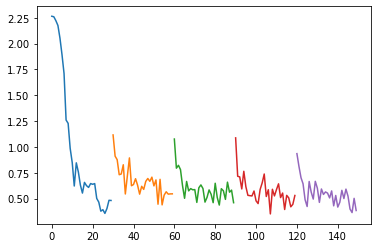

In [20]:
loss_plot(ewc_total_loss_dropout)

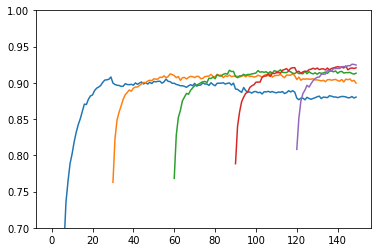

In [21]:
accuracy_plot(ewc_prec_dropout)

No handles with labels found to put in legend.


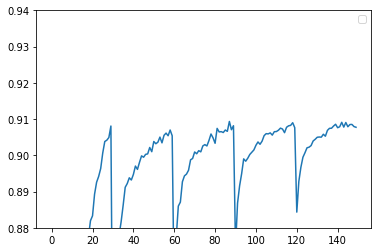

In [22]:
avg_precision_plot([ewc_prec_dropout])
    


In [23]:
avg_precision_plot([standard_prec_no_dropout,ewc_prec, standard_prec,  ewc_prec_dropout], ["no dropout", "dropout", "ewc_40", "ewc_100"])

NameError: name 'ewc_prec' is not defined

In [ ]:
'''lamda = 1000
mlp_consolidation_1000 = MLP(
    DATASET_CONFIGS['mnist']['size']**2,
    DATASET_CONFIGS['mnist']['classes'],
    hidden_size,
    hidden_layer_num,
    hidden_dropout_prob,
    input_dropout_prob,
    lamda,
)

# run the standard experiment.
consolidate = True
ewc_prec_1000, ewc_total_loss_1000, ewc_ce_loss_1000, ewc_ewc_loss_1000 =train(
    mlp_consolidation_1000, train_datasets, test_datasets,
    epochs_per_task,
    batch_size,
    test_size,
    consolidate,
    fisher_estimation_sample_size,
    lr,
    weight_decay,
    eval_log_interval,
    loss_log_interval,
    cuda
)'''

In [ ]:
#loss_plot(ewc_total_loss_1000)

In [ ]:
#accuracy_plot(ewc_prec_1000)

In [ ]:
'''lamda = 10
mlp_consolidation_10 = MLP(
    DATASET_CONFIGS['mnist']['size']**2,
    DATASET_CONFIGS['mnist']['classes'],
    hidden_size,
    hidden_layer_num,
    hidden_dropout_prob,
    input_dropout_prob,
    lamda,
)

# run the standard experiment.
consolidate = True
ewc_prec_10, ewc_total_loss_10, ewc_ce_loss_10, ewc_ewc_loss_10 =train(
    mlp_consolidation_10, train_datasets, test_datasets,
    epochs_per_task,
    batch_size,
    test_size,
    consolidate,
    fisher_estimation_sample_size,
    lr,
    weight_decay,
    eval_log_interval,
    loss_log_interval,
    cuda
)'''

In [ ]:
#loss_plot(ewc_total_loss_10)

In [ ]:
#accuracy_plot(ewc_prec_10)

In [ ]:
'''lamda = 80
mlp_consolidation_80 = MLP(
    DATASET_CONFIGS['mnist']['size']**2,
    DATASET_CONFIGS['mnist']['classes'],
    hidden_size,
    hidden_layer_num,
    hidden_dropout_prob,
    input_dropout_prob,
    lamda,
)

# run the standard experiment.
consolidate = True
ewc_prec_80, ewc_total_loss_80, ewc_ce_loss_80, ewc_ewc_loss_80 =train(
    mlp_consolidation_80, train_datasets, test_datasets,
    epochs_per_task,
    batch_size,
    test_size,
    consolidate,
    fisher_estimation_sample_size,
    lr,
    weight_decay,
    eval_log_interval,
    loss_log_interval,
    cuda
)'''

In [ ]:
#loss_plot(ewc_total_loss_80)

In [ ]:
#accuracy_plot(ewc_prec_80)